# START UP





In Anaconda Prompt:

1. Activate Environment
conda activate C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env

2. Install Autogluon
pip install autogluon

* If this doesn't work - create and activate again (Autogluon does not work with the most updated python version)
conda create -n autogluon_env python=3.9
conda activate autogluon_env

3. Install Jupyter in conda environment
pip install notebook jupyter

4. Enable Jupyter to allow local runtime
pip install jupyter_http_over_ws
jupyter serverextension enable --py jupyter_http_over_ws

5. Open jupyter notebook and copy address to Local Runtime
jupyter notebook --no-browser --port=8888

### 🌐 **Google Colab Remote Setup and Data Retrieval**

Initial setup for Google Colab to enable remote access and import necessary data files directly from Google Drive.
Uses `gdown` to download the **NBI features dataset** and **target CSV file** for subsequent model training and analysis.


In [ ]:
# First set up of Google Colab for Remote Access

# pip install gdown

# import gdown
# import os

# NBIfeatures_path = "https://drive.google.com/file/d/1-9sk8rj8yVvmco6NdS9XRk78pIukSvgI/view?usp=sharing"
# gdown.download(NBIfeatures_path, "NBIFull.csv", quiet=False)

# target_new_path = "https://drive.google.com/file/d/1IUn2jMhuo25Ed4ioPNv76wtPB6zTHf9_/view?usp=sharing"
# gdown.download(target_new_path, "targets_10Sep.csv", quiet=False)

### 💻 **Mount Google Drive and Define File Paths**

Mounts the user’s Google Drive into the Colab environment to access project files directly.
Specifies absolute file paths for the **NBI features dataset** and **target dataset** used in the bridge feature prediction workflow.



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# Julia's Paths
NBIfeatures_path = "/content/drive/MyDrive/Disaster Recovery Research/Bridge_Feature_Prediction_2/Bridge_Feature_Prediction_MAR23/Features and Targets CSV/NBIfull.csv"
#features_path = "/content/drive/MyDrive/Disaster Recovery Research/Bridge_Feature_Prediction_2/Bridge_Feature_Prediction_MAR23/Features and Targets CSV/features.csv"
#target_path = "/content/drive/MyDrive/Disaster Recovery Research/Bridge_Feature_Prediction_2/Bridge_Feature_Prediction_MAR23/Features and Targets CSV/targets.csv"
target_new_path = "/content/drive/MyDrive/Disaster Recovery Research/Bridge_Feature_Prediction_2/Bridge_Feature_Prediction_MAR23/Features and Targets CSV/targets_10Sep.csv"

Mounted at /content/drive/


### ⚙️ **Install Dask for Parallel Data Processing**

Installs the `dask[dataframe]` package, enabling efficient, parallelized handling of large datasets through distributed DataFrame operations.


In [ ]:
pip install dask[dataframe]

### 🔋 **Check GPU Availability in Colab**

Verifies if a GPU runtime is active in the current environment.
Prints confirmation and the detected GPU model name if available, otherwise notifies that GPU acceleration is unavailable.



In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    print("GPU is available!")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")


GPU is available!
GPU Name: NVIDIA T400 4GB


### ⚙️ **Install AutoGluon Framework**

Installs the **AutoGluon** library, an automated machine learning toolkit for tabular, text, and vision tasks, enabling rapid model training, tuning, and evaluation with minimal manual setup.


In [ ]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 94.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime.

### 📦 **Import Core Libraries and Machine Learning Packages**

Loads all essential Python packages for data preprocessing, model training, evaluation, feature selection, and automated machine learning.
Includes key frameworks such as **scikit-learn**, **XGBoost**, and **AutoGluon** to support both manual and automated model development workflows.



In [ ]:
# import required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from scipy.stats import randint
from sklearn.svm import SVR
from scipy.stats import uniform
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from autogluon.core.metrics import make_scorer
from autogluon.tabular import TabularDataset, TabularPredictor

### 🗂 **Define Alternative File Paths (Keyvyn’s Setup)**

Specifies Keyvyn’s local Google Drive file paths for feature and target datasets, allowing flexible access to project data under an alternative directory structure.



In [ ]:
# Keyvyn's Paths
NBIfeatures_path = "/content/drive/MyDrive/Copy of NBIfull.csv"
features_path = "/content/drive/MyDrive/Copy of features.csv"
target_path = "/content/drive/MyDrive/Disaster Recovery Research/Bridge_Feature_Prediction_2/Bridge_Feature_Prediction_MAR23/Features and Targets CSV/targets.csv"
target_new_path = "/content/drive/MyDrive/Copy of targets_10Sep.csv"

# LOAD DATA

## Load Targets


### 🧹 **Target Data Cleaning and Filtering**

Loads the target dataset and performs a sequence of filtering operations to refine bridge records for modeling.

---

#### 🧩 **Workflow Summary**

1. **Load Dataset**

   * Reads `targets_10Sep.csv` into a DataFrame and reports the total number of bridges.

2. **Remove Invalid or Irrelevant Entries**

   * Filters out rows where key identifiers or support types are labeled as “Not in BEISt”.
   * Removes non-bridge or non-relevant entries such as `'Not Bridge'`, `'Single Span'`, `'Walls'`, and `'Tapered Wall'`.
   * Excludes all pile-related supports (`'CIP Piles'`, `'Timber Piles'`, `'Composite Piles'`, etc.) and tapered columns.

3. **Display Data Overview**

   * Prints the counts of each support type after filtering.
   * Reports the remaining number of valid bridge records.

4. **Final Cleanup**

   * Ensures all rows with `'Not Bridge'` in the `Feature Intersected` field are removed for consistency.

---

#### 🧾 **Outputs**

Displays printed summaries for each cleaning step, including counts of removed entries, the remaining valid support types, and the final bridge count in the cleaned dataset.


In [ ]:
# Loading in targets
targets = pd.read_csv("C:/Users/jlensing/targets_10Sep.csv")
#targets = pd.read_csv(target_new_path)

# Starting # of Bridges in Database
print(f"Starting Number of Bridges in the Database: {len(targets)}")

# remove 'Not in BEISt' - Support Type
print(f"Number of 'Not in BEISt' Support Type: {(targets['Support Type'] == 'Not in BEISt').sum()}")
targets = targets[targets['Support Type']!='Not in BEISt'].copy()

# remove 'Not in BEISt' - Structure ID
print(f"Number of 'Not in BEISt' Structure ID: {(targets['Structure ID'] == 'Not in BEISt').sum()}")
targets = targets[targets['Structure ID']!='Not in BEISt'].copy()

# remove 'Not Bridge' (A1)
print(f"Number of 'Not Bridge': {(targets['Support Type'] == 'Not Bridge').sum()}")
targets = targets[targets['Support Type']!='Not Bridge'].copy()

# remove Single Span (A2)
print(f"Number of Single-Span Bridges: {(targets['Support Type'] == 'Single Span').sum()}")
targets = targets[targets['Support Type']!='Single Span'].copy()

# drop 'Walls' and 'Tappered Walls' from Support Type
print(f"Number of 'Walls' and 'Tapered Walls': {(targets['Support Type'].isin(['Wall', 'Tapered Wall'])).sum()}")
targets = targets[targets['Support Type']!='Wall'].copy()
targets = targets[targets['Support Type']!='Tapered Wall'].copy()

# drop 'Piles'
# Count and print the number of cells with 'pile' or 'Pile'
print(f"Number of 'Pile' Supports: {targets['Support Type'].str.contains('pile', case=False).sum()}")
targets = targets[targets['Support Type']!='CIP Piles'].copy()
targets = targets[targets['Support Type']!='Timber piles'].copy()
targets = targets[targets['Support Type']!='Timber Piles'].copy()
targets = targets[targets['Support Type']!='Composite Piles'].copy()
targets = targets[targets['Support Type']!='PC Piles'].copy()
targets = targets[targets['Support Type']!='Piles'].copy()
targets = targets[targets['Support Type']!='H-Piles'].copy()

# drop Tapered Columns
print(f"Number of 'Tapered' Columns: {targets['Support Type'].str.contains('Tapered Col', case=False).sum()}")
targets = targets[targets['Support Type']!='Tapered Col'].copy()

# #targets = targets[targets['Support Type']!='RectCol-Spiral'].copy()
# #targets = targets[targets['Support Type']!='OblongCol'].copy()
# #targets = targets[targets['Support Type']!='HexCol'].copy()

# Display counts of remaining Support Types
print("Remaining Support Types")
print(targets['Support Type'].value_counts())

# Remaining Bridge Count
print(f"Remaining Number of Bridges: {len(targets)}")

# remove 'Not Bridge' (A1)
print(f"Number of 'Not Bridge': {(targets['Feature Intersected'] == 'Not Bridge').sum()}")
targets = targets[targets['Feature Intersected']!='Not Bridge'].copy()


Starting Number of Bridges in the Database: 850
Number of 'Not in BEISt' Support Type: 8
Number of 'Not in BEISt' Structure ID: 19
Number of 'Not Bridge': 27
Number of Single-Span Bridges: 115
Number of 'Walls' and 'Tapered Walls': 37
Number of 'Pile' Supports: 112
Number of 'Tapered' Columns: 45
Remaining Support Types
Support Type
CircCol           370
RectCol            52
RectCol-Spiral     34
OblongCol          24
HexCol              7
Name: count, dtype: int64
Remaining Number of Bridges: 487
Number of 'Not Bridge': 0


### 🏷️ **Standardize Column Names**

Renames target dataset columns to a consistent, code-friendly format using uppercase and underscores.
This improves readability and ensures uniform reference across all preprocessing and modeling scripts.


In [ ]:
# rename columns for consistency
targets = targets.rename({'Structure ID':'STRUCTURE_ID',
'Spacing/Pitch (in)':'SPACING_PITCH_IN',
'No. of Columns/Piles per Bent':'COLUMNS_PILES_PER_BENT',
'B_long (in.)':'B_LONG_IN',
'B_trans (in.)':'B_TRANS_IN',
'Clear Height (ft)':'CLEAR_HEIGHT_FT',
'Support Type':'SUPPORT_TYPE',
'Feature Intersected':'OBJECT_INTERSECTED',
'Long Reinf Ratio, %':'LRR',
'Transverse Reinforcement Ratio':'TRR',
'Database Ref #':'DATABASE_REF'}, axis = 1)

### 🔢 **Data Type Conversion and Numeric Normalization**

Cleans and standardizes data types across the target dataset to ensure numerical consistency and type safety for downstream modeling.

---

#### 🧩 **Workflow Summary**

1. **Numeric Conversion and Rounding**

   * Converts `SPACING_PITCH_IN` and `COLUMNS_PILES_PER_BENT` to numeric values.
   * Rounds spacing to the nearest integer and enforces `Int64` type to preserve potential nulls.

2. **Feature Normalization**

   * Converts remaining dimensional and reinforcement fields (`CLEAR_HEIGHT_FT`, `B_LONG_IN`, `B_TRANS_IN`, `LRR`, `TRR`) to numeric, safely coercing invalid entries to NaN.

3. **Categorical Formatting**

   * Converts identifiers and categorical fields (`STRUCTURE_ID`, `SUPPORT_TYPE`, `OBJECT_INTERSECTED`) to string type for consistency in categorical processing.

---

#### 🧾 **Outputs**

Produces a cleaned `targets` DataFrame where numerical fields are properly typed and categorical columns are string-formatted, ensuring smooth compatibility with machine learning pipelines.



In [ ]:
# Spacing_Pitch_In (Round to nearest whole number and change to int)
targets['SPACING_PITCH_IN'] = pd.to_numeric(targets['SPACING_PITCH_IN'], errors='coerce')  # Convert to numeric (floats)
targets['SPACING_PITCH_IN'] = targets['SPACING_PITCH_IN'].apply(lambda x: round(x) if pd.notna(x) else x)
targets['SPACING_PITCH_IN'] = targets['SPACING_PITCH_IN'].astype('Int64')

# Columns/Piles per bent (Round to nearest whole number and change to int)
targets['COLUMNS_PILES_PER_BENT'] = pd.to_numeric(targets['COLUMNS_PILES_PER_BENT'], errors='coerce')  # Convert to numeric (floats)
targets['COLUMNS_PILES_PER_BENT'] = targets['COLUMNS_PILES_PER_BENT'].astype('Int64')

# Change remaining targets to numeric and retain NaNs
targets['CLEAR_HEIGHT_FT'] = pd.to_numeric(targets['CLEAR_HEIGHT_FT'], errors='coerce')
targets['B_LONG_IN'] = pd.to_numeric(targets['B_LONG_IN'], errors='coerce')
targets['B_TRANS_IN'] = pd.to_numeric(targets['B_TRANS_IN'], errors='coerce')
targets['LRR'] = pd.to_numeric(targets['LRR'], errors='coerce')
targets['TRR'] = pd.to_numeric(targets['TRR'], errors='coerce')

# Change Structure ID, Support Type, and Feature Intersected to str
targets['STRUCTURE_ID'] = targets['STRUCTURE_ID'].astype(str)
targets['SUPPORT_TYPE'] = targets['SUPPORT_TYPE'].astype(str)
targets['OBJECT_INTERSECTED'] = targets['OBJECT_INTERSECTED'].astype(str)


### 🧮 **Feature Engineering and Derived Variable Creation**

Generates new analytical features based on bridge geometry and reinforcement parameters to enhance predictive modeling capabilities.

---

#### 🧩 **Workflow Summary**

1. **Binary Structural Indicator**

   * Creates `COLUMNS_PILES_0_1`, a binary flag distinguishing **single-column (0)** from **multi-column (1)** bridge supports.

2. **Geometric Ratios**

   * Computes aspect ratios `L_H_LONG` and `L_H_TRANS`, representing **height-to-length** and **height-to-width** proportions (scaled to inches).
   * Derives `L_H_MIN` as the **minimum** of the two ratios to capture the more critical geometric constraint.

3. **Material and Design Constants**

   * Defines constants for concrete and steel properties (`f_prime_c`, `f_y`, `f_y_t`), geometric coefficients (`pi_4`, `C_0`, `C_1`), and reduction factor (`eta`) used in structural demand-capacity equations.

4. **Z-Factor Encoding**

   * Assigns `Z_KNOWN` based on column/pile configuration — `1` for single-column and `2` for multi-column systems.

5. **Capacity-to-Demand Ratio (C/D_MIN)**

   * Calculates `CD_MIN`, a composite measure of **capacity-to-demand ratio**, integrating reinforcement and geometry effects.
   * Lower `CD_MIN` values indicate potentially weaker configurations.

6. **Critical Condition Flag**

   * Derives `CRITICAL_TRUTH_0_1`, a binary variable marking structurally critical cases (`1` if `CD_MIN < 0.85`, else `0`).

---

#### 🧾 **Outputs**

Adds six new engineered columns —
`COLUMNS_PILES_0_1`, `L_H_LONG`, `L_H_TRANS`, `L_H_MIN`, `CD_MIN`, and `CRITICAL_TRUTH_0_1` — enriching the dataset with interpretable, physically meaningful features for downstream modeling.



In [ ]:
# Add 'engineered'/'calculated' features

# Columns/Piles 0/1 - create column based on columns/piles per bent.
targets['COLUMNS_PILES_0_1'] = targets['COLUMNS_PILES_PER_BENT'].apply(
    lambda x: 0 if pd.notna(x) and x == 1 else (1 if pd.notna(x) and x > 1 else np.nan)).astype('Int64')

# Add L/H Tran and L/H Long
# Add L/H Long and L/H Tran to dataset
targets['L_H_LONG']=((targets['CLEAR_HEIGHT_FT']/targets['B_LONG_IN'])*12)
targets['L_H_TRANS']=((targets['CLEAR_HEIGHT_FT']/targets['B_TRANS_IN'])*12)

# Add L/H_MIN
targets['L_H_MIN'] = targets[['L_H_LONG', 'L_H_TRANS']].min(axis=1)

# Add Capacity/Demand Long and Capacity/Demand Transverse

# Define constants
# These came from the "Helper Tables" Shear Calculations in the data base

f_prime_c = 6000 #psi
f_y= 60000 #psi
f_y_t= 60000 #psi
eta= 0.5
pi_4 = np.pi/4
C_0=1.6
C_1=1.3

sqrt_fc_fy=np.sqrt(f_prime_c)/(f_y)
#print(sqrt_fc_fy)

fyt_fy=f_y_t/f_y
#print(fyt_fy)
#print(pi_4)

# Add Z (must be done after the features are 'typed' )
targets['Z_KNOWN'] = targets['COLUMNS_PILES_0_1'].map({0: 1, 1: 2})

# cap/demand_long
#targets['CD_LONG']= ((C_0*sqrt_fc_fy+0.4*targets['TRR']*fyt_fy*targets['L_H_LONG'])/
#                     (C_1*1*pi_4*eta*targets['LRR']))

# cap/demand_trans
#targets['CD_TRANS']= ((C_0*sqrt_fc_fy+0.4*targets['TRR']*fyt_fy*targets['L_H_TRANS'])/
#                        (C_1*targets['Z_KNOWN']*pi_4*eta*targets['LRR']))

# Min CD
#targets['CD_MIN'] = targets[['CD_LONG', 'CD_TRANS']].min(axis=1)

# C/D MIN
targets['CD_MIN']= (((C_0*sqrt_fc_fy+0.5*targets['TRR']*fyt_fy)*targets['L_H_MIN'])/
                    (C_1*targets['Z_KNOWN']*pi_4*eta*targets['LRR']))

# Critical Truth 0/1
targets['CRITICAL_TRUTH_0_1'] = targets['CD_MIN'].apply(lambda x: 1 if pd.notna(x) and x < 0.85 else (np.nan if pd.isna(x) else 0)
).astype('Int64')


### 📐 **Dataset Dimensionality Check**

Verifies the shape of the cleaned and feature-engineered `targets` DataFrame, confirming it contains **823 rows** and **18 columns** after preprocessing.


In [ ]:
targets.shape #823 x 18

(487, 18)

### 🧾 **Reorder Columns for Standardized Schema**

Rearranges the `targets` DataFrame columns into a consistent, logical order—grouping identifiers, structural dimensions, derived ratios, and target variables—ensuring uniform structure for integration with other datasets.



In [ ]:
# Reorder Columns before integration
new_order=['DATABASE_REF','STRUCTURE_ID','SUPPORT_TYPE', 'SPACING_PITCH_IN','COLUMNS_PILES_PER_BENT','COLUMNS_PILES_0_1',
           'CLEAR_HEIGHT_FT', 'B_LONG_IN', 'B_TRANS_IN', 'L_H_LONG','L_H_TRANS', 'L_H_MIN', 'LRR','TRR', 'Z_KNOWN',
           'CD_MIN','CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED']

targets = targets[new_order].copy()


### 🧱 **Load and Clean Bridge Feature Dataset (NBI)**

Imports and preprocesses the **NBI feature dataset** (`NBIFull.csv`), filtering relevant entries, removing redundant or low-value columns, and standardizing column names for integration with target data.

---

#### 🧩 **Workflow Summary**

1. **Dataset Loading**

   * Reads the full NBI feature dataset while skipping initial metadata rows.
   * Displays the total number of features (columns) at the start of processing.

2. **Bridge Filtering**

   * Retains only records with `Structure ID` values matching those in the cleaned target dataset.

3. **Missing Data and Constant Column Removal**

   * Drops all columns containing null values.
   * Identifies and removes features with constant (single-value) data, which provide no predictive value.

4. **Reference and Irrelevant Feature Removal**

   * Excludes identifier or descriptive fields that are non-informative for modeling, such as
     `"In OP?"`, `"STRUCTURE_NUMBER_008"`, `"FACILITY_CARRIED_007"`, and `"Bridge #"`.

5. **Duplicate Column Cleanup**

   * Removes redundant latitude and longitude columns (`LAT_016`, `LONG_017`) to avoid overlap with standardized coordinate fields.

6. **Column Renaming**

   * Renames key columns for consistency with target data (`'Structure ID '` → `STRUCTURE_ID`, `'Lat. (Decimal Degrees)'` → `LAT`, `'Long. (Decimal Degrees)'` → `LONG`).

---

#### 🧾 **Outputs**

* Prints counts of dropped and retained columns for transparency.
* Displays any remaining columns containing missing values.
* Produces a cleaned and standardized `full_f` DataFrame ready for merging with the target dataset.



In [ ]:
# Load features (NBI)
full_f = pd.read_csv("C:/Users/jlensing/NBIFull.csv", skiprows = 3) # "full_f" for full set of features
#full_f = pd.read_csv(NBIfeatures_path, skiprows = 3) # "full_f" for full set of features

# # Starting number of features
print(f"Starting Number of Features in the Database: {full_f.shape[1]}")

# filter only applicable Structure IDs
full_f = full_f[full_f['Structure ID '].isin(targets['STRUCTURE_ID'])]

# Delete columns with missing data
print(f"Number of columns dropped: {full_f.shape[1] - full_f.dropna(axis=1).shape[1]}")
full_f = full_f.dropna(axis=1)

# # Define the function to print the percentage of missing values
# def print_null_percentages(df):
#     percent_missing = df.isnull().mean() * 100
#     print("Percentage of missing values per column:")
#     print(percent_missing)
#     return percent_missing

# # Define the function to remove columns with more than 5% NaN values
# def remove_nan(df):
#     # Get the null percentages
#     percent_missing = print_null_percentages(df)

#     # Identify columns to drop
#     cols_to_drop = percent_missing[percent_missing > 5].index
#     num_cols_to_drop = len(cols_to_drop)

#     # Drop columns
#     df = df.drop(cols_to_drop, axis=1)

#     # Print the number of columns removed
#     print(f"Number of columns with missing values more than 5%: {num_cols_to_drop}")

#     return df

# # Remove columns with more than 5% NaN values and get the cleaned DataFrame
# full_f = remove_nan(full_f).copy()

# Drop irrelevent features (duplicate information, all unique values, all the same value, no value added - expert opinion)
constant_columns = [col for col in full_f.columns if full_f[col].nunique() == 1]
print("Columns with all the same value:", constant_columns)
print("Number of columns with all the same value:", len(constant_columns))
# Remove columns with all the same value
full_f = full_f.drop(columns=constant_columns).copy()

# # Calculate the threshold for 90% unique values
# threshold = 0.9 * len(full_f)
# # Identify columns with 90% or more unique values
# high_unique_columns = [col for col in full_f.columns if full_f[col].nunique() >= threshold]
# print("Columns with 90% or more unique values:", high_unique_columns)
# # Remove columns with 90% or more unique values
# full_f = full_f.drop(columns=high_unique_columns).copy()

# unique_string_columns = [col for col in full_f.columns if full_f[col].apply(lambda x: isinstance(x, str)).all() and full_f[col].nunique() == len(full_f)]
# print("Columns with all unique string values:", unique_string_columns)


reference_columns = ["In OP?","In T2T?",
                     'In National Network?',"STRUCTURE_NUMBER_008",
                     "FEATURES_DESC_006A",
                     "FACILITY_CARRIED_007", "LOCATION_009", "ROUTE_NUMBER_005D",
                    # "Special Single Span?"
                     ]
print("Reference Columns:", reference_columns)
print("Number of reference columns:", len(reference_columns))
full_f = full_f.drop(columns=reference_columns).copy()

duplicate_columns = ['LAT_016', 'LONG_017']
print("Duplicate Columns:", duplicate_columns)
print("Number of duplicate columns:", len(duplicate_columns))
full_f = full_f.drop(columns=duplicate_columns).copy()

not_rel_columns = ["Bridge #"]
                      # "OTHR_STATE_STRUC_NO_099",
                      # "MAINTENANCE_021","OWNER_022"]
print("Not relevant columns:", not_rel_columns)
print("Number of not relevant columns:", len(not_rel_columns))
full_f = full_f.drop(columns=not_rel_columns).copy()

# Remaining Bridge Count
print(f"Remaining Number of Features: {full_f.shape[1]}")

# Check for columns with missing values
missing_values = full_f.isna().sum()
columns_with_missing = missing_values[missing_values > 0]

print("Columns with missing values:")
print(columns_with_missing)

# rename columns for consistency
full_f = full_f.rename({'Structure ID ':'STRUCTURE_ID',
'Long. (Decimal Degrees)':'LONG',
'Lat. (Decimal Degrees)':'LAT',}, axis = 1)


Starting Number of Features in the Database: 133
Number of columns dropped: 12
Columns with all the same value: ['Special Single Span?', 'ADT > (parameter)?', 'STATE_CODE_001', 'RECORD_TYPE_005A', 'DIRECTION_005E', 'PLACE_CODE_004', 'MAINTENANCE_021', 'OWNER_022', 'CULVERT_COND_062', 'WORK_DONE_BY_075B', 'OTHR_STATE_STRUC_NO_099', 'BRIDGE_LEN_IND_112', 'FED_AGENCY', 'SUBMITTED_BY']
Number of columns with all the same value: 14
Reference Columns: ['In OP?', 'In T2T?', 'In National Network?', 'STRUCTURE_NUMBER_008', 'FEATURES_DESC_006A', 'FACILITY_CARRIED_007', 'LOCATION_009', 'ROUTE_NUMBER_005D']
Number of reference columns: 8
Duplicate Columns: ['LAT_016', 'LONG_017']
Number of duplicate columns: 2
Not relevant columns: ['Bridge #']
Number of not relevant columns: 1
Remaining Number of Features: 96
Columns with missing values:
Series([], dtype: int64)


### 🖥️ **Display All Columns in DataFrame Output**

Adjusts the pandas display setting to show **all columns** when printing the `full_f` DataFrame, allowing a complete on-screen inspection of the remaining cleaned and filtered features.




In [ ]:
pd.set_option('display.max_columns', None)
full_f

,STRUCTURE_ID,LAT,LONG,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,DETOUR_KILOS_019,TOLL_020,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,HISTORY_037,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,OPEN_CLOSED_POSTED_041,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,LAT_UND_REF_055A,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,POSTING_EVAL_070,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,WORK_PROPOSED_075A,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA
73,000000QC,47.412111,-122.221500,5,1,1,33,99.99,0.048,1,0,3,14,1973,5,7,31076,2016,6,17.7,0,1,0,1,0,0,0,5,0,0.0,0.0,A,1,6,5,2,0,0,3,0,18.6,31.4,96.6,1.5,0.0,18.6,20.9,99.99,H,4.95,H,10.2,1.7,7,6,7,8,1,85.3,1,49.9,6,3,5,5,8,8,35.0,96.6,321,24,N,N,N,3804.0,761.0,7608.0,2014.0,0,N,2,1,0,1992.0,1,1,0,0,5.0,0,8,48668,2038,F,6,2018.94
84,00000KMA,47.827028,-122.268972,5,1,1,61,99.99,0.032,0,2,3,16,1996,6,10,2635,2002,9,20.7,0,49,0,1,1,1,1,4,N,0.0,0.0,A,5,1,6,2,0,0,4,0,20.7,46.0,155.1,2.4,2.4,20.7,25.9,99.99,H,4.90,H,3.0,3.0,7,7,7,N,1,89.8,1,74.4,7,2,4,5,N,8,35.0,155.1,721,24,N,N,N,7126.0,1425.0,14252.0,2014.0,0,N,2,0,0,0.0,1,1,0,1,5.0,0,N,4785,2036,G,7,4017.09
147,0001406A,48.066111,-124.235250,2,1,3,9,99.99,331.541,1,27,3,2,1930,2,0,2496,2019,2,10.4,0,0,0,1,1,1,1,5,0,0.0,0.0,A,1,5,2,2,0,0,12,0,7.9,18.3,134.1,0.2,0.2,7.9,9.1,99.99,N,0.00,N,0.0,0.0,7,6,6,8,1,41.7,1,25.4,6,3,N,5,8,8,35.0,134.1,818,48,N,N,N,3168.0,634.0,6336.0,2014.0,0,N,2,1,0,1957.0,1,6,2,0,12.0,1,5,3124,2039,F,6,1220.31
160,0001576A,46.879492,-123.271575,2,1,3,27,99.99,51.177,1,5,3,2,1932,2,0,5972,2019,2,9.8,0,0,0,1,0,1,0,5,0,0.0,0.0,A,1,5,1,4,0,0,3,0,7.3,18.3,36.9,0.0,0.0,7.3,8.2,99.99,N,0.00,N,0.0,0.0,7,6,6,5,1,65.3,1,39.0,6,2,N,5,8,8,35.0,36.9,920,24,N,N,N,823.0,165.0,1646.0,2014.0,0,N,2,1,0,0.0,1,6,2,0,16.0,1,3,6831,2039,F,6,302.58
161,0001576B,46.847933,-123.248556,2,1,3,27,99.99,55.120,1,8,3,2,1932,2,0,5972,2019,2,10.4,0,45,0,1,0,1,0,5,N,0.0,0.0,A,1,2,1,4,0,0,3,0,7.3,16.5,49.7,0.0,0.0,7.3,8.2,99.99,R,6.88,R,5.2,0.0,6,5,6,N,1,65.3,1,39.0,5,2,7,5,N,8,35.0,49.7,620,24,N,N,N,1174.0,235.0,2347.0,2014.0,0,N,2,1,0,0.0,1,6,2,0,16.0,1,N,6831,2039,F,5,407.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,0018811C,47.464917,-122.218028,3,7,1,33,99.99,0.515,0,2,3,11,2018,2,7,5000,2019,A,14.6,3,0,1,1,1,1,1,4,N,0.0,0.0,A,1,1,5,2,0,0,11,0,8.2,53.0,562.7,0.0,0.0,14.6,17.7,99.99,H,5.89,H,2.4,2.4,8,8,8,N,8,45.0,8,34.7,8,9,3,5,N,8,35.

### 🧩 **Convert Feature Columns to Proper Data Types**

Explicitly casts all feature columns in `full_f` to their appropriate data types for numerical precision, categorical clarity, and compatibility with downstream machine learning models.

---

#### ⚙️ **Workflow Summary**

1. **Numeric Conversion**

   * Converts measurement fields (e.g., `LAT`, `LONG`, `CLEAR_HEIGHT_FT`, `ROADWAY_WIDTH_MT_051`) to `float` for precise computation.
   * Converts count and categorical code columns (e.g., `ROUTE_PREFIX_005B`, `COUNTY_CODE_003`, `ADT_029`) to `int` for efficient encoding and filtering.

2. **Categorical Assignment**

   * Retains categorical descriptors (e.g., `RAILINGS_036A`, `NAVIGATION_038`, `BRIDGE_CONDITION`) as `str` for label encoding or direct mapping to domain dictionaries.

3. **Data Integrity**

   * Enforces uniform typing across the dataset, ensuring no mixed data types or parsing errors during modeling or feature selection.

---

#### 🧾 **Outputs**

A fully typed `full_f` DataFrame where every variable reflects its correct semantic type — numerical, categorical, or identifier — supporting reliable analytics and model input validation.


In [ ]:
# change type
full_f = full_f.astype({
   "STRUCTURE_ID": str,
   "LAT":float,
   "LONG":float,
  # "FEATURES_DESC_006A": str,
   "ROUTE_PREFIX_005B": int, # interstate, highway, state highway, county highway
   "SERVICE_LEVEL_005C": int, # mainline, alternate, bypass, spur, business
   "HIGHWAY_DISTRICT_002": int, # state or federal district in which the bridge is located
   "COUNTY_CODE_003": int, # county bridge is located in
   "MIN_VERT_CLR_010": float,
   "KILOPOINT_011":float,
   "BASE_HWY_NETWORK_012": int, #presence or absence of route in the base network
   "DETOUR_KILOS_019": int, #kilometer length of detour
   "TOLL_020": int, #code of use of toll road, ridge, free road, etc.
   "FUNCTIONAL_CLASS_026": int, #code for functional classification (rural, urban, arterial collector, etc.)
   "YEAR_BUILT_027": int, # year of completed construction
   "TRAFFIC_LANES_ON_028A": int, # lanes on the structure
   "TRAFFIC_LANES_UND_028B": int, #lanes under the structure
   "ADT_029": int, #average daily traffic
   "YEAR_ADT_030": int, # year of average daily traffic count
   "DESIGN_LOAD_031": str, #Code (numerical and alpha) to indicate  the live load for whch the structure was designed
   "APPR_WIDTH_MT_032": float, #the normal width of usable roadway approaching the structure
   "MEDIAN_CODE_033": int, # code for existence, open, close median
   "DEGREES_SKEW_034": int, # angle between the centerline of a pier and a line normal to the roadway centerline
   "STRUCTURE_FLARED_035": int, # no/yes flared
   "RAILINGS_036A": str, #Code for Bridge railings (Safety) - meets standards, does not meet standards, or not applicable.
   "TRANSITIONS_036B": str, #Code for Transitions(Safety) - meets standards, does not meet standards, or not applicable
   "APPR_RAIL_036C":str, #Code approach guardrail(Safety) - meets standards, does not meet standards, or not applicable
   "APPR_RAIL_END_036D":str, #Code for guardrail ends(Safety) - meets standards, does not meet standards, or not applicable
   "HISTORY_037": int, # code for historical significance of bridge
   "NAVIGATION_038": str, # indicates whether or not navigation control is required
   "NAV_VERT_CLR_MT_039": float, #if above is 1, indicate the minimum vertical clearance
   "NAV_HORR_CLR_MT_040": float, #if above is 1, indicate the minimum vertical clearance
   "OPEN_CLOSED_POSTED_041": str, #code for open, posted, or closed to traffic
   "SERVICE_ON_042A": int,
   "SERVICE_UND_042B": int,
   "STRUCTURE_KIND_043A": int,
   "STRUCTURE_TYPE_043B": int,
   "APPR_KIND_044A":int,
   "APPR_TYPE_044B":int,
   "MAIN_UNIT_SPANS_045":int,
   "APPR_SPANS_046":int,
   "HORR_CLR_MT_047":float,
   "MAX_SPAN_LEN_MT_048":float,
   "STRUCTURE_LEN_MT_049":float,
   "LEFT_CURB_MT_050A":float,
   "RIGHT_CURB_MT_050B":float,
   "ROADWAY_WIDTH_MT_051":float,
   "DECK_WIDTH_MT_052":float,
   "VERT_CLR_OVER_MT_053":float,
   "VERT_CLR_UND_REF_054A":str, #Encode
   "VERT_CLR_UND_054B":float,
   "LAT_UND_REF_055A":str, #Encode
   "LAT_UND_MT_055B":float,
   "LEFT_LAT_UND_MT_056":float,
   "DECK_COND_058":str,
   "SUPERSTRUCTURE_COND_059":str,
   "SUBSTRUCTURE_COND_060":str,
   "CHANNEL_COND_061":str,
 #  'CULVERT_COND_062':str,
   "OPR_RATING_METH_063":int,
   "OPERATING_RATING_064":float,
   "INV_RATING_METH_065":int,
   "INVENTORY_RATING_066":float,
   "STRUCTURAL_EVAL_067":str,
   "DECK_GEOMETRY_EVAL_068":str,
   "UNDCLRENCE_EVAL_069":str,
   "POSTING_EVAL_070":int,
   "WATERWAY_EVAL_071":str,
   "APPR_ROAD_EVAL_072":int,
   'WORK_PROPOSED_075A':int,
   "IMP_LEN_MT_076":float,
   "DATE_OF_INSPECT_090":int, # Larger values are most recent
   "INSPECT_FREQ_MONTHS_091":int, # 24 and 48 months. Could change to binary.
   "FRACTURE_092A":str,
   "UNDWATER_LOOK_SEE_092B":str,
   "SPEC_INSPECT_092C":str,
   "BRIDGE_IMP_COST_094":int,
   "ROADWAY_IMP_COST_095":int,
   "TOTAL_IMP_COST_096":int,
   "YEAR_OF_IMP_097":int, # Encode to binary
   "STRAHNET_HIGHWAY_100":int,
   "PARALLEL_STRUCTURE_101":str,
   "TRAFFIC_DIRECTION_102":int,
   "HIGHWAY_SYSTEM_104":int,
   "FEDERAL_LANDS_105":int,
   "YEAR_RECONSTRUCTED_106":int,
   "DECK_STRUCTURE_TYPE_107":str,
   "SURFACE_TYPE_108A":str,
   "MEMBRANE_TYPE_108B":str,
   "DECK_PROTECTION_108C":str,
   "PERCENT_ADT_TRUCK_109":int,
   "NATIONAL_NETWORK_110":int,
   "SCOUR_CRITICAL_113":str,
   "FUTURE_ADT_114":int,
   "YEAR_OF_FUTURE_ADT_115":int,
   "BRIDGE_CONDITION":str,
   "LOWEST_RATING":int,
   "DECK_AREA":float,
}).copy()



🧩 Enforcing column data types for NBI features...


NameError: name 'full_f' is not defined

### 🧮 **Feature Type Categorization**

Defines and organizes the feature columns of the NBI dataset into structured groups — **numeric**, **binary**, **nominal**, and **ordinal** — to guide preprocessing, encoding, and model selection strategies.

---

#### 🧩 **Workflow Summary**

1. **Numeric Features (41 total)**

   * Continuous or discrete quantitative variables such as geometric dimensions (`DECK_WIDTH_MT_052`), construction details (`YEAR_BUILT_027`), and traffic data (`ADT_029`, `PERCENT_ADT_TRUCK_109`).
   * Used directly for scaling, normalization, or regression-based modeling.

2. **Binary Features (5 total)**

   * Two-state indicators (e.g., `STRUCTURE_FLARED_035`, `HIGHWAY_SYSTEM_104`, `NATIONAL_NETWORK_110`) representing presence/absence or yes/no structural and administrative attributes.
   * Typically encoded as 0/1.

3. **Nominal Features (38 total)**

   * Categorical variables without intrinsic order, including route classification (`ROUTE_PREFIX_005B`), safety features (`RAILINGS_036A`), and bridge function codes (`SERVICE_ON_042A`, `STRUCTURE_TYPE_043B`).
   * Suitable for **one-hot** or **embedding-based** encoding during model input preparation.

4. **Ordinal Features (12 total)**

   * Condition and evaluation codes (`DECK_COND_058`, `STRUCTURAL_EVAL_067`, `BRIDGE_CONDITION`) that follow a **hierarchical scale** from excellent to poor.
   * To be encoded with **ordered integer mappings** preserving rank semantics.

---

#### 🧾 **Outputs**

Four categorized lists — `numeric_cols`, `binary_cols`, `nominal_cols`, and `ordinal_cols` — establishing a consistent data schema for encoding and downstream machine learning pipeline design.


In [ ]:
# identify feature types
#STRUCTURE_ID to fall off after merge
#41
numeric_cols = ['LAT',
                'LONG',
                "MIN_VERT_CLR_010",
                "KILOPOINT_011",
                "DETOUR_KILOS_019",
                "YEAR_BUILT_027",
                "TRAFFIC_LANES_ON_028A",
                "TRAFFIC_LANES_UND_028B",
                "ADT_029",
                "YEAR_ADT_030",
                "APPR_WIDTH_MT_032",
                "DEGREES_SKEW_034",
                "NAV_VERT_CLR_MT_039",
                "NAV_HORR_CLR_MT_040",
                "MAIN_UNIT_SPANS_045",
                "APPR_SPANS_046",
                "HORR_CLR_MT_047",
                "MAX_SPAN_LEN_MT_048",
                "STRUCTURE_LEN_MT_049",
                "LEFT_CURB_MT_050A",
                "RIGHT_CURB_MT_050B",
                "ROADWAY_WIDTH_MT_051",
                "DECK_WIDTH_MT_052",
                "VERT_CLR_OVER_MT_053",
                "VERT_CLR_UND_054B",
                "LAT_UND_MT_055B",
                "LEFT_LAT_UND_MT_056",
                "OPERATING_RATING_064"
                "INVENTORY_RATING_066",
                "IMP_LEN_MT_076",
                "DATE_OF_INSPECT_090",
                "BRIDGE_IMP_COST_094",
                "ROADWAY_IMP_COST_095",
                "TOTAL_IMP_COST_096",
                "YEAR_OF_IMP_097",
                "YEAR_RECONSTRUCTED_106",
                "PERCENT_ADT_TRUCK_109",
                "FUTURE_ADT_114",
                "YEAR_OF_FUTURE_ADT_115",
                "LOWEST_RATING",
                "DECK_AREA"
]

#5
binary_cols = ['BASE_HWY_NETWORK_012',
               'STRUCTURE_FLARED_035',
              "INSPECT_FREQ_MONTHS_091",
               'HIGHWAY_SYSTEM_104',
               'NATIONAL_NETWORK_110']
#38
nominal_cols = [
 #"FEATURES_DESC_006A"
 #'SUPPORT_TYPE',
 #'OBJECT_INTERSECTED',
 'ROUTE_PREFIX_005B',#+
 'SERVICE_LEVEL_005C',#+
 'HIGHWAY_DISTRICT_002', #()
 'COUNTY_CODE_003', #()
 'TOLL_020',#+
 'FUNCTIONAL_CLASS_026',#+
 'DESIGN_LOAD_031', #-
 'MEDIAN_CODE_033',# -
 'RAILINGS_036A', #+
 'TRANSITIONS_036B', #+
 'APPR_RAIL_036C', #+
 'APPR_RAIL_END_036D', #+
 'HISTORY_037', #+
 'NAVIGATION_038', #+
 'OPEN_CLOSED_POSTED_041',#+,
 'SERVICE_ON_042A', #-
 'SERVICE_UND_042B',#+
 'STRUCTURE_KIND_043A', #+
 'STRUCTURE_TYPE_043B', #+
 'APPR_KIND_044A', #+
 'APPR_TYPE_044B', #+
 'VERT_CLR_UND_REF_054A',#+
 'LAT_UND_REF_055A',#+
 'OPR_RATING_METH_063',# -
 'INV_RATING_METH_065',# -
 'WORK_PROPOSED_075A',# ()
 'FRACTURE_092A',#+
 'UNDWATER_LOOK_SEE_092B',#+
 'SPEC_INSPECT_092C',#+
 'STRAHNET_HIGHWAY_100', #()
 'PARALLEL_STRUCTURE_101', #+
 'TRAFFIC_DIRECTION_102',#+
 'FEDERAL_LANDS_105',#+
 'DECK_STRUCTURE_TYPE_107',#+
 'SURFACE_TYPE_108A', #+
 'MEMBRANE_TYPE_108B', #+
 'DECK_PROTECTION_108C',#+
 'SCOUR_CRITICAL_113'#+
 ]
#12
ordinal_cols=[
 'DECK_COND_058', #ordinal
 'SUPERSTRUCTURE_COND_059', #ordinal
 'SUBSTRUCTURE_COND_060', #ordinal
 'CHANNEL_COND_061', #ordinal
# 'CULVERT_COND_062',
 'STRUCTURAL_EVAL_067',
 'DECK_GEOMETRY_EVAL_068', #ordinal
 'UNDCLRENCE_EVAL_069', #ordinal
 'POSTING_EVAL_070',
 'WATERWAY_EVAL_071',
 'APPR_ROAD_EVAL_072',
 'BRIDGE_CONDITION'] #+

### 🔢 **Ordinal and Nominal Feature Encoding (Setup Stage)**

Prepares to transform all **categorical features** (`ordinal_cols` and `nominal_cols`) in `full_f` into **numerical representations** using scikit-learn’s `OrdinalEncoder`, ensuring compatibility with ML algorithms that require numeric input.

---

#### 🧩 **Workflow Summary**

1. **Encoder Initialization**

   * Creates an instance of `OrdinalEncoder()` to map string categories to integer values.

2. **Encoding Ordinal Columns**

   * Applies the encoder to each column in `ordinal_cols`, preserving the implicit order (e.g., “Excellent” → 5, “Poor” → 1).

3. **Encoding Nominal Columns**

   * Applies the same encoder across unordered categorical variables to convert each unique label into a distinct integer.

---

#### 🧾 **Outputs**

A numerically encoded `full_f` DataFrame where all categorical variables — both ordinal and nominal — are represented as integers, ready for integration with numerical and binary feature sets in model training.


In [ ]:
# # Encode Ordinal and Nominal with ordinal encoder Variables
# ordinal_encoder = OrdinalEncoder()

# #Encode
# for col in [ordinal_cols]:
#     full_f[col] = OrdinalEncoder().fit_transform(full_f[col]).copy()

# #Encode
# for col in [nominal_cols]:
#     full_f[col] = OrdinalEncoder().fit_transform(full_f[col]).copy()

## Data Integration

### 🔗 **Merge Target and Feature DataFrames**

Combines the engineered `targets` dataset with the cleaned NBI `full_f` feature set to create a unified modeling table aligned by bridge identifiers.

---

#### 🧩 **Workflow Summary**

1. **Inner Join on `STRUCTURE_ID`**

   * Merges rows that appear in both datasets, ensuring only bridges present in both target and feature sources are retained.
   * Excludes entries without corresponding NBI data (9 dropped).

2. **Reindexing**

   * Sets `DATABASE_REF` as the index for consistent referencing across subsequent analyses and model evaluations.

---

#### 🧾 **Outputs**

A fully merged DataFrame, `merged_1`, containing **478 bridges** and **114 columns**, integrating structural features, engineered attributes, and classification targets into a single, analysis-ready dataset.


In [ ]:
# Merge DataFrames on 'Structure ID'
merged_1 = pd.merge(targets, full_f, on='STRUCTURE_ID', how='inner')

# Make Database_Ref the index
merged_1 = merged_1.set_index('DATABASE_REF').copy()

merged_1 #478 x 114 (9 'not in NBI')

,STRUCTURE_ID,SUPPORT_TYPE,SPACING_PITCH_IN,COLUMNS_PILES_PER_BENT,COLUMNS_PILES_0_1,CLEAR_HEIGHT_FT,B_LONG_IN,B_TRANS_IN,L_H_LONG,L_H_TRANS,L_H_MIN,LRR,TRR,Z_KNOWN,CD_MIN,CRITICAL_TRUTH_0_1,OBJECT_INTERSECTED,LAT,LONG,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,DETOUR_KILOS_019,TOLL_020,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,HISTORY_037,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,OPEN_CLOSED_POSTED_041,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,LAT_UND_REF_055A,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,POSTING_EVAL_070,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,WORK_PROPOSED_075A,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA
DATABASE_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0019133A,RectCol-Spiral,6,4,1,19.20,54.0,54.0,4.266667,4.266667,4.266667,0.0155,0.0077,2.0,1.594858,0,Overpass,47.118583,-122.557083,5,1,3,53,99.99,0.001,0,5,3,16,2020,5,8,14599,2010,A,19.5,0,4,1,1,1,1,1,5,N,0.0,0.0,G,5,4,6,2,0,0,4,0,17.4,48.2,159.1,0.0,4.3,16.8,26.2,99.99,H,5.54,H,3.4,2.4,8,8,8,N,8,47.3,8,35.3,8,2,5,5,N,8,35,159.1,320,24,N,N,N,6890,1378,13781,2014,0,N,2,0,0,0,1,1,0,1,2,0,N,23709,2036,G,8,4168.42
2,0019133D,RectCol-Spiral,4,2,1,24.60,48.0,48.0,6.150000,6.150000,6.150000,0.0140,0.0096,2.0,2.953873,0,Overpass,47.127006,-122.544067,5,1,3,53,99.99,0.016,0,5,3,16,2020,2,8,11765,2016,A,7.3,1,0,1,1,1,1,1,4,N,0.0,0.0,A,4,4,6,2,0,0,3,0,8.5,46.9,104.9,4.3,0.0,8.5,14.0,99.99,H,5.82,H,3.4,4.6,8,8,8,N,8,52.5,8,38.9,8,4,5,5,N,8,35,104.9,1220,24,N,N,N,1789,358,3578,2014,0,N,2,1,0,0,1,1,0,1,1,0,N,19153,2038,G,8,1468.60
7,0005582A,CircCol,12,4,1,34.40,36.0,36.0,11.466667,11.466667,11.466667,0.0123,0.0020,2.0,2.799066,0,Overpass,47.147558,-122.504419,5,1,3,53,99.99,0.080,1,3,3,14,1958,4,8,13128,2016,5,16.2,0,39,0,0,1,1,1,5,N,0.0,0.0,A,5,1,2,5,0,0,4,0,16.2,26.8,89.6,1.5,0.8,16.2,19.2,99.99,H,4.52,H,2.4,1.5,7,6,7,N,1,79.8,1,47.2,6,4,3,5,N,8,35,89.6,1121,24,N,N,N,3234,647,6468,2014,0,N,2,1,0,0,1,3,0,0,5,0,N,21372,2038,F,6,1720.32
8,0005523C,CircCol,12,1,0,18.00,60.0,60.0,3.600000,3.600000,3.600000,0.0099,0.0011,1.0,1.863090,0,Overpass,47.150581,-122.499178,5,1,3,53,99.99,0.177,0,5,3,19,1957,2,8,3217,2002,5,7.9,0,0,0,1,1,1,1,5,N,0.0,0.0,A,5,1,2,5,0,0,4,0,7.9,27.7,96.6,0.6,0.6,7.9,10.4,99.99,H,4.50,H,3.1,1.7,7,5,7,N,8,57.0,8,44.1,5,3,3,5,N,8,35,96.6,1121,24,N,N,N,1775,355,3550,2014,0,N,2,0,0,0,1,1,0,0,1,0,N,4420,2036,F,5,1004.64
9,0005651A,CircCol,12,1,0,25.20,72.0,72.0,4.200000,4.200000,4.200000,0.0092,0.0010,1.0,2.294276,0,Overpass,47.159764,-122.483589,5,1,3,53,99.99,14.886,1,6,3,14,1958,2,9,17105,2021,5,12.2,0,0,0,1,0,1,1,5,N,0.0,0.0,A,5,1,2,5,0,0,2,0,8.5,41.5,86.3,1.4,1.4,8.5,12.2,99.99,H,4.34,H,3.4,1.4,7,

### 🧹 **Post-Merge Data Cleaning: Drop Rows with Missing Feature Data**

Ensures that all model input features following the target variable are complete, removing any bridge entries with missing values in the downstream feature set.

---

#### 🧩 **Workflow Summary**

1. **Locate Target Column**

   * Identifies the index of `'OBJECT_INTERSECTED'`, marking the final target variable before feature columns.

2. **Define Feature Subset**

   * Selects all columns appearing after the target for completeness validation.

3. **Remove Incomplete Rows**

   * Drops any rows containing NaN values in these feature columns to ensure consistent model input dimensions.

---

#### 🧾 **Outputs**

A cleaned version of `merged_1` retaining only bridges with **fully available feature data**, maintaining shape **(478 × 114)** post-filtering.


In [ ]:
# Find the index of the "feature intersected" column
col_index = merged_1.columns.get_loc('OBJECT_INTERSECTED')

# Define the subset of columns to check for missing data (after "feature intersected")
subset_columns = merged_1.columns[col_index + 1:]

# Remove rows with missing data in these columns
merged_1 = merged_1.dropna(subset=subset_columns)

merged_1 #478 x 114

,STRUCTURE_ID,SUPPORT_TYPE,SPACING_PITCH_IN,COLUMNS_PILES_PER_BENT,COLUMNS_PILES_0_1,CLEAR_HEIGHT_FT,B_LONG_IN,B_TRANS_IN,L_H_LONG,L_H_TRANS,L_H_MIN,LRR,TRR,Z_KNOWN,CD_MIN,CRITICAL_TRUTH_0_1,OBJECT_INTERSECTED,LAT,LONG,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,DETOUR_KILOS_019,TOLL_020,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,HISTORY_037,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,OPEN_CLOSED_POSTED_041,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,LAT_UND_REF_055A,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,POSTING_EVAL_070,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,WORK_PROPOSED_075A,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA
DATABASE_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0019133A,RectCol-Spiral,6,4,1,19.20,54.0,54.0,4.266667,4.266667,4.266667,0.0155,0.0077,2.0,1.594858,0,Overpass,47.118583,-122.557083,5,1,3,53,99.99,0.001,0,5,3,16,2020,5,8,14599,2010,A,19.5,0,4,1,1,1,1,1,5,N,0.0,0.0,G,5,4,6,2,0,0,4,0,17.4,48.2,159.1,0.0,4.3,16.8,26.2,99.99,H,5.54,H,3.4,2.4,8,8,8,N,8,47.3,8,35.3,8,2,5,5,N,8,35,159.1,320,24,N,N,N,6890,1378,13781,2014,0,N,2,0,0,0,1,1,0,1,2,0,N,23709,2036,G,8,4168.42
2,0019133D,RectCol-Spiral,4,2,1,24.60,48.0,48.0,6.150000,6.150000,6.150000,0.0140,0.0096,2.0,2.953873,0,Overpass,47.127006,-122.544067,5,1,3,53,99.99,0.016,0,5,3,16,2020,2,8,11765,2016,A,7.3,1,0,1,1,1,1,1,4,N,0.0,0.0,A,4,4,6,2,0,0,3,0,8.5,46.9,104.9,4.3,0.0,8.5,14.0,99.99,H,5.82,H,3.4,4.6,8,8,8,N,8,52.5,8,38.9,8,4,5,5,N,8,35,104.9,1220,24,N,N,N,1789,358,3578,2014,0,N,2,1,0,0,1,1,0,1,1,0,N,19153,2038,G,8,1468.60
7,0005582A,CircCol,12,4,1,34.40,36.0,36.0,11.466667,11.466667,11.466667,0.0123,0.0020,2.0,2.799066,0,Overpass,47.147558,-122.504419,5,1,3,53,99.99,0.080,1,3,3,14,1958,4,8,13128,2016,5,16.2,0,39,0,0,1,1,1,5,N,0.0,0.0,A,5,1,2,5,0,0,4,0,16.2,26.8,89.6,1.5,0.8,16.2,19.2,99.99,H,4.52,H,2.4,1.5,7,6,7,N,1,79.8,1,47.2,6,4,3,5,N,8,35,89.6,1121,24,N,N,N,3234,647,6468,2014,0,N,2,1,0,0,1,3,0,0,5,0,N,21372,2038,F,6,1720.32
8,0005523C,CircCol,12,1,0,18.00,60.0,60.0,3.600000,3.600000,3.600000,0.0099,0.0011,1.0,1.863090,0,Overpass,47.150581,-122.499178,5,1,3,53,99.99,0.177,0,5,3,19,1957,2,8,3217,2002,5,7.9,0,0,0,1,1,1,1,5,N,0.0,0.0,A,5,1,2,5,0,0,4,0,7.9,27.7,96.6,0.6,0.6,7.9,10.4,99.99,H,4.50,H,3.1,1.7,7,5,7,N,8,57.0,8,44.1,5,3,3,5,N,8,35,96.6,1121,24,N,N,N,1775,355,3550,2014,0,N,2,0,0,0,1,1,0,0,1,0,N,4420,2036,F,5,1004.64
9,0005651A,CircCol,12,1,0,25.20,72.0,72.0,4.200000,4.200000,4.200000,0.0092,0.0010,1.0,2.294276,0,Overpass,47.159764,-122.483589,5,1,3,53,99.99,14.886,1,6,3,14,1958,2,9,17105,2021,5,12.2,0,0,0,1,0,1,1,5,N,0.0,0.0,A,5,1,2,5,0,0,2,0,8.5,41.5,86.3,1.4,1.4,8.5,12.2,99.99,H,4.34,H,3.4,1.4,7,

### 🧮 **Check Missing Values in Target Columns**

Defines key structural target columns and counts the number of missing values for each within `merged_1`.
Prints a column-wise summary to identify which target fields require data cleaning or imputation.


In [ ]:
# Get the column names from the targets DataFrame
target_columns = ['COLUMNS_PILES_PER_BENT', 'COLUMNS_PILES_0_1','L_H_MIN','LRR','TRR', 'SPACING_PITCH_IN']

# Check for missing values in the filtered DataFrame
missing_values_target_columns = merged_1[target_columns].isna().sum()

# Display the number of missing values for each column
print("Number of missing values by column for target columns in merged_1 DataFrame:")
print(missing_values_target_columns)

Number of missing values by column for target columns in merged_1 DataFrame:
COLUMNS_PILES_PER_BENT     3
COLUMNS_PILES_0_1          3
L_H_MIN                   48
LRR                       64
TRR                       99
SPACING_PITCH_IN          68
dtype: int64


### 📊 **Count Complete Data Rows**

Calculates and prints the number of rows in `merged_1` that contain no missing values across any columns, providing a quick overview of dataset completeness.



In [ ]:
# Count rows with no missing values in these columns
complete_rows_count = merged_1.dropna().shape[0]

print(f"Number of rows with complete data in target columns: {complete_rows_count}")

Number of rows with complete data in target columns: 370


### 🧹 **Outlier Detection and Removal for Structural Columns**

Implements outlier handling by identifying and replacing extreme values (beyond ±3 standard deviations) with `NaN` across key structural features, followed by a rollup summary of affected entries.

---

#### 🧩 **Workflow Summary**

1. **Outlier Replacement (`replace_outliers_with_nan`)**

   * Iterates through each selected column, computes mean and standard deviation while ignoring existing NaNs.
   * Flags any values outside ±3σ as outliers and replaces them with `NaN`.

2. **Rollup Calculation (`rollup_removed_values`)**

   * Calculates how many values were replaced in each column by comparing pre- and post-cleaning non-NaN counts.
   * Returns a dictionary summarizing the number of removed outliers per feature.

3. **Application to Target Columns**

   * Applies both functions to structural attributes such as `COLUMNS_PILES_PER_BENT`, `L_H_MIN`, and `TRR`.
   * Stores the cleaned DataFrame as `merged_1_cleaned` and prints a concise rollup summary.

---

#### 🧾 **Outputs**

Prints a dictionary showing the number of values replaced with `NaN` per analyzed column, providing transparency in data cleaning results.


In [ ]:
# import numpy as np
# import pandas as pd

def replace_outliers_with_nan(df, columns):
    """
    Replaces values outside 3 standard deviations with NaN for specified columns,
    ignoring NaN values in calculations.
    """
    for col in columns:
        if col in df.columns:
            # Drop NaN values for calculations
            col_data = df[col].dropna()
            mean = col_data.mean()
            std_dev = col_data.std()

            # Define bounds
            lower_bound = mean - 3 * std_dev
            upper_bound = mean + 3 * std_dev

            # Replace outliers with NaN
            df[col] = df[col].apply(lambda x: np.nan if pd.notna(x) and (x < lower_bound or x > upper_bound) else x)

    return df

def rollup_removed_values(df, columns):
    """
    Provides a rollup of the number of removed values (replaced with NaN) for specified columns,
    ignoring existing NaNs.
    """
    rollup = {}
    for col in columns:
        if col in df.columns:
            # Count the number of non-NaN values before replacing outliers
            initial_non_na_count = df[col].notna().sum()

            # Replace outliers with NaN
            df = replace_outliers_with_nan(df, [col])

            # Count the number of non-NaN values after replacing outliers
            final_non_na_count = df[col].notna().sum()

            # Calculate the number of values replaced with NaN
            removed_count = initial_non_na_count - final_non_na_count
            rollup[col] = removed_count

    return rollup

# Columns to analyze
Cols_for_analysis = ['COLUMNS_PILES_PER_BENT', 'COLUMNS_PILES_0_1','L_H_MIN','LRR','TRR']

# Replace outliers with NaN
merged_1_cleaned = replace_outliers_with_nan(merged_1, Cols_for_analysis)

# Get rollup of removed values
rollup = rollup_removed_values(merged_1_cleaned, Cols_for_analysis)

print("\nRollup of removed values:")
print(rollup)



Rollup of removed values:
{'COLUMNS_PILES_PER_BENT': 6, 'COLUMNS_PILES_0_1': 0, 'L_H_MIN': 0, 'LRR': 4, 'TRR': 5}


### 🧩 **Infrequent Value Filtering for Structural Columns**

Identifies and replaces rarely occurring categorical or discrete numeric values with `NaN` across selected structural bridge features to reduce noise and improve model stability.

---

#### 🧩 **Workflow Summary**

1. **Infrequent Value Replacement (`replace_infrequent_with_nan`)**

   * Calculates the frequency of each unique value in the specified columns.
   * Replaces any value occurring fewer than `min_count` times (default: 5) with `NaN`.

2. **Rollup Summary (`rollup_removed_values_infrequent`)**

   * Tracks the number of values replaced per column by comparing counts before and after filtering.
   * Produces a dictionary summarizing total removals caused by infrequent entries.

3. **Execution on Selected Columns**

   * Applies filtering to structural attributes such as `COLUMNS_PILES_PER_BENT` and `SPACING_PITCH_IN`.
   * Stores the cleaned dataset as `merged_1_cleaned` and prints a rollup summary of removed values.

---

#### 🧾 **Outputs**

Displays a dictionary showing the number of infrequent values replaced with `NaN` for each analyzed column, summarizing the impact of categorical cleaning.


In [ ]:
import numpy as np
import pandas as pd

def replace_infrequent_with_nan(df, columns, min_count=5):
    """
    Replaces values with counts less than min_count with NaN for specified columns.
    """
    for col in columns:
        if col in df.columns:
            value_counts = df[col].value_counts()
            infrequent_values = value_counts[value_counts < min_count].index
            df[col] = df[col].apply(lambda x: np.nan if x in infrequent_values else x)

    return df

def rollup_removed_values_infrequent(df, columns, min_count=3):
    """
    Provides a rollup of the number of values removed (replaced with NaN) for specified columns
    due to infrequent occurrences.
    """
    rollup = {}
    for col in columns:
        if col in df.columns:
            initial_non_na_count = df[col].notna().sum()

            # Replace infrequent values with NaN
            df = replace_infrequent_with_nan(df, [col], min_count)

            final_non_na_count = df[col].notna().sum()
            removed_count = initial_non_na_count - final_non_na_count
            rollup[col] = removed_count

    return rollup

# Columns to analyze
Cols_for_analysis = ['COLUMNS_PILES_PER_BENT', 'SPACING_PITCH_IN']

# Replace infrequent values with NaN
merged_1_cleaned = replace_infrequent_with_nan(merged_1, Cols_for_analysis)

# Get rollup of removed values
rollup = rollup_removed_values_infrequent(merged_1_cleaned, Cols_for_analysis)

print("\nRollup of removed values:")
print(rollup)



Rollup of removed values:
{'COLUMNS_PILES_PER_BENT': 0, 'SPACING_PITCH_IN': 0}


### 📊 **Inspect Value Distribution After Cleaning**

Displays the frequency count of remaining values in the `SPACING_PITCH_IN` column of `merged_1_cleaned`, allowing verification of which values persisted after infrequent-value filtering.


In [ ]:
merged_1_cleaned['SPACING_PITCH_IN'].value_counts()

SPACING_PITCH_IN
12.0    275
3.0      49
4.0      46
6.0      33
Name: count, dtype: int64

### 📋 **Count Fully Complete Rows After Cleaning**

Calculates and prints the total number of rows in `merged_1_cleaned` that contain no missing values across any columns, confirming dataset completeness after outlier and infrequent-value removal.


In [ ]:
# Count rows with no missing values in these columns
complete_rows_count = merged_1_cleaned.dropna().shape[0]

print(f"Number of rows with complete data in target columns: {complete_rows_count}")

Number of rows with complete data in target columns: 340


### 🧮 **Count Fully Complete Rows After Cleaning**

Calculates the total number of rows in `merged_1_cleaned` that contain no missing values across any columns, providing a post-cleaning completeness check of the dataset.


In [ ]:
merged_1_cleaned.shape #478 x 114

(478, 112)

### 🧮 **Low-Variance Feature Filtering**

Removes features with near-constant values to improve model efficiency and reduce noise, preserving only variables that provide meaningful variance for downstream modeling.

---

#### 🧩 **Workflow Summary**

1. **Feature Selection Scope**

   * Identifies all columns following the target `OBJECT_INTERSECTED` for variance evaluation.
   * Restricts analysis to numeric features to ensure compatibility with `VarianceThreshold`.

2. **Variance Thresholding**

   * Applies a minimum variance threshold (`0.01`) using `VarianceThreshold` from scikit-learn.
   * Detects and filters out low-variance columns that contribute little predictive information.

3. **Data Reconstruction**

   * Lists removed feature names for transparency.
   * Merges retained numeric features back with all columns preceding the target feature to form a cleaned, feature-rich dataset `final_data`.

---

#### 🧾 **Outputs**

Prints the names of features dropped for low variance and produces `final_data`, a refined DataFrame containing only statistically informative numeric attributes.


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Set your threshold for low variance (e.g., 0.01)
threshold = 0.01

# Find the index of the 'FEATURE_INTERSECTED' column
exclude_column_index = merged_1_cleaned.columns.get_loc('OBJECT_INTERSECTED') + 1

# Exclude all columns up to and including 'FEATURE_INTERSECTED'
features_to_check = merged_1_cleaned.iloc[:, exclude_column_index:]

# Select only numeric columns
numeric_features = features_to_check.select_dtypes(include=["number"])

# Initialize and apply VarianceThreshold
selector = VarianceThreshold(threshold=threshold)
selector.fit(numeric_features)

# Get retained and removed features
features_kept_mask = selector.get_support()
numeric_columns = numeric_features.columns
removed_features = numeric_columns[~features_kept_mask]

print("Removed low-variance features:")
print(removed_features.tolist())

# Create a DataFrame with retained features
retained_features = numeric_features.loc[:, features_kept_mask]

# Combine retained features with the columns before 'FEATURE_INTERSECTED'
final_data = merged_1_cleaned.iloc[:, :exclude_column_index].join(retained_features)


Removed low-variance features:
['TOLL_020']


### 🔗 **High-Correlation Feature Reduction**

Eliminates redundant features that are highly correlated with others to prevent multicollinearity and enhance model interpretability.

---

#### 🧩 **Workflow Summary**

1. **Feature Selection for Correlation Analysis**

   * Focuses on features appearing **after** the target column `OBJECT_INTERSECTED`.
   * Computes pairwise correlations and variance for each numeric feature.

2. **Correlation Filtering Logic**

   * Sets a high-correlation threshold (`0.9`) to identify redundant feature pairs.
   * For each correlated pair, the feature with **lower variance** is removed (deemed less informative).

3. **Feature Removal and Reconstruction**

   * Collects all redundant features into a removal set.
   * Drops these columns from the DataFrame to create a reduced version (`final_data_reduced`).

---

#### 🧾 **Outputs**

* Prints the **number and names of removed features** due to high correlation and low variance.
* Displays the **shape** of the resulting cleaned dataset (`final_data_reduced`), now optimized for modeling.



In [ ]:
import numpy as np

# Find the index of the 'OBJECT_INTERSECTED' column
exclude_column_index = final_data.columns.get_loc('OBJECT_INTERSECTED') + 1

# Select only the features after 'OBJECT_INTERSECTED' for correlation analysis
features_to_check = final_data.iloc[:, exclude_column_index:]

# Calculate the correlation matrix for the features after 'OBJECT_INTERSECTED'
correlation_matrix = features_to_check.corr()

# Calculate the variance of each feature in the selected columns
variances = features_to_check.var()

# Set a correlation threshold (e.g., 0.9 means highly correlated if correlation > 0.9)
threshold = 0.9

# Create a set to track features to remove
to_remove = set()

# Iterate through the correlation matrix to find highly correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]

            # Compare the variance of the two highly correlated features
            if variances[colname_i] < variances[colname_j]:
                to_remove.add(colname_i)
            else:
                to_remove.add(colname_j)

# Count the number of features removed
num_removed = len(to_remove)

# Print out features that will be removed
print(f"Total number of features removed: {num_removed}")
print("Features removed due to high correlation and low variance:")
print(to_remove)

# Create a new dataframe by removing the highly correlated features from the features after 'OBJECT_INTERSECTED'
final_data_reduced = final_data.drop(columns=to_remove)

# Print the shape of the final data after removing correlated features
print(f"Shape of data after removing correlated features: {final_data_reduced.shape}")


Total number of features removed: 16
Features removed due to high correlation and low variance:
{'DESIGN_LOAD_031', 'TRAFFIC_LANES_ON_028A', 'OPR_RATING_METH_063', 'WATERWAY_EVAL_071', 'INVENTORY_RATING_066', 'NAV_VERT_CLR_MT_039', 'POSTING_EVAL_070', 'ROADWAY_WIDTH_MT_051', 'STRUCTURE_LEN_MT_049', 'APPR_WIDTH_MT_032', 'BRIDGE_IMP_COST_094', 'ROADWAY_IMP_COST_095', 'LAT_UND_REF_055A', 'ADT_029', 'DECK_AREA', 'MIN_VERT_CLR_010'}
Shape of data after removing correlated features: (478, 95)


### 🧮 **Check Missing Values in Final Target Columns**

Evaluates remaining missing data in key structural target columns after all cleaning and reduction steps.
Prints a column-wise summary from `final_data_reduced` to confirm data completeness before modeling.


In [ ]:
# Get the column names from the targets DataFrame
target_columns = ['COLUMNS_PILES_PER_BENT', 'COLUMNS_PILES_0_1','L_H_MIN','LRR','TRR', 'SPACING_PITCH_IN']

# Check for missing values in the filtered DataFrame
missing_values_target_columns = final_data_reduced[target_columns].isna().sum()

# Display the number of missing values for each column
print("Number of missing values by column for target columns in merged_1 DataFrame:")
print(missing_values_target_columns)

Number of missing values by column for target columns in merged_1 DataFrame:
COLUMNS_PILES_PER_BENT     18
COLUMNS_PILES_0_1           3
L_H_MIN                    49
LRR                        75
TRR                       112
SPACING_PITCH_IN           75
dtype: int64


### 💾 **Export Final Encoded Dataset**

Saves the fully processed and feature-reduced DataFrame (`final_data_reduced`) as a CSV file to the specified local path for archival or further modeling use.


In [ ]:
# Feb_18_Encoded =final_data_reduced
# local_path = "C:/Users/jlensing/Desktop/Feb_18_Encoded.csv"  # Adjust for Mac/Linux
# Feb_18_Encoded.to_csv(local_path, index=True)
# print(f"File saved to {local_path}")

## Create Encoding Set

### ⚙️ **Execute Data Loading and Initial Feature Selection**

Runs the preliminary data-loading and feature-selection pipeline while ensuring the **Encoder** component remains active, allowing categorical variables to be properly encoded during preprocessing.



In [ ]:
# Run Load Data and Initial Feature Selection and ensure that Encoder is not commented out

### 📁 **Create Encoding Dataset Copy**

Creates a working copy of the cleaned and reduced dataset (`final_data_reduced`) named `encoding_set`, preserving the original data for safe encoding and transformation operations.


In [ ]:
encoding_set = final_data_reduced.copy()

### 📐 **Check Dataset Shape**

Displays the dimensions of `encoding_set` (rows × columns).


In [ ]:
encoding_set.shape

(478, 95)

### ▶️ **Load Data Only**  

Comment out the Encoder and skip initial feature selection to ensure matching feature setup.


In [ ]:
# Run Load Data and comment out Encoder. Do not run initial feature selection. Use code below so that feature selection matches.

### 🧹 **Exclude Low-Impact or Redundant Features**

Drops predefined columns (`initial_exclude_columns`) that add little analytical value or duplicate other data, then creates a clean copy (`embedding_set`) for embedding and model input.


In [ ]:
initial_exclude_columns=['TOLL_020','MIN_VERT_CLR_010', 'TRAFFIC_LANES_ON_028A', 'WATERWAY_EVAL_071', 'DESIGN_LOAD_031', 'POSTING_EVAL_070', 'OPR_RATING_METH_063', 'BRIDGE_IMP_COST_094', 'ROADWAY_IMP_COST_095', 'ADT_029', 'LAT_UND_REF_055A', 'ROADWAY_WIDTH_MT_051', 'DECK_AREA', 'INVENTORY_RATING_066', 'APPR_WIDTH_MT_032', 'STRUCTURE_LEN_MT_049', 'NAV_VERT_CLR_MT_039']

final_data_reduced = merged_1_cleaned.drop(columns=initial_exclude_columns)

embedding_set = final_data_reduced.copy()

### 📏 **Check Embedding Set Shape**

Shows the size of `embedding_set` (rows × columns).


In [ ]:
embedding_set.shape

(478, 95)

### 🎨 **Visualize Target Distribution: `OBJECT_INTERSECTED`**

Plots a histogram to visualize the frequency distribution of the target variable `OBJECT_INTERSECTED` after data cleaning, ensuring categorical clarity and balanced representation.

---

#### 🧩 **Workflow Summary**

1. **Data Preparation**

   * Drops missing values from the target column.
   * Converts entries to string format to handle categorical or discrete identifiers correctly.

2. **Visualization Setup**

   * Creates a histogram with bars representing class frequencies.
   * Displays count labels above each bar for easier interpretation.

3. **Styling and Layout**

   * Customizes axis labels, tick formatting, and grid style for readability.
   * Uses a clean color palette (`mediumseagreen`) and adjusts spacing via `tight_layout()`.

---

#### 🧾 **Outputs**

Displays a histogram showing how often each unique bridge object type (`OBJECT_INTERSECTED`) appears in the dataset, helping assess class balance before modeling.


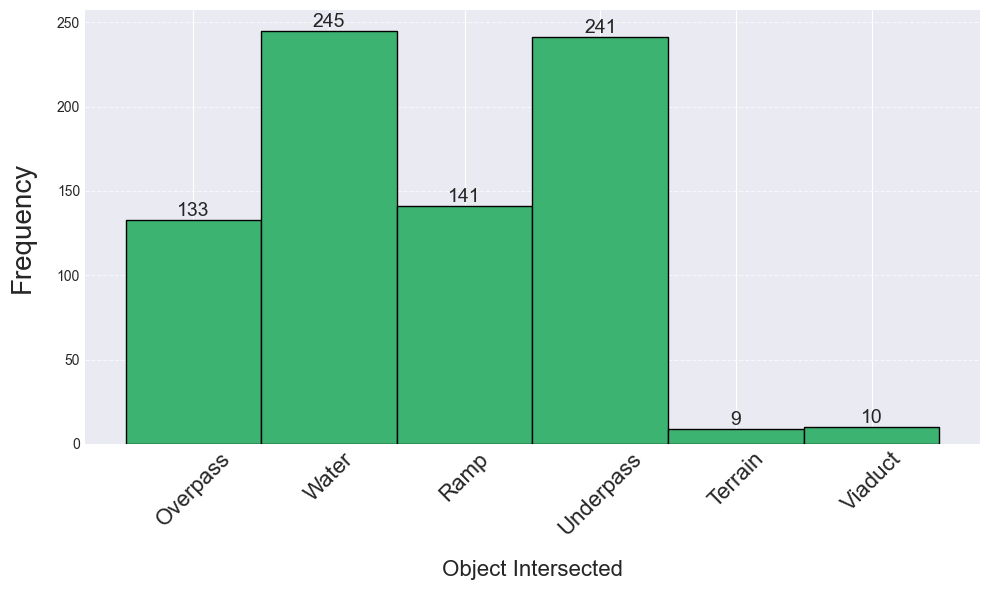

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove NA values from the DataFrame
filtered_data = final_data_reduced["OBJECT_INTERSECTED"].dropna()

# Convert to string if values are categorical or discrete
filtered_data = filtered_data.astype(str)

# Plot histogram of the column "OBJECT_INTERSECTED"
plt.figure(figsize=(10, 6))
counts, bins, bars = plt.hist(filtered_data, bins=len(filtered_data.unique()), edgecolor="black", color="mediumseagreen", align='mid')

# Add counts above the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count, int(count),
             ha='center', va='bottom', fontsize=14)

# Customize x-axis labels to center them on the bars
plt.xticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)], filtered_data.unique(), rotation=45, ha='center', fontsize=16)
plt.xlabel("Object Intersected", fontsize=16, labelpad=15)
plt.ylabel("Frequency", fontsize=20, labelpad=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()


### 🧠 **Comprehensive Multi-Model Classification Pipeline**

Executes a large-scale, multi-random-state classification workflow to predict structural bridge features such as `COLUMNS_PILES_0_1`, leveraging multiple algorithms with hyperparameter optimization and repeated validation.

---

#### 🧩 **Workflow Summary**

1. **Setup and Preprocessing**

   * Defines **target** (`COLUMNS_PILES_0_1`) and **excluded** non-predictive columns.
   * Filters complete rows for reliable modeling and splits data into randomized training and testing subsets (100 samples per seed).
   * Standardizes features using `StandardScaler` for models sensitive to input scaling.

2. **Model Suite and Optimization**

   * Evaluates five classifiers with `RandomizedSearchCV` for hyperparameter tuning:

     * 🌳 `DecisionTreeClassifier`
     * 🌲 `RandomForestClassifier`
     * ⚙️ `SVC` (Support Vector Machine with `StandardScaler`)
     * 🚀 `XGBClassifier` (Gradient boosting with stochastic regularization)
     * 🧩 `MLPClassifier` (Neural network with adaptive solvers and early stopping)
   * Each model is tuned over 60 iterations using 5-fold cross-validation, optimizing **accuracy**.

3. **Performance Evaluation**

   * For each model, computes **Accuracy** and **Weighted F1 Score**.
   * Collects best hyperparameters for each random seed to assess model stability.
   * Aggregates metrics in `overall_results` across 10 random states for reproducibility.

4. **Prediction Logging**

   * Stores encoded training and test predictions for each run in `prediction_results`.
   * Maintains consistent index alignment with `final_data_reduced` for traceability.

---

#### 🧾 **Outputs**

* **`overall_results`** — Summary of best parameters, Accuracy, and F1 Score across all models and seeds.
* **`prediction_results`** — DataFrame containing encoded predictions per model, target, and random state for detailed review.


In [ ]:
# Classification

import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint
from sklearn.preprocessing import LabelEncoder

# Define columns to check
columns_to_check = [
                    'COLUMNS_PILES_0_1','L_H_MIN',"LRR", "TRR"]

# Define the size of the test set
test_size = 100

# Define your features and targets
target_features = [
                  'COLUMNS_PILES_0_1'
                                    ]

exclude_features = ['STRUCTURE_ID', 'SPACING_PITCH_IN','COLUMNS_PILES_PER_BENT',
                    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
                    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
                    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
                    'SUPPORT_TYPE']

# Function to evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    # Ensure y_train and y_test are 1D arrays
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    # Define models and their parameter distributions for RandomizedSearchCV
    models = {
        'DecisionTreeClassifier': {
            'model': DecisionTreeClassifier(),
            'param_dist': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'RandomForestClassifier': {
            'model': RandomForestClassifier(),
            'param_dist': {
                'n_estimators': [10, 50, 100, 200, 300, 400],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'max_features': ['sqrt', 'log2', None],
                'min_samples_leaf': [1, 2, 4],
                'bootstrap': [True, False]
            }
        },
        'SVC': {
            'model': make_pipeline(StandardScaler(), SVC()),
            'param_dist': {
                'svc__C': uniform(0.1, 10),
                'svc__kernel': ['rbf', 'poly'],
                'svc__degree': [2, 3, 4, 5],
                'svc__gamma': ['scale'],
                'svc__coef0': uniform(0, 1)
            }
        },
        'XGBClassifier': {
            'model': XGBClassifier(eval_metric='mlogloss'),
            'param_dist': {
                'n_estimators': randint(10, 200),
                'max_depth': randint(1, 20),
                'learning_rate': uniform(0.01, 0.3),
                'subsample': uniform(0.5, 0.5),
                'colsample_bytree': uniform(0.5, 0.5),
                'gamma': uniform(0, 0.5)
            }
        },
        'MLPClassifier': {
          'model': make_pipeline(StandardScaler(), MLPClassifier(random_state=42, early_stopping=True)),
          'param_dist': {
              'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
              'mlpclassifier__activation': ['tanh', 'relu'],
              'mlpclassifier__solver': ['adam', 'sgd'],
              'mlpclassifier__alpha': uniform(0.0001, 0.01),
              'mlpclassifier__max_iter': [1500, 2000, 3000]  # Increased max_iter
             }
        }
    }

    results = {}
    best_model = None
    best_model_name = None

    # Evaluate each model
    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']

        # Set up RandomizedSearchCV with a seed
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=60, cv=5, scoring='accuracy', n_jobs=1,
                                           random_state=42)

        try:
            random_search.fit(X_train, y_train)
            y_pred = random_search.best_estimator_.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            results[model_name] = {
                'Best Parameters': random_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1
            }
        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    results_df = pd.DataFrame(results).T

    return results_df

# Initialize a DataFrame to store predictions for each iteration
prediction_results = pd.DataFrame(index=final_data_reduced.index)

# Initialize a DataFrame to store the results
overall_results = pd.DataFrame()

# Iterate through multiple random states
random_states = [21, 42,
                14, 1, 12, 23, 84, 96, 100, 55
                 ]
for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = final_data_reduced.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(test_size, len(complete_rows)), random_state=random_state)
    train_set = final_data_reduced[~final_data_reduced.index.isin(test_set.index)]

    all_columns = train_set.columns
    analysis_features = [col for col in all_columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target])
        test_subset = test_set.dropna(subset=[target])
        train_subset = train_subset.dropna(subset=analysis_features)
        test_subset = test_subset.dropna(subset=analysis_features)

        X_train = train_subset[analysis_features]
        y_train = train_subset[target]
        X_test = test_subset[analysis_features]
        y_test = test_subset[target]

        print(f"Training dataset shape for target '{target}': {X_train.shape}")

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded)

        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

        # Store predictions in the prediction_results DataFrame
        train_predictions = pd.Series(y_train_encoded, index=X_train.index, name=f"Train_{target}_{random_state}")
        test_predictions = pd.Series(y_test_encoded, index=X_test.index, name=f"Test_{target}_{random_state}")
        prediction_results = prediction_results.join(train_predictions, how='outer', rsuffix=f'_{random_state}')
        prediction_results = prediction_results.join(test_predictions, how='outer', rsuffix=f'_{random_state}')

# Output the overall results
print(overall_results)
print(prediction_results)


Using random state: 21
Processing target: OBJECT_INTERSECTED
Training dataset shape for target 'OBJECT_INTERSECTED': (679, 81)
Using random state: 42
Processing target: OBJECT_INTERSECTED
Training dataset shape for target 'OBJECT_INTERSECTED': (679, 81)
Using random state: 14
Processing target: OBJECT_INTERSECTED
Training dataset shape for target 'OBJECT_INTERSECTED': (679, 81)
Using random state: 1
Processing target: OBJECT_INTERSECTED
Training dataset shape for target 'OBJECT_INTERSECTED': (679, 81)
Using random state: 12
Processing target: OBJECT_INTERSECTED
Training dataset shape for target 'OBJECT_INTERSECTED': (679, 81)
Using random state: 23
Processing target: OBJECT_INTERSECTED
Training dataset shape for target 'OBJECT_INTERSECTED': (679, 81)
Using random state: 84
Processing target: OBJECT_INTERSECTED
Training dataset shape for target 'OBJECT_INTERSECTED': (679, 81)
Using random state: 96
Processing target: OBJECT_INTERSECTED
Training dataset shape for target 'OBJECT_INTERSECT

### 💾 Save Model Results to CSV

Stores the final classification results in `obj_results_std`, deletes the temporary `overall_results`, and exports the summary to a local CSV file for analysis or recordkeeping.

In [ ]:
obj_results_std = overall_results
del overall_results
local_path = "C:/Users/jlensing/Desktop/obj_results_std.csv"  # Adjust for Mac/Linux
obj_results_std.to_csv(local_path, index=True)
print(f"File saved to {local_path}")

File saved to C:/Users/jlensing/Desktop/obj_results_std.csv


### 💾 Export Prediction Results to CSV

Saves encoded bridge-level prediction outputs for all random states to a CSV file, then removes the temporary DataFrame from memory.

In [ ]:
obj_preds_std = prediction_results
del prediction_results
local_path = "C:/Users/jlensing/Desktop/obj_preds_std.csv"  # Adjust for Mac/Linux
obj_preds_std.to_csv(local_path, index=True)
print(f"File saved to {local_path}")

File saved to C:/Users/jlensing/Desktop/obj_preds_std.csv


### 📊 View Model Results  

Displays the saved classification results stored in `obj_results_std`.


In [ ]:
obj_results_std

,Best Parameters,Accuracy,F1 Score,Target,Random State
DecisionTreeClassifier,"{'splitter': 'random', 'min_samples_split': 5,...",0.81,0.802153,OBJECT_INTERSECTED,21
RandomForestClassifier,"{'n_estimators': 400, 'min_samples_split': 10,...",0.87,0.869111,OBJECT_INTERSECTED,21
SVC,"{'svc__C': 0.155221171236024, 'svc__coef0': 0....",0.87,0.858701,OBJECT_INTERSECTED,21
XGBClassifier,"{'colsample_bytree': 0.716760368790371, 'gamma...",0.89,0.884478,OBJECT_INTERSECTED,21
MLPClassifier,"{'mlpclassifier__activation': 'relu', 'mlpclas...",0.83,0.816931,OBJECT_INTERSECTED,21
DecisionTreeClassifier,"{'splitter': 'best', 'min_samples_split': 5, '...",0.88,0.86929,OBJECT_INTERSECTED,42
RandomForestClassifier,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.96,0.957089,OBJECT_INTERSECTED,42
SVC,"{'svc__C': 0.155221171236024, 'svc__coef0': 0....",0.92,0.9015,OBJECT_INTERSECTED,42
XGBClassifier,"{'colsample_bytree': 0.9827096756443968, 'gamm...",0.96,0.957089,OBJECT_INTERSECTED,42
MLPClassifier,"{'mlpclassifier__activation': 'tanh', 'mlpclas...",0.9,0.890306,OBJECT_INTERSECTED,42


### 🤖 **Automated Multiclass Classification with AutoGluon**

Uses **AutoGluon TabularPredictor** to automate model training, hyperparameter tuning, and evaluation across multiple random states for the `OBJECT_INTERSECTED` target feature.

---

#### 🧩 **Workflow Summary**

1. **Configuration**

   * Defines:

     * `time_limit = 600` seconds for each AutoGluon run.
     * Multiple random seeds to ensure reproducibility (`[21, 42, 84, 55, 100, 96, 14, 23, 12, 1]`).
   * Excludes irrelevant or redundant columns (e.g., IDs, geometrical constants).
   * Sets the **target feature**: `OBJECT_INTERSECTED`.

2. **Data Preparation**

   * Filters out rows with missing target values.
   * Randomly selects up to 100 samples as a test set per random seed.
   * Converts data subsets into AutoGluon-compatible `TabularDataset` objects.

3. **Model Training and Evaluation**

   * Trains an **AutoGluon TabularPredictor** for **multiclass classification**, using the `medium_quality` preset.
   * Evaluates on the test set to record metrics such as:

     * Accuracy
     * Weighted F1 Score
     * ROC AUC (if available)
   * Captures:

     * Best-performing model
     * Feature importance values
     * Number of features used

4. **Results Aggregation**

   * Stores:

     * Predictions (`total_predictions` and `total_train_predictions`)
     * Feature importances (`total_feature_importance`)
     * Per-run metrics (`performance_df`)
   * Computes **average accuracy** and **average F1 score** across all runs.

---

#### 🧾 **Outputs**

* **`performance_df`** — Per-iteration performance metrics and model details.
* **`total_predictions` / `total_train_predictions`** — True vs. predicted outputs for test and training sets.
* **`total_feature_importance`** — Aggregated importance scores across all runs.
* Prints:

  * Individual run results
  * Average performance summary (Accuracy, F1 Score).


In [ ]:
#check time_limit and output_dir (change folder)

import pandas as pd
import os
from autogluon.tabular import TabularPredictor, TabularDataset
from sklearn.metrics import mean_squared_error, r2_score, f1_score

# List of random states to use
random_states = [21, 42,
                 84,
                 55, 100, 96, 14, 23, 12, 1,
                 ]

# Set the time limit for each iteration (in seconds)
time_limit = 600  # Adjust this value as needed

# Define columns to check
columns_to_check = [
                    'OBJECT_INTERSECTED']

# Define the size of the test set
test_size = 100

# Define your features and targets
target_features = 'OBJECT_INTERSECTED'  # Add the names of your target features here
exclude_features = ['STRUCTURE_ID', 'SPACING_PITCH_IN','COLUMNS_PILES_PER_BENT',
                     'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
                    'CRITICAL_TRUTH_0_1', 'COLUMNS_PILES_0_1', "CLEAR_HEIGHT_FT",
                    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
                    'SUPPORT_TYPE']

# Initialize lists to store results
all_feature_importance = []
performance_results = []
all_predictions = []
all_train_predictions = []

# Loop through each random state
for random_state in random_states:
    print(f"\n--- Running Iteration with Random State: {random_state} ---")

    # Filter rows with no missing data in the specified columns
    complete_rows = final_data_reduced.dropna(subset=columns_to_check)

    # Randomly select a subset of rows for the test set
    test_set = complete_rows.sample(n=min(test_size, len(complete_rows)), random_state=random_state)
    train_set = final_data_reduced[~final_data_reduced.index.isin(test_set.index)]

    # Prepare train and test datasets
    train_set_cleaned = train_set.drop(columns=exclude_features, errors='ignore').dropna(subset=target_features)
    test_set_cleaned = test_set.drop(columns=exclude_features, errors='ignore').dropna(subset=target_features)

    train_data = TabularDataset(train_set_cleaned)
    test_data = TabularDataset(test_set_cleaned)

    # Train the model
    predictor = TabularPredictor(label=target_features, problem_type='multiclass', eval_metric ='accuracy' ).fit(
        train_data, presets='medium_quality',
                    time_limit=time_limit,
                      )

    # Evaluate Model
    y_true = test_set_cleaned[target_features]
    y_pred = predictor.predict(test_data)
    performance = predictor.evaluate(test_data)
    best_model = predictor.info()['best_model']
    num_features = len(train_data.columns) - 1  # Subtracting target column

    # Save predictions
    predictions = pd.DataFrame({
        'true': y_true,
        'predicted': y_pred
    }, index=test_set_cleaned.index)
    predictions['random_state'] = random_state
    all_predictions.append(predictions)

    # Save training predictions
    train_predictions = pd.DataFrame({
        'true': train_set_cleaned[target_features],
        'predicted': predictor.predict(train_data)
    }, index=train_set_cleaned.index)
    train_predictions['random_state'] = random_state
    all_train_predictions.append(train_predictions)

    # Capture feature importance
    feature_importance = predictor.feature_importance(train_data)
    feature_importance['random_state'] = random_state
    all_feature_importance.append(feature_importance)

    # Compute F1 score for multiclass
    f1_macro = f1_score(y_true, y_pred, average='weighted')  # Use 'macro' for balanced importance across classes

    # Store performance metrics
    performance_results.append({
        'random_state': random_state,
        'roc_auc': performance,
        'accuracy': performance.get('accuracy', None),
        'f1_score': f1_macro,
        'best_model': best_model,
        'num_features': num_features
    })

# Combine all predictions
total_predictions = pd.concat(all_predictions)
total_train_predictions = pd.concat(all_train_predictions)

# Create performance DataFrame
performance_df = pd.DataFrame(performance_results)

# Calculate averages
average_accuracy = performance_df['accuracy'].mean()
average_f1 = performance_df['f1_score'].mean()

# Combine all feature importance results
total_feature_importance = pd.concat(all_feature_importance)

# Print results
print("\n--- Model Performance Results ---")
print(performance_df)

print("\n--- Average Performance Across Iterations ---")
print(f"Average Accuracy: {average_accuracy}")
print(f"Average F1 Score: {average_f1}")


No path specified. Models will be saved in: "AutogluonModels\ag-20250219_233343"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          20
Memory Avail:       110.28 GB / 127.69 GB (86.4%)
Disk Space Avail:   794.64 GB / 953.09 GB (83.4%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "C:\Users\jlensing\AutogluonModels\ag-20250219_233343"
Train Data Rows:    679
Train Data Columns: 81
Label Column:       OBJECT_INTERSECTED
Problem Type:       multiclass
Preprocessing data ...
Fraction of data from classes with at least 10 examples that will be kept for training models: 0.9764359351988218
Train Data Class Count: 4
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:          


--- Running Iteration with Random State: 21 ---


	Train Data (Processed) Memory Usage: 0.33 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.17s ...
AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 530, Val Rows: 133
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{}],
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, {'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 3, 'ag_args': {'name_suffix': 'Large', 'priority': 0, 'hyperparameter_tune_kwargs': None}}],
	'CAT': [{}],
	'XGB': [{}],
	'FASTAI': [{}],
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_a


--- Running Iteration with Random State: 42 ---


	0.6015	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: KNeighborsDist ... Training model for up to 599.84s of the 599.84s of remaining time.
	0.6391	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 599.77s of the 599.77s of remaining time.
	0.8722	 = Validation score   (accuracy)
	0.92s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMXT ... Training model for up to 598.82s of the 598.82s of remaining time.
	0.9023	 = Validation score   (accuracy)
	1.2s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 597.55s of the 597.55s of remaining time.
	0.8947	 = Validation score   (accuracy)
	1.17s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 596.36s of the 596.35s of remaining time.
	0.8647	


--- Running Iteration with Random State: 84 ---


	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 60 | ['LAT', 'LONG', 'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', ...]
		('int', [])   : 21 | ['Special Single Span?', 'BASE_HWY_NETWORK_012', 'DETOUR_KILOS_019', 'YEAR_BUILT_027', 'TRAFFIC_LANES_UND_028B', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])     : 58 | ['LAT', 'LONG', 'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', ...]
		('int', [])       : 14 | ['DETOUR_KILOS_019', 'YEAR_BUILT_027', 'TRAFFIC_LANES_UND_028B', 'YEAR_ADT_030', 'DEGREES_SKEW_034', ...]
		('int', ['bool']) :  9 | ['Special Single Span?', 'BASE_HWY_NETWORK_012', 'STRUCTURE_FLARED_035', 'INSPECT_FREQ_MONTHS_091', 'FRACTURE_092A', ...]
	0.2s = Fit runtime
	81 features in original data used to generate 81 features in processed data.
	Train Data (Processed) Memory Usage: 0.33 MB (0.0% of available memory)
Data preprocessing and feature engineering runtim


--- Running Iteration with Random State: 55 ---


Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 536, Val Rows: 135
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{}],
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, {'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 3, 'ag_args': {'name_suffix': 'Large', 'priority': 0, 'hyperparameter_tune_kwargs': None}}],
	'CAT': [{}],
	'XGB': [{}],
	'FASTAI': [{}],
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multic


--- Running Iteration with Random State: 100 ---


	0.5789	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: KNeighborsDist ... Training model for up to 599.84s of the 599.84s of remaining time.
	0.6241	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 599.78s of the 599.78s of remaining time.
	0.8647	 = Validation score   (accuracy)
	0.9s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMXT ... Training model for up to 598.85s of the 598.85s of remaining time.
	0.9173	 = Validation score   (accuracy)
	1.47s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 597.25s of the 597.25s of remaining time.
	0.9248	 = Validation score   (accuracy)
	1.26s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 595.93s of the 595.93s of remaining time.
	0.8797	


--- Running Iteration with Random State: 96 ---


AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 539, Val Rows: 135
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{}],
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, {'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 3, 'ag_args': {'name_suffix': 'Large', 'priority': 0, 'hyperparameter_tune_kwargs': None}}],
	'CAT': [{}],
	'XGB': [{}],
	'FASTAI': [{}],
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'G


--- Running Iteration with Random State: 14 ---


	0.5852	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: KNeighborsDist ... Training model for up to 599.82s of the 599.82s of remaining time.
	0.6074	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 599.75s of the 599.75s of remaining time.
	0.9037	 = Validation score   (accuracy)
	0.93s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMXT ... Training model for up to 598.79s of the 598.79s of remaining time.
	0.9111	 = Validation score   (accuracy)
	1.33s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 597.40s of the 597.40s of remaining time.
	0.9185	 = Validation score   (accuracy)
	1.3s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 596.03s of the 596.03s of remaining time.
	0.9037	


--- Running Iteration with Random State: 23 ---


	0.5704	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: KNeighborsDist ... Training model for up to 599.82s of the 599.82s of remaining time.
	0.6296	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 599.75s of the 599.75s of remaining time.
	0.9333	 = Validation score   (accuracy)
	0.93s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMXT ... Training model for up to 598.79s of the 598.79s of remaining time.
	0.9185	 = Validation score   (accuracy)
	1.31s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 597.44s of the 597.44s of remaining time.
	0.9037	 = Validation score   (accuracy)
	1.32s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 596.09s of the 596.08s of remaining time.
	0.9037


--- Running Iteration with Random State: 12 ---


		('float', []) : 60 | ['LAT', 'LONG', 'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', ...]
		('int', [])   : 21 | ['Special Single Span?', 'BASE_HWY_NETWORK_012', 'DETOUR_KILOS_019', 'YEAR_BUILT_027', 'TRAFFIC_LANES_UND_028B', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])     : 58 | ['LAT', 'LONG', 'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', ...]
		('int', [])       : 14 | ['DETOUR_KILOS_019', 'YEAR_BUILT_027', 'TRAFFIC_LANES_UND_028B', 'YEAR_ADT_030', 'DEGREES_SKEW_034', ...]
		('int', ['bool']) :  9 | ['Special Single Span?', 'BASE_HWY_NETWORK_012', 'STRUCTURE_FLARED_035', 'INSPECT_FREQ_MONTHS_091', 'FRACTURE_092A', ...]
	0.2s = Fit runtime
	81 features in original data used to generate 81 features in processed data.
	Train Data (Processed) Memory Usage: 0.34 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.18s ...
AutoGluon will gauge predictive performance using e


--- Running Iteration with Random State: 1 ---


	0.01s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: KNeighborsDist ... Training model for up to 599.84s of the 599.84s of remaining time.
	0.6103	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 599.77s of the 599.76s of remaining time.
	0.8529	 = Validation score   (accuracy)
	0.89s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMXT ... Training model for up to 598.85s of the 598.85s of remaining time.
	0.8897	 = Validation score   (accuracy)
	1.35s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 597.43s of the 597.43s of remaining time.
	0.9044	 = Validation score   (accuracy)
	1.41s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 595.95s of the 595.95s of remaining time.
	0.8897	 = Validation score   (accuracy)
	0.89s	


--- Model Performance Results ---
   random_state  \
0            21   
1            42   
2            84   
3            55   
4           100   
5            96   
6            14   
7            23   
8            12   
9             1   

                                                                                  roc_auc  \
0   {'accuracy': 0.9, 'balanced_accuracy': 0.6059242934923518, 'mcc': 0.8640389021931211}   
1  {'accuracy': 0.93, 'balanced_accuracy': 0.6296296296296298, 'mcc': 0.9051665297487074}   
2  {'accuracy': 0.89, 'balanced_accuracy': 0.7320846233230135, 'mcc': 0.8481989250108056}   
3  {'accuracy': 0.92, 'balanced_accuracy': 0.7335587108406584, 'mcc': 0.8908963320599599}   
4  {'accuracy': 0.86, 'balanced_accuracy': 0.5968915343915348, 'mcc': 0.8114282500487627}   
5  {'accuracy': 0.89, 'balanced_accuracy': 0.7450000000000001, 'mcc': 0.8490297676630997}   
6  {'accuracy': 0.89, 'balanced_accuracy': 0.7639821598154933, 'mcc': 0.8549935347379037}   
7  {'accura

### 💾 Export AutoGluon Model Outputs to CSV

This section saves key AutoGluon outputs — training/test predictions, model performance, and feature importance — to local CSV files for analysis or reporting.

In [ ]:
# train_preds_obj= total_train_predictions
# del total_train_predictions
# local_path = "C:/Users/jlensing/Desktop/train_preds_obj.csv"  # Adjust for Mac/Linux
# train_preds_obj.to_csv(local_path, index=True)

# test_preds_obj= total_predictions
# del total_predictions
# local_path = "C:/Users/jlensing/Desktop/test_preds_obj.csv"  # Adjust for Mac/Linux
# test_preds_obj.to_csv(local_path, index=True)

perf_df_obj= performance_df
del performance_df
local_path = "C:/Users/jlensing/Desktop/perf_df_obj.csv"  # Adjust for Mac/Linux
perf_df_obj.to_csv(local_path, index=True)

# feature_imp_obj= total_feature_importance
# del total_feature_importance
# local_path = "C:/Users/jlensing/Desktop/feature_imp_obj.csv"  # Adjust for Mac/Linux
# feature_imp_obj.to_csv(local_path, index=True)

### 🧠 **Multimodal AutoGluon Classification for `OBJECT_INTERSECTED`**

Runs a **multimodal AutoGluon pipeline** for multiclass classification, integrating traditional tabular features with potential multimodal inputs (e.g., embeddings or text-based columns) for richer feature interpretation.

---

#### 🧩 **Workflow Summary**

1. **Configuration**

   * Uses a **single random seed** (`21`) for reproducibility and rapid iteration.
   * Sets a **training time limit** of 600 seconds per run.
   * Drops redundant or irrelevant structural features (e.g., dimensions, geometry identifiers) defined in `columns_to_drop`.
   * Target variable: `OBJECT_INTERSECTED`.

2. **Data Preparation**

   * Filters rows with complete target data.
   * Randomly samples **100 rows** for testing; the remainder are used for training.
   * Creates AutoGluon-compatible `TabularDataset` objects from the cleaned data.

3. **Model Training**

   * Initializes an **AutoGluon TabularPredictor** with:

     * `problem_type='multiclass'`
     * `presets='experimental_quality'`
     * `hyperparameters='multimodal'` for cross-modal feature integration.
   * Automatically handles model selection, ensembling, and data preprocessing under the hood.

4. **Evaluation and Metrics**

   * Predicts on both test and training datasets.
   * Computes:

     * **Accuracy** — overall classification correctness.
     * **Weighted F1 Score** — harmonic mean balancing class imbalance effects.
   * Logs the **best model architecture** chosen by AutoGluon.

5. **Result Management**

   * Stores per-iteration:

     * Predictions (`total_predictions`, `total_train_predictions`).
     * Performance metrics (`performance_df`).
   * Saves all outputs to the `./Multiclass_Outputs` directory.

---

#### 🧾 **Outputs**

* **`performance_results.csv`** — Accuracy, F1 scores, and best model summaries.
* **`total_predictions.csv`** — Predicted vs. true class labels on the test set.
* **`total_train_predictions.csv`** — Predictions for training samples.
* Console displays performance metrics and confirms the saved output path.



In [ ]:
# multimodal

import pandas as pd
import os
from autogluon.tabular import TabularPredictor, TabularDataset
from sklearn.metrics import accuracy_score, f1_score

# List of random states to use
random_states = [21,
                 #42, 14, 1, 12, 23, 84, 96, 100, 55
                 ]

# Set the time limit for each iteration (in seconds)
time_limit = 600  # Adjust this value as needed

# Define the target and columns to drop
columns_to_drop = [
    "COLUMNS_PILES_PER_BENT", "CLEAR_HEIGHT_FT", "B_TRANS_IN",
    "COLUMNS_PILES_0_1", "LRR", "B_LONG_IN", "CD_LONG",
    "CD_TRANS", "L_H_LONG", "L_H_TRANS", "Z_KNOWN", "STRUCTURE_ID",
    "CRITICAL_TRUTH_0_1", "CD_MIN", "SUPPORT_TYPE", "SPACING_PITCH_IN",
    "LAT", "LONG", "TRR", "STRUCTURE_TYPE"
]
target_column = "OBJECT_INTERSECTED"  # Update this to your multiclass target column

# Directory to save outputs
output_dir = "./Multiclass_Outputs"
os.makedirs(output_dir, exist_ok=True)

# Initialize lists to store results
performance_results = []
all_predictions = []
all_train_predictions = []

# Loop through each random state
for random_state in random_states:
    print(f"\n--- Running Iteration with Random State: {random_state} ---")

    # Filter rows with no missing data in the specified columns
    complete_rows = final_data_reduced.dropna(subset=[target_column])

    # Randomly select a subset of rows for the test set
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = final_data_reduced[~final_data_reduced.index.isin(test_set.index)]

    # Prepare train and test datasets
    train_set_cleaned = train_set.drop(columns=columns_to_drop, errors='ignore').dropna(subset=[target_column])
    test_set_cleaned = test_set.drop(columns=columns_to_drop, errors='ignore').dropna(subset=[target_column])

    train_data = TabularDataset(train_set_cleaned)
    test_data = TabularDataset(test_set_cleaned)

    # Train the initial model
    predictor = TabularPredictor(label=target_column, problem_type="multiclass").fit(
        train_data, presets="experimental_quality", time_limit=time_limit, hyperparameters='multimodal'
    )

    # Evaluate Initial Model
    y_true = test_set_cleaned[target_column]
    y_pred = predictor.predict(test_data)

    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")

    # Save predictions
    predictions = pd.DataFrame({
        "true": y_true,
        "predicted": y_pred
    }, index=test_set_cleaned.index)
    predictions["random_state"] = random_state
    all_predictions.append(predictions)

    # Save training predictions
    train_predictions = pd.DataFrame({
        "true": train_set_cleaned[target_column],
        "predicted": predictor.predict(train_data)
    }, index=train_set_cleaned.index)
    train_predictions["random_state"] = random_state
    all_train_predictions.append(train_predictions)

    # Save performance metrics
    performance_results.append({
        "random_state": random_state,
        "accuracy": accuracy,
        "f1_weighted": f1,
        "best_model": predictor.info()["best_model"]
    })

# Combine all predictions and performance metrics
total_predictions = pd.concat(all_predictions)
total_train_predictions = pd.concat(all_train_predictions)
performance_df = pd.DataFrame(performance_results)

# Save outputs to CSV files
performance_df.to_csv(os.path.join(output_dir, "performance_results.csv"), index=False)
total_predictions.to_csv(os.path.join(output_dir, "total_predictions.csv"))
total_train_predictions.to_csv(os.path.join(output_dir, "total_train_predictions.csv"))

# Print results
print("\n--- Model Performance Results ---")
print(performance_df)

print(f"All outputs saved to: {output_dir}")


No path specified. Models will be saved in: "AutogluonModels\ag-20250130_210231"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          20
Memory Avail:       105.64 GB / 127.69 GB (82.7%)
Disk Space Avail:   875.46 GB / 953.09 GB (91.9%)
Presets specified: ['experimental_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Th


--- Running Iteration with Random State: 21 ---


Leaderboard on holdout data (DyStack):
                    model  score_holdout  score_val eval_metric  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBMLarge_BAG_L1       0.907895   0.937182    accuracy        0.211518       0.037872    3.888199                 0.211518                0.037872           3.888199            1       True          5
1          XGBoost_BAG_L1       0.907895   0.940577    accuracy        0.604639       0.052863    2.752716                 0.604639                0.052863           2.752716            1       True          3
2       LightGBMXT_BAG_L1       0.894737   0.937182    accuracy        0.237667       0.060656    2.760265                 0.237667                0.060656           2.760265            1       True          2
3         CatBoost_BAG_L1       0.894737   0.937182    accuracy        0.609796       0.060301   52.107105               


--- Model Performance Results ---
   random_state  accuracy  f1_weighted           best_model
0            21      0.85       0.8373  WeightedEnsemble_L2
All outputs saved to: ./Multiclass_Outputs


### 🤖 **AutoGluon Binary Classification for `CRITICAL_TRUTH_0_1`**

Executes a **binary classification pipeline** using AutoGluon’s `TabularPredictor` to evaluate bridge condition outcomes (`CRITICAL_TRUTH_0_1`) across multiple random seeds, integrating bagging, feature importance analysis, and model evaluation.

---

#### 🧩 **Workflow Summary**

1. **Configuration**

   * Performs 10 randomized training runs (`random_states`).
   * Each model is trained for up to **600 seconds** per iteration.
   * Uses **medium-quality preset** and **XGBoost** as the base learner (`hyperparameters={'XGB': {}}`).
   * Employs **5-fold bagging** (`num_bag_folds=5`) for improved robustness.

2. **Data Preparation**

   * Filters for rows with non-missing values in `CRITICAL_TRUTH_0_1`.
   * Randomly samples **100 test samples** per iteration.
   * Drops excluded engineering and geometric features to prevent leakage.
   * Converts cleaned train/test sets to `TabularDataset` format for AutoGluon compatibility.

3. **Model Training and Evaluation**

   * Trains an AutoGluon `TabularPredictor` (`problem_type='binary'`, metric: accuracy).
   * Automatically tunes and ensembles XGBoost configurations.
   * Evaluates on unseen test data:

     * **Accuracy** — proportion of correct classifications.
     * **Weighted F1 Score** — harmonic mean adjusting for class imbalance.
   * Logs the best-performing model and number of effective features used.

4. **Feature Importance Extraction**

   * Computes feature importance from the trained model per iteration.
   * Aggregates results to assess stability across random splits.

5. **Results Aggregation**

   * Collects:

     * **Predictions** for both train and test sets.
     * **Feature importance metrics**.
     * **Performance scores** (accuracy, F1, and ROC AUC).
   * Combines all iterations into unified DataFrames for summary analysis.

---

#### 🧾 **Outputs**

* `performance_df` → Accuracy, F1, and model details per random state.
* `total_predictions` / `total_train_predictions` → Model outputs for test and training sets.
* `total_feature_importance` → Ranked importance of input features across runs.
* Printed summary:

  ```
  Average Accuracy: <value>
  Average F1 Score: <value>
  ```



In [ ]:
#check time_limit and output_dir (change folder)

import pandas as pd
import os
from autogluon.tabular import TabularPredictor, TabularDataset
from sklearn.metrics import mean_squared_error, r2_score, f1_score

# List of random states to use
random_states = [21, 42,
                 84,
                 55, 100, 96, 14, 23, 12, 1,
                 ]

# Set the time limit for each iteration (in seconds)
time_limit = 600  # Adjust this value as needed

# Define columns to check
columns_to_check = [
                    'CRITICAL_TRUTH_0_1']

# Define the size of the test set
test_size = 100

# Define your features and targets
target_features = 'CRITICAL_TRUTH_0_1'  # Add the names of your target features here
exclude_features = ['STRUCTURE_ID', 'COLUMNS_PILES_0_1','COLUMNS_PILES_PER_BENT',
                     'Z_KNOWN', 'CD_MIN', 'L_H_MIN', 'OBJECT_INTERSECTED',
                    'SPACING_PITCH_IN', 'COLUMNS_PILES_0_1', "CLEAR_HEIGHT_FT",
                    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
                    'SUPPORT_TYPE']

# Initialize lists to store results
all_feature_importance = []
performance_results = []
all_predictions = []
all_train_predictions = []

# Loop through each random state
for random_state in random_states:
    print(f"\n--- Running Iteration with Random State: {random_state} ---")

    # Filter rows with no missing data in the specified columns
    complete_rows = final_data_reduced.dropna(subset=columns_to_check)

    # Randomly select a subset of rows for the test set
    test_set = complete_rows.sample(n=min(test_size, len(complete_rows)), random_state=random_state)
    train_set = final_data_reduced[~final_data_reduced.index.isin(test_set.index)]

    # Prepare train and test datasets
    train_set_cleaned = train_set.drop(columns=exclude_features, errors='ignore').dropna(subset=target_features)
    test_set_cleaned = test_set.drop(columns=exclude_features, errors='ignore').dropna(subset=target_features)

    train_data = TabularDataset(train_set_cleaned)
    test_data = TabularDataset(test_set_cleaned)

    # Train the model
    predictor = TabularPredictor(label=target_features, problem_type='binary', eval_metric ='accuracy' ).fit(
        train_data, presets='medium_quality',
                    time_limit=time_limit,
                    hyperparameters={'XGB': {}},
            num_bag_folds=5,
            num_bag_sets=1
                      )

    # Evaluate Model
    y_true = test_set_cleaned[target_features]
    y_pred = predictor.predict(test_data)
    performance = predictor.evaluate(test_data)
    best_model = predictor.info()['best_model']
    num_features = len(train_data.columns) - 1  # Subtracting target column

    # Save predictions
    predictions = pd.DataFrame({
        'true': y_true,
        'predicted': y_pred
    }, index=test_set_cleaned.index)
    predictions['random_state'] = random_state
    all_predictions.append(predictions)

    # Save training predictions
    train_predictions = pd.DataFrame({
        'true': train_set_cleaned[target_features],
        'predicted': predictor.predict(train_data)
    }, index=train_set_cleaned.index)
    train_predictions['random_state'] = random_state
    all_train_predictions.append(train_predictions)

    # Capture feature importance
    feature_importance = predictor.feature_importance(train_data)
    feature_importance['random_state'] = random_state
    all_feature_importance.append(feature_importance)

    # Compute F1 score for multiclass
    f1_macro = f1_score(y_true, y_pred, average='weighted')  # Use 'macro' for balanced importance across classes

    # Store performance metrics
    performance_results.append({
        'random_state': random_state,
        'roc_auc': performance,
        'accuracy': performance.get('accuracy', None),
        'f1_score': f1_macro,
        'best_model': best_model,
        'num_features': num_features
    })

# Combine all predictions
total_predictions = pd.concat(all_predictions)
total_train_predictions = pd.concat(all_train_predictions)

# Create performance DataFrame
performance_df = pd.DataFrame(performance_results)

# Calculate averages
average_accuracy = performance_df['accuracy'].mean()
average_f1 = performance_df['f1_score'].mean()

# Combine all feature importance results
total_feature_importance = pd.concat(all_feature_importance)

# Print results
print("\n--- Model Performance Results ---")
print(performance_df)

print("\n--- Average Performance Across Iterations ---")
print(f"Average Accuracy: {average_accuracy}")
print(f"Average F1 Score: {average_f1}")


No path specified. Models will be saved in: "AutogluonModels\ag-20250307_231447"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          20
Memory Avail:       61.65 GB / 127.69 GB (48.3%)
Disk Space Avail:   706.34 GB / 953.09 GB (74.1%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "C:\Users\jlensing\AutogluonModels\ag-20250307_231447"
Train Data Rows:    270
Train Data Columns: 78
Label Column:       CRITICAL_TRUTH_0_1
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    63125.06 MB
	Train Data (Original)  Memory Usage: 0.43 MB (0.0% of availab


--- Running Iteration with Random State: 21 ---


			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 18 | ['TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', 'OPEN_CLOSED_POSTED_041', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 32 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHW


--- Running Iteration with Random State: 42 ---


	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['DECK_STRUCTURE_TYPE_107']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 23 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of f


--- Running Iteration with Random State: 84 ---


		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['DECK_STRUCTURE_TYPE_107']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 23 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 18 | ['TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', 'OPEN_CLOSED_POSTED_041', ...]
		('float', [])     : 15 | ['LAT', 'LONG


--- Running Iteration with Random State: 55 ---


	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 17 | ['TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', 'OPEN_CLOSED_POSTED_041', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 32 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_01


--- Running Iteration with Random State: 100 ---


	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 18 | ['TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', 'OPEN_CLOSED_POSTED_041', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 30 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_01


--- Running Iteration with Random State: 96 ---


			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 17 | ['TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', 'OPEN_CLOSED_POSTED_041', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 32 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHW


--- Running Iteration with Random State: 14 ---


	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['DECK_STRUCTURE_TYPE_107']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 23 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 18 | ['TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGA


--- Running Iteration with Random State: 23 ---


	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 18 | ['TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', 'OPEN_CLOSED_POSTED_041', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 30 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_01


--- Running Iteration with Random State: 12 ---


	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 18 | ['TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', 'OPEN_CLOSED_POSTED_041', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 30 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_01


--- Running Iteration with Random State: 1 ---


		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 17 | ['TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', 'OPEN_CLOSED_POSTED_041', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 29 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_019', ...]
		('int', ['bool']) : 17 | ['BASE_HWY_NETWORK_012', 'STRUCTURE_FLARED_035


--- Model Performance Results ---
   random_state                                            roc_auc  accuracy  \
0            21  {'accuracy': 0.82, 'balanced_accuracy': 0.5, '...      0.82   
1            42  {'accuracy': 0.83, 'balanced_accuracy': 0.5277...      0.83   
2            84  {'accuracy': 0.87, 'balanced_accuracy': 0.5955...      0.87   
3            55  {'accuracy': 0.82, 'balanced_accuracy': 0.5, '...      0.82   
4           100  {'accuracy': 0.85, 'balanced_accuracy': 0.5565...      0.85   
5            96  {'accuracy': 0.88, 'balanced_accuracy': 0.625,...      0.88   
6            14  {'accuracy': 0.83, 'balanced_accuracy': 0.5, '...      0.83   
7            23  {'accuracy': 0.85, 'balanced_accuracy': 0.5, '...      0.85   
8            12  {'accuracy': 0.79, 'balanced_accuracy': 0.4992...      0.79   
9             1  {'accuracy': 0.8, 'balanced_accuracy': 0.58046...      0.80   

   f1_score           best_model  num_features  
0  0.738901  WeightedEnsemble_L2   

### 🤖 **AutoGluon Regression for Bridge Feature Prediction**

Trains and evaluates an **AutoGluon TabularPredictor** across multiple random seeds to predict the continuous feature `COLUMNS_PILES_PER_BENT`, using XGBoost-based regression and multi-seed performance averaging.

---

#### 🧩 **Workflow Summary**

1. **Configuration and Setup**

   * Defines regression target, excluded features, test size, and model runtime per iteration (`time_limit = 600s`).
   * Prepares evaluation metrics (RMSE, R²) and initializes result storage lists.

2. **Data Splitting and Preparation**

   * Drops rows with missing target values.
   * For each random seed, samples a test set of up to 100 rows and creates train/test splits.
   * Converts clean subsets into `TabularDataset` objects for AutoGluon processing.

3. **Model Training**

   * Trains an AutoGluon `TabularPredictor` configured for regression with **XGBoost** backend.
   * Uses “medium_quality” presets for balanced performance and training speed.

4. **Prediction and Evaluation**

   * Generates predictions on test data and computes **RMSE** and **R²** scores.
   * Captures model metadata: best-performing model name and feature count.
   * Collects per-seed predictions for both training and test datasets.

5. **Feature Importance and Aggregation**

   * Extracts model feature importances per iteration.
   * Aggregates all outputs (predictions, feature importances, and metrics) across random seeds.

6. **Performance Summary**

   * Combines results into comprehensive DataFrames:

     * `total_predictions` (test results)
     * `total_train_predictions` (training set fits)
     * `performance_df` (per-run metrics)
     * `total_feature_importance` (aggregated feature rankings)
   * Calculates mean RMSE and R² to summarize overall model consistency.

---

#### 🧾 **Outputs**

* **`performance_df`** — Contains per-seed performance metrics, best model, and feature count.
* **`total_predictions`** / **`total_train_predictions`** — Stores true vs. predicted values for test and training sets.
* **`total_feature_importance`** — Aggregated feature importance across all runs.
* Console output displays model-wise and averaged performance statistics (RMSE and R²).



In [ ]:
import pandas as pd
import os
from autogluon.tabular import TabularPredictor, TabularDataset
from sklearn.metrics import root_mean_squared_error, r2_score

# List of random states to use
random_states = [21, 42, 84, 55, 100, 96, 14, 23, 12, 1]

# Set the time limit for each iteration (in seconds)
time_limit = 600

# Define target column
target_feature = 'COLUMNS_PILES_PER_BENT'

# Define features to exclude from modeling
exclude_features = ['STRUCTURE_ID', 'COLUMNS_PILES_0_1',
                    'Z_KNOWN', 'CD_MIN', 'L_H_MIN', 'OBJECT_INTERSECTED',
                    'SPACING_PITCH_IN', 'COLUMNS_PILES_0_1', "CLEAR_HEIGHT_FT",
                    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
                    'SUPPORT_TYPE', 'CRITICAL_TRUTH_0_1']

# Set test set size
test_size = 100

# Initialize storage lists
all_feature_importance = []
performance_results = []
all_predictions = []
all_train_predictions = []

# Loop over random states
for random_state in random_states:
    print(f"\n--- Running Iteration with Random State: {random_state} ---")

    # Drop NA in target column
    complete_rows = final_data_reduced.dropna(subset=[target_feature])

    # Split train/test
    test_set = complete_rows.sample(n=min(test_size, len(complete_rows)), random_state=random_state)
    train_set = final_data_reduced[~final_data_reduced.index.isin(test_set.index)]

    train_set_cleaned = train_set.drop(columns=exclude_features, errors='ignore').dropna(subset=[target_feature])
    test_set_cleaned = test_set.drop(columns=exclude_features, errors='ignore').dropna(subset=[target_feature])

    train_data = TabularDataset(train_set_cleaned)
    test_data = TabularDataset(test_set_cleaned)

    # Train AutoGluon model for regression
    predictor = TabularPredictor(label=target_feature, problem_type='regression', eval_metric='rmse').fit(
        train_data,
        presets='medium_quality',
        time_limit=time_limit,
        hyperparameters={'XGB': {}},
    )

    # Make predictions
    y_true = test_set_cleaned[target_feature]
    y_pred = predictor.predict(test_data)

    # Evaluate
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    best_model = predictor.info()['best_model']
    num_features = len(train_data.columns) - 1

    # Save test predictions
    predictions = pd.DataFrame({'true': y_true, 'predicted': y_pred}, index=test_set_cleaned.index)
    predictions['random_state'] = random_state
    all_predictions.append(predictions)

    # Save train predictions
    train_predictions = pd.DataFrame({
        'true': train_set_cleaned[target_feature],
        'predicted': predictor.predict(train_data)
    }, index=train_set_cleaned.index)
    train_predictions['random_state'] = random_state
    all_train_predictions.append(train_predictions)

    # Feature importance
    feature_importance = predictor.feature_importance(train_data)
    feature_importance['random_state'] = random_state
    all_feature_importance.append(feature_importance)

    # Store performance metrics
    performance_results.append({
        'random_state': random_state,
        'rmse': rmse,
        'r2_score': r2,
        'best_model': best_model,
        'num_features': num_features
    })

# Combine outputs
total_predictions = pd.concat(all_predictions)
total_train_predictions = pd.concat(all_train_predictions)
performance_df = pd.DataFrame(performance_results)
total_feature_importance = pd.concat(all_feature_importance)

# Averages
average_rmse = performance_df['rmse'].mean()
average_r2 = performance_df['r2_score'].mean()

# Print results
print("\n--- Model Performance Results ---")
print(performance_df)

print("\n--- Average Performance Across Iterations ---")
print(f"Average RMSE: {average_rmse:.4f}")
print(f"Average R2 Score: {average_r2:.4f}")


No path specified. Models will be saved in: "AutogluonModels\ag-20250401_213622"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          20
Memory Avail:       96.16 GB / 127.69 GB (75.3%)
Disk Space Avail:   748.98 GB / 953.09 GB (78.6%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "C:\Users\jlensing\AutogluonModels\ag-20250401_213622"
Train Data Rows:    360
Train Data Columns: 78
Label Column:       COLUMNS_PILES_PER_BENT
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    98476.20 MB
	Train Data (Original)  Memory Usage: 0.57 MB (0.0% of available memory)
	Inferring data type of each feature based


--- Running Iteration with Random State: 21 ---


	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 19 | ['TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', 'OPEN_CLOSED_POSTED_041', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 33 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_019', ...]
		('int', ['bool']) : 11 | ['BASE_HWY_NETWORK_012', 'STRUCTURE_FLARED_035', 'RAILINGS_036A', 'INSPECT_FREQ_MONTHS_091


--- Running Iteration with Random State: 42 ---


	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 21 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 33 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_019', ...]



--- Running Iteration with Random State: 84 ---


	Train Data (Processed) Memory Usage: 0.10 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.16s ...
AutoGluon will gauge predictive performance using evaluation metric: 'root_mean_squared_error'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 288, Val Rows: 72
User-specified model hyperparameters to be fit:
{
	'XGB': [{}],
}
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: XGBoost ... Training model for up to 599.84s of the 599.83s of remaining time.
	-0.9514	 = Validation score   (-root_mean_squared_error)
	0.71s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 599.08s of remaining time.
	Ensemble Weights: {'XGBoost'


--- Running Iteration with Random State: 55 ---


		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 20 | ['TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', 'OPEN_CLOSED_POSTED_041', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 32 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_019', ...]
		('int', ['bool']) : 11 | ['BASE_HWY_NETWORK_012', 'STRUCTURE_FLARED_035', 'RAILINGS_036A', 'HISTORY_037', 'INSPECT_FREQ_MONTHS_091', ...]
	0.2s = Fit runtime
	78 features in origin


--- Running Iteration with Random State: 100 ---


		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 21 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 31 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_019', ...]
		('int', ['bool']) : 11 | ['BASE_HWY_NETWORK_012', 'STRUCTURE_FLARED_035', 'HISTORY_037', 'WORK_PROPOSED_075A', 'INSPECT_FREQ_MONTHS_091', ...]
	0.2s = Fit runtime
	78 features in original d


--- Running Iteration with Random State: 96 ---


	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 19 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 32 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_019', ...]
		('int', ['bool']) : 12 | ['BASE_HWY_NETWORK_012', 'STRUCTURE_FLARED_035', 'HISTORY_037', 'INSPECT_FREQ_MONTHS_091', 'FRACTUR


--- Running Iteration with Random State: 14 ---


		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 20 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 31 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_019', ...]
		('int', ['bool']) : 12 | ['BASE_HWY_NETWORK_012', 'STRUCTURE_FLARED_035', 'INV_RATING_METH_065', 'INSPECT_FREQ_MONTHS_091', 'FRACTURE_092A', ...]
	0.2s = Fit runtime
	78 features in origina


--- Running Iteration with Random State: 23 ---


		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 21 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 31 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_019', ...]
		('int', ['bool']) : 11 | ['BASE_HWY_NETWORK_012', 'STRUCTURE_FLARED_035', 'WORK_PROPOSED_075A', 'INSPECT_FREQ_MONTHS_091', 'FRACTURE_092A', ...]
	0.2s = Fit runtime
	78 features in original


--- Running Iteration with Random State: 12 ---


	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 20 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 32 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_019', ...]
		('int', ['bool']) : 11 | ['BASE_HWY_NETWORK_012', 'STRUCTURE_FLARED_035', 'OPEN_CLOSED_POSTED_041', 'WORK_PROPOSED_075A', 'I


--- Running Iteration with Random State: 1 ---


		('float', [])  : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])    : 39 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'BASE_HWY_NETWORK_012', ...]
		('object', []) : 24 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  : 21 | ['RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'NAVIGATION_038', ...]
		('float', [])     : 15 | ['LAT', 'LONG', 'KILOPOINT_011', 'NAV_HORR_CLR_MT_040', 'HORR_CLR_MT_047', ...]
		('int', [])       : 32 | ['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'DETOUR_KILOS_019', ...]
		('int', ['bool']) : 10 | ['BASE_HWY_NETWORK_012', 'STRUCTURE_FLARED_035', 'WORK_PROPOSED_075A', 'INSPECT_FREQ_MONTHS_091', 'FRACTURE_092A', ...]
	0.2s = Fit runtime
	78 features in original


--- Model Performance Results ---
   random_state      rmse  r2_score           best_model  num_features
0            21  1.074473  0.564326  WeightedEnsemble_L2            78
1            42  0.835526  0.701614  WeightedEnsemble_L2            78
2            84  0.840520  0.648083  WeightedEnsemble_L2            78
3            55  1.024664  0.607808  WeightedEnsemble_L2            78
4           100  1.077307  0.437589  WeightedEnsemble_L2            78
5            96  0.874427  0.630170  WeightedEnsemble_L2            78
6            14  0.955279  0.633864  WeightedEnsemble_L2            78
7            23  1.080957  0.519860  WeightedEnsemble_L2            78
8            12  0.895145  0.660631  WeightedEnsemble_L2            78
9             1  1.026087  0.542456  WeightedEnsemble_L2            78

--- Average Performance Across Iterations ---
Average RMSE: 0.9684
Average R2 Score: 0.5946


### 💾 Save Regression Outputs  

Exports model outputs (optional predictions, performance, and feature importance) to local CSV files for later analysis.

In [ ]:
# train_preds_obj= total_train_predictions
# del total_train_predictions
# local_path = "C:/Users/jlensing/Desktop/train_preds_obj.csv"  # Adjust for Mac/Linux
# train_preds_obj.to_csv(local_path, index=True)

# test_preds_obj= total_predictions
# del total_predictions
# local_path = "C:/Users/jlensing/Desktop/test_preds_obj.csv"  # Adjust for Mac/Linux
# test_preds_obj.to_csv(local_path, index=True)

# perf_df_obj= performance_df
# del performance_df
# local_path = "C:/Users/jlensing/Desktop/perf_df_obj.csv"  # Adjust for Mac/Linux
# perf_df_obj.to_csv(local_path, index=True)

feature_imp= total_feature_importance
# del total_feature_importance
# local_path = "C:/Users/jlensing/Desktop/feature_imp_obj.csv"  # Adjust for Mac/Linux
# feature_imp_ob.to_csv(local_path, index=True)

# FEATURE IMPORTANCE

### 📂 Load Feature Importance CSV  

Reads the saved feature importance file into a DataFrame.  


In [ ]:
file_path = "C:/Users/jlensing/Desktop/feature_imp_obj.csv"
feature_imp_columns = pd.read_csv(file_path)

### 🎨 **Top Feature Importance Visualization Across Random States**

Aggregates and visualizes feature importance scores across multiple model runs to highlight the most influential predictors in the regression task.

---

#### 🧩 **Workflow Summary**

1. **Feature Importance Aggregation**

   * Groups raw feature importances by feature name.
   * Computes **average importance** and **standard deviation** across random seeds for stability analysis.

2. **Ranking and Consolidation**

   * Ranks features by importance within each iteration.
   * Calculates an **average rank** across all random states.
   * Merges the averaged importance statistics with rank information into a unified DataFrame.

3. **Text Formatting and Selection**

   * Maps long feature names to shorter, wrapped titles for better readability on the plot.
   * Selects the **top 30 most important features** based on mean importance.

4. **Visualization**

   * Creates a horizontal bar chart showing mean importance with standard deviation error bars.
   * Enhances clarity with increased spacing, text wrapping, and inverted y-axis for descending order.
   * Adds grid lines and bold axis labels for professional presentation.

5. **Output Display**

   * Displays both the **plot of top features** and the corresponding **DataFrame summary** (`final_feature_importance.head(30)`).

---

#### 🧾 **Outputs**

* A **horizontal bar plot** ranking the top 30 features by mean importance with variability shown as error bars.
* A **DataFrame (`final_feature_importance`)** summarizing each feature’s average importance, standard deviation, and average rank across iterations.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Group by the first column (feature name) and compute average importance and standard deviation
feature_stats = feature_imp_obj.groupby(feature_imp_obj.iloc[:, 0]).agg(
    Average_Importance=('importance', 'mean'),
    Standard_Deviation=('importance', 'std')
)

# Rank features within each iteration (random_state)
feature_imp_obj['Rank'] = feature_imp_obj.groupby('random_state')['importance'].rank(ascending=False, method='dense')

# Compute the average rank across iterations
average_rank = feature_imp_obj.groupby(feature_imp_obj.iloc[:, 0])['Rank'].mean().rename('Average_Rank')

# Merge statistics and rank information
final_feature_importance = feature_stats.join(average_rank)

# Sort features by highest average importance
final_feature_importance = final_feature_importance.sort_values(by='Average_Importance', ascending=False)

# Select the top 10 features
top_features = final_feature_importance.head(30)

# Map feature names and apply text wrapping
wrapped_titles = {key: "\n".join(textwrap.wrap(value, width=30)) for key, value in titles.items()}  # Wrap at 30 characters

top_features.index = top_features.index.map(lambda x: wrapped_titles.get(x, x))  # Use wrapped title if available

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure height for more space
bars = ax.barh(top_features.index, top_features['Average_Importance'],
               xerr=top_features['Standard_Deviation'], capsize=5,
               color='mediumseagreen', edgecolor='black')

# Adjust bar width by modifying the spacing
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features.index, fontsize=10)

# Increase space between bars
for bar in bars:
    bar.set_height(0.7)  # Adjust bar height (default is 1.0)

# Labels and title
ax.set_xlabel('Average Importance', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.invert_yaxis()  # Invert y-axis to have the most important feature on top

# Adjust layout to prevent text overlap
plt.subplots_adjust(left=0.3, right=0.95, top=0.9, bottom=0.1)

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

from IPython.display import display
# Display the resulting DataFrame
display(final_feature_importance.head(30))


NameError: name 'feature_imp_obj' is not defined

### 📈 **Normalized Feature Importance Analysis**

Performs normalization, aggregation, and visualization of feature importance values across model iterations to compare relative influence on a consistent 0–1 scale.

---

#### 🧩 **Workflow Summary**

1. **Normalization**

   * Applies **Min–Max scaling** to each feature’s importance score, converting all values to a 0–1 range for comparability across models.

2. **Statistical Aggregation**

   * Groups normalized importance values by feature name.
   * Computes **mean importance** and **standard deviation** across random seeds.

3. **Ranking and Merging**

   * Ranks features within each random state.
   * Calculates **average rank** across all iterations.
   * Merges rank data with normalized statistics into a combined importance summary.

4. **Visualization**

   * Plots the **top 10 most important normalized features** using a horizontal bar chart.
   * Displays variability via error bars (± standard deviation) and inverts the y-axis to highlight most impactful features on top.

5. **Output Display**

   * Shows both the visual plot and a summary table (`final_feature_importance`) of normalized metrics and average ranks.

---

#### 🧾 **Outputs**

* **Bar chart** of top normalized features ranked by mean importance.
* **`final_feature_importance` DataFrame** with average normalized importance, standard deviation, and mean rank for each feature.


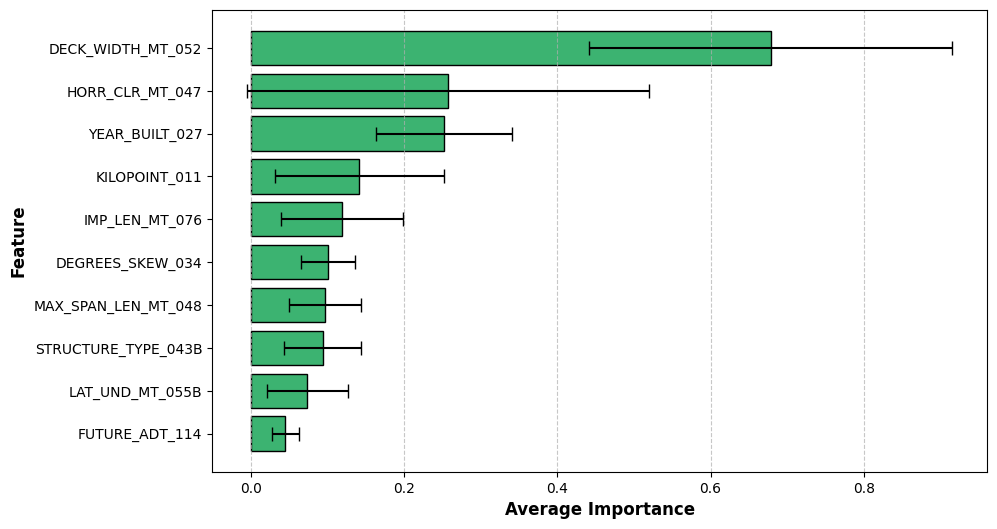

,Average_Importance,Standard_Deviation,Average_Rank
DECK_WIDTH_MT_052,0.678287,0.236822,NaN
HORR_CLR_MT_047,0.257558,0.262123,NaN
YEAR_BUILT_027,0.252235,0.088833,NaN
KILOPOINT_011,0.141758,0.110689,NaN
IMP_LEN_MT_076,0.118729,0.079410,NaN
...,...,...,...
YEAR_OF_IMP_097,0.002693,0.000004,NaN
FRACTURE_092A,0.002692,0.000000,NaN
YEAR_OF_FUTURE_ADT_115,0.002690,0.000007,NaN
HIGHWAY_SYSTEM_104,0.002684,0.000188,NaN


In [ ]:
#Normalized

import pandas as pd

# Normalize importance values using Min-Max scaling
feature_imp['importance_normalized'] = (
    (feature_imp['importance'] - feature_imp['importance'].min()) /
    (feature_imp['importance'].max() - feature_imp['importance'].min())
)

# Group by the first column (feature name) and compute average importance and standard deviation
feature_stats = feature_imp.groupby(level=0).agg(
    Average_Importance=('importance_normalized', 'mean'),
    Standard_Deviation=('importance_normalized', 'std')
)

# Rank features within each iteration (random_state)
feature_imp['Rank'] = feature_imp.groupby('random_state')['importance'].rank(ascending=False, method='dense')

# Compute the average rank across iterations
average_rank = feature_imp.groupby(feature_imp.iloc[:, 0])['Rank'].mean().rename('Average_Rank')

# Merge statistics and rank information
final_feature_importance = feature_stats.join(average_rank)

# Sort features by highest average importance
final_feature_importance = final_feature_importance.sort_values(by='Average_Importance', ascending=False)

# Select the top 5 features
top_features = final_feature_importance.head(10)

# Create a horizontal bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features['Average_Importance'], xerr=top_features['Standard_Deviation'], capsize=5, color='mediumseagreen', edgecolor='black')

# Labels and title
plt.xlabel('Average Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


from IPython.display import display

# Display the resulting DataFrame
display(final_feature_importance)

### 📊 **Raw Feature Importance DataFrame**

Contains the unprocessed feature importance values generated from each model iteration, including per-feature importance scores and associated `random_state` identifiers—serving as the base dataset for later normalization, ranking, and aggregation analyses.


In [ ]:
feature_imp

,importance,stddev,p_value,n,p99_high,p99_low,random_state,importance_normalized,Rank
DECK_WIDTH_MT_052,0.684614,0.046785,0.000003,5,0.780946,0.588282,21,0.726817,1.0
YEAR_BUILT_027,0.241642,0.013963,0.000001,5,0.270392,0.212893,21,0.258280,2.0
STRUCTURE_TYPE_043B,0.140926,0.026087,0.000135,5,0.194639,0.087212,21,0.151750,3.0
KILOPOINT_011,0.119244,0.014370,0.000025,5,0.148833,0.089656,21,0.128818,4.0
DEGREES_SKEW_034,0.081138,0.008025,0.000011,5,0.097661,0.064615,21,0.088512,5.0
...,...,...,...,...,...,...,...,...,...
TRAFFIC_DIRECTION_102,0.000000,0.000000,0.500000,5,0.000000,0.000000,1,0.002692,66.0
FRACTURE_092A,0.000000,0.000000,0.500000,5,0.000000,0.000000,1,0.002692,66.0
APPR_TYPE_044B,0.000000,0.000000,0.500000,5,0.000000,0.000000,1,0.002692,66.0
HISTORY_037,-0.000079,0.000055,0.984092,5,0.000033,-0.000192,1,0.002608,67.0


### 🧱 **Feature Title Mapping Dictionary**

Defines concise, human-readable titles for key bridge feature codes to improve plot labeling and interpretability during visualization.



In [ ]:
titles = {'SERVICE_LEVEL_005C':'Designated Level of Service',
          'LEFT_LAT_UND_MT_056':'Minimum Lateral Underclerance on Left (Meters)',
          'TRAFFIC_LANES_UND_028B':'Number of Lanes Under the Structure',
          'SCOUR_CRITICAL_113':'Evaluation of Vulnerability to Scour',
          'SERVICE_UND_042B':'Type of Service Under Bridge',
          'ROUTE_PREFIX_005B':'Identification of Route Prefix',
          'FUTURE_ADT_114':'Future Average Daily Traffic',
          'LAT_UND_MT_055B':'Minimum Lateral Underclearance (Meters)',
          'VERT_CLR_UND_054B':'Minimum Vertical Underclearance (Meters)',
          'KILOPOINT_011':'LRS Kilometerpoint Reference Location'
}

### 🎨 **Top Normalized Feature Importance Visualization (Column-Level Analysis)**

Computes and visualizes normalized feature importance across model iterations to highlight the most influential bridge features with standardized scaling and descriptive titles.

---

#### 🧩 **Workflow Summary**

1. **Normalization**

   * Applies **Min–Max scaling** to raw importance scores in `feature_imp_columns` for consistent comparison across iterations.

2. **Aggregation and Ranking**

   * Groups by feature name and computes **average normalized importance** and **standard deviation**.
   * Ranks each feature’s importance within each random state and averages the ranks across all runs.

3. **Data Merging and Selection**

   * Merges statistical summaries with rank data into `final_feature_importance`.
   * Sorts by highest average importance and selects the **top 10 key features**.

4. **Visualization**

   * Maps feature codes to readable names using the `titles` dictionary with wrapped labels for clarity.
   * Generates a **horizontal bar chart** showing average normalized importance and standard deviation error bars.
   * Inverts the y-axis so the most important features appear at the top.

5. **Output Display**

   * Displays both the final visualization and the top-ranked feature importance table.

---

#### 🧾 **Outputs**

* **Bar chart** — Top 10 features by normalized average importance with variability indicators.
* **`final_feature_importance` DataFrame** — Summarized feature statistics including mean, standard deviation, and average rank.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Normalize importance values using Min-Max scaling
feature_imp_columns['importance_normalized'] = (
    (feature_imp_columns['importance'] - feature_imp_columns['importance'].min()) /
    (feature_imp_columns['importance'].max() - feature_imp_columns['importance'].min())
)

# Group by the first column (feature name) and compute average importance and standard deviation
feature_stats = feature_imp_columns.groupby(feature_imp_columns.iloc[:, 0]).agg(
    Average_Importance=('importance_normalized', 'mean'),
    Standard_Deviation=('importance_normalized', 'std')
)

# Rank features within each iteration (random_state)
feature_imp_columns['Rank'] = feature_imp_columns.groupby('random_state')['importance'].rank(ascending=False, method='dense')

# Compute the average rank across iterations
average_rank = feature_imp_columns.groupby(feature_imp_columns.iloc[:, 0])['Rank'].mean().rename('Average_Rank')

# Merge statistics and rank information
final_feature_importance = feature_stats.join(average_rank)

# Sort features by highest average importance
final_feature_importance = final_feature_importance.sort_values(by='Average_Importance', ascending=False)

# Select the top 10 features
top_features = final_feature_importance.head(10)



# Map feature names and apply text wrapping
wrapped_titles = {key: "\n".join(textwrap.wrap(value, width=30)) for key, value in titles.items()}  # Wrap at 20 characters

top_features.index = top_features.index.map(lambda x: wrapped_titles.get(x, x))  # Use wrapped title if available

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure height for more space
bars = ax.barh(top_features.index, top_features['Average_Importance'],
               xerr=top_features['Standard_Deviation'], capsize=5,
               color='mediumseagreen', edgecolor='black')

# Adjust bar width by modifying the spacing
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features.index, fontsize=10)

# Increase space between bars
for bar in bars:
    bar.set_height(0.7)  # Adjust bar height (default is 1.0)

# Labels and title
ax.set_xlabel('Average Importance', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.invert_yaxis()  # Invert y-axis to have the most important feature on top

# Adjust layout to prevent text overlap
plt.subplots_adjust(left=0.3, right=0.95, top=0.9, bottom=0.1)

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

from IPython.display import display
# Display the resulting DataFrame
display(final_feature_importance)


NameError: name 'titles' is not defined

# Top 9 Features

### 🧩 **Filtered Feature Selection Utility**

Defines a reusable function to create reduced datasets containing key variables — including all base columns up to `OBJECT_INTERSECTED`, the top *N* most important features, and any user-specified additional columns.

---

#### 🧩 **Workflow Summary**

1. **Input Parameters**

   * Accepts a source DataFrame (`df`), feature importance DataFrame, desired number of top features (`top_n`), and optional columns for inclusion.

2. **Column Identification**

   * Automatically selects all columns leading up to and including `OBJECT_INTERSECTED`.
   * Retrieves the top-ranked features based on `Average_Importance` from the feature importance table.

3. **Column Consolidation**

   * Merges the identified base columns, top-ranked features, and any user-defined additional columns into a unified selection list.
   * Validates column presence before inclusion.

4. **Output Generation**

   * Returns a filtered version of the dataset retaining only selected and high-impact features.
   * Example usage demonstrates filtering both encoded (`top9_df_enc`) and embedded (`top9_df_emb`) datasets for efficient modeling.

---

#### 🧾 **Outputs**

* **`filter_top_features()`** → A filtered DataFrame containing:

  * Columns up to `OBJECT_INTERSECTED`
  * Top N most important features
  * Any specified additional columns



In [ ]:
import pandas as pd

def filter_top_features(df, feature_importance_df, top_n=30, additional_columns=None):
    """
    Filters a DataFrame to retain all columns up to and including 'OBJECT_INTERSECTED',
    along with the top N most important features from feature importance.
    Also allows adding specified columns if desired.

    Parameters:
    df (pd.DataFrame): The original DataFrame with all features.
    feature_importance_df (pd.DataFrame): The DataFrame containing feature importance scores.
    top_n (int): Number of top features to keep from feature importance.
    additional_columns (list, optional): List of additional columns to include.

    Returns:
    pd.DataFrame: Filtered DataFrame with selected features.
    """
    # Identify all columns up to and including 'OBJECT_INTERSECTED'
    if 'OBJECT_INTERSECTED' not in df.columns:
        raise ValueError("Column 'OBJECT_INTERSECTED' not found in DataFrame")

    # Get columns up to and including 'OBJECT_INTERSECTED'
    object_intersected_idx = df.columns.get_loc('OBJECT_INTERSECTED')
    selected_columns = df.columns[:object_intersected_idx + 1].tolist()

    # Get the top N most important features
    top_features = feature_importance_df.nlargest(top_n, 'Average_Importance').index.tolist()

    # Ensure additional columns exist in the DataFrame
    if additional_columns:
        additional_columns = [col for col in additional_columns if col in df.columns]
    else:
        additional_columns = []

    # Combine both sets of selected columns
    final_columns = selected_columns + top_features + additional_columns

    # Return the filtered DataFrame
    return df[final_columns]

# Example usage:
additional_cols = ['SERVICE_LEVEL_005C']  # Specify columns you want to include
top9_df_enc = filter_top_features(encoding_set, final_feature_importance, additional_columns=additional_cols)
top9_df_emb = filter_top_features(embedding_set, final_feature_importance, additional_columns=additional_cols)



### 🔢 Encoding_set

A preprocessed dataset containing encoded categorical and numerical bridge features ready for model training.


In [ ]:
encoding_set

,STRUCTURE_ID,SUPPORT_TYPE,SPACING_PITCH_IN,COLUMNS_PILES_PER_BENT,COLUMNS_PILES_0_1,CLEAR_HEIGHT_FT,B_LONG_IN,B_TRANS_IN,L_H_LONG,L_H_TRANS,L_H_MIN,LRR,TRR,Z_KNOWN,CD_MIN,CRITICAL_TRUTH_0_1,OBJECT_INTERSECTED,LAT,LONG,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,KILOPOINT_011,BASE_HWY_NETWORK_012,DETOUR_KILOS_019,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_UND_028B,YEAR_ADT_030,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,HISTORY_037,NAVIGATION_038,NAV_HORR_CLR_MT_040,OPEN_CLOSED_POSTED_041,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,OPERATING_RATING_064,INV_RATING_METH_065,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,APPR_ROAD_EVAL_072,WORK_PROPOSED_075A,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,BRIDGE_CONDITION,LOWEST_RATING
DATABASE_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0019133A,RectCol-Spiral,6,4.0,1.0,19.20,54.0,54.0,4.266667,4.266667,4.266667,0.0155,0.0077,2.0,1.594858,0,Overpass,47.118583,-122.557083,4.0,0.0,1.0,8.0,0.001,0,5,8.0,2020,8,2010,0.0,4,1,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,2.0,4.0,5.0,1.0,0.0,0.0,4,0,17.4,48.2,0.0,4.3,26.2,99.99,0.0,5.54,3.4,2.4,4.0,4.0,3.0,5.0,47.3,2.0,5.0,0.0,2.0,2.0,2.0,159.1,320,24,0.0,0.0,0.0,13781,2014,0.0,1.0,1.0,0,0.0,0,0.0,1.0,0.0,1.0,2,0,6.0,23709,2036,1.0,8
2,0019133D,RectCol-Spiral,4,2.0,1.0,24.60,48.0,48.0,6.150000,6.150000,6.150000,0.0140,0.0096,2.0,2.953873,0,Overpass,47.127006,-122.544067,4.0,0.0,1.0,8.0,0.016,0,5,8.0,2020,8,2016,1.0,0,1,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,4.0,5.0,1.0,0.0,0.0,3,0,8.5,46.9,4.3,0.0,14.0,99.99,0.0,5.82,3.4,4.6,4.0,4.0,3.0,5.0,52.5,2.0,5.0,2.0,2.0,2.0,2.0,104.9,1220,24,0.0,0.0,0.0,3578,2014,0.0,1.0,1.0,1,0.0,0,0.0,1.0,0.0,1.0,1,0,6.0,19153,2038,1.0,8
7,0005582A,CircCol,12,4.0,1.0,34.40,36.0,36.0,11.466667,11.466667,11.466667,0.0123,0.0020,2.0,2.799066,0,Overpass,47.147558,-122.504419,4.0,0.0,1.0,8.0,0.080,1,3,7.0,1958,8,2016,0.0,39,0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,4.0,0.0,0.0,4,0,16.2,26.8,1.5,0.8,19.2,99.99,0.0,4.52,2.4,1.5,3.0,2.0,2.0,5.0,79.8,0.0,3.0,2.0,0.0,2.0,2.0,89.6,1121,24,0.0,0.0,0.0,6468,2014,0.0,1.0,1.0,1,0.0,0,0.0,3.0,0.0,0.0,5,0,6.0,21372,2038,0.0,6
8,0005523C,CircCol,12,1.0,0.0,18.00,60.0,60.0,3.600000,3.600000,3.600000,0.0099,0.0011,1.0,1.863090,0,Overpass,47.150581,-122.499178,4.0,0.0,1.0,8.0,0.177,0,5,10.0,1957,8,2002,0.0,0,0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,4.0,0.0,0.0,4,0,7.9,27.7,0.6,0.6,10.4,99.99,0.0,4.50,3.1,1.7,3.0,1.0,2.0,5.0,57.0,2.0,2.0,1.0,0.0,2.0,2.0,96.6,1121,24,0.0,0.0,0.0,3550,2014,0.0,1.0,1.0,0,0.0,0,0.0,1.0,0.0,0.0,1,0,6.0,4420,2036,0.0,5
9,0005651A,CircCol,12,1.0,0.0,25.20,72.0,72.0,4.200000,4.200000,4.200000,0.0092,0.0010,1.0,2.294276,0,Overpass,47.159764,-122.483589,4.0,0.0,1.0,8.0,14.886,1,6,7.0,1958,9,2021,0.0,0,0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,4.0,0.0,0.0,2,0,8.5,41.5,1.4,1.4,12.2,99.99,0.0,4.34,3.4,1.4,3.0,2.0,2.0,5.0,29.5,2.0,2.0,2.0,0.0,2.0,2.0,86.3,1120,24,0.0,0.0,0.0,4754,2014,0.0,1.0,1.0,1,0.0,0,0.0,3.0,0.0,0.0,6,0,6.0,19158,2041,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# Mappings

### 🧱 Embedding Feature Set  
Defines categorical bridge attributes to convert into embeddings for downstream modeling and representation learning.


In [ ]:
# embeddings

embeddings = {
    'STRUCTURE_KIND_043A',
    'STRUCTURE_TYPE_043B',
    'HISTORY_037',
    'BRIDGE_CONDITION',
    'LAT_UND_REF_055A',
    'ROUTE_PREFIX_005B',
    'SERVICE_LEVEL_005C',
    'FUNCTIONAL_CLASS_026',
    'DESIGN_LOAD_031',
    'DECK_COND_058',
    'SUPERSTRUCTURE_COND_059',
    'SUBSTRUCTURE_COND_060',
    'CHANNEL_COND_061',
    'CULVERT_COND_062',
    'STRUCTURAL_EVAL_067',
     'DECK_GEOMETRY_EVAL_068',
     'UNDCLRENCE_EVAL_069',
     'POSTING_EVAL_070',
     'WATERWAY_EVAL_071',
     'APPR_ROAD_EVAL_072',
    'TRAFFIC_DIRECTION_102',
    'TOLL_020',
    'FEDERAL_LANDS_105',
    'DECK_STRUCTURE_TYPE_107',
    'SCOUR_CRITICAL_113',
    'MEDIAN_CODE_033',
    'RAILINGS_036A',
    'TRANSITIONS_036B',
    'APPR_RAIL_036C',
    'APPR_RAIL_END_036D',
    'NAVIGATION_038',
    'OPEN_CLOSED_POSTED_041',
    'SERVICE_ON_042A',
    'SERVICE_UND_042B',
    'APPR_KIND_044A',
    'APPR_KIND_044B',
    'VERT_CLR_UND_REF_054A',
    'OPR_RATING_METH_063',
    'INV_RATING_METH_065',
    'WORK_PROPOSED_075A',
    'FRACTURE_092A',
    'UNDWATER_LOOK_SEE_092B',
    'SPEC_INSPECT_092C',
    'STRAHNET_HIGHWAY_100',
    'PARALLEL_STRUCTURE_101',
    'SURFACE_TYPE_108A',
    'MEMBRANE_TYPE_108B',
    'DECK_PROTECTION_108C'
    }

### 🗺️ Mapping Categorical Bridge Codes to Descriptions

Replaces categorical bridge feature codes with their human-readable descriptions using the `descriptions` dictionary. Each key in the dictionary represents a **column name** (e.g., `STRUCTURE_KIND_043A`), and its nested key-value pairs define how each code maps to a corresponding **textual interpretation** (e.g., `1 → "Concrete"`).




In [ ]:
# Mapping our categorical columns here

descriptions = {
    'STRUCTURE_KIND_043A': {
        1: 'Concrete.',
        2: 'Concrete continuous.',
        3: 'Steel.',
        4: 'Steel continuous.',
        5: 'Prestressed concrete.',
        6: 'Prestressed concrete continuous.',
        7: 'Wood or timber.',
        8: 'Masonry.',
        9: 'Aluminum, wrought iron, or cast iron.',
        0: 'Other materials.',
    },
    'STRUCTURE_TYPE_043B': {
        1: 'Slab design',
        2: 'Stringer/multi-beam or girder',
        3: 'Girder and floorbeam system',
        4: 'Tee beam',
        5: 'Multiple box beams or girders',
        6: 'Single or spread box beams or girders',
        7: 'Frame (except frame culverts)',
        8: 'Orthotropic',
        9: 'Deck truss',
        10: 'Thru truss',
        11: 'Deck arch',
        12: 'Thru arch',
        13: 'Suspension',
        14: 'Stayed girder',
        15: 'Movable lift',
        16: 'Movable bascule',
        17: 'Movable swing',
        18: 'The bridge is a tunnel',
        19: 'The bridge is a culvert (includes frame culverts)',
        20: 'The bridge uses mixed types',
        21: 'Segmental box girder',
        22: 'Channel beam',
        00: 'Another',
    },
    'HISTORY_037': {
        1: 'Bridge is on the National Register of Historic Places.',
        2: 'Bridge is eligible for the National Register of Historic Places.',
        3: 'Bridge is possibly eligible for the National Register of Historic Places or on a State or local historic register.',
        4: 'Historical significance is not determinable at this time.',
        5: 'Bridge is not eligible for the National Register of Historic Places.',
    },
    'BRIDGE_CONDITION': {
        'N': 'Not applicable.',
        'G': 'Good condition - some minor problems.',
        'F': 'Fair condition - all primary structural elements are sound but may have minor section loss, cracking, spalling, or scour.',
        'P': 'Poor condition - advanced section loss, deterioration, spalling, or scour.',
    },
    'LAT_UND_REF_055A': {
        'H': 'Highway beneath structure',
        'R': 'Railroad beneath structure',
        'N': 'Feature not a highway or railroad',
    },
    'ROUTE_PREFIX_005B': {
        1: 'Interstate highway',
        2: 'U.S. numbered highway',
        3: 'State highway',
        4: 'County highway',
        5: 'City street',
        6: 'Federal lands road',
        7: 'State lands road',
        8: 'Other (include toll roads not otherwise indicated or identified above)',
    },
    'SERVICE_LEVEL_005C': {
        0: 'None of the below',
        1: 'Mainline',
        2: 'Alternate',
        3: 'Bypass',
        4: 'Spur',
        6: 'Business',
        7: 'Ramp, Wye, Connector, etc.',
        8: 'Service and/or unclassified frontage road',
    },
    'FUNCTIONAL_CLASS_026': {
        1: 'Rural Principal Arterial - Interstate',
        2: 'Rural Principal Arterial - Other',
        6: 'Rural Minor Arterial',
        7: 'Rural Major Collector',
        8: 'Rural Minor Collector',
        9: 'Rural Local',
        11: 'Urban Principal Arterial - Interstate',
        12: 'Urban Principal Arterial - Other Freeways or Expressways',
        14: 'Urban Other Principal Arterial',
        16: 'Urban Minor Arterial',
        17: 'Urban Collector',
        19: 'Urban Local',
    },
    'DESIGN_LOAD_031': { # Actually has 13 unique values
        '1': 'M 9 or H 10',
        '2': 'M 13.5 H 15',
        '3': 'MS 13.5 HS 15',
        '4': 'M 18 H 20',
        '5': 'MS 18 HS 20',
        '6': 'MS 18+Mod HS 20+Mod',
        '7': 'Pedestrian',
        '8': 'Railroad',
        '9': 'MS 22.5 HS 25 or greater',
        'A': 'HL 93',
        'B': 'Greater than HL 93',
        'C': 'Other',

    },
    'DECK_COND_058': {
        '9': 'Excellent condition',
        '8': 'Very good condition - no problems noted',
        '7': 'Good condition - some minor problems',
        '6': 'Satisfactory condition - structural elements show some minor deterioration',
        '5': 'Fair condition - all primary structural elements are sound but have minor section loss, cracking, spalling or scour.',
        '4': 'Poor condition - advanced section loss, deterioration, spalling or scour.',
        '3': 'Serious condition - loss of section, deterioration, spalling or\
            scour have seriously affected primary structural components.\
            Local failures are possible. Fatigue cracks in steel or shear\
            cracks in concrete may be present.',
        '2': 'Critical condition - advanced deterioration of primary structural\
            elements. Fatigue cracks in steel or shear cracks in\
            concrete may be present or scour may have removed substructure\
            support. Unless closely monitored it may be necessary to close\
            the bridge until corrective action is taken.',
        '1': '"Imminent" failure condition - major deterioration or section\
            loss present in critical structural components or obvious\
            vertical or horizontal movement affecting structure\
            stability. Bridge is closed to traffic but corrective action\
            may put back in light service.',
        '0': 'Failed condition - out of service - beyond corrective action',
        'N': 'Not applicable'
    },
    'SUPERSTRUCTURE_COND_059': {
        '9': 'Excellent condition',
        '8': 'Very good condition - no problems noted',
        '7': 'Good condition - some minor problems',
        '6': 'Satisfactory condition - structural elements show some minor deterioration',
        '5': 'Fair condition - all primary structural elements are sound but have minor section loss, cracking, spalling or scour.',
        '4': 'Poor condition - advanced section loss, deterioration, spalling or scour.',
        '3': 'Serious condition - loss of section, deterioration, spalling or\
            scour have seriously affected primary structural components.\
            Local failures are possible. Fatigue cracks in steel or shear\
            cracks in concrete may be present.',
        '2': 'Critical condition - advanced deterioration of primary structural\
            elements. Fatigue cracks in steel or shear cracks in\
            concrete may be present or scour may have removed substructure\
            support. Unless closely monitored it may be necessary to close\
            the bridge until corrective action is taken.',
        '1': '"Imminent" failure condition - major deterioration or section\
            loss present in critical structural components or obvious\
            vertical or horizontal movement affecting structure\
            stability. Bridge is closed to traffic but corrective action\
            may put back in light service.',
        '0': 'Failed condition - out of service - beyond corrective action',
        'N': 'Not applicable'
    },
    'SUBSTRUCTURE_COND_060': {
        '9': 'Excellent condition',
        '8': 'Very good condition - no problems noted',
        '7': 'Good condition - some minor problems',
        '6': 'Satisfactory condition - structural elements show some minor deterioration',
        '5': 'Fair condition - all primary structural elements are sound but have minor section loss, cracking, spalling or scour.',
        '4': 'Poor condition - advanced section loss, deterioration, spalling or scour.',
        '3': 'Serious condition - loss of section, deterioration, spalling or\
            scour have seriously affected primary structural components.\
            Local failures are possible. Fatigue cracks in steel or shear\
            cracks in concrete may be present.',
        '2': 'Critical condition - advanced deterioration of primary structural\
            elements. Fatigue cracks in steel or shear cracks in\
            concrete may be present or scour may have removed substructure\
            support. Unless closely monitored it may be necessary to close\
            the bridge until corrective action is taken.',
        '1': '"Imminent" failure condition - major deterioration or section\
            loss present in critical structural components or obvious\
            vertical or horizontal movement affecting structure\
            stability. Bridge is closed to traffic but corrective action\
            may put back in light service.',
        '0': 'Failed condition - out of service - beyond corrective action',
        'N': 'Not applicable'
    },
    'CHANNEL_COND_061': {
        '9': ' There are no noticeable or noteworthy deficiencies which affect the\
            condition of the channel.',
        '8': 'Banks are protected or well vegetated. River control devices such\
            as spur dikes and embankment protection are not required or are in a\
            stable condition.',
        '7': 'Bank protection is in need of minor repairs. River control devices\
            and embankment protection have a little minor damage. Banks and/or\
            channel have minor amounts of drift.',
        '6': 'Bank is beginning to slump. River control devices and embankment\
            protection have widespread minor damage. There is minor stream bed\
            movement evident. Debris is restricting the channel slightly.',
        '5': 'Bank protection is being eroded. River control devices and/or\
            embankment have major damage. Trees and brush restrict the channel.',
        '4': 'Bank and embankment protection is severely undermined. River\
            control devices have severe damage. Large deposits of debris are in\
            the channel.',
        '3': 'Bank protection has failed. River control devices have been\
            destroyed. Stream bed aggradation, degradation or lateral movement\
            has changed the channel to now threaten the bridge and/or approach\
            roadway.',
        '2': 'The channel has changed to the extent the bridge is near a state of collapse.',
        '1': 'Bridge closed because of channel failure. Corrective action may put back in light service',
        '0': 'Bridge closed because of channel failure. Replacement necessary.',
        'N': 'Not applicable. Use when bridge is not over a waterway(channel)'
    },
    'CULVERT_COND_062': {
       'N': 'Not applicable. Use if structure is not a culvert.',
        '9': 'No deficiencies.',
        '8': 'No noticeable or noteworthy deficiencies which affect the\
        condition of the culvert. Insignificant scrape marks caused by\
        drift.',
        '7': 'Shrinkage cracks, light scaling, and insignificant spalling which\
        does not expose reinforcing steel. Insignificant damage caused\
        by drift with no misalignment and not requiring corrective\
        action. Some minor scouring has occurred near curtain walls,\
        wingwalls, or pipes. Metal culverts have a smooth symmetrical\
        curvature with superficial corrosion and no pitting.',
        '6': 'Deterioration or initial disintegration, minor chloride\
        contamination, cracking with some leaching, or spalls on concrete\
        or masonry walls and slabs. Local minor scouring at curtain\
        walls, wingwalls, or pipes. Metal culverts have a smooth\
        curvature, non-symmetrical shape, significant corrosion or\
        moderate pitting.',
        '5': 'Moderate to major deterioration or disintegration, extensive\
        cracking and leaching, or spalls on concrete or masonry walls and\
        slabs. Minor settlement or misalignment. Noticeable scouring or\
        erosion at curtain walls, wingwalls, or pipes. Metal culverts\
        have significant distortion and deflection in one section,\
        significant corrosion or deep pitting.',
        '4': 'Large spalls, heavy scaling, wide cracks, considerable\
        efflorescence, or opened construction joint permitting loss of\
        backfill. Considerable settlement or misalignment. Considerable\
        scouring or erosion at curtain walls, wingwalls or pipes. Metal\
        culverts have significant distortion and deflection throughout,\
        extensive corrosion or deep pitting.',
        '3': 'Any condition described in Code 4 but which is excessive in\
        scope. Severe movement or differential settlement of the\
        segments, or loss of fill. Holes may exist in walls or slabs.\
        Integral wingwalls nearly severed from culvert. Severe scour or\
        erosion at curtain walls, wingwalls or pipes. Metal culverts\
        have extreme distortion and deflection in one section, extensive\
        corrosion, or deep pitting with scattered perforations.',
        '2': 'Integral wingwalls collapsed, severe settlement of roadway due to\
        loss of fill. Section of culvert may have failed and can no\
        longer support embankment. Complete undermining at curtain walls\
        and pipes. Corrective action required to maintain traffic.\
        Metal culverts have extreme distortion and deflection throughout\
        with extensive perforations due to corrosion.',
        '1': 'Bridge closed. Corrective action may put back in light service.',
        '0': 'Bridge closed. Replacement necessary.'
    },
    'STRUCTURAL_EVAL_067': {
       'N': 'Not applicable',
        '9': 'Superior to present desirable criteria',
        '8': 'Equal to present desirable criteria',
        '7': 'Better than present minimum criteria',
        '6': 'Equal to present minimum criteria',
        '5': 'Somewhat better than minimum adequacy to tolerate being left in place as is',
        '4': 'Meets minimum tolerable limits to be left in place as is',
        '3': 'Basically intolerable requiring high priority of corrective action',
        '2': 'Basically intolerable requiring high priority of replacement',
        '1': 'This value of rating code not used',
        '0': 'Bridge Closed'
     },
     'DECK_GEOMETRY_EVAL_068': {
       'N': 'Not applicable',
        '9': 'Superior to present desirable criteria',
        '8': 'Equal to present desirable criteria',
        '7': 'Better than present minimum criteria',
        '6': 'Equal to present minimum criteria',
        '5': 'Somewhat better than minimum adequacy to tolerate being left in place as is',
        '4': 'Meets minimum tolerable limits to be left in place as is',
        '3': 'Basically intolerable requiring high priority of corrective action',
        '2': 'Basically intolerable requiring high priority of replacement',
        '1': 'This value of rating code not used',
         '0': 'Bridge Closed'
     },
     'UNDCLRENCE_EVAL_069': {
       'N': 'Not applicable',
        '9': 'Superior to present desirable criteria',
        '8': 'Equal to present desirable criteria',
        '7': 'Better than present minimum criteria',
        '6': 'Equal to present minimum criteria',
        '5': 'Somewhat better than minimum adequacy to tolerate being left in place as is',
        '4': 'Meets minimum tolerable limits to be left in place as is',
        '3': 'Basically intolerable requiring high priority of corrective action',
        '2': 'Basically intolerable requiring high priority of replacement',
        '1': 'This value of rating code not used',
         '0' : 'Bridge Closed'
     },
     'POSTING_EVAL_070': { # Created my own encoding for this, can talk about
        5: 'No Posting required: Equal to or above legal loads',
        4: 'Posting required: 0.1 - 9.9% below',
        3: 'Posting required: 10.0 - 19.9% below',
        2: 'Posting required: 20.0 - 29.9% below',
        1: 'Posting required: 30.0 - 39.9% below',
        0: 'Posting required: > 39.9% below',
     },
     'WATERWAY_EVAL_071': {
       'N': 'Not applicable',
        '9': 'Superior to present desirable criteria',
        '8': 'Equal to present desirable criteria',
        '7': 'Better than present minimum criteria',
        '6': 'Equal to present minimum criteria',
        '5': 'Somewhat better than minimum adequacy to tolerate being left in place as is',
        '4': 'Meets minimum tolerable limits to be left in place as is',
        '3': 'Basically intolerable requiring high priority of corrective action',
        '2': 'Basically intolerable requiring high priority of replacement',
        '1': 'This value of rating code not used',
        '0': 'Bridge Closed'
     },
     'APPR_ROAD_EVAL_072': {
       'N': 'Not applicable',
        9: 'Superior to present desirable criteria',
        8: 'Equal to present desirable criteria',
        7: 'Better than present minimum criteria',
        6: 'Equal to present minimum criteria',
        5: 'Somewhat better than minimum adequacy to tolerate being left in place as is',
        4: 'Meets minimum tolerable limits to be left in place as is',
        3: 'Basically intolerable requiring high priority of corrective action',
        2: 'Basically intolerable requiring high priority of replacement',
        1: 'This value of rating code not used',
        0: 'Bridge Closed'
     },
    'TRAFFIC_DIRECTION_102': {
        0: 'Highway traffic not carried',
        1: '1-way traffic',
        2: '2-way traffic',
        3: 'One lane bridge for 2-way traffic',
    },
    'TOLL_020': {
        1: 'Toll bridge. Tolls are paid specifically to use the structure.',
        2: 'On toll road. The structure carries a toll road, that is, tolls are paid to use the facility,\
              which includes both the highway and the structure.',
        3: 'On free road. The structure is toll-free and carries a toll-free highway.',
        4: 'On Interstate toll segment under Secretarial Agreement. Structure functions as a part of the toll segment.',
        5: 'Toll bridge is a segment under Secretarial Agreement. Structure is separate agreement from highway segment.',
    },
    'FEDERAL_LANDS_105': {
        0: 'Not applicable',
        1: 'Indian Reservation Road (IRR)',
        2: 'Forest Highway (FH)',
        3: 'Land Management Highway System (LMHS)',
        4: 'Both IRR and FH',
        5: 'Both IRR and LMHS',
        6: 'Both FH and LMHS',
        9: 'Combined IRR, FH and LMHS',
    },
    'DECK_STRUCTURE_TYPE_107': {
        '1': 'Concrete Cast-in-Place',
        '2': 'Concrete Precast Panels',
        '3': 'Open Grating',
        '4': 'Closed Grating',
        '5': 'Steel plate (includes orthotropic)',
        '6': 'Corrugated Steel',
        '7': 'Aluminum',
        '8': 'Wood or Timber',
        '9': 'Other',
        'N': 'Not applicable'
    },
    'SCOUR_CRITICAL_113': {
        'N': 'Bridge not over waterway.',
        'U': 'Bridge with "unknown" foundation that has not been evaluated for scour. Since risk cannot be determined, flag for monitoring during flood events and, if appropriate, closure.',
        'T': 'Bridge over "tidal" waters that has not been evaluated for scour, but considered low risk. Bridge will be monitored with regular inspection cycle and with appropriate underwater inspections. ("Unknown" foundations in "tidal" waters should be coded U.)',
        '9': 'Bridge foundations (including piles) on dry land well above flood water elevations.',
        '8': 'Bridge foundations determined to be stable for assessed or calculated scour conditions; calculated scour is above top of footing. (Example A)',
        '7': 'Countermeasures have been installed to correct a previously existing problem with scour. Bridge is no longer scour critical.',
        '6': 'Scour calculation/evaluation has not been made. (Use only to describe case where bridge has not yet been evaluated for scour potential.)',
        '5': 'Bridge foundations determined to be stable for calculated scour conditions; scour within limits of footing or piles. (Example B)',
        '4': 'Bridge foundations determined to be stable for calculated scour conditions; field review indicates action is required to protect exposed foundations from effects of additional erosion and corrosion.',
        '3': 'Bridge is scour critical; bridge foundations determined to be unstable for calculated scour conditions: - Scour within limits of footing or piles. (Example B) - Scour below spread-footing base or pile tips. (Example C)',
        '2': 'Bridge is scour critical; field review indicates that extensive scour has occurred at bridge foundations. Immediate action is required to provide scour countermeasures.',
        '1': 'Bridge is scour critical; field review indicates that failure of piers/abutments is imminent. Bridge is closed to traffic.',
        '0': 'Bridge is scour critical. Bridge has failed and is closed to traffic.'
    },
    'MEDIAN_CODE_033': {
        0: "No median",
        1: "Open median",
        2: "Closed median (no barrier)",
        3: 'Closed median with non-mountable barriers',
    },
    'RAILINGS_036A': {
        '0': "Inspected feature does not meet currently acceptable standards or a safety feature is required and none is provided.",
        '1': "Inspected feature meets currently acceptable standards.",
        'N': "Not applicable or a safety feature is not  required."
    },
    'TRANSITIONS_036B': {
        '0': "Inspected feature does not meet currently acceptable standards or a safety feature is required and none is provided.",
        '1': "Inspected feature meets currently acceptable standards.",
        'N': "Not applicable or a safety feature is not  required."
    },
    'APPR_RAIL_036C':{
        '0': "Inspected feature does not meet currently acceptable standards or a safety feature is required and none is provided.",
        '1': "Inspected feature meets currently acceptable standards.",
        'N': "Not applicable or a safety feature is not  required."
    },
    'APPR_RAIL_END_036D': {
        '0': "Inspected feature does not meet currently acceptable standards or a safety feature is required and none is provided.",
        '1': "Inspected feature meets currently acceptable standards.",
        'N': "Not applicable or a safety feature is not  required."
    },

    'NAVIGATION_038': {
        '0': "No navigation control on waterway (bridge permit not reuqired).",
        '1': "Navigation control on waterway (bridge permit required).",
        'N': "Not applicable, no waterway."
    },
    'OPEN_CLOSED_POSTED_041': { # Only A and P exist in the NBI Western Washington
        'A': "Open, no restriction",
        'B': "Open, posting recommended but not legally  implemented (all signs not in place or not correctly implemented)",
        'D': "Open, would be posted or closed except for  temporary shoring, etc. to allow for unrestricted traffic",
        'E': "Open, temporary structure in place to carry  legal loads while original structure is closed and awaiting replacement or rehabilitation",
        'G': "New structure not yet open to traffic  K Bridge closed to all traffic",
        'P': "Posted for load (may include other  restrictions such as temporary bridges which are load posted)",
        'R': "Posted for other load-capacity restriction (speed, number of vehicles on bridge, etc.)"
    },
    'SERVICE_ON_042A': {
        1: "Highway",
        2: "Railroad",
        3: "Pedestrian-bicycle",
        4: "Highway-railroad" ,
        5: "Highway-pedestrian",
        6: "Overpass structure at an interchange or  second level of a multilevel interchange",
        7: "Third level (Interchange)",
        8: "Fourth level (Interchange)",
        9: "Building or plaza",
        0: "Other"
    },
    'SERVICE_UND_042B': {
        1: "Highway, with or without pedestrian",
        2: "Railroad",
        3: "Pedestrian-bicycle",
        4: "Highway-railroad",
        5: "Waterway",
        6: "Highway-waterway",
        7: "Railroad-waterway",
        8: "Highway-waterway-railroad",
        9: "Relief for waterway",
        0: "Other"
    },
    'APPR_KIND_044A': {
        1: "Concrete",
        2: "Concrete continuous",
        3: "Steel",
        4: "Steel continuous",
        5: "Prestressed concrete",
        6: "Prestressed concrete continuous",
        7: "Wood or timber",
        8: "Masonry",
        9: "Aluminum, wrought iron, or cast iron",
        0: "Other"
    },
    'APPR_KIND_044B': {
        1: "Slab",
        2: "Stringer/Multi-beam or Girder",
        3: "Girder and Floorbeam System",
        4: "Tee Beam",
        5: "Box Beam or Girders - Multiple",
        6: "Box Beam or Girders - Single or Spread",
        7: "Frame (except frame culverts)",
        8: "Orthotropic",
        9: "Truss - Deck",
        10: "Truss - Thru",
        11: "Arch - Deck",
        12: "Arch - Thru",
        13: "Suspension",
        14: "Stayed Girder",
        15: "Movable - Lift",
        16: "Movable - Bascule",
        17: "Movable - Swing",
        18: "Tunnel",
        19: "Culvert (includes frame culverts)",
        20: "*Mixed types (if no predominant type)",
        21: "Segmental Box Girder",
        22: "Channel Beam",
        0: "Other"
    },
    'VERT_CLR_UND_REF_054A': {
        'H': "Highway beneath structure",
        'R': "Railroad beneath structure",
        'N': "Feature not a highway or railroad"
    },
    'OPR_RATING_METH_063': { # Did some stuff get deleted in the codebook? There are 9 unique values # Check this
        '1': 'Load Factor (LF) using MS18 loading',
        '2': 'Allowable Stress (AS) using MS18 loading',
        '3': 'Load and Resistance Factor (LRFR) using MS18 loading',
        '4': 'Load Testing using equivalent MS18 loading',
        '5': 'No rating analysis performed',
        '8': 'Load and Resistance Fact Rating using HL93 loading',
    },
    'INV_RATING_METH_065': { # Still has 160+ NA values even after embedding. 1-5 in code book, but 0-9 in NBI
        '1': 'Load Factor (LF) using MS18 loading',
        '2': 'Allowable Stress (AS) using MS18 loading',
        '3': 'Load and Resistance Factor (LRFR) using MS18 loading',
        '4': 'Load Testing using equivalent MS18 loading',
        '5': 'No rating analysis performed',
        '8': 'Load and Resistance Fact Rating using HL93 loading',
    },
    'WORK_PROPOSED_075A': { # 755/4914 are N/A in NBI Data - Western Washington
        31:'Replacement of bridge or other structure\
            because of substandard load carrying capacity\
            or substandard bridge roadway geometry.',
        32:'Replacement of bridge or other structure\
            because of relocation of road.',
        33:'Widening of existing bridge or other major\
            structure without deck rehabilitation or\
            replacement; includes culvert lengthening.',
        34:'Widening of existing bridge with deck\
            rehabilitation or replacement.',
        35:'Bridge rehabilitation because of general\
            structure deterioration or inadequate\
            strength.',
        36:'Bridge deck rehabilitation with only\
            incidental widening.',
        37:'Bridge deck replacement with only incidental\
            widening.',
        38:'Other structural work, including hydraulic\
            replacements.',
    },
    'FRACTURE_092A': {
        'N': "No special inspection required for fracture critical details",
        'Y12': "Special inspection required for fracture critical details every 12 months (1 year)",
        'Y24': "Special inspection required for fracture critical details every 24 months (2 years)"
    },
    'UNDWATER_LOOK_SEE_092B':{
        'N': "No underwater inspection required",
        'Y24': "Underwater inspection required every 24 months (2 years)",
        'Y36': "Underwater inspection required every 36 months (3 years)",
        'Y48': "Underwater inspection required every 48 months (4 years)",
        'Y60': "Underwater inspection required every 60 months (5 years)"
    },
    'SPEC_INSPECT_092C': {
        'N': "No other special inspection required",
        'Y12': "Other special inspection required every 12 months (1 year)",
        'Y24': "Other special inspection required every 24 months (2 years)",
        'Y72': "Other special inspection required every 72 months (6 years)"
    },
    'STRAHNET_HIGHWAY_100': {
        0: 'The inventory route is not a STRAHNET route.',
        1: 'The inventory route is on a INterstate STRAHNET route.',
        2: 'The inventory route is on a Non-Interstate STRAHNET route.',
        3: 'The inventory route is on a STRAHNET connector route.'
    },
    'PARALLEL_STRUCTURE_101':{
        'R': "The right structure of parallel bridges carrying the roadway in the direction of the inventory (e.g., west to east or south to north for STRAHNET highways)",
        'L': "The left structure of parallel bridges carrying traffic in the opposite direction",
        'N': "No parallel structure exists"
    },
    'SURFACE_TYPE_108A': {
        '1': 'Monolithic Concrete (concurrently placed with structual deck)',
        '2': 'Integral Conrete (separate non-modified layer of concrete added to structural deck)',
        '3': 'Latex concrete or similar additive',
        '4': 'Low Slump Concrete',
        '5': 'Epoxy Overlay',
        '6': 'Bituminous',
        '7': 'Wood or Timber',
        '8': 'Gravel',
        '9': 'Other',
        '0': 'None (no additional concrete thickeness or wearing surface is included\
        in the bridge deck)',
        'N': 'Not Applicable (applies only to structures with no deck)'
    },
    'MEMBRANE_TYPE_108B':{
        '1': 'Built-up',
        '2': 'Preformed Fabric',
        '3': 'Epoxy',
        '8': 'Unknown',
        '9': 'Other',
        '0': 'None',
        'N': 'Not Applicable (applies only to structures with no deck)'
    },
    'DECK_PROTECTION_108C': {
        '1': 'Epoxy Coated Reinforcing',
        '2': 'Galvanized Reinforcing',
        '3': 'Other Coated Reinforcing',
        '4': 'Cathodic Protection',
        '6': 'Ploymer Impregnated',
        '7': 'Internally Sealed',
        '8': 'Unknown',
        '9': 'Other',
        '0': 'None',
        'N': 'Not Applicable (applies only to structures with no deck)'
    }
}

for column in top9_df_emb.columns:
    if column in descriptions:
        top9_df_emb.loc[:, column] = top9_df_emb[column].map(descriptions[column]).fillna(top9_df_emb[column])







C:\Users\jlensing\AppData\Local\Temp\2\ipykernel_10788\3575337242.py:588: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Stringer/multi-beam or girder' 'Stringer/multi-beam or girder'
 'Multiple box beams or girders' 'Multiple box beams or girders'
 'Multiple box beams or girders' 'Slab design'
 'Single or spread box beams or girders' 'Segmental box girder'
 'Stringer/multi-beam or girder' 'Stringer/multi-beam or girder'
 'Stringer/multi-beam or girder' 'Multiple box beams or girders'
 'Stringer/multi-beam or girder' 'Single or spread box beams or girders'
 'Single or spread box beams or girders' 'Multiple box beams or girders'
 'Multiple box beams or girders' 'Multiple box beams or girders'
 'Multiple box beams or girders' 'Girder and floorbeam system'
 'Multiple box beams or girders' 'Stringer/multi-beam or girder'
 'Stringer/multi-beam or girder' 'Stringer/multi-beam or girder'
 'Multiple box beams or girders' 

### 🧩 Filtered Embedding Data `top9_df_emb`

A filtered dataset containing key embedding features and top-ranked bridge attributes for model input.


In [ ]:
top9_df_emb

,STRUCTURE_ID,SUPPORT_TYPE,SPACING_PITCH_IN,COLUMNS_PILES_PER_BENT,COLUMNS_PILES_0_1,CLEAR_HEIGHT_FT,B_LONG_IN,B_TRANS_IN,L_H_LONG,L_H_TRANS,L_H_MIN,LRR,TRR,Z_KNOWN,CD_MIN,CRITICAL_TRUTH_0_1,OBJECT_INTERSECTED,DECK_WIDTH_MT_052,HORR_CLR_MT_047,YEAR_BUILT_027,KILOPOINT_011,IMP_LEN_MT_076,DEGREES_SKEW_034,MAX_SPAN_LEN_MT_048,STRUCTURE_TYPE_043B,LAT_UND_MT_055B,FUTURE_ADT_114,LAT,STRUCTURE_KIND_043A,VERT_CLR_UND_054B,TRAFFIC_LANES_UND_028B,LONG,SERVICE_UND_042B,TOTAL_IMP_COST_096,UNDCLRENCE_EVAL_069,DECK_GEOMETRY_EVAL_068,OPERATING_RATING_064,SCOUR_CRITICAL_113,DETOUR_KILOS_019,BRIDGE_CONDITION,RIGHT_CURB_MT_050B,DATE_OF_INSPECT_090,YEAR_RECONSTRUCTED_106,STRUCTURE_FLARED_035,PERCENT_ADT_TRUCK_109,LEFT_LAT_UND_MT_056,MAIN_UNIT_SPANS_045,SERVICE_LEVEL_005C
DATABASE_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0019133A,RectCol-Spiral,6.0,4.0,1.0,19.20,54.0,54.0,4.266667,4.266667,4.266667,0.0155,0.0077,2.0,1.594858,0,Overpass,26.2,17.4,2020,0.001,159.1,4,48.2,Stringer/multi-beam or girder,3.4,23709,47.118583,Prestressed concrete continuous.,5.54,8,-122.557083,Highway-railroad,13781,Somewhat better than minimum adequacy to toler...,Basically intolerable requiring high priority ...,47.3,Bridge not over waterway.,5,Good condition - some minor problems.,4.3,320,0,1,2,2.4,4,Mainline
2,0019133D,RectCol-Spiral,4.0,2.0,1.0,24.60,48.0,48.0,6.150000,6.150000,6.150000,0.0140,0.0096,2.0,2.953873,0,Overpass,14.0,8.5,2020,0.016,104.9,0,46.9,Stringer/multi-beam or girder,3.4,19153,47.127006,Prestressed concrete continuous.,5.82,8,-122.544067,Highway-railroad,3578,Somewhat better than minimum adequacy to toler...,Meets minimum tolerable limits to be left in p...,52.5,Bridge not over waterway.,5,Good condition - some minor problems.,0.0,1220,0,1,1,4.6,3,Mainline
7,0005582A,CircCol,12.0,4.0,1.0,34.40,36.0,36.0,11.466667,11.466667,11.466667,0.0123,0.0020,2.0,2.799066,0,Overpass,19.2,16.2,1958,0.080,89.6,39,26.8,Multiple box beams or girders,2.4,21372,47.147558,Concrete continuous.,4.52,8,-122.504419,"Highway, with or without pedestrian",6468,Basically intolerable requiring high priority ...,Meets minimum tolerable limits to be left in p...,79.8,Bridge not over waterway.,3,Fair condition - all primary structural elemen...,0.8,1121,0,0,5,1.5,4,Mainline
8,0005523C,CircCol,12.0,1.0,0.0,18.00,60.0,60.0,3.600000,3.600000,3.600000,0.0099,0.0011,1.0,1.863090,0,Overpass,10.4,7.9,1957,0.177,96.6,0,27.7,Multiple box beams or girders,3.1,4420,47.150581,Concrete continuous.,4.50,8,-122.499178,"Highway, with or without pedestrian",3550,Basically intolerable requiring high priority ...,Basically intolerable requiring high priority ...,57.0,Bridge not over waterway.,5,Fair condition - all primary structural elemen...,0.6,1121,0,0,1,1.7,4,Mainline
9,0005651A,CircCol,12.0,1.0,0.0,25.20,72.0,72.0,4.200000,4.200000,4.200000,0.0092,0.0010,1.0,2.294276,0,Overpass,12.2,8.5,1958,14.886,86.3,0,41.5,Multiple box beams or girders,3.4,19158,47.159764,Concrete continuous.,4.34,9,-122.483589,"Highway, with or without pedestrian",4754,Basically intolerable requiring high priority ...,Meets minimum tolerable limits to be left in p...,29.5,Bridge not over waterway.,6,Fair condition - all primary structural elemen...,1.4,1120,0,0,6,1.4,2,Mainline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,0014567C,CircCol,4.0,2.0,1.0,8.10,48.0,48.0,2.025000,2.025000,2.025000,0.0172,0.0077,2.0,0.682121,1,Terrain,12.1,11.4,1995,31.849,64.0,0,31.4,Stringer/multi-beam or girder,0.0,23413,47.431222,Prestressed concrete continuous.,0.00,0,-121.985778,Waterway,3360,Not applicable,Equal to present minimum criteria,64.4,8,5,Good condition - some minor problems.,0.0,320,0,0,16,0.0,2,Mainline
847,0014354A,CircCol,4.0,4.0,1.0,25.31,36.0,36.0,8.436667,8.436667,8.436667,0.0118,0.0067,2.0,3.792290,0,Underpass,14.3,13.4,1995,10.316,93.0,40,22.3,Stringer/

### 🔤 Convert Embedding Columns to Strings  
Ensures all embedding feature values are safely cast to string type for consistent processing.


In [ ]:
# Convert values in the specified columns to strings, ensuring safe modification
for column in embeddings:
    if column in top9_df_emb.columns:
        top9_df_emb.loc[:, column] = top9_df_emb[column].astype(str)




### 🧩 View `top9_df_emb`  
Displays the processed embedding-based feature dataset.


In [ ]:
top9_df_emb

,STRUCTURE_ID,SUPPORT_TYPE,SPACING_PITCH_IN,COLUMNS_PILES_PER_BENT,COLUMNS_PILES_0_1,CLEAR_HEIGHT_FT,B_LONG_IN,B_TRANS_IN,L_H_LONG,L_H_TRANS,L_H_MIN,LRR,TRR,Z_KNOWN,CD_MIN,CRITICAL_TRUTH_0_1,OBJECT_INTERSECTED,MAX_SPAN_LEN_MT_048,VERT_CLR_UND_054B,STRUCTURE_TYPE_043B,TRANSITIONS_036B,LAT,KILOPOINT_011,TOTAL_IMP_COST_096,FUTURE_ADT_114,YEAR_BUILT_027,LONG,OPERATING_RATING_064,DATE_OF_INSPECT_090,STRUCTURE_KIND_043A,LEFT_LAT_UND_MT_056,DEGREES_SKEW_034,TRAFFIC_LANES_UND_028B,LAT_UND_MT_055B,APPR_RAIL_END_036D,HORR_CLR_MT_047,IMP_LEN_MT_076,LEFT_CURB_MT_050A,DECK_COND_058,INV_RATING_METH_065,PARALLEL_STRUCTURE_101,MAIN_UNIT_SPANS_045,RIGHT_CURB_MT_050B,DECK_WIDTH_MT_052,UNDCLRENCE_EVAL_069,YEAR_RECONSTRUCTED_106,STRUCTURAL_EVAL_067
DATABASE_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0019133A,RectCol-Spiral,6.0,4.0,1.0,19.20,54.0,54.0,4.266667,4.266667,4.266667,0.0155,0.0077,2.0,1.594858,0,Overpass,48.2,5.54,Stringer/multi-beam or girder,Inspected feature meets currently acceptable s...,47.118583,0.001,13781,23709,2020,-122.557083,47.3,320,Prestressed concrete continuous.,2.4,4,8,3.4,Inspected feature meets currently acceptable s...,17.4,159.1,0.0,Very good condition - no problems noted,8,No parallel structure exists,4,4.3,26.2,Somewhat better than minimum adequacy to toler...,0,Equal to present desirable criteria
2,0019133D,RectCol-Spiral,4.0,2.0,1.0,24.60,48.0,48.0,6.150000,6.150000,6.150000,0.0140,0.0096,2.0,2.953873,0,Overpass,46.9,5.82,Stringer/multi-beam or girder,Inspected feature meets currently acceptable s...,47.127006,0.016,3578,19153,2020,-122.544067,52.5,1220,Prestressed concrete continuous.,4.6,0,8,3.4,Inspected feature meets currently acceptable s...,8.5,104.9,4.3,Very good condition - no problems noted,8,No parallel structure exists,3,0.0,14.0,Somewhat better than minimum adequacy to toler...,0,Equal to present desirable criteria
7,0005582A,CircCol,12.0,4.0,1.0,34.40,36.0,36.0,11.466667,11.466667,11.466667,0.0123,0.0020,2.0,2.799066,0,Overpass,26.8,4.52,Multiple box beams or girders,Inspected feature meets currently acceptable s...,47.147558,0.080,6468,21372,1958,-122.504419,79.8,1121,Concrete continuous.,1.5,39,8,2.4,Inspected feature meets currently acceptable s...,16.2,89.6,1.5,Good condition - some minor problems,1,No parallel structure exists,4,0.8,19.2,Basically intolerable requiring high priority ...,0,Equal to present minimum criteria
8,0005523C,CircCol,12.0,1.0,0.0,18.00,60.0,60.0,3.600000,3.600000,3.600000,0.0099,0.0011,1.0,1.863090,0,Overpass,27.7,4.50,Multiple box beams or girders,Inspected feature meets currently acceptable s...,47.150581,0.177,3550,4420,1957,-122.499178,57.0,1121,Concrete continuous.,1.7,0,8,3.1,Inspected feature meets currently acceptable s...,7.9,96.6,0.6,Good condition - some minor problems,8,No parallel structure exists,4,0.6,10.4,Basically intolerable requiring high priority ...,0,Somewhat better than minimum adequacy to toler...
9,0005651A,CircCol,12.0,1.0,0.0,25.20,72.0,72.0,4.200000,4.200000,4.200000,0.0092,0.0010,1.0,2.294276,0,Overpass,41.5,4.34,Multiple box beams or girders,Inspected feature does not meet currently acce...,47.159764,14.886,4754,19158,1958,-122.483589,29.5,1120,Concrete continuous.,1.4,0,9,3.4,Inspected feature meets currently acceptable s...,8.5,86.3,1.4,Good condition - some minor problems,8,No parallel structure exists,2,1.4,12.2,Basically intolerable requiring high priority ...,0,Somewhat better than minimum adequacy to toler...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,0014567C,CircCol,4.0,2.0,1.0,8.10,48.0,48.0,2.025000,2.025000,2.025000,0.0172,0.0077,2.0,0.682121,1,Terrain,31.4,0.00,Stringer/multi-beam or girder,Inspected feature meets currently acceptable s...,47.431222,31.849,3360,23413,1995,-121.985778,64.4,320,Prestressed concrete continuous.,0.0,0,0,0.0,Inspected feature meets currentl

# Embedding w/XLNet

### 🤖 **XLNet Embedding Generation and Dimensionality Reduction**

Generates contextual embeddings for categorical text-based bridge features using **XLNet**, followed by **t-SNE** dimensionality reduction to produce compact numerical representations for downstream modeling.

---

#### 🧩 **Workflow Summary**

1. **Model Initialization**

   * Loads the pretrained **XLNet tokenizer and model** (`xlnet-base-cased`) for contextualized text embedding generation.

2. **Embedding Function**

   * Defines `get_xlnet_embeddings()` to tokenize input text, run it through XLNet, and compute the mean-pooled hidden state as a dense numerical embedding for each text entry.

3. **Data Preparation**

   * Creates a copy of the embedding dataset (`top9_df_emb`) to avoid modification of the original DataFrame.
   * Iterates through each column defined in the `descriptions` dictionary, applying XLNet embedding extraction.

4. **Dimensionality Reduction**

   * Stacks the resulting embeddings into a single matrix.
   * Uses **t-SNE** (2D projection, `perplexity=30`) to reduce the high-dimensional embeddings to interpretable 2D coordinates.
   * Stores results in new columns (`*_embedding_x`, `*_embedding_y`).

5. **Cleanup and Finalization**

   * Removes the original categorical text columns after embedding conversion.
   * Verifies the resulting dataset is fully numeric and ready for modeling.

---

#### 🧾 **Outputs**

* **`top9_emb_xl` DataFrame** — Contains t-SNE–reduced embedding coordinates (`_embedding_x`, `_embedding_y`) replacing the original text columns.
* Console confirmation messages display successful embedding generation and sample rows of the final numeric dataset.


In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from transformers import XLNetTokenizer, XLNetModel

# Load XLNet model and tokenizer
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetModel.from_pretrained('xlnet-base-cased')

# Function to get XLNet embeddings
def get_xlnet_embeddings(sentences):
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the mean of the last hidden state to use as the sentence embedding
    sentence_embeddings = torch.mean(outputs.last_hidden_state, dim=1)
    return sentence_embeddings.numpy()

# Ensure we're working on a copy to avoid SettingWithCopyError
top9_emb_xl = top9_df_emb.copy()

# Compute XLNet embeddings and apply t-SNE for dimensionality reduction
columns_with_embeddings = []

for column in top9_emb_xl.columns:
    if column in descriptions:
        print(f"Generating embeddings for column: {column}")

        # Apply XLNet embedding function
        embeddings = top9_emb_xl[column].apply(get_xlnet_embeddings)

        # Convert list of arrays into a NumPy array
        embeddings_matrix = np.vstack(embeddings.values)

        # Apply t-SNE to reduce dimensionality to 2D
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        reduced_embeddings = tsne.fit_transform(embeddings_matrix)

        # Store the reduced embeddings in the dataframe using .loc
        top9_emb_xl.loc[:, f'{column}_embedding_x'] = reduced_embeddings[:, 0]
        top9_emb_xl.loc[:, f'{column}_embedding_y'] = reduced_embeddings[:, 1]
        #top9_emb_xl.loc[:, f'{column}_embedding_z'] = reduced_embeddings[:, 2]

        # Mark the column for removal
        columns_with_embeddings.append(column)

# Drop original text columns using .loc
top9_emb_xl.drop(columns=columns_with_embeddings, inplace=True)

# Ensure the DataFrame is ready for modeling (only numeric features remain)
print("\n✅ Embeddings generated, reduced via t-SNE, and original columns removed.")
print(top9_emb_xl.head())  # Display the DataFrame with new features


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Generating embeddings for column: STRUCTURE_TYPE_043B
Generating embeddings for column: TRANSITIONS_036B
Generating embeddings for column: STRUCTURE_KIND_043A
Generating embeddings for column: APPR_RAIL_END_036D
Generating embeddings for column: DECK_COND_058
Generating embeddings for column: INV_RATING_METH_065
Generating embeddings for column: PARALLEL_STRUCTURE_101
Generating embeddings for column: UNDCLRENCE_EVAL_069
Generating embeddings for column: STRUCTURAL_EVAL_067

✅ Embeddings generated, reduced via t-SNE, and original columns removed.
             STRUCTURE_ID    SUPPORT_TYPE  SPACING_PITCH_IN  \
DATABASE_REF                                                  
1                0019133A  RectCol-Spiral               6.0   
2                0019133D  RectCol-Spiral               4.0   
7                0005582A         CircCol              12.0   
8                0005523C         CircCol              12.0   
9                0005651A         CircCol              12.0   

     

# Embedding w/Word2Vec

### 🧬 Word2Vec Embedding & t-SNE Reduction Pipeline

This notebook cell transforms selected **textual feature columns** into **semantic vector representations** using **Word2Vec**, followed by **t-SNE dimensionality reduction** for efficient visualization or model integration.

---

#### ⚙️ Workflow

1. **Model Initialization & Training**

   * Each text column listed in `descriptions` is tokenized into word lists.
   * A **Word2Vec** model is trained per column to capture contextual word relationships within its text domain.

2. **Sentence-Level Embedding Construction**

   * For each sentence, the embedding is computed as the **mean of its token vectors**.
   * If a token is unseen, a zero vector of appropriate size is substituted to maintain consistency.

3. **Dimensionality Reduction via t-SNE**

   * The resulting high-dimensional sentence embeddings are compressed to **2D coordinates** (`_embedding_x`, `_embedding_y`).
   * These coordinates preserve local semantic structure, enabling interpretability in plots or feature spaces.

4. **DataFrame Augmentation & Cleanup**

   * Each text column’s reduced embeddings are appended to `top9_emb_w2v` as new numeric features.
   * The original text columns are dropped to produce a **purely numeric feature set**, suitable for downstream ML workflows.

---

#### 🧩 Result

A refined DataFrame where each natural-language field is replaced by compact semantic vectors, providing:

* **Context-aware quantitative inputs** for predictive modeling,
* **Low-dimensional representations** amenable to clustering or visualization, and
* **Efficient alignment** with non-textual structural or numerical predictors.


In [ ]:
#old
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# Train Word2Vec model (Assuming tokenized sentences are available)
def train_word2vec(sentences, vector_size=100, window=5, min_count=1, workers=4):
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    return model

# Function to get Word2Vec embeddings
def get_word2vec_embeddings(sentences, model):
    embeddings = [np.mean([model.wv[word] for word in sentence if word in model.wv] or [np.zeros(model.vector_size)], axis=0) for sentence in sentences]
    return np.array(embeddings)

# Ensure we're working on a copy to avoid SettingWithCopyError
top9_emb_w2v = top9_df_emb.copy()

# Compute Word2Vec embeddings and apply t-SNE for dimensionality reduction
columns_with_embeddings = []

for column in top9_emb_w2v.columns:
    if column in descriptions:
        print(f"Generating embeddings for column: {column}")

        # Tokenizing sentences
        tokenized_sentences = top9_emb_w2v[column].apply(lambda x: x.split())

        # Train Word2Vec model
        word2vec_model = train_word2vec(tokenized_sentences)

        # Apply Word2Vec embedding function
        embeddings_matrix = get_word2vec_embeddings(tokenized_sentences, word2vec_model)

        # Apply t-SNE to reduce dimensionality to 2D
        tsne = TSNE(n_components=2, random_state=42, perplexity=25)
        reduced_embeddings = tsne.fit_transform(embeddings_matrix)

        # Store the reduced embeddings in the dataframe using .loc
        top9_emb_w2v.loc[:, f'{column}_embedding_x'] = reduced_embeddings[:, 0]
        top9_emb_w2v.loc[:, f'{column}_embedding_y'] = reduced_embeddings[:, 1]
       # top9_emb_w2v.loc[:, f'{column}_embedding_z'] = reduced_embeddings[:, 2]

        # Mark the column for removal
        columns_with_embeddings.append(column)

# Drop original text columns using .loc
top9_emb_w2v.drop(columns=columns_with_embeddings, inplace=True)

# Ensure the DataFrame is ready for modeling (only numeric features remain)
print("\n✅ Embeddings generated, reduced via t-SNE, and original columns removed.")
print(top9_emb_w2v.head())  # Display the DataFrame with new features

Generating embeddings for column: STRUCTURE_TYPE_043B
Generating embeddings for column: STRUCTURE_KIND_043A
Generating embeddings for column: SERVICE_UND_042B
Generating embeddings for column: UNDCLRENCE_EVAL_069
Generating embeddings for column: DECK_GEOMETRY_EVAL_068
Generating embeddings for column: SCOUR_CRITICAL_113
Generating embeddings for column: BRIDGE_CONDITION
Generating embeddings for column: SERVICE_LEVEL_005C

✅ Embeddings generated, reduced via t-SNE, and original columns removed.
             STRUCTURE_ID    SUPPORT_TYPE  SPACING_PITCH_IN  \
DATABASE_REF                                                  
1                0019133A  RectCol-Spiral               6.0   
2                0019133D  RectCol-Spiral               4.0   
7                0005582A         CircCol              12.0   
8                0005523C         CircCol              12.0   
9                0005651A         CircCol              12.0   

              COLUMNS_PILES_PER_BENT  COLUMNS_PILES_0_1  

### 🧩 **Word2Vec Single-Token Embedding Generation and Dimensionality Reduction**

Transforms categorical bridge feature values into dense **Word2Vec embeddings**, treating each unique entry as a distinct token, then compresses these high-dimensional vectors into 2D space using **t-SNE** for interpretability and downstream modeling.

---

#### 🧩 **Workflow Summary**

1. **Model Training Setup**

   * Defines `train_word2vec()` to train a **Word2Vec** model on one-token-per-sentence input, learning distinct vector representations for each categorical value.

2. **Sentence-Level Embedding Extraction**

   * Uses `get_sentence_embeddings()` to fetch the vector representation of each token from the trained model.
   * If a token is unseen, assigns a zero vector of the same dimensionality.

3. **Data Preparation and Processing**

   * Copies `top9_df_emb` to avoid altering the original DataFrame.
   * Iterates through all columns defined in the `descriptions` mapping, processing only text-based categorical features.
   * Converts each category into a **single lowercase token** (e.g., `"Prestressed Concrete"` → `"prestressed_concrete"`).

4. **Embedding Reduction**

   * Applies **t-SNE** (`n_components=2`, `perplexity=30`) to project embeddings into two dimensions for visual or numerical analysis.
   * Stores results as paired columns (`_embedding_x`, `_embedding_y`) for each processed feature.

5. **Finalization**

   * Removes original text columns to retain only numeric embeddings.
   * Outputs confirmation message and displays a sample of the resulting processed dataset.

---

#### 🧾 **Outputs**

* **`top9_emb_w2v` DataFrame** — Contains 2D t-SNE–reduced Word2Vec embeddings (`*_embedding_x`, `*_embedding_y`) replacing the original categorical features.
* Console log confirming embedding generation and preview of the transformed feature matrix.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# Train Word2Vec model
def train_word2vec(sentences, vector_size=100, window=5, min_count=1, workers=4):
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    return model

# Get Word2Vec embeddings for full sentences as single tokens
def get_sentence_embeddings(sentences, model):
    embeddings = [model.wv[word[0]] if word[0] in model.wv else np.zeros(model.vector_size) for word in sentences]
    return np.array(embeddings)

# Copy DataFrame to avoid SettingWithCopyWarning
top9_emb_w2v = top9_df_emb.copy()
columns_with_embeddings = []

for column in top9_emb_w2v.columns:
    if column in descriptions:
        print(f"Generating embeddings for column: {column}")

        # Treat each unique sentence/category as a single token
        tokenized_sentences = top9_emb_w2v[column].astype(str).str.strip().str.lower().str.replace(" ", "_", regex=False).apply(lambda x: [x])

        # Train Word2Vec
        word2vec_model = train_word2vec(tokenized_sentences)

        # Get embeddings
        embeddings_matrix = get_sentence_embeddings(tokenized_sentences, word2vec_model)

        # Reduce to 2D using t-SNE
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        reduced_embeddings = tsne.fit_transform(embeddings_matrix)

        # Store reduced embeddings in the DataFrame
        top9_emb_w2v.loc[:, f'{column}_embedding_x'] = reduced_embeddings[:, 0]
        top9_emb_w2v.loc[:, f'{column}_embedding_y'] = reduced_embeddings[:, 1]

        columns_with_embeddings.append(column)

# Drop original text columns
top9_emb_w2v.drop(columns=columns_with_embeddings, inplace=True)

print("\n✅ Embeddings generated, reduced via t-SNE, and original columns removed.")
print(top9_emb_w2v.head())

Generating embeddings for column: STRUCTURE_TYPE_043B
Generating embeddings for column: STRUCTURE_KIND_043A
Generating embeddings for column: SERVICE_UND_042B
Generating embeddings for column: UNDCLRENCE_EVAL_069
Generating embeddings for column: DECK_GEOMETRY_EVAL_068
Generating embeddings for column: SCOUR_CRITICAL_113
Generating embeddings for column: BRIDGE_CONDITION
Generating embeddings for column: SERVICE_LEVEL_005C

✅ Embeddings generated, reduced via t-SNE, and original columns removed.
             STRUCTURE_ID    SUPPORT_TYPE  SPACING_PITCH_IN  \
DATABASE_REF                                                  
1                0019133A  RectCol-Spiral               6.0   
2                0019133D  RectCol-Spiral               4.0   
7                0005582A         CircCol              12.0   
8                0005523C         CircCol              12.0   
9                0005651A         CircCol              12.0   

              COLUMNS_PILES_PER_BENT  COLUMNS_PILES_0_1  

### 🧠 **Targeted Word2Vec Embedding with Unique Token Mapping**

Generates compact, interpretable 2D embeddings for specific categorical columns using **Word2Vec** and **t-SNE**, efficiently mapping unique categorical values to coordinate pairs before reassigning them across the full dataset.

---

#### 🧩 **Workflow Summary**

1. **Model Initialization**

   * Defines `train_word2vec()` to train a Word2Vec model on a list of single-token sentences derived from each unique category.
   * The embedding captures relational similarity between categorical values.

2. **Target Column Selection**

   * Specifies `columns_to_embed` (e.g., `"SERVICE_LEVEL_005C"`) to embed only selected features.
   * Copies `top9_df_emb` into `top9_emb_w2v` to prevent data modification warnings.

3. **Tokenization and Model Training**

   * Converts categorical entries to lowercase, underscore-separated tokens.
   * Extracts unique tokens and trains Word2Vec on them for stable, one-per-category representations.

4. **Dimensionality Reduction**

   * Applies **t-SNE** (2D, `perplexity=2`) on unique embedding vectors to obtain interpretable spatial representations of feature similarity.
   * Each token receives an `(x, y)` coordinate pair based on its t-SNE position.

5. **Embedding Assignment**

   * Maps each token’s coordinates back to all corresponding rows in the DataFrame.
   * Stores results in new columns: `{column}_embedding_x` and `{column}_embedding_y`.

6. **Finalization**

   * Drops original text columns after embedding assignment.
   * Displays a confirmation message and preview of the numerically transformed dataset.

---

#### 🧾 **Outputs**

* **`top9_emb_w2v` DataFrame** — Contains 2D coordinate embeddings for each tokenized categorical value.
* Columns named `_embedding_x` and `_embedding_y` correspond to the t-SNE–reduced Word2Vec representations of categorical features.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# Train Word2Vec model
def train_word2vec(sentences, vector_size=100, window=5, min_count=1, workers=4):
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    return model

# Define which columns to embed
columns_to_embed = ["SERVICE_LEVEL_005C"]  # Add more column names as needed

# Copy DataFrame to avoid SettingWithCopyWarning
top9_emb_w2v = top9_df_emb.copy()
columns_with_embeddings = []

for column in columns_to_embed:
    if column in top9_emb_w2v.columns:
        print(f"Generating embeddings for column: {column}")

        # Clean and get unique tokens
        cleaned_series = top9_emb_w2v[column].astype(str).str.strip().str.lower().str.replace(" ", "_", regex=False)
        unique_tokens = cleaned_series.unique()
        tokenized_sentences = [[token] for token in unique_tokens]

        # Train Word2Vec on unique tokens
        word2vec_model = train_word2vec(tokenized_sentences)

        # Get embeddings for each unique token
        embedding_lookup = {
            token: word2vec_model.wv[token] if token in word2vec_model.wv else np.zeros(word2vec_model.vector_size)
            for token in unique_tokens
        }

        # Apply t-SNE to the unique embeddings
        tsne = TSNE(n_components=2, random_state=42, perplexity=2)
        unique_embeddings = tsne.fit_transform(np.array(list(embedding_lookup.values())))

        # Map token -> (x, y)
        embedding_coords = {
            token: unique_embeddings[i] for i, token in enumerate(embedding_lookup)
        }

        # Assign t-SNE coordinates back to full DataFrame
        top9_emb_w2v[f"{column}_embedding_x"] = cleaned_series.map(lambda x: embedding_coords[x][0])
        top9_emb_w2v[f"{column}_embedding_y"] = cleaned_series.map(lambda x: embedding_coords[x][1])

        columns_with_embeddings.append(column)
    else:
        print(f"⚠️ Column '{column}' not found in DataFrame. Skipping.")

# Drop original text columns
top9_emb_w2v.drop(columns=columns_with_embeddings, inplace=True)

print("\n✅ Embeddings generated, reduced via t-SNE, and original columns removed.")
print(top9_emb_w2v.head())


Generating embeddings for column: SERVICE_LEVEL_005C

✅ Embeddings generated, reduced via t-SNE, and original columns removed.
             STRUCTURE_ID    SUPPORT_TYPE  SPACING_PITCH_IN  \
DATABASE_REF                                                  
1                0019133A  RectCol-Spiral               6.0   
2                0019133D  RectCol-Spiral               4.0   
7                0005582A         CircCol              12.0   
8                0005523C         CircCol              12.0   
9                0005651A         CircCol              12.0   

              COLUMNS_PILES_PER_BENT  COLUMNS_PILES_0_1  CLEAR_HEIGHT_FT  \
DATABASE_REF                                                               
1                                4.0                1.0             19.2   
2                                2.0                1.0             24.6   
7                                4.0                1.0             34.4   
8                                1.0               

### 📊 **Unique Embedding Coordinate Extraction for Target Feature**

Retrieves and displays all unique 2D embedding coordinates generated for a specific categorical feature (e.g., `SERVICE_LEVEL_005C`) after **Word2Vec + t-SNE** processing.

---

#### 🧩 **Workflow Summary**

1. **Target Setup**

   * Defines the embedding feature (`embedding_feature`) and dynamically generates its coordinate column names (`_embedding_x`, `_embedding_y`).

2. **Unique Coordinate Extraction**

   * Selects both coordinate columns from the processed dataset (`top9_emb_w2v`).
   * Removes duplicate coordinate pairs to identify unique categorical embeddings.

3. **Output and Inspection**

   * Prints the total number of unique embedding pairs.
   * Displays each distinct coordinate, allowing inspection or potential visualization.

---

#### 🧾 **Outputs**

* **Count of unique embeddings** for the selected feature.
* A list of unique `(x, y)` coordinate pairs representing each distinct categorical value’s 2D embedding position.


In [ ]:
embedding_feature = "SERVICE_LEVEL_005C"
x_col = f"{embedding_feature}_embedding_x"
y_col = f"{embedding_feature}_embedding_y"

# Get unique (x, y) coordinate pairs
unique_coords = top9_emb_w2v[[x_col, y_col]].drop_duplicates().values.tolist()

# Display or save
print(f"🔢 Found {len(unique_coords)} unique (x, y) embeddings for '{embedding_feature}':")
for coord in unique_coords:
    print(coord)


🔢 Found 17 unique (x, y) embeddings for 'SERVICE_LEVEL_005C':
[133.1113739013672, -65.25028228759766]
[101.97125244140625, 69.9043960571289]
[100.87701416015625, -60.393218994140625]
[73.08572387695312, -82.8471908569336]
[-207.79669189453125, -22.187654495239258]
[128.50611877441406, 0.9233958125114441]
[120.54359436035156, 136.89596557617188]
[103.75757598876953, -89.95772552490234]
[-231.78526306152344, 46.50111389160156]
[31.2031192779541, 1.8413609266281128]
[-88.87041473388672, 263.80755615234375]
[66.42668151855469, 175.63528442382812]
[-190.30160522460938, -125.41871643066406]
[52.914527893066406, 1.2055028676986694]
[139.48175048828125, -19.055980682373047]
[-200.3955535888672, -38.861236572265625]
[-215.09898376464844, -1.229767084121704]


### 🎨 **t-SNE Visualization of Word2Vec Embeddings for a Selected Feature**

Creates a clear, labeled scatter plot showing the **2D t-SNE embedding space** for a single categorical feature (e.g., `SERVICE_LEVEL_005C`), visualizing semantic or categorical relationships learned from Word2Vec.

---

#### 🧩 **Workflow Summary**

1. **Feature and Coordinate Setup**

   * Defines the target column (`embedding_feature`) and its corresponding t-SNE coordinate columns (`_embedding_x`, `_embedding_y`).
   * Extracts both coordinates from `top9_emb_w2v` and aligns them with text labels from the original DataFrame.

2. **Scatter Plot Rendering**

   * Plots all embeddings as light-blue points with black edges for clarity.
   * Adds annotation labels for each category directly above its coordinate position.

3. **Aesthetic Enhancements**

   * Adds gridlines, minor ticks, and darker reference axes at `(0, 0)` to improve spatial interpretability.
   * Uses bold, descriptive axis labels and a centered title reflecting the embedded feature.

4. **Layout Optimization**

   * Applies `tight_layout()` to prevent text cutoff and ensure clean visualization export or notebook rendering.

---

#### 🧾 **Outputs**

* A **2D scatter plot** mapping categorical embeddings across `t-SNE Dimension 1` and `t-SNE Dimension 2`.
* Labels and clustering visually represent semantic similarity between categorical feature values.


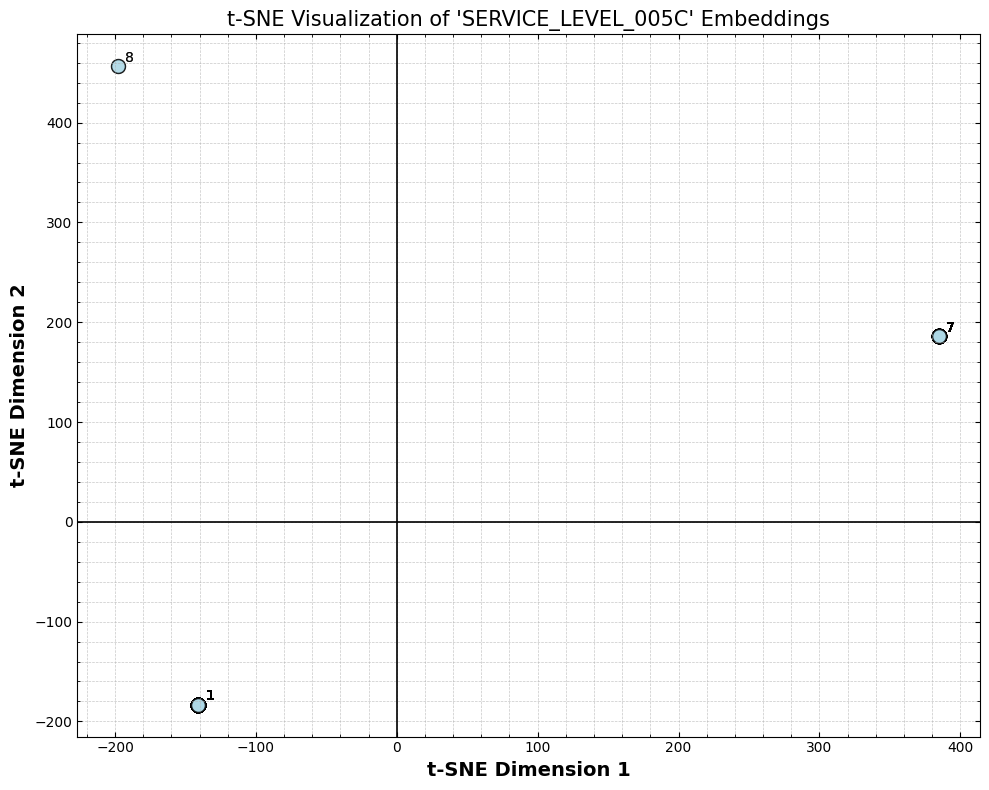

In [ ]:
import matplotlib.pyplot as plt

embedding_feature = "SERVICE_LEVEL_005C"
x_col = f"{embedding_feature}_embedding_x"
y_col = f"{embedding_feature}_embedding_y"

coords = top9_emb_w2v[[x_col, y_col]].values
text_labels = top9_df_emb[embedding_feature].astype(str).tolist()

plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], c='lightblue', s=100, edgecolors='k', alpha=0.7)

# Annotate
for i, txt in enumerate(text_labels):
    plt.annotate(txt, (coords[i, 0], coords[i, 1]),
                 xytext=(5, 3), textcoords='offset points', fontsize=10, alpha=0.85)

# Grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)

# Darker axis lines at x=0 and y=0
plt.axhline(y=0, color='black', linewidth=1.2)
plt.axvline(x=0, color='black', linewidth=1.2)

plt.xlabel("t-SNE Dimension 1", fontsize=14, fontweight='bold')
plt.ylabel("t-SNE Dimension 2", fontsize=14, fontweight='bold')
plt.title(f"t-SNE Visualization of '{embedding_feature}' Embeddings", fontsize=15)
plt.tight_layout()
plt.show()


### ⚙️ Install Gensim

Installs **Gensim**, a Python library for **training and using word embeddings** such as Word2Vec, FastText, and Doc2Vec.


In [ ]:
pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   --------------------- ------------------ 13.1/24.0 MB 81.8 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 75.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Embedding w/OpenAI

### 🔐 OpenAI API Key Setup

Stores your **OpenAI API key** for authentication when accessing GPT models or embeddings.



In [ ]:
import openai


### 🤖 **Embedding Generation via OpenAI API with t-SNE Dimensionality Reduction**

Generates semantic embeddings for categorical bridge attributes using OpenAI’s **`text-embedding-3-small`** model and reduces them to two dimensions using **t-SNE**, creating numerically usable features for downstream modeling.

---

#### 🧩 **Workflow Summary**

1. **API Setup**

   * Initializes the OpenAI client using a provided API key.
   * Implements basic rate-limit handling and retries to maintain stable embedding generation.

2. **Embedding Computation**

   * Iterates over categorical columns listed in `descriptions`.
   * Calls the `get_openai_embeddings()` helper, which:

     * Sends text inputs to the embedding API.
     * Collects returned 1,536-dimensional embeddings.
     * Pauses between calls to avoid exceeding request quotas.

3. **Dimensionality Reduction (t-SNE)**

   * Each embedding matrix is reduced to 2D space (`x`, `y` components) using **t-SNE** (`perplexity=30`, `random_state=42`).
   * Resulting coordinates capture relational similarity between categories.

4. **DataFrame Integration**

   * Adds new columns for each feature’s embedding coordinates
     (`<feature>_embedding_x`, `<feature>_embedding_y`).
   * Removes original categorical columns to leave only numerical data.

---

#### 🧾 **Outputs**

* **`top9_df_emb`** → Updated DataFrame containing numeric 2D embedding coordinates per encoded categorical column.
* Console log prints progress for each processed feature and previews the transformed dataset.


In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.manifold import TSNE
import openai

# Set OpenAI API Key directly

client = openai.OpenAI(api_key=api_key)

# Function to get OpenAI embeddings using the latest API with rate limiting
def get_openai_embeddings(texts, model="text-embedding-3-small"):
    embeddings = []
    for text in texts:
        try:
            response = client.embeddings.create(model=model, input=[text])
            embeddings.append(response.data[0].embedding)
            time.sleep(2)  # Add a delay to avoid rate limits
        except openai.OpenAIError as e:
            print(f"API Error: {e}. Retrying after delay...")
            time.sleep(5)  # Longer delay before retrying
            response = client.embeddings.create(model=model, input=[text])
            embeddings.append(response.data[0].embedding)
    return np.array(embeddings)

# Ensure we're working on a copy to avoid SettingWithCopyError
top9_df_emb = top9_df_emb.copy()

# Compute OpenAI embeddings and apply t-SNE for dimensionality reduction
columns_with_embeddings = []

for column in top9_df_emb.columns:
    if column in descriptions:
        print(f"Generating embeddings for column: {column}")

        # Apply OpenAI embedding function with rate limit handling
        embeddings_matrix = get_openai_embeddings(top9_df_emb[column].tolist())

        # Apply t-SNE to reduce dimensionality to 2D
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        reduced_embeddings = tsne.fit_transform(embeddings_matrix)

        # Store the reduced embeddings in the dataframe using .loc
        top9_df_emb.loc[:, f'{column}_embedding_x'] = reduced_embeddings[:, 0]
        top9_df_emb.loc[:, f'{column}_embedding_y'] = reduced_embeddings[:, 1]

        # Mark the column for removal
        columns_with_embeddings.append(column)

# Drop original text columns using .loc
top9_df_emb.drop(columns=columns_with_embeddings, inplace=True)

# Ensure the DataFrame is ready for modeling (only numeric features remain)
print("\n✅ Embeddings generated, reduced via t-SNE, and original columns removed.")
print(top9_df_emb.head())  # Display the DataFrame with new features



Generating embeddings for column: SERVICE_LEVEL_005C
API Error: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}. Retrying after delay...


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

# Embedding w/MiniLM

### 🧠 **Semantic Embedding Generation with Sentence-Transformers (MiniLM)**

Generates compact, context-aware embeddings for categorical bridge descriptors using **Sentence-Transformers (`all-MiniLM-L6-v2`)**, then applies **t-SNE** to project them into a 2D numeric space for modeling.

---

#### ⚙️ **Workflow Summary**

1. **Model Initialization**

   * Loads the pre-trained `all-MiniLM-L6-v2` model — a lightweight, high-performance transformer trained for semantic similarity.
   * Provides free and offline-compatible embeddings similar to OpenAI’s models.

2. **Embedding Computation**

   * Iterates over all categorical columns defined in `descriptions`.
   * Uses `SentenceTransformer.encode()` to convert each textual feature value into a fixed-length numerical vector (384 dimensions).

3. **Dimensionality Reduction (t-SNE)**

   * Reduces the embedding space to 2D (`x`, `y`) using t-SNE (`perplexity=30`, `random_state=42`).
   * This preserves semantic relationships while making data suitable for visualization or model input.

4. **Data Integration**

   * Adds new columns `<feature>_embedding_x` and `<feature>_embedding_y` for each processed feature.
   * Removes the original text-based categorical columns to leave a fully numeric DataFrame.

---

#### 🧾 **Outputs**

* **`top9_df_emb`** → Final DataFrame containing two embedding coordinates per categorical feature, ready for machine learning tasks or exploratory visualization.


In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer

# Load Sentence-Transformers model (Free alternative to OpenAI embeddings)
model = SentenceTransformer("all-MiniLM-L6-v2")

# Function to get embeddings using Sentence-Transformers
def get_embeddings(texts):
    return model.encode(texts)

# Ensure we're working on a copy to avoid SettingWithCopyError
top9_df_emb = top9_df_emb.copy()

# Compute embeddings and apply t-SNE for dimensionality reduction
columns_with_embeddings = []

for column in top9_df_emb.columns:
    if column in descriptions:
        print(f"Generating embeddings for column: {column}")

        # Apply embedding function
        embeddings_matrix = get_embeddings(top9_df_emb[column].tolist())

        # Apply t-SNE to reduce dimensionality to 2D
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        reduced_embeddings = tsne.fit_transform(embeddings_matrix)

        # Store the reduced embeddings in the dataframe using .loc
        top9_df_emb.loc[:, f'{column}_embedding_x'] = reduced_embeddings[:, 0]
        top9_df_emb.loc[:, f'{column}_embedding_y'] = reduced_embeddings[:, 1]

        # Mark the column for removal
        columns_with_embeddings.append(column)

# Drop original text columns using .loc
top9_df_emb.drop(columns=columns_with_embeddings, inplace=True)

# Ensure the DataFrame is ready for modeling (only numeric features remain)
print("\n✅ Embeddings generated, reduced via t-SNE, and original columns removed.")
print(top9_df_emb.head())  # Display the DataFrame with new features


Generating embeddings for column: STRAHNET_HIGHWAY_100
Generating embeddings for column: SERVICE_UND_042B
Generating embeddings for column: UNDCLRENCE_EVAL_069
Generating embeddings for column: SURFACE_TYPE_108A
Generating embeddings for column: STRUCTURAL_EVAL_067
Generating embeddings for column: APPR_KIND_044A
Generating embeddings for column: STRUCTURE_KIND_043A
Generating embeddings for column: MEMBRANE_TYPE_108B
Generating embeddings for column: DECK_GEOMETRY_EVAL_068
Generating embeddings for column: ROUTE_PREFIX_005B

✅ Embeddings generated, reduced via t-SNE, and original columns removed.
             STRUCTURE_ID    SUPPORT_TYPE  SPACING_PITCH_IN  \
DATABASE_REF                                                  
1                0019133A  RectCol-Spiral               6.0   
2                0019133D  RectCol-Spiral               4.0   
7                0005582A         CircCol              12.0   
8                0005523C         CircCol              12.0   
9                

### ⚙️ **Install Sentence-Transformers Library**

Installs the **`sentence-transformers`** package — a high-level framework built on **PyTorch** and **Transformers**, enabling generation of rich, context-aware text embeddings (e.g., MiniLM, MPNet, BERT variants) for tasks like semantic similarity, clustering, and dimensionality reduction.


In [ ]:
pip install sentence-transformers


Note: you may need to restart the kernel to use updated packages.


# Embedding w/BERT

### 🧠 **BERT Embedding Generation and t-SNE Dimensionality Reduction**

This block generates **semantic vector representations** of categorical or text-encoded bridge attributes using **BERT** (Bidirectional Encoder Representations from Transformers). The embeddings capture contextual meaning of categorical labels before being compressed for visualization and downstream ML tasks.

---

#### ⚙️ **Workflow Summary**

1. **Model Initialization**

   * Loads the `bert-base-uncased` tokenizer and model from Hugging Face.
   * Tokenizes each text entry with padding and truncation for uniform sequence length.

2. **Embedding Extraction**

   * Passes text batches through BERT without gradient tracking (`torch.no_grad()`).
   * Computes the **mean of the final hidden layer** to represent each sentence or category as a single dense vector.

3. **Dimensionality Reduction (t-SNE)**

   * Reduces each embedding vector to 2-dimensional coordinates (`x`, `y`) using t-SNE with a perplexity of 30.
   * The resulting coordinates preserve local similarity between semantically related features.

4. **Integration into DataFrame**

   * Adds two columns per embedded variable:
     `"<column>_embedding_x"` and `"<column>_embedding_y"`.
   * Removes the original text columns to maintain a purely numeric feature space.

---

#### 🧾 **Outputs**

* A processed DataFrame **`top9_emb_bert`** containing:

  * Numeric embedding coordinates for each selected categorical variable.
  * All other model-ready features retained.
* Console logs confirm progress per column and print the first few transformed rows for verification.


In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel
import torch

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Function to get BERT embeddings
def get_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            outputs = model(**inputs)
        sentence_embedding = torch.mean(outputs.last_hidden_state, dim=1).numpy()
        embeddings.append(sentence_embedding.flatten())
    return np.array(embeddings)

# Ensure we're working on a copy to avoid SettingWithCopyError
top9_emb_bert = top9_df_emb.copy()

# Compute embeddings and apply t-SNE for dimensionality reduction
columns_with_embeddings = []

for column in top9_emb_bert.columns:
    if column in descriptions:
        print(f"Generating embeddings for column: {column}")

        # Apply BERT embedding function
        embeddings_matrix = get_bert_embeddings(top9_emb_bert[column].tolist())

        # Apply t-SNE to reduce dimensionality to 2D
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        reduced_embeddings = tsne.fit_transform(embeddings_matrix)

        # Store the reduced embeddings in the dataframe using .loc
        top9_emb_bert.loc[:, f'{column}_embedding_x'] = reduced_embeddings[:, 0]
        top9_emb_bert.loc[:, f'{column}_embedding_y'] = reduced_embeddings[:, 1]

        # Mark the column for removal
        columns_with_embeddings.append(column)

# Drop original text columns using .loc
top9_emb_bert.drop(columns=columns_with_embeddings, inplace=True)

# Ensure the DataFrame is ready for modeling (only numeric features remain)
print("\n✅ Embeddings generated, reduced via t-SNE, and original columns removed.")
print(top9_emb_bert.head())  # Display the DataFrame with new features


Generating embeddings for column: STRUCTURE_TYPE_043B
Generating embeddings for column: TRANSITIONS_036B
Generating embeddings for column: STRUCTURE_KIND_043A
Generating embeddings for column: APPR_RAIL_END_036D
Generating embeddings for column: DECK_COND_058
Generating embeddings for column: INV_RATING_METH_065
Generating embeddings for column: PARALLEL_STRUCTURE_101
Generating embeddings for column: UNDCLRENCE_EVAL_069
Generating embeddings for column: STRUCTURAL_EVAL_067

✅ Embeddings generated, reduced via t-SNE, and original columns removed.
             STRUCTURE_ID    SUPPORT_TYPE  SPACING_PITCH_IN  \
DATABASE_REF                                                  
1                0019133A  RectCol-Spiral               6.0   
2                0019133D  RectCol-Spiral               4.0   
7                0005582A         CircCol              12.0   
8                0005523C         CircCol              12.0   
9                0005651A         CircCol              12.0   

     

# Embedding w/FastText

### ⚡ **FastText Embedding Generation and Dimensionality Reduction**

This block trains a **custom FastText model** on the project’s bridge attribute text fields to capture both **word-level and subword-level semantics**, generating dense embeddings for each category. The embeddings are then reduced with **t-SNE** for use in downstream numerical modeling.

---

#### ⚙️ **Workflow Summary**

1. **Text Preparation**

   * Extracts sentences from all descriptive categorical columns defined in `descriptions`.
   * Tokenizes by whitespace to create a clean corpus for training.

2. **Model Training (FastText)**

   * Initializes and trains a **FastText** model (`vector_size=100`, `window=5`, `epochs=10`) directly on the dataset.
   * Captures **morphological structure** — meaning it can infer vectors even for unseen words using subword information.

3. **Embedding Computation**

   * Converts each text entry into a **sentence embedding** by averaging its word vectors.
   * Handles empty or missing text by substituting zero vectors to maintain shape consistency.

4. **Dimensionality Reduction (t-SNE)**

   * Projects high-dimensional embeddings into 2D (`x`, `y`) using **t-SNE** (`perplexity=30`, `random_state=42`).
   * Preserves semantic proximity of categorical values in a visualizable numeric form.

5. **Integration and Cleanup**

   * Adds `<column>_embedding_x` and `<column>_embedding_y` columns for each processed feature.
   * Removes the original text columns, leaving only numeric embeddings for modeling.

---

#### 🧾 **Outputs**

* **`top9_emb_fasttext`** → Final DataFrame with two-dimensional FastText embeddings per categorical column.
* **Console output** confirms embedding generation for each feature and displays the first few transformed rows for verification.


In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.manifold import TSNE
from gensim.models.fasttext import FastText

# Function to prepare text data for FastText training
def prepare_text_data(df, text_columns):
    """
    Extracts sentences from specified text columns for training FastText.
    """
    sentences = []
    for col in text_columns:
        sentences.extend(df[col].dropna().astype(str).str.split().tolist())
    return sentences

# Train FastText model on your own data
def train_fasttext_model(df, text_columns, vector_size=100, window=5, min_count=1, epochs=10):
    """
    Trains a FastText model using the text data from specified columns in the DataFrame.
    """
    sentences = prepare_text_data(df, text_columns)
    model = FastText(vector_size=vector_size, window=window, min_count=min_count, workers=4)
    model.build_vocab(sentences)
    model.train(sentences, total_examples=len(sentences), epochs=epochs)
    return model

# Function to get FastText sentence embeddings
def get_fasttext_embeddings(texts, model):
    """
    Converts a list of texts into sentence embeddings by averaging FastText word vectors.
    """
    embeddings = []
    for text in texts:
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]

        if word_vectors:
            sentence_embedding = np.mean(word_vectors, axis=0)  # Average word vectors
        else:
            sentence_embedding = np.zeros(model.vector_size)  # Use zeros for empty sentences

        embeddings.append(sentence_embedding)

    return np.array(embeddings)

# Ensure we're working on a copy to avoid SettingWithCopyError
top9_emb_fasttext = top9_df_emb.copy()

# Define text columns to be embedded
text_columns = [col for col in top9_emb_fasttext.columns if col in descriptions]

# Train FastText on your dataset
fasttext_model = train_fasttext_model(top9_emb_fasttext, text_columns)

# Compute embeddings and apply t-SNE for dimensionality reduction
columns_with_embeddings = []

for column in text_columns:
    print(f"Generating FastText embeddings for column: {column}")

    # Apply FastText embedding function
    embeddings_matrix = get_fasttext_embeddings(top9_emb_fasttext[column].fillna(""), fasttext_model)

    # Apply t-SNE to reduce dimensionality to 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    reduced_embeddings = tsne.fit_transform(embeddings_matrix)

    # Store the reduced embeddings in the dataframe using .loc
    top9_emb_fasttext.loc[:, f'{column}_embedding_x'] = reduced_embeddings[:, 0]
    top9_emb_fasttext.loc[:, f'{column}_embedding_y'] = reduced_embeddings[:, 1]

    # Mark the column for removal
    columns_with_embeddings.append(column)

# Drop original text columns using .loc
top9_emb_fasttext.drop(columns=columns_with_embeddings, inplace=True)

# Ensure the DataFrame is ready for modeling (only numeric features remain)
print("\n✅ FastText embeddings generated, reduced via t-SNE, and original columns removed.")
print(top9_emb_fasttext.head())  # Display the DataFrame with new features


Generating FastText embeddings for column: SERVICE_LEVEL_005C
Generating FastText embeddings for column: SERVICE_UND_042B
Generating FastText embeddings for column: ROUTE_PREFIX_005B
Generating FastText embeddings for column: SCOUR_CRITICAL_113
Generating FastText embeddings for column: STRUCTURE_KIND_043A
Generating FastText embeddings for column: STRUCTURE_TYPE_043B

✅ FastText embeddings generated, reduced via t-SNE, and original columns removed.
             STRUCTURE_ID    SUPPORT_TYPE  SPACING_PITCH_IN  \
DATABASE_REF                                                  
1                0019133A  RectCol-Spiral                 6   
2                0019133D  RectCol-Spiral                 4   
3                0005943A            Wall                24   
4                0005943B     Single Span              <NA>   
5                0005523A            Wall                24   

              COLUMNS_PILES_PER_BENT  COLUMNS_PILES_0_1  CLEAR_HEIGHT_FT  \
DATABASE_REF                

# Evaluating Encoding vs. Embedding - Top 9

### 🌲 **Random Forest Model Optimization and Evaluation**

This block performs **binary classification modeling** on bridge structural features using a **Random Forest Classifier**, applying two-stage hyperparameter tuning (`RandomizedSearchCV` → `GridSearchCV`) across multiple random states to ensure robust generalization.

---

#### ⚙️ **Workflow Summary**

1. **Feature Setup**

   * Target variable: `'COLUMNS_PILES_0_1'` (binary).
   * Feature set excludes geometric, ID, and redundant columns.
   * Ensures no missing values in required predictor columns before training.

2. **Model Definition**

   * Uses `RandomForestClassifier` as the main model.
   * Two parameter search strategies:

     * **RandomizedSearchCV**: broad exploration across parameter distributions.
     * **GridSearchCV**: fine-tuning based on the best parameters found.

3. **Training & Evaluation Loop**

   * Runs over multiple `random_states` for stable results.
   * Splits data into training and test sets per iteration (100-sample test).
   * Evaluates model accuracy and **F1 Score (binary)** on unseen data.
   * Results appended across all random states for aggregation.

4. **Statistical Summary**

   * Calculates **average accuracy** and **standard error of accuracy** to quantify model consistency across random splits.

---

#### 🧾 **Outputs**

* **`overall_results`** — detailed table containing:

  * Best hyperparameters
  * Accuracy
  * F1 score
  * Associated target and random state

* **Console summary**

  * Prints average model accuracy and its standard error, confirming overall performance stability across runs.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['COLUMNS_PILES_0_1', "L_H_MIN", 'LRR', 'TRR']
target_features = ['COLUMNS_PILES_0_1']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param_dist': {  # RandomizedSearchCV distributions
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10),
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        },
        'grid_params': {  # GridSearchCV fixed values
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'max_features': ['sqrt', 'log2', None]
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='binary')

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = top9_df_enc.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df_enc[~top9_df_enc.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        result = evaluate_models(X_train, X_test, y_train, y_test)
        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

# Compute averages and standard errors
average_accuracy = overall_results['Accuracy'].mean()
se_accuracy = overall_results['Accuracy'].std() / np.sqrt(len(random_states))

print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Error of Accuracy: {se_accuracy}")

print(overall_results)


Using random state: 21
Processing target: COLUMNS_PILES_0_1
Using random state: 42
Processing target: COLUMNS_PILES_0_1
Using random state: 14
Processing target: COLUMNS_PILES_0_1
Using random state: 1
Processing target: COLUMNS_PILES_0_1
Using random state: 12
Processing target: COLUMNS_PILES_0_1
Using random state: 23
Processing target: COLUMNS_PILES_0_1
Using random state: 84
Processing target: COLUMNS_PILES_0_1
Using random state: 96
Processing target: COLUMNS_PILES_0_1
Using random state: 100
Processing target: COLUMNS_PILES_0_1
Using random state: 55
Processing target: COLUMNS_PILES_0_1
Average Accuracy: 0.9020000000000001
Standard Error of Accuracy: 0.006289320754704408
                                                          Best Parameters  \
RandomForestClassifier  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   
RandomForestClassifier  {'max_depth': 10, 'max_features': 'sqrt', 'min...   
RandomForestClassifier  {'max_depth': 5, 'max_features': 'log2', 'min_...   
Random

### 🌲 **Random Forest Model Evaluation on XLNet-Embedded Dataset**

This code block performs **binary classification** on the **XLNet-embedded bridge dataset (`top9_emb_xl`)** using a **Random Forest model**, with systematic hyperparameter optimization across multiple random seeds to ensure consistent predictive reliability.

---

#### ⚙️ **Workflow Summary**

**1. Data Preparation**

* **Target variable:** `COLUMNS_PILES_0_1` (binary classification task).
* **Excluded features:** Structural identifiers, redundant dimensions, and correlated engineering parameters.
* Training and test splits are created per `random_state` after removing rows with missing values in key columns.

**2. Model Configuration**

* Model: `RandomForestClassifier()`
* **Two-stage tuning process:**

  * **RandomizedSearchCV** explores wide hyperparameter ranges (`max_depth`, `min_samples_split`, etc.).
  * **GridSearchCV** fine-tunes top configurations found from random search.

**3. Evaluation Process**

* Each random state produces:

  * Accuracy (`accuracy_score`)
  * Binary F1 Score (`f1_score`)
* Metrics are collected across all iterations in `overall_results`.

**4. Statistical Aggregation**

* Computes **mean accuracy** and **standard error** across all random states to assess robustness.

---

#### 🧾 **Outputs**

* **`overall_results`** → Full DataFrame with best parameters, accuracy, F1, target name, and random state.
* **Console Summary** →

  * Average accuracy across all runs
  * Standard error of accuracy for model stability evaluation.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['COLUMNS_PILES_0_1', "L_H_MIN", 'LRR', 'TRR']
target_features = ['COLUMNS_PILES_0_1']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param_dist': {  # RandomizedSearchCV distributions
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10),
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        },
        'grid_params': {  # GridSearchCV fixed values
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'max_features': ['sqrt', 'log2', None]
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='binary')

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = top9_emb_xl.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_emb_xl[~top9_emb_xl.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        result = evaluate_models(X_train, X_test, y_train, y_test)
        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

# Compute averages and standard errors
average_accuracy = overall_results['Accuracy'].mean()
se_accuracy = overall_results['Accuracy'].std() / np.sqrt(len(random_states))

print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Error of Accuracy: {se_accuracy}")

print(overall_results)


Using random state: 21
Processing target: COLUMNS_PILES_0_1
Using random state: 42
Processing target: COLUMNS_PILES_0_1


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Using random state: 14
Processing target: COLUMNS_PILES_0_1
Using random state: 1
Processing target: COLUMNS_PILES_0_1
Using random state: 12
Processing target: COLUMNS_PILES_0_1
Using random state: 23
Processing target: COLUMNS_PILES_0_1
Using random state: 84
Processing target: COLUMNS_PILES_0_1
Using random state: 96
Processing target: COLUMNS_PILES_0_1
Using random state: 100
Processing target: COLUMNS_PILES_0_1
Using random state: 55
Processing target: COLUMNS_PILES_0_1
Average Accuracy: 0.8960000000000001
Standard Error of Accuracy: 0.00896908269804914
                                                          Best Parameters  \
RandomForestClassifier  {'max_depth': 5, 'max_features': 'log2', 'min_...   
RandomForestClassifier  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   
RandomForestClassifier  {'max_depth': 5, 'max_features': 'log2', 'min_...   
RandomForestClassifier  {'max_depth': 10, 'max_features': 'sqrt', 'min...   
RandomForestClassifier  {'max_depth': 10, 'max_fea

### 🧠 **Random Forest Model Evaluation on Word2Vec-Embedded Dataset**

This block applies a **Random Forest classification workflow** on the **Word2Vec-embedded dataset (`top9_emb_w2v`)** to predict the binary variable `COLUMNS_PILES_0_1`. It mirrors the XLNet-based workflow but evaluates how **linguistic embeddings from Word2Vec** affect predictive performance.

---

#### ⚙️ **Workflow Summary**

**1. Data Preparation**

* **Target:** `COLUMNS_PILES_0_1` (binary classification task).
* **Excluded:** redundant geometric and structural columns to prevent feature leakage.
* The dataset is filtered for complete cases across essential columns and split into **training and testing sets** per `random_state`.

**2. Model Configuration**

* **Model:** `RandomForestClassifier()`
* **Tuning Strategy:**

  * **Stage 1:** `RandomizedSearchCV` explores wide parameter ranges (tree depth, estimators, feature selection strategy).
  * **Stage 2:** `GridSearchCV` fine-tunes around the best combination found earlier for precision optimization.

**3. Evaluation Loop**

* Iterates through **10 random seeds** (`[21, 42, 14, 1, 12, 23, 84, 96, 100, 55]`).
* For each iteration, metrics collected include:

  * ✅ **Accuracy**
  * 🎯 **Binary F1 Score**
* Results from all runs are aggregated in `overall_results`.

**4. Statistical Summary**

* Computes **mean accuracy** and **standard error of accuracy** across all iterations to assess **model reliability** and **variance**.

---

#### 🧾 **Outputs**

* **`overall_results`** → A DataFrame containing:

  * Best hyperparameters per iteration
  * Accuracy and F1 Score values
  * Corresponding target and random seed

* **Console summary** → Displays:

  * Average accuracy across runs
  * Standard error of accuracy (model consistency indicator)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['COLUMNS_PILES_0_1', "L_H_MIN", 'LRR', 'TRR']
target_features = ['COLUMNS_PILES_0_1']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param_dist': {  # RandomizedSearchCV distributions
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10),
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        },
        'grid_params': {  # GridSearchCV fixed values
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'max_features': ['sqrt', 'log2', None]
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='binary')

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = top9_emb_w2v.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_emb_w2v[~top9_emb_w2v.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        result = evaluate_models(X_train, X_test, y_train, y_test)
        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

# Compute averages and standard errors
average_accuracy = overall_results['Accuracy'].mean()
se_accuracy = overall_results['Accuracy'].std() / np.sqrt(len(random_states))

print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Error of Accuracy: {se_accuracy}")

print(overall_results)


Using random state: 21
Processing target: COLUMNS_PILES_0_1
Using random state: 42
Processing target: COLUMNS_PILES_0_1
Using random state: 14
Processing target: COLUMNS_PILES_0_1
Using random state: 1
Processing target: COLUMNS_PILES_0_1
Using random state: 12
Processing target: COLUMNS_PILES_0_1
Using random state: 23
Processing target: COLUMNS_PILES_0_1
Using random state: 84
Processing target: COLUMNS_PILES_0_1


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Using random state: 96
Processing target: COLUMNS_PILES_0_1
Using random state: 100
Processing target: COLUMNS_PILES_0_1
Using random state: 55
Processing target: COLUMNS_PILES_0_1
Average Accuracy: 0.8960000000000001
Standard Error of Accuracy: 0.008717797887081347
                                                          Best Parameters  \
RandomForestClassifier  {'max_depth': 10, 'max_features': 'sqrt', 'min...   
RandomForestClassifier  {'max_depth': 10, 'max_features': 'sqrt', 'min...   
RandomForestClassifier  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   
RandomForestClassifier  {'max_depth': 10, 'max_features': 'log2', 'min...   
RandomForestClassifier  {'max_depth': 10, 'max_features': 'log2', 'min...   
RandomForestClassifier  {'max_depth': 10, 'max_features': 'sqrt', 'min...   
RandomForestClassifier  {'max_depth': 5, 'max_features': 'log2', 'min_...   
RandomForestClassifier  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   
RandomForestClassifier  {'max_depth': 5,

### 🌲 **Binary Bridge Feature Classification Using Random Forest**

Trains a **Random Forest Classifier** to predict the binary structural feature `COLUMNS_PILES_0_1` using embedding-enhanced bridge data.
Applies a two-stage hyperparameter optimization (randomized then grid search) and evaluates performance consistency across multiple random seeds.

---

#### 🧩 **Workflow Summary**

1. **Feature & Target Setup**

   * Defines the binary target `COLUMNS_PILES_0_1` and removes structural identifiers or non-predictive features.
   * Ensures all rows used for training and testing contain complete values for critical columns.

2. **Model Configuration**

   * Uses **RandomForestClassifier** as the core model.
   * Defines a broad parameter distribution for `RandomizedSearchCV` and narrower fixed grids for `GridSearchCV`.
   * Parameters tuned include `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, and `max_features`.

3. **Evaluation Procedure**

   * Conducts randomized search (30 iterations, 5-fold CV) for initial tuning.
   * Refines top parameters via grid search using the same CV setup.
   * Computes **Accuracy** and **Binary F1 Score** on the held-out test set.
   * Results for each model and random state are appended to a cumulative `overall_results` DataFrame.

4. **Multi-State Validation**

   * Runs across 10 random seeds to measure stability under different data splits.
   * Each iteration uses up to 100 test samples and the remaining data for training.

5. **Performance Aggregation**

   * Calculates the mean accuracy and its standard error across all seeds for generalization assessment.
   * Prints aggregate statistics followed by the detailed `overall_results` DataFrame.

---

#### 🧾 **Outputs**

* **`overall_results`** — Contains accuracy, F1 scores, tuned parameters, and random state identifiers for each run.
* **Printed Summary** — Displays the average accuracy and standard error of the Random Forest classifier across all seeds.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['COLUMNS_PILES_0_1', "L_H_MIN", 'LRR', 'TRR']
target_features = ['COLUMNS_PILES_0_1']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param_dist': {  # RandomizedSearchCV distributions
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10),
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        },
        'grid_params': {  # GridSearchCV fixed values
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'max_features': ['sqrt', 'log2', None]
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='binary')

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = top9_emb_bert.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_emb_bert[~top9_emb_bert.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        result = evaluate_models(X_train, X_test, y_train, y_test)
        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

# Compute averages and standard errors
average_accuracy = overall_results['Accuracy'].mean()
se_accuracy = overall_results['Accuracy'].std() / np.sqrt(len(random_states))

print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Error of Accuracy: {se_accuracy}")

print(overall_results)


Using random state: 21
Processing target: COLUMNS_PILES_0_1


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Using random state: 42
Processing target: COLUMNS_PILES_0_1


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Using random state: 14
Processing target: COLUMNS_PILES_0_1
Using random state: 1
Processing target: COLUMNS_PILES_0_1
Using random state: 12
Processing target: COLUMNS_PILES_0_1
Using random state: 23
Processing target: COLUMNS_PILES_0_1
Using random state: 84
Processing target: COLUMNS_PILES_0_1
Using random state: 96
Processing target: COLUMNS_PILES_0_1
Using random state: 100
Processing target: COLUMNS_PILES_0_1
Using random state: 55
Processing target: COLUMNS_PILES_0_1
Average Accuracy: 0.89
Standard Error of Accuracy: 0.009189365834726813
                                                          Best Parameters  \
RandomForestClassifier  {'max_depth': 5, 'max_features': 'log2', 'min_...   
RandomForestClassifier  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   
RandomForestClassifier  {'max_depth': 10, 'max_features': 'sqrt', 'min...   
RandomForestClassifier  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   
RandomForestClassifier  {'max_depth': 10, 'max_features': 'sqrt

# T-test

### 📈 **Welch’s Two-Sample t-Test for Model Comparison**

Implements a statistical comparison between two model performance groups using **Welch’s t-test**, accounting for unequal variances and sample sizes.
Determines whether the difference in mean accuracies (or other metrics) between two models is statistically significant.

---

#### 🧩 **Workflow Summary**

1. **Function Definition (`compute_t_test`)**

   * Computes the t-statistic for two independent samples using their means and standard errors.
   * Calculates effective degrees of freedom via Welch’s approximation formula.
   * Derives the two-tailed p-value from the t-distribution.

2. **Example Application**

   * Compares two models (or experimental runs) with specified means, standard errors, and sample sizes.
   * Returns both the **t-statistic** (magnitude of difference) and **p-value** (significance of difference).

---

#### 🧾 **Outputs**

Prints the calculated test statistic and p-value, indicating whether the two sample means differ significantly.


In [ ]:
from scipy.stats import t
import numpy as np

def compute_t_test(mean1, se1, n1, mean2, se2, n2):

    # Compute t-statistic
    t_stat = (mean1 - mean2) / np.sqrt(se1**2 + se2**2)

    # Compute degrees of freedom using Welch’s t-test formula
    df_numerator = (se1**2 + se2**2) ** 2
    df_denominator = (se1**4 / (n1 - 1)) + (se2**4 / (n2 - 1))
    df = df_numerator / df_denominator

    # Compute two-tailed p-value
    p_value = 2 * (1 - t.cdf(abs(t_stat), df=df))

    return t_stat, p_value

# Example usage
mean1, se1, n1 = 0.121,					0.014, 10  # Mean, SE, and sample size of group 1
mean2, se2, n2 = 0.188,	0.029, 10  # Mean, SE, and sample size of group 2

t_stat, p_value = compute_t_test(mean1, se1, n1, mean2, se2, n2)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


T-statistic: -2.0806, P-value: 0.0578


# Evaluating Encoding vs. Embedding - Single Feature

### 🧩 **Select Encoded Feature Subset**

Creates a new DataFrame `df_enc_1` containing only the encoded columns `COLUMNS_PILES_PER_BENT` and `STRUCTURE_TYPE_043B`, isolating these features for focused analysis or visualization.


In [ ]:
df_enc_1 = top9_df_enc[['COLUMNS_PILES_PER_BENT', 'STRUCTURE_TYPE_043B']]

### 🧮 **Extract XLNet Embedding Subset**

Generates a new DataFrame `df_xl_1` containing the binary target `CRITICAL_TRUTH_0_1` and the 2D XLNet embedding coordinates (`STRUCTURE_TYPE_043B_embedding_x`, `STRUCTURE_TYPE_043B_embedding_y`) for downstream modeling or visualization.


In [ ]:
df_xl_1 = top9_emb_xl[['CRITICAL_TRUTH_0_1', 'STRUCTURE_TYPE_043B_embedding_x','STRUCTURE_TYPE_043B_embedding_y' ]]

### 🔠 **Extract Word2Vec Embedding Subset**

Creates a new DataFrame `df_w2v_1` containing the feature `COLUMNS_PILES_PER_BENT` alongside its **Word2Vec embedding coordinates** (`STRUCTURE_TYPE_043B_embedding_x`, `STRUCTURE_TYPE_043B_embedding_y`), preparing the data for comparative embedding visualization or analysis.


In [ ]:
df_w2v_1 = top9_emb_w2v[['COLUMNS_PILES_PER_BENT', 'STRUCTURE_TYPE_043B_embedding_x','STRUCTURE_TYPE_043B_embedding_y' ]]

### 🧬 BERT Embedding Feature Subset

Creates a new DataFrame `df_bert_1` containing the **target label** `CRITICAL_TRUTH_0_1` and the **BERT-derived 2D embedding coordinates** (`STRUCTURE_TYPE_043B_embedding_x`, `STRUCTURE_TYPE_043B_embedding_y`) for use in visualization, correlation analysis, or model training.


In [ ]:
df_bert_1 = top9_emb_bert[['CRITICAL_TRUTH_0_1', 'STRUCTURE_TYPE_043B_embedding_x','STRUCTURE_TYPE_043B_embedding_y' ]]


### ⚡ FastText Embedding Feature Subset

Defines a DataFrame `df_fast_1` that would include the **feature** `SPACING_PITCH_IN` alongside the **FastText-generated 2D embedding coordinates** (`STRAHNET_HIGHWAY_100_embedding_x`, `STRAHNET_HIGHWAY_100_embedding_y`) for downstream modeling or exploratory visualization.


In [ ]:
#df_fast_1 = top9_emb_fasttext[['SPACING_PITCH_IN', 'STRAHNET_HIGHWAY_100_embedding_x','STRAHNET_HIGHWAY_100_embedding_y' ]]

### 📉 **Bridge Feature Regression Using XGBoost**

Performs a **regression analysis** on bridge features to predict `COLUMNS_PILES_PER_BENT` using an **XGBoost Regressor**.
Implements a two-stage hyperparameter tuning pipeline and evaluates predictive accuracy across multiple randomized splits.

---

#### 🧩 **Workflow Summary**

1. **Data Preparation**

   * Defines the target feature (`COLUMNS_PILES_PER_BENT`) and removes non-predictive or duplicate attributes.
   * Filters complete rows to ensure valid training and testing samples.

2. **Model and Search Configuration**

   * Uses **XGBRegressor** as the base model.
   * Applies **RandomizedSearchCV** for broad parameter exploration followed by **GridSearchCV** for fine-tuning.
   * Key parameters tuned: `n_estimators`, `max_depth`, `learning_rate`, `subsample`, and `colsample_bytree`.

3. **Evaluation Metrics**

   * Trains and evaluates each tuned model on test data using:

     * **RMSE (Root Mean Squared Error)** for prediction error magnitude.
     * **R² (Coefficient of Determination)** for model fit quality.
   * Results from each run are stored with their corresponding random state.

4. **Multi-Seed Validation**

   * Executes training and evaluation across 10 random seeds to assess model consistency.
   * Aggregates results across runs for statistical robustness.

5. **Performance Aggregation**

   * Computes overall averages and standard errors for both RMSE and R² metrics.
   * Outputs per-seed results and aggregate performance summary.

---

#### 🧾 **Outputs**

* **`overall_results`** — Contains RMSE, R² scores, and optimal parameters for each random seed.
* **Printed Summary** — Displays the average and standard error for both RMSE and R² across all model iterations.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['COLUMNS_PILES_PER_BENT']
target_features = ['COLUMNS_PILES_PER_BENT']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBRegressor': {
        'model': XGBRegressor(eval_metric='rmse'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='neg_root_mean_squared_error', n_jobs=1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            r2 = r2_score(y_test, y_pred)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'RMSE': rmse,
                'R^2': r2
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = df_enc_1.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = df_enc_1[~df_enc_1.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        result = evaluate_models(X_train, X_test, y_train, y_test)
        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

# Compute averages and standard errors
average_rmse = overall_results['RMSE'].mean()
average_r2 = overall_results['R^2'].mean()
se_rmse = overall_results['RMSE'].std() / np.sqrt(len(random_states))
se_r2 = overall_results['R^2'].std() / np.sqrt(len(random_states))

print(f"Average RMSE: {average_rmse}")
print(f"Standard Error of RMSE: {se_rmse}")
print(f"Average R^2: {average_r2}")
print(f"Standard Error of R^2: {se_r2}")

print(overall_results)


Using random state: 21
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 42
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 14
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 1
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 12
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 23
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 84
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 96
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 100
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 55
Processing target: COLUMNS_PILES_PER_BENT
Average RMSE: 1.4306955977230993
Standard Error of RMSE: 0.019224761440308734
Average R^2: 0.1213323466115452
Standard Error of R^2: 0.014338194090410534
                                                Best Parameters      RMSE  \
XGBRegressor  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...  1.497271   
XGBRegressor  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...  1.406797   
XGBRegressor  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...  1.465126   
XGBRegressor  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...  1.383925   
XGBRegressor  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...  1.457719   
XGBRegressor  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...  1.434575   
XGBRegressor  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...   1.35645   
XGBRegressor  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...  1.344462   
XGBRegressor  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...  1.424328   
XGBRegresso

C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 🔠 **Word2Vec-Enhanced Regression with XGBoost**

Performs a **regression analysis** using **Word2Vec embeddings** as input features to predict the continuous bridge variable `COLUMNS_PILES_PER_BENT`.
Employs a two-stage XGBoost optimization and evaluates regression accuracy and model fit across multiple randomized test splits.

---

#### 🧩 **Workflow Summary**

1. **Data Preparation**

   * Uses the pre-generated `df_w2v_1` DataFrame containing Word2Vec embeddings (`_embedding_x`, `_embedding_y`) and the target variable.
   * Removes non-predictive or identifier columns to isolate clean numeric inputs for model training.

2. **Model Configuration**

   * Implements an **XGBRegressor** with RMSE (`'rmse'`) as its evaluation metric.
   * Defines randomized hyperparameter search distributions and narrower grid search ranges for fine-tuning.
   * Optimizes parameters including: `n_estimators`, `max_depth`, `learning_rate`, `subsample`, and `colsample_bytree`.

3. **Evaluation Process**

   * Conducts **RandomizedSearchCV** (broad search, 30 iterations, 5-fold CV) followed by **GridSearchCV** (fine search).
   * Evaluates performance using:

     * **RMSE (Root Mean Squared Error)** — quantifies prediction deviation.
     * **R² (Coefficient of Determination)** — measures explanatory power of the model.

4. **Multi-Seed Cross-Validation**

   * Runs the full training and evaluation procedure across 10 different random seeds for reproducibility.
   * Randomly samples up to 100 bridges per iteration for testing and uses remaining data for training.

5. **Performance Aggregation**

   * Aggregates results from all seeds into `overall_results`.
   * Computes and prints average RMSE, R², and their standard errors to summarize model consistency.

---

#### 🧾 **Outputs**

* **`overall_results`** — Records RMSE, R², optimal hyperparameters, and random states for each model run.
* **Printed Summary** — Reports the mean and standard error of RMSE and R² across all Word2Vec-based regression trials.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['COLUMNS_PILES_PER_BENT']
target_features = ['COLUMNS_PILES_PER_BENT']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBRegressor': {
        'model': XGBRegressor(eval_metric='rmse'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='neg_root_mean_squared_error', n_jobs=1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            r2 = r2_score(y_test, y_pred)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'RMSE': rmse,
                'R^2': r2
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = df_w2v_1.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = df_w2v_1[~df_w2v_1.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        result = evaluate_models(X_train, X_test, y_train, y_test)
        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

# Compute averages and standard errors
average_rmse = overall_results['RMSE'].mean()
average_r2 = overall_results['R^2'].mean()
se_rmse = overall_results['RMSE'].std() / np.sqrt(len(random_states))
se_r2 = overall_results['R^2'].std() / np.sqrt(len(random_states))

print(f"Average RMSE: {average_rmse}")
print(f"Standard Error of RMSE: {se_rmse}")
print(f"Average R^2: {average_r2}")
print(f"Standard Error of R^2: {se_r2}")

print(overall_results)


Using random state: 21
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 42
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 14
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 1
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 12
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 23
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 84
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 96
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 100
Processing target: COLUMNS_PILES_PER_BENT


C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Using random state: 55
Processing target: COLUMNS_PILES_PER_BENT
Average RMSE: 1.3720092745498251
Standard Error of RMSE: 0.014393216440292818
Average R^2: 0.18796738455988232
Standard Error of R^2: 0.02873629192257757
                                                Best Parameters      RMSE  \
XGBRegressor  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...  1.370285   
XGBRegressor  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...  1.307601   
XGBRegressor  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  1.371986   
XGBRegressor  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...  1.312663   
XGBRegressor  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...  1.367589   
XGBRegressor  {'learning_rate': 0.01, 'max_depth': 10, 'n_es...  1.374547   
XGBRegressor  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...  1.367545   
XGBRegressor  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...  1.364884   
XGBRegressor  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...  1.416818   
XGBRegresso

C:\Users\jlensing\AppData\Local\anaconda3\envs\autogluon_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### ⚙️ **Critical Bridge Safety Classification Using Encoded Features**

Trains an **XGBoost Classifier** to predict the binary structural condition variable `CRITICAL_TRUTH_0_1` using encoded bridge attributes.
Employs a robust two-stage hyperparameter search with statistical evaluation across multiple random splits.

---

#### 🧩 **Workflow Summary**

1. **Feature and Target Definition**

   * Target: `CRITICAL_TRUTH_0_1` (binary indicator of structural criticality).
   * Non-predictive identifiers and redundant columns are excluded to prevent data leakage.

2. **Model Configuration**

   * Uses **XGBClassifier** (`mlogloss` metric) for probabilistic multi-class capability.
   * Two-stage hyperparameter optimization strategy:

     * **RandomizedSearchCV:** broad tuning across 30 parameter samples.
     * **GridSearchCV:** fine-tuning around best-performing configurations.
   * Parameters explored include `n_estimators`, `max_depth`, `learning_rate`, `subsample`, and `colsample_bytree`.

3. **Evaluation Metrics**

   * Model performance is assessed using:

     * **Accuracy** — correct classification rate.
     * **F1 Score** — balance between precision and recall (weighted).
     * **ROC AUC (OVR)** — one-vs-rest area under the curve for class separation.
   * Handles missing test classes gracefully, skipping ROC AUC when necessary.

4. **Cross-State Validation**

   * Repeats training and evaluation across **10 random seeds** (`[21, 42, 14, 1, 12, 23, 84, 96, 100, 55]`).
   * Each iteration samples up to 100 bridges for testing and uses remaining rows for training.

5. **Result Aggregation**

   * All evaluation metrics and best parameters are stored in `overall_results`.
   * Averages and standard errors for **Accuracy** and **ROC AUC** are computed across seeds for stability analysis.

---

#### 🧾 **Outputs**

* **`overall_results`** — Detailed per-seed metrics (Accuracy, F1 Score, ROC AUC, parameters).
* **Printed Summary** — Displays mean Accuracy, mean ROC AUC, and their respective standard errors across all test runs.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['CRITICAL_TRUTH_0_1']
target_features = ['CRITICAL_TRUTH_0_1']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            # Adjust for missing classes in test set
            all_classes = np.arange(len(np.unique(y_train)))
            try:
                roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test),
                                        multi_class='ovr', labels=all_classes)
            except ValueError:
                print(f"Skipping ROC AUC calculation for {model_name} due to missing classes in y_test")
                roc_auc = None

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = df_enc_1.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = df_enc_1[~df_enc_1.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded)
        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

# Compute averages and standard errors
average_accuracy = overall_results['Accuracy'].mean()
average_roc_auc = overall_results['ROC AUC'].mean()
se_accuracy = overall_results['Accuracy'].std() / np.sqrt(len(random_states))
se_roc_auc = overall_results['ROC AUC'].std() / np.sqrt(len(random_states))

print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Error of Accuracy: {se_accuracy}")
print(f"Average ROC AUC: {average_roc_auc}")
print(f"Standard Error of ROC AUC: {se_roc_auc}")

print(overall_results)


Using random state: 21
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 42
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 14
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 1
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 12
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 23
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 84
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random s

### 🧩 `X_train` — Training Feature Matrix

`X_train` represents the **input feature set** used to train the machine learning model.

It is created by selecting all **predictor columns** (those not in `target_features` or `exclude_features`) from the training subset of the dataset. Each row corresponds to one training sample, and each column corresponds to one numerical or embedding-based feature.


In [ ]:
X_train

,APPR_RAIL_END_036D
DATABASE_REF,
1,1.0
2,1.0
7,1.0
8,1.0
16,1.0
...,...
838,1.0
841,1.0
842,1.0


### ⚙️ **Critical Bridge Failure Prediction Using Word2Vec Embeddings**

This block performs **binary classification** on bridge failure likelihood (`CRITICAL_TRUTH_0_1`) using **Word2Vec-generated embedding features**.
It employs an **XGBoost classifier** with two-stage hyperparameter tuning and evaluates performance across multiple random seeds for reliability.

---

#### 🧩 **Workflow Summary**

**1. Data & Feature Setup**

* **Target:** `CRITICAL_TRUTH_0_1` (binary outcome).
* Excludes redundant or leakage-prone columns (e.g., identifiers, derived targets).
* Uses Word2Vec embedding coordinates as numerical predictors.

**2. Model & Optimization**

* **Base Model:** `XGBClassifier` with `mlogloss` metric for stability.
* **Two-Phase Optimization:**

  * **RandomizedSearchCV:** explores 30 random combinations for broad coverage.
  * **GridSearchCV:** fine-tunes around the top results for precision.
* Parameters tuned include tree depth, learning rate, estimators, and sampling ratios.

**3. Performance Metrics**
Each trained model is assessed on a held-out test set using:

* **Accuracy** – proportion of correct predictions.
* **Weighted F1 Score** – balances precision and recall for both classes.
* **ROC AUC (OVR)** – multi-class area under ROC curve, skipped if test labels lack class diversity.

**4. Repeated Evaluation Across Random States**

* Conducted over **10 random splits** (`[21, 42, 14, 1, 12, 23, 84, 96, 100, 55]`).
* Each split samples up to 100 complete rows for test data and trains on the rest.
* Label encoding ensures consistent mapping between class values and model outputs.

**5. Aggregation & Statistical Summary**

* All results are appended to `overall_results`.
* Mean and standard error values are computed for:

  * **Average Accuracy**
  * **Average ROC AUC**

---

#### 🧾 **Outputs**

* **`overall_results`** — detailed per-seed model performance (Accuracy, F1, ROC AUC, best params).
* **Printed Summary:** average Accuracy, ROC AUC, and their respective standard errors across all runs.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['CRITICAL_TRUTH_0_1']
target_features = ['CRITICAL_TRUTH_0_1']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            # Adjust for missing classes in test set
            all_classes = np.arange(len(np.unique(y_train)))
            try:
                roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test),
                                        multi_class='ovr', labels=all_classes)
            except ValueError:
                print(f"Skipping ROC AUC calculation for {model_name} due to missing classes in y_test")
                roc_auc = None

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = df_w2v_1.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = df_w2v_1[~df_w2v_1.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded)
        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

# Compute averages and standard errors
average_accuracy = overall_results['Accuracy'].mean()
average_roc_auc = overall_results['ROC AUC'].mean()
se_accuracy = overall_results['Accuracy'].std() / np.sqrt(len(random_states))
se_roc_auc = overall_results['ROC AUC'].std() / np.sqrt(len(random_states))

print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Error of Accuracy: {se_accuracy}")
print(f"Average ROC AUC: {average_roc_auc}")
print(f"Standard Error of ROC AUC: {se_roc_auc}")

print(overall_results)


Using random state: 21
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 42
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 14
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 1
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 12
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 23
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 84
Processing target: CRITICAL_TRUTH_0_1
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random s

### 🧮 **Training Feature Matrix — `X_train`**

Represents the **independent variables (features)** used to train the model.
It contains all predictor columns and serves as the input for fitting the classifier or regressor.



In [ ]:
X_train

,UNDCLRENCE_EVAL_069_embedding_x,UNDCLRENCE_EVAL_069_embedding_y
DATABASE_REF,,
1,402.870728,-135.063461
2,402.870728,-135.063461
7,-42.091408,-305.366730
8,-83.234329,-361.309265
16,-264.652649,-341.421417
...,...,...
838,190.401993,223.101410
841,-338.848419,71.932846
842,-19.704029,86.397049


### ⚙️ **Pitch Spacing Classification Using XLNet Embeddings**

Predicts **bridge pitch spacing (`SPACING_PITCH_IN`)** from **XLNet-derived embeddings** and related numerical features using **XGBoost** with rigorous two-phase optimization. The goal is to assess how well semantic embeddings capture structural spacing behavior.

---

#### 🧩 **Workflow Summary**

**1. Feature and Target Setup**

* **Target Variable:** `SPACING_PITCH_IN` — categorical bridge spacing feature.
* Excludes correlated or redundant columns to avoid leakage.
* Input features come primarily from **XLNet embedding coordinates** (`_embedding_x`, `_embedding_y`) representing encoded textual bridge descriptors.

**2. Model Configuration**

* **Model Used:** `XGBClassifier` (`mlogloss` objective).
* **Parameter Search Strategy:**

  * **RandomizedSearchCV**: broad exploration of 30 parameter combinations.
  * **GridSearchCV**: refined tuning around optimal results.
* Hyperparameters tuned:

  * `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`, `gamma`.

**3. Evaluation Metrics**
For each model run:

* **Accuracy:** fraction of correctly predicted spacing categories.
* **Weighted F1:** balances performance across all spacing classes.
* **ROC AUC (OVR):** one-vs-rest multiclass discrimination (skipped if missing labels).

**4. Cross-State Validation**

* Run across **10 random seeds** (`[21, 42, 14, 1, 12, 23, 84, 96, 100, 55]`).
* Each seed samples up to 100 test rows to ensure generalizability.
* Label encoding guarantees consistent numeric mapping between classes.

**5. Statistical Aggregation**

* Metrics are compiled into `overall_results`.
* Final statistics computed:

  * **Average Accuracy**
  * **Average ROC AUC**
  * **Standard Error (Accuracy)**
  * **Standard Error (ROC AUC)**

---

#### 🧾 **Outputs**

* **`overall_results`** — complete per-seed performance log (Accuracy, F1, ROC AUC, parameters).
* **Printed Summary** — mean and standard error metrics across all model runs, capturing both performance and consistency.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['SPACING_PITCH_IN']
target_features = ['SPACING_PITCH_IN']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            # Adjust for missing classes in test set
            all_classes = np.arange(len(np.unique(y_train)))
            try:
                roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test),
                                        multi_class='ovr', labels=all_classes)
            except ValueError:
                print(f"Skipping ROC AUC calculation for {model_name} due to missing classes in y_test")
                roc_auc = None

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = df_xl_1.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = df_xl_1[~df_xl_1.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded)
        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

# Compute averages and standard errors
average_accuracy = overall_results['Accuracy'].mean()
average_roc_auc = overall_results['ROC AUC'].mean()
se_accuracy = overall_results['Accuracy'].std() / np.sqrt(len(random_states))
se_roc_auc = overall_results['ROC AUC'].std() / np.sqrt(len(random_states))

print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Error of Accuracy: {se_accuracy}")
print(f"Average ROC AUC: {average_roc_auc}")
print(f"Standard Error of ROC AUC: {se_roc_auc}")

print(overall_results)


Using random state: 21
Processing target: SPACING_PITCH_IN
Using random state: 42
Processing target: SPACING_PITCH_IN
Using random state: 14
Processing target: SPACING_PITCH_IN
Using random state: 1
Processing target: SPACING_PITCH_IN
Using random state: 12
Processing target: SPACING_PITCH_IN
Using random state: 23
Processing target: SPACING_PITCH_IN
Using random state: 84
Processing target: SPACING_PITCH_IN
Using random state: 96
Processing target: SPACING_PITCH_IN
Using random state: 100
Processing target: SPACING_PITCH_IN
Using random state: 55
Processing target: SPACING_PITCH_IN
Average Accuracy: 0.667
Standard Error of Accuracy: 0.010959521481849059
Average ROC AUC: 0.6025524285612637
Standard Error of ROC AUC: 0.007423365912611153
                                                 Best Parameters Accuracy  \
XGBClassifier  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...     0.71   
XGBClassifier  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...     0.63   
XGBClassifier  {'learn

### 🌲 **Pile Presence Classification Using BERT Embeddings**

Uses **Random Forests** to classify whether bridge structures contain piles (`COLUMNS_PILES_0_1`), leveraging **BERT-generated embeddings** and other encoded structural descriptors.

---

#### 🧩 **Workflow Summary**

**1. Feature and Target Definition**

* **Target Variable:** `COLUMNS_PILES_0_1` (binary; 1 = has piles, 0 = no piles).
* Non-informative and leakage-prone columns (e.g., IDs, geometric constants) are excluded.
* Input features are **BERT embedding coordinates** (`_embedding_x`, `_embedding_y`) combined with any relevant numerical predictors.

**2. Model Setup**

* **Model Used:** `RandomForestClassifier` for robustness and interpretability.
* **Tuning Procedure:**

  * **RandomizedSearchCV:** explores 30 combinations across hyperparameters (e.g., tree depth, number of estimators, feature sampling).
  * **GridSearchCV:** refines around the best candidate set from RandomizedSearch.
* Key tuned parameters:

  * `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`, `bootstrap`.

**3. Evaluation Metrics**
For each iteration, model performance is evaluated on a random test split using:

* **Accuracy:** proportion of correctly classified structures.
* **F1 Score (binary):** harmonic mean of precision and recall, balancing both false positives and negatives.

**4. Validation Design**

* Repeated over **10 random seeds** (`[21, 42, 14, 1, 12, 23, 84, 96, 100, 55]`) to ensure consistency.
* Each seed samples up to 100 test instances to create diverse splits.
* Training and testing subsets are formed dynamically per seed to minimize bias.

**5. Aggregation and Statistical Summary**

* Per-run results are concatenated into `overall_results`.
* **Average accuracy** and its **standard error** are calculated to measure central tendency and reliability across runs.

---

#### 🧾 **Outputs**

* **`overall_results`** — contains best hyperparameters, accuracy, and F1 for each random state.
* **Printed Summary:** displays mean accuracy and its standard error across all 10 iterations.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['COLUMNS_PILES_0_1']
target_features = ['COLUMNS_PILES_0_1']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param_dist': {  # RandomizedSearchCV distributions
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10),
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        },
        'grid_params': {  # GridSearchCV fixed values
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'max_features': ['sqrt', 'log2', None]
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='binary')

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = df_bert_1.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = df_bert_1[~df_bert_1.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        result = evaluate_models(X_train, X_test, y_train, y_test)
        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

# Compute averages and standard errors
average_accuracy = overall_results['Accuracy'].mean()
se_accuracy = overall_results['Accuracy'].std() / np.sqrt(len(random_states))

print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Error of Accuracy: {se_accuracy}")

print(overall_results)


Using random state: 21


KeyError: ['COLUMNS_PILES_0_1']

### ⚙️ **Object Intersection Classification Using FastText Embeddings**

This block trains a supervised classifier to predict whether a bridge structure **intersects with another object** (`OBJECT_INTERSECTED`) using **FastText-derived embeddings** as features.

---

#### 🧩 **Workflow Summary**

**1. Feature and Target Setup**

* **Target Variable:** `OBJECT_INTERSECTED` (binary classification).
* **Excluded Columns:** Structural metadata and leakage-prone identifiers are removed from the feature set.
* **Input Data:** `df_fast_1`, which includes FastText embedding dimensions (`_embedding_x`, `_embedding_y`) and the intersection label.

**2. Model and Search Configuration**

* **Model Used:** `XGBClassifier` (robust gradient-boosted decision trees).
* **Search Process:**

  * `RandomizedSearchCV` performs an initial wide hyperparameter search.
  * `GridSearchCV` refines around the best region from the randomized step.
* Tuned parameters include tree count, depth, learning rate, sampling ratios, and gamma regularization.

**3. Evaluation Metrics**
For each random seed, models are evaluated using:

* **Accuracy:** Correct predictions ratio.
* **F1 Score (weighted):** Harmonic mean of precision and recall, adjusted for class imbalance.
* **ROC AUC:** Area under the multi-class ROC curve (skipped if missing classes in `y_test`).

**4. Validation and Randomized Testing**

* Process repeated for **10 distinct random seeds** to ensure robustness and generalization.
* Each run samples up to 100 test examples and retrains the model with a new split.

**5. Result Aggregation and Reporting**

* Individual run results are stored in `overall_results`.
* Mean accuracy and ROC AUC are computed across runs, along with their **standard errors** for uncertainty quantification.
* Outputs are printed and stored for performance comparison.

---

#### 🧾 **Outputs**

* **`overall_results`** → Detailed results (best parameters, accuracy, ROC AUC, F1) for each random seed.
* **Printed metrics** → Summary statistics showing model consistency across multiple randomized trials.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            # Adjust for missing classes in test set
            all_classes = np.arange(len(np.unique(y_train)))
            try:
                roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test),
                                        multi_class='ovr', labels=all_classes)
            except ValueError:
                print(f"Skipping ROC AUC calculation for {model_name} due to missing classes in y_test")
                roc_auc = None

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = df_fast_1.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = df_fast_1[~df_fast_1.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded)
        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

# Compute averages and standard errors
average_accuracy = overall_results['Accuracy'].mean()
average_roc_auc = overall_results['ROC AUC'].mean()
se_accuracy = overall_results['Accuracy'].std() / np.sqrt(len(random_states))
se_roc_auc = overall_results['ROC AUC'].std() / np.sqrt(len(random_states))

print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Error of Accuracy: {se_accuracy}")
print(f"Average ROC AUC: {average_roc_auc}")
print(f"Standard Error of ROC AUC: {se_roc_auc}")

print(overall_results)


Using random state: 21
Processing target: OBJECT_INTERSECTED
Using random state: 42
Processing target: OBJECT_INTERSECTED
Using random state: 14
Processing target: OBJECT_INTERSECTED
Using random state: 1
Processing target: OBJECT_INTERSECTED
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 12
Processing target: OBJECT_INTERSECTED
Using random state: 23
Processing target: OBJECT_INTERSECTED
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 84
Processing target: OBJECT_INTERSECTED
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 96
Processing target: OBJECT_INTERSECTED
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 100
Processing target: OBJECT_INTERSECTED
Using random state: 55
Processing target: OBJECT_INTERSECTED
Skipping ROC AUC calculation for XGBClassifier due to missing classes 

# Plots

### 🧠 **Word2Vec + t-SNE Embedding Visualization for `SCOUR_CRITICAL_113`**

This block embeds the categorical feature **`SCOUR_CRITICAL_113`** using **pretrained Word2Vec vectors** and reduces them to 2-D with **t-SNE** for visualization and clustering analysis.

---

#### ⚙️ **Workflow Summary**

**1. Model Loading**

* Downloads and loads the **Google News Word2Vec (300-dim)** model from `gensim`.
* Provides vector representations for ~3 million English words and phrases.

**2. Data Preparation**

* Selects the `SCOUR_CRITICAL_113` column from `top9_df_emb`.
* Converts all entries to lowercase and tokenizes each phrase into word lists.

**3. Embedding Generation**

* For each tokenized row, retrieves Word2Vec vectors for valid words.
* Computes the **mean vector** across tokens (300-dimensional).
* Substitutes a zero vector for rows without known tokens.

**4. Dimensionality Reduction**

* Applies **t-SNE (perplexity = 25)** to project the 300-D embeddings into **2-D space**.
* Facilitates visual interpretation of similarity patterns between scour condition codes.

**5. Output Construction & Export**

* Creates a DataFrame `df_tsne` with:

  * `x`, `y` → 2-D t-SNE coordinates
  * `label` → original scour code or text description
* Exports the results to `tsne_service_level_embeddings.csv` for visualization or downstream tasks.

---

#### 🧾 **Output**

* **`df_tsne`** → 2-D embedding coordinates with corresponding categorical labels.
* **CSV file:** `"tsne_service_level_embeddings.csv"` — reusable for plotting or model input.



In [ ]:
import numpy as np
import pandas as pd
import gensim.downloader as api
from sklearn.manifold import TSNE

# Load pretrained Word2Vec
print("🔄 Loading pretrained Word2Vec model...")
pretrained_model = api.load("word2vec-google-news-300")
print("✅ Pretrained model loaded.")

# Feature to embed
feature = "SCOUR_CRITICAL_113"

# Clean and tokenize
cleaned_series = top9_df_emb[feature].astype(str).str.lower().str.strip()
tokenized = cleaned_series.str.split()

# Generate Word2Vec embeddings
def get_embedding(tokens):
    vectors = [pretrained_model[word] for word in tokens if word in pretrained_model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(pretrained_model.vector_size)

embeddings_300d = np.array([get_embedding(tokens) for tokens in tokenized])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=25)
embeddings_2d = tsne.fit_transform(embeddings_300d)

# Save embedding + label DataFrame
df_tsne = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'label': cleaned_series
})

# Save for reuse
df_tsne.to_csv("tsne_service_level_embeddings.csv", index=False)
print("💾 Saved t-SNE embeddings to file.")


🔄 Loading pretrained Word2Vec model...
✅ Pretrained model loaded.
💾 Saved t-SNE embeddings to file.


### 🎨 **t-SNE Visualization of `SCOUR_CRITICAL_113` Word2Vec Embeddings**

Produces a **2-D semantic map** of the `SCOUR_CRITICAL_113` feature, plotting the average t-SNE coordinates of each unique label (scour condition category) generated from the Word2Vec embeddings.

---

#### ⚙️ **Workflow Summary**

**1. Load and Aggregate Data**

* Reads the saved CSV (`tsne_service_level_embeddings.csv`) containing t-SNE coordinates and original labels.
* Groups entries by label, computing the **mean (x, y)** position to represent each category’s centroid in semantic space.

**2. Plot Configuration**

* Generates a scatter plot (`matplotlib`) using **green star markers** (`'*'`) with black edges for visibility.
* Each point corresponds to a **distinct scour condition label** (e.g., “Bridge foundations stable,” “Bridge closed,” etc.).
* Label text is wrapped to 25-character width for readability.

**3. Annotation Logic**

* Annotates each cluster with its wrapped label using offset coordinates (`xytext`) and horizontal alignment (`ha`).
* Specific labels are manually shifted to reduce overlap with nearby text.

**4. Styling and Axes**

* Draws both x and y reference axes at zero for orientation.
* Adds grid lines for spatial context and axis titles emphasizing Word2Vec/t-SNE dimensions.
* Ensures layout clarity using `plt.tight_layout()`.

---

#### 🧾 **Output**

* A clean, labeled 2-D scatter plot illustrating how **categorical scour codes cluster** in semantic space based on their **linguistic and conceptual similarity**.
* Helps interpret **latent relationships** among bridge scour condition categories derived from natural-language encodings.


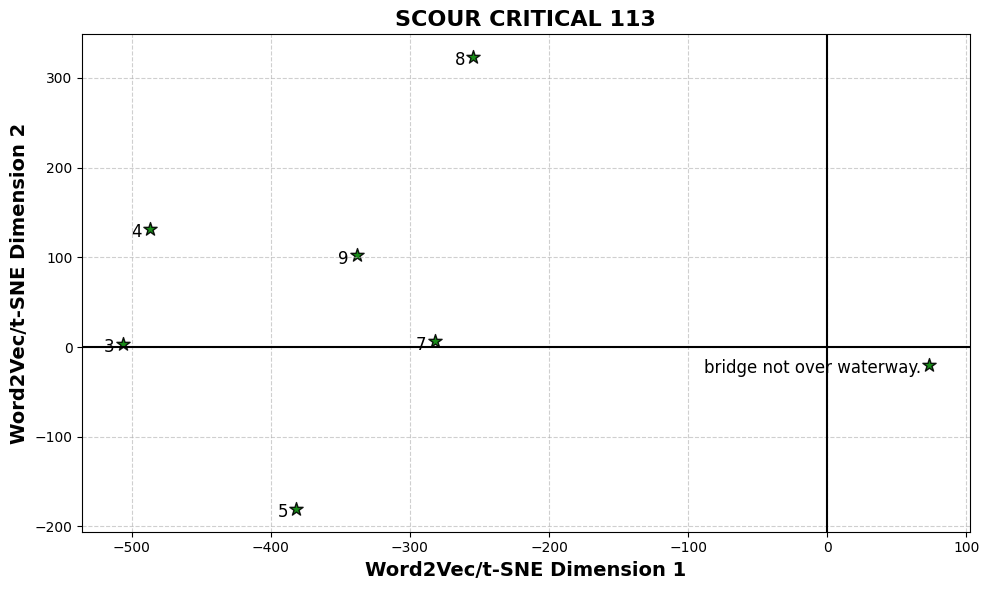

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Load saved t-SNE results
df_tsne = pd.read_csv("tsne_service_level_embeddings.csv")

# Average t-SNE coordinates by label
df_avg = df_tsne.groupby('label').agg({'x': 'mean', 'y': 'mean'}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_avg['x'], df_avg['y'], c='green', s=100, edgecolors='black', alpha=0.9, marker='*')

# Annotate each label
for _, row in df_avg.iterrows():
    label = row['label']

    # Optional: wrap long labels
    wrapped_label = textwrap.fill(label, width=25)

    # Shift just certain labels to the left
    if label in ['slab design', 'single or spread box beams or girders', 'girder and floorbeam system']:  # Replace with actual values
        xytext = (5, 5)  # Shift LEFT
        ha = 'left'
    elif label in ['city street']:  # Replace with actual values
        xytext = (70, -6)  # Shift LEFT
        ha = 'right'
    elif label in ['federal lands road']:  # Replace with actual values
        xytext = (10, -6)  # Shift LEFT
        ha = 'left'
    elif label in ['other (include toll roads not otherwise indicated or identified above)']:  # Replace with actual values
        xytext = (5, -46)  # Shift LEFT
        ha = 'left'
    else:
        xytext = (-6, -6)  # Default offset
        ha = 'right'
    plt.annotate(
        wrapped_label,
        (row['x'], row['y']),
        textcoords="offset points",
        xytext=xytext,
        fontsize=12,
        ha=ha
    )

# Styling
plt.axhline(y=0, color='black', linewidth=1.5, linestyle='-')
plt.axvline(x=0, color='black', linewidth=1.5, linestyle='-')
plt.title("SCOUR CRITICAL 113", fontsize=16, fontweight='bold')
plt.xlabel("Word2Vec/t-SNE Dimension 1", fontsize=14, fontweight='bold')
plt.ylabel("Word2Vec/t-SNE Dimension 2", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 🧮 DataFrame: `top9_df_emb`

`top9_df_emb` represents the primary working DataFrame containing text-based and categorical bridge inspection attributes prepared for embedding and feature engineering.



In [ ]:
top9_df_emb

,STRUCTURE_ID,SUPPORT_TYPE,SPACING_PITCH_IN,COLUMNS_PILES_PER_BENT,COLUMNS_PILES_0_1,CLEAR_HEIGHT_FT,B_LONG_IN,B_TRANS_IN,L_H_LONG,L_H_TRANS,L_H_MIN,LRR,TRR,Z_KNOWN,CD_MIN,CRITICAL_TRUTH_0_1,OBJECT_INTERSECTED,DECK_WIDTH_MT_052,HORR_CLR_MT_047,YEAR_BUILT_027,KILOPOINT_011,IMP_LEN_MT_076,DEGREES_SKEW_034,MAX_SPAN_LEN_MT_048,STRUCTURE_TYPE_043B,LAT_UND_MT_055B,FUTURE_ADT_114,LAT,STRUCTURE_KIND_043A,VERT_CLR_UND_054B,TRAFFIC_LANES_UND_028B,LONG,SERVICE_UND_042B,TOTAL_IMP_COST_096,UNDCLRENCE_EVAL_069,DECK_GEOMETRY_EVAL_068,OPERATING_RATING_064,SCOUR_CRITICAL_113,DETOUR_KILOS_019,BRIDGE_CONDITION,RIGHT_CURB_MT_050B,DATE_OF_INSPECT_090,YEAR_RECONSTRUCTED_106,STRUCTURE_FLARED_035,PERCENT_ADT_TRUCK_109,LEFT_LAT_UND_MT_056,MAIN_UNIT_SPANS_045
DATABASE_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0019133A,RectCol-Spiral,6.0,4.0,1.0,19.20,54.0,54.0,4.266667,4.266667,4.266667,0.0155,0.0077,2.0,1.594858,0,Overpass,26.2,17.4,2020,0.001,159.1,4,48.2,Stringer/multi-beam or girder,3.4,23709,47.118583,Prestressed concrete continuous.,5.54,8,-122.557083,Highway-railroad,13781,Somewhat better than minimum adequacy to toler...,Basically intolerable requiring high priority ...,47.3,Bridge not over waterway.,5,Good condition - some minor problems.,4.3,320,0,1,2,2.4,4
2,0019133D,RectCol-Spiral,4.0,2.0,1.0,24.60,48.0,48.0,6.150000,6.150000,6.150000,0.0140,0.0096,2.0,2.953873,0,Overpass,14.0,8.5,2020,0.016,104.9,0,46.9,Stringer/multi-beam or girder,3.4,19153,47.127006,Prestressed concrete continuous.,5.82,8,-122.544067,Highway-railroad,3578,Somewhat better than minimum adequacy to toler...,Meets minimum tolerable limits to be left in p...,52.5,Bridge not over waterway.,5,Good condition - some minor problems.,0.0,1220,0,1,1,4.6,3
7,0005582A,CircCol,12.0,4.0,1.0,34.40,36.0,36.0,11.466667,11.466667,11.466667,0.0123,0.0020,2.0,2.799066,0,Overpass,19.2,16.2,1958,0.080,89.6,39,26.8,Multiple box beams or girders,2.4,21372,47.147558,Concrete continuous.,4.52,8,-122.504419,"Highway, with or without pedestrian",6468,Basically intolerable requiring high priority ...,Meets minimum tolerable limits to be left in p...,79.8,Bridge not over waterway.,3,Fair condition - all primary structural elemen...,0.8,1121,0,0,5,1.5,4
8,0005523C,CircCol,12.0,1.0,0.0,18.00,60.0,60.0,3.600000,3.600000,3.600000,0.0099,0.0011,1.0,1.863090,0,Overpass,10.4,7.9,1957,0.177,96.6,0,27.7,Multiple box beams or girders,3.1,4420,47.150581,Concrete continuous.,4.50,8,-122.499178,"Highway, with or without pedestrian",3550,Basically intolerable requiring high priority ...,Basically intolerable requiring high priority ...,57.0,Bridge not over waterway.,5,Fair condition - all primary structural elemen...,0.6,1121,0,0,1,1.7,4
9,0005651A,CircCol,12.0,1.0,0.0,25.20,72.0,72.0,4.200000,4.200000,4.200000,0.0092,0.0010,1.0,2.294276,0,Overpass,12.2,8.5,1958,14.886,86.3,0,41.5,Multiple box beams or girders,3.4,19158,47.159764,Concrete continuous.,4.34,9,-122.483589,"Highway, with or without pedestrian",4754,Basically intolerable requiring high priority ...,Meets minimum tolerable limits to be left in p...,29.5,Bridge not over waterway.,6,Fair condition - all primary structural elemen...,1.4,1120,0,0,6,1.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,0014567C,CircCol,4.0,2.0,1.0,8.10,48.0,48.0,2.025000,2.025000,2.025000,0.0172,0.0077,2.0,0.682121,1,Terrain,12.1,11.4,1995,31.849,64.0,0,31.4,Stringer/multi-beam or girder,0.0,23413,47.431222,Prestressed concrete continuous.,0.00,0,-121.985778,Waterway,3360,Not applicable,Equal to present minimum criteria,64.4,8,5,Good condition - some minor problems.,0.0,320,0,0,16,0.0,2
847,0014354A,CircCol,4.0,4.0,1.0,25.31,36.0,36.0,8.436667,8.436667,8.436667,0.0118,0.0067,2.0,3.792290,0,Underpass,14.3,13.4,1995,10.316,93.0,40,22.3,Stringer/multi-beam or girder,2.1,39584,47.300139,Prestressed concrete continuous.,7.49

### ⚙️ **Filtered Word2Vec Embedding Visualization by Column Group**

Generates a 2D scatter plot of Word2Vec embeddings after filtering out invalid or missing entries in the column `COLUMNS_PILES_PER_BENT`. Each point represents an encoded data entry, color-coded and annotated by class label.

---

#### 🧩 **Workflow Summary**

1. **Data Filtering**

   * Identifies valid data points by excluding empty strings, `'0.0'` entries, and rows with NaN values in the target column.

2. **Abort Condition**

   * Skips plotting entirely if no valid samples remain after filtering.

3. **Data Preparation**

   * Extracts filtered embeddings, class labels, and text annotations.
   * Standardizes the embeddings using `StandardScaler` for better spatial normalization.

4. **Scatter Plot Generation**

   * Plots scaled embeddings with colors corresponding to encoded class values.
   * Uses `viridis` colormap and consistent normalization across classes.

5. **Annotations and Legend**

   * Adds text labels beside each plotted point for readability.
   * Builds a manual legend that maps each unique encoded label to its class name (`label_mapping`).

6. **Styling and Layout**

   * Customizes axis labels, font weights, and figure layout for clarity.
   * Renders the plot with proper spacing and bold labeling.

---

#### 🧾 **Outputs**

Displays a scatter plot showing 2D Word2Vec embeddings, with:

* Points colored by `COLUMNS_PILES_PER_BENT` category
* Text annotations for each data entry
* A manual legend mapping color to class label


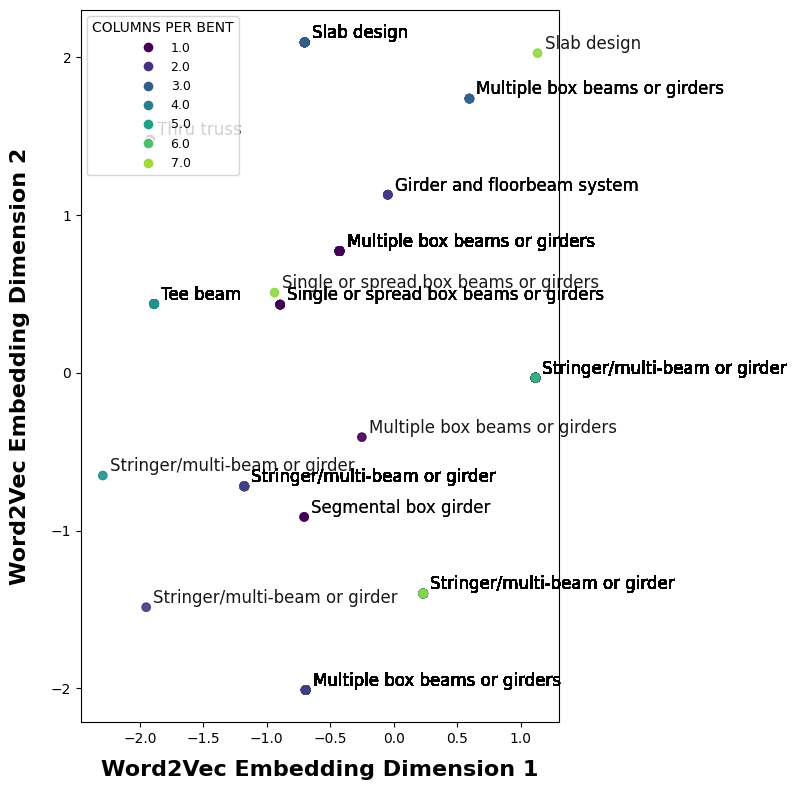

In [ ]:
# Filter valid points (skip empty or '0.0' entries and NaNs in label column)
valid_indices = [
    j for j, txt in enumerate(text_labels)
    if txt and txt != '0.0' and not pd.isna(top9_df_emb["COLUMNS_PILES_PER_BENT"].iloc[j])
]

# Abort plot if no valid data
if len(valid_indices) == 0:
    print("❌ No valid data points to plot. Skipping.")
else:
    # Proceed as normal
    filtered_embeddings = embeddings[valid_indices]
    filtered_labels = [object_labels_encoded[j] for j in valid_indices]
    filtered_text_labels = [text_labels[j] for j in valid_indices]

    # Scale the embeddings
    scaler = StandardScaler()
    scaled_embeddings = scaler.fit_transform(filtered_embeddings)

    # Plot
    plt.figure(figsize=(8, 8))
    cmap = plt.cm.viridis
    norm = plt.Normalize(vmin=min(label_mapping.keys()), vmax=max(label_mapping.keys()))

    scatter = plt.scatter(scaled_embeddings[:, 0], scaled_embeddings[:, 1],
                          c=filtered_labels, cmap=cmap, alpha=0.9)

    # Annotate
    for j, txt in enumerate(filtered_text_labels):
        plt.annotate(txt,
                     (scaled_embeddings[j, 0], scaled_embeddings[j, 1]),
                     xytext=(5, 3), textcoords='offset points',
                     fontsize=12, alpha=.9)

    # Manual legend
    unique_labels = sorted(set(filtered_labels))
    handles = [
        Line2D([0], [0], marker='o', color='w',
               label=label_mapping[lbl],
               markerfacecolor=cmap(norm(lbl)), markersize=8)
        for lbl in unique_labels
    ]
    plt.legend(handles=handles, title="COLUMNS PER BENT", loc="best", fontsize=9)

    # Labels
    plt.xlabel("Word2Vec Embedding Dimension 1", fontsize=16, fontweight='bold', labelpad=10)
    plt.ylabel("Word2Vec Embedding Dimension 2", fontsize=16, fontweight='bold', labelpad=15)

    plt.tight_layout()
    plt.show()


### ⚙️ **Multi-Feature Word2Vec Embedding Visualization Grid**

Generates a 2×2 grid of Word2Vec embedding plots for multiple bridge feature columns, showing how feature embeddings cluster relative to the encoded target variable `OBJECT_INTERSECTED`.

---

#### 🧩 **Workflow Summary**

1. **Function Definition (`plot_word_embeddings`)**

   * Accepts lists of 2D embeddings, encoded labels, subplot titles, and a label mapping.
   * Creates a 2×2 grid of subplots using Matplotlib, one for each feature.
   * Applies a small random jitter to each embedding to reduce overlap between points.
   * Colors each point according to its encoded label using the **Viridis colormap**.

2. **Per-Plot Configuration**

   * Each subplot displays one feature’s 2D embeddings.
   * Adds axis labels (“Embedding Dim 1”, “Embedding Dim 2”) and a colorbar indicating encoded labels.
   * Titles each plot with the corresponding feature name.

3. **Legend Construction**

   * Builds a shared legend using `label_mapping` to map encoded label values to their category names.
   * Assigns each category a corresponding color based on the colormap.
   * Places the legend centered below all subplots for a clean, unified layout.

4. **Execution Section**

   * Defines embedding columns to visualize (e.g., `SERVICE_LEVEL_005C`, `ROUTE_PREFIX_005B`, etc.).
   * Extracts their embedding coordinates (`_embedding_x`, `_embedding_y`) from `top9_emb_w2v`.
   * Encodes `OBJECT_INTERSECTED` into numeric labels with `LabelEncoder`.
   * Reuses the same label set across all four subplots.
   * Calls the plotting function to render the visualization grid.

---

#### 🧾 **Outputs**

Displays a 2×2 grid of scatter plots showing:

* 2D Word2Vec embeddings for four selected bridge attributes
* Color-coded clustering by `OBJECT_INTERSECTED` encoding
* Shared legend mapping encoded labels to their original categories


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

def plot_word_embeddings(embeddings_list, object_labels_list, titles, label_mapping):
    """
    Creates a 2x2 plot of 2D word embeddings with label encoding legend.

    Parameters:
    - embeddings_list: List of (n, 2) arrays containing 2D embeddings.
    - object_labels_list: List of categorical labels for coloring dots.
    - titles: List of subplot titles.
    - label_mapping: Dictionary mapping encoded labels to original categories.
    """

    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()  # Flatten to easily index in a loop
    cmap = plt.cm.viridis  # Use the Viridis colormap

    jitter = np.random.normal(scale=0.05, size=(len(embeddings_list[0]), 2))  # Increased jitter to avoid overlap

    for i, (embeddings, labels, title) in enumerate(zip(embeddings_list, object_labels_list, titles)):
        jittered_embeddings = embeddings + jitter  # Apply jitter
        scatter = axes[i].scatter(jittered_embeddings[:, 0], jittered_embeddings[:, 1], c=labels, cmap=cmap, alpha=0.7, s=50)  # Increased dot size
        axes[i].set_title(title)
        axes[i].set_xlabel("Embedding Dim 1")
        axes[i].set_ylabel("Embedding Dim 2")

        # Create a color bar
        cbar = fig.colorbar(scatter, ax=axes[i])
        cbar.set_label("OBJECT_INTERSECTED (Encoded)")

    # Generate colors for the legend based on label mapping
    norm = plt.Normalize(vmin=min(label_mapping.keys()), vmax=max(label_mapping.keys()))
    legend_colors = [cmap(norm(val)) for val in label_mapping.keys()]

    # Create legend handles
    handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color)
               for color in legend_colors]

    # Create legend labels
    labels = [f"{key}: {value}" for key, value in label_mapping.items()]

    # Add legend to figure
    fig.legend(handles, labels, title="Label Encoding", loc="lower center", ncol=3, fontsize=10, frameon=False)

    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to fit the legend
    plt.show()

# Example usage:

# Define column names for embeddings
embedding_columns = [
    "SERVICE_LEVEL_005C", "SERVICE_UND_042B", "ROUTE_PREFIX_005B", "SCOUR_CRITICAL_113"
]

# Extract embeddings from top9_emb_w2v (each column has _embedding_x and _embedding_y)
embeddings_list = [
    top9_emb_w2v[[f"{col}_embedding_x", f"{col}_embedding_y"]].to_numpy() for col in embedding_columns
]

# Convert 'OBJECT_INTERSECTED' categorical values to numeric labels
label_encoder = LabelEncoder()
object_labels_encoded = label_encoder.fit_transform(top9_emb_w2v["OBJECT_INTERSECTED"])

# Use the same encoded labels for each plot
object_labels_list = [object_labels_encoded for _ in embedding_columns]

# Create a mapping of encoded values to category names
label_mapping = {idx: label for idx, label in enumerate(label_encoder.classes_)}

# Titles for subplots
titles = ["SERVICE_LEVEL_005C", "SERVICE_UND_042B", "ROUTE_PREFIX_005B", "SCOUR_CRITICAL_113"]

# Plot the word embeddings with label encoding legend
plot_word_embeddings(embeddings_list, object_labels_list, titles, label_mapping)


KeyError: "None of [Index(['SERVICE_LEVEL_005C_embedding_x', 'SERVICE_LEVEL_005C_embedding_y'], dtype='object')] are in the [columns]"

### ⚙️ **Multi-Feature Word2Vec Embedding Grid with Text Annotations**

Creates a 2×2 grid of Word2Vec embedding scatter plots for selected bridge attributes, overlaying both encoded color mappings and original text labels to visualize how categorical values cluster in embedding space relative to the target `OBJECT_INTERSECTED`.

---

#### 🧩 **Workflow Summary**

1. **Function Definition (`plot_word_embeddings`)**

   * Accepts lists of 2D embeddings, encoded labels, text labels, subplot titles, and a label-to-text mapping.
   * Generates a 2×2 subplot grid using Matplotlib with the **Viridis** colormap.
   * Each subplot corresponds to a single feature’s embedding projection.

2. **Per-Feature Plotting**

   * Plots 2D embeddings, coloring each point by its encoded label.
   * Adds textual annotations for every point using the original string values (`text_labels`).
   * Adds a colorbar showing label encodings for clarity.

3. **Legend Construction**

   * Normalizes label values to assign consistent colors across subplots.
   * Builds a shared legend that maps numeric encodings to their corresponding category names.
   * Places the legend below all subplots for a unified and balanced layout.

4. **Execution Section**

   * Defines four bridge attributes to visualize (`SERVICE_LEVEL_005C`, `SERVICE_UND_042B`, etc.).
   * Extracts 2D embeddings for each feature from `top9_emb_w2v`.
   * Encodes the categorical target `OBJECT_INTERSECTED` from `top9_df_emb` using `LabelEncoder`.
   * Collects original text values for point annotations and reuses encoded labels for all plots.
   * Invokes the function to render the annotated multi-feature embedding grid.

---

#### 🧾 **Outputs**

Displays a 2×2 grid of scatter plots showing:

* 2D Word2Vec embeddings per selected feature
* Points color-coded by `OBJECT_INTERSECTED` encoding
* Text annotations for original categorical values
* A shared legend mapping label encodings to their actual class names


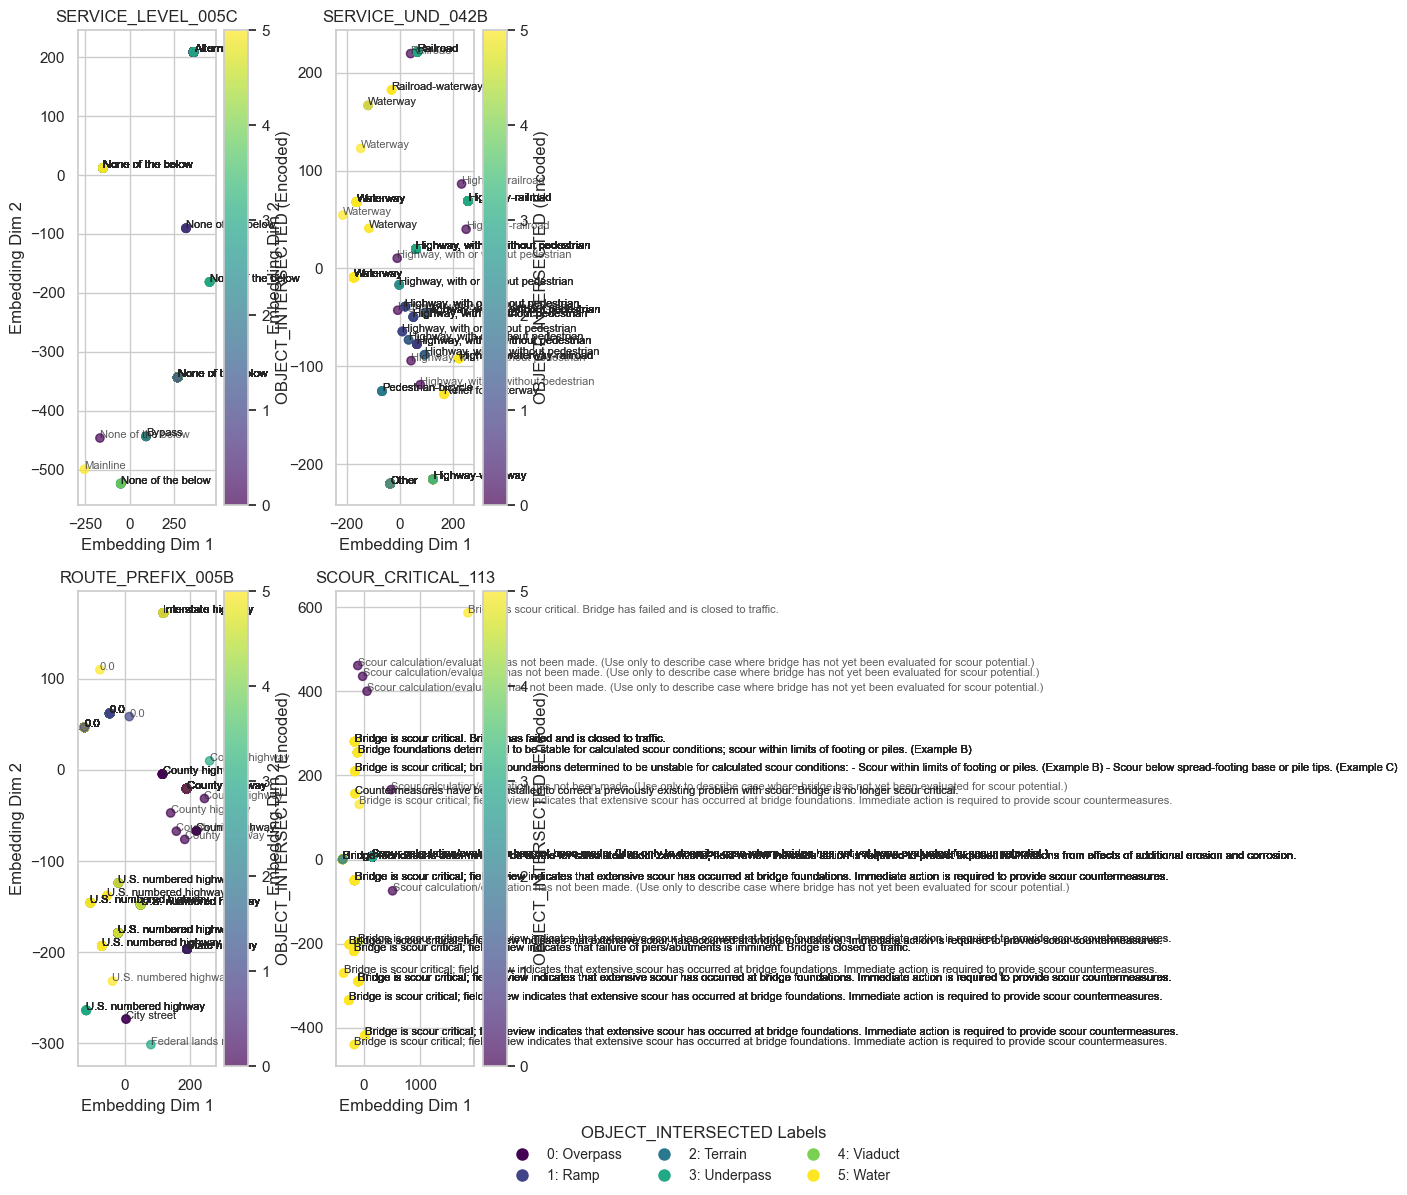

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

def plot_word_embeddings(embeddings_list, object_labels_list, text_labels_list, titles, label_mapping):
    """
    Creates a 2x2 plot of 2D word embeddings with text labels and label encoding legend.

    Parameters:
    - embeddings_list: List of (n, 2) arrays containing 2D embeddings.
    - object_labels_list: List of categorical labels for coloring dots.
    - text_labels_list: List of original text values for each embedding.
    - titles: List of subplot titles.
    - label_mapping: Dictionary mapping encoded labels to original category names.
    """

    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()  # Flatten to easily index in a loop
    cmap = plt.cm.viridis  # Use the Viridis colormap

    for i, (embeddings, labels, text_labels, title) in enumerate(zip(embeddings_list, object_labels_list, text_labels_list, titles)):
        scatter = axes[i].scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap=cmap, alpha=0.7)
        axes[i].set_title(title)
        axes[i].set_xlabel("Embedding Dim 1")
        axes[i].set_ylabel("Embedding Dim 2")

        # Annotate points with their original text labels
        for j, txt in enumerate(text_labels):
            axes[i].annotate(txt, (embeddings[j, 0], embeddings[j, 1]), fontsize=8, alpha=0.75)

        # Create a color bar
        cbar = fig.colorbar(scatter, ax=axes[i])
        cbar.set_label("OBJECT_INTERSECTED (Encoded)")

    # Generate colors for the legend based on label mapping
    norm = plt.Normalize(vmin=min(label_mapping.keys()), vmax=max(label_mapping.keys()))
    legend_colors = [cmap(norm(val)) for val in label_mapping.keys()]

    # Create legend handles with actual text labels
    handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color)
               for color in legend_colors]

    # Create legend labels (original text instead of encoding numbers)
    labels = [f"{key}: {value}" for key, value in label_mapping.items()]

    # Add legend to figure
    fig.legend(handles, labels, title="OBJECT_INTERSECTED Labels", loc="lower center", ncol=3, fontsize=10, frameon=False)

    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to fit the legend
    plt.show()

# Example usage:

# Define column names for embeddings
embedding_columns = [
    "SERVICE_LEVEL_005C", "SERVICE_UND_042B", "ROUTE_PREFIX_005B", "SCOUR_CRITICAL_113"
]

# Extract embeddings from top9_emb_w2v (each column has _embedding_x and _embedding_y)
embeddings_list = [
    top9_emb_w2v[[f"{col}_embedding_x", f"{col}_embedding_y"]].to_numpy() for col in embedding_columns
]

# Convert 'OBJECT_INTERSECTED' categorical values to numeric labels
label_encoder = LabelEncoder()
object_labels_encoded = label_encoder.fit_transform(top9_df_emb["OBJECT_INTERSECTED"])  # Use top9_df_emb

# Extract original text labels for embeddings from top9_df_emb
text_labels_list = [top9_df_emb[col].astype(str).tolist() for col in embedding_columns]

# Use the same encoded labels for each plot
object_labels_list = [object_labels_encoded for _ in embedding_columns]

# Create a mapping of encoded values to the actual text labels
label_mapping = {idx: label for idx, label in enumerate(label_encoder.classes_)}  # Mapping encoded values to text

# Titles for subplots
titles = ["SERVICE_LEVEL_005C", "SERVICE_UND_042B", "ROUTE_PREFIX_005B", "SCOUR_CRITICAL_113"]

# Plot the word embeddings with text labels in the scatter plots
plot_word_embeddings(embeddings_list, object_labels_list, text_labels_list,
                     titles, label_mapping)


### ⚙️ **Stacked Word2Vec Embedding Visualization with Text Labels**

Generates a vertically stacked series of Word2Vec embedding scatter plots for selected bridge features, each annotated with text labels and color-coded by the encoded target variable `OBJECT_INTERSECTED`.

---

#### 🧩 **Workflow Summary**

1. **Function Definition (`plot_word_embeddings`)**

   * Accepts embedding arrays, encoded label arrays, original text labels, subplot titles, and a label mapping.
   * Creates a vertically stacked layout where each subplot corresponds to one feature’s embedding space.
   * Uses the **Viridis** colormap for consistent color encoding across all features.

2. **Per-Feature Plot Rendering**

   * Plots 2D embeddings and colors points by their encoded label values.
   * Annotates each point with its original text label to show semantic grouping.
   * Adds a colorbar to each subplot labeled “OBJECT_INTERSECTED (Encoded)” for interpretability.

3. **Legend Construction**

   * Generates a unified legend mapping numeric encodings to their actual category names.
   * Assigns consistent colors based on the shared colormap.
   * Positions the legend below all subplots with a multi-column layout for readability.

4. **Execution Section**

   * Defines four key bridge attributes for visualization (`SERVICE_LEVEL_005C`, `SERVICE_UND_042B`, etc.).
   * Extracts 2D embeddings (`_embedding_x`, `_embedding_y`) for each attribute from `top9_emb_w2v`.
   * Encodes the categorical target `OBJECT_INTERSECTED` from `top9_df_emb` via `LabelEncoder`.
   * Gathers original categorical text values for annotation and calls the plotting function.

---

#### 🧾 **Outputs**

Displays four vertically stacked scatter plots showing:

* 2D Word2Vec embeddings per selected feature
* Points color-coded by `OBJECT_INTERSECTED` encoding
* Text annotations for original values
* Shared legend mapping encoded categories to their corresponding class names



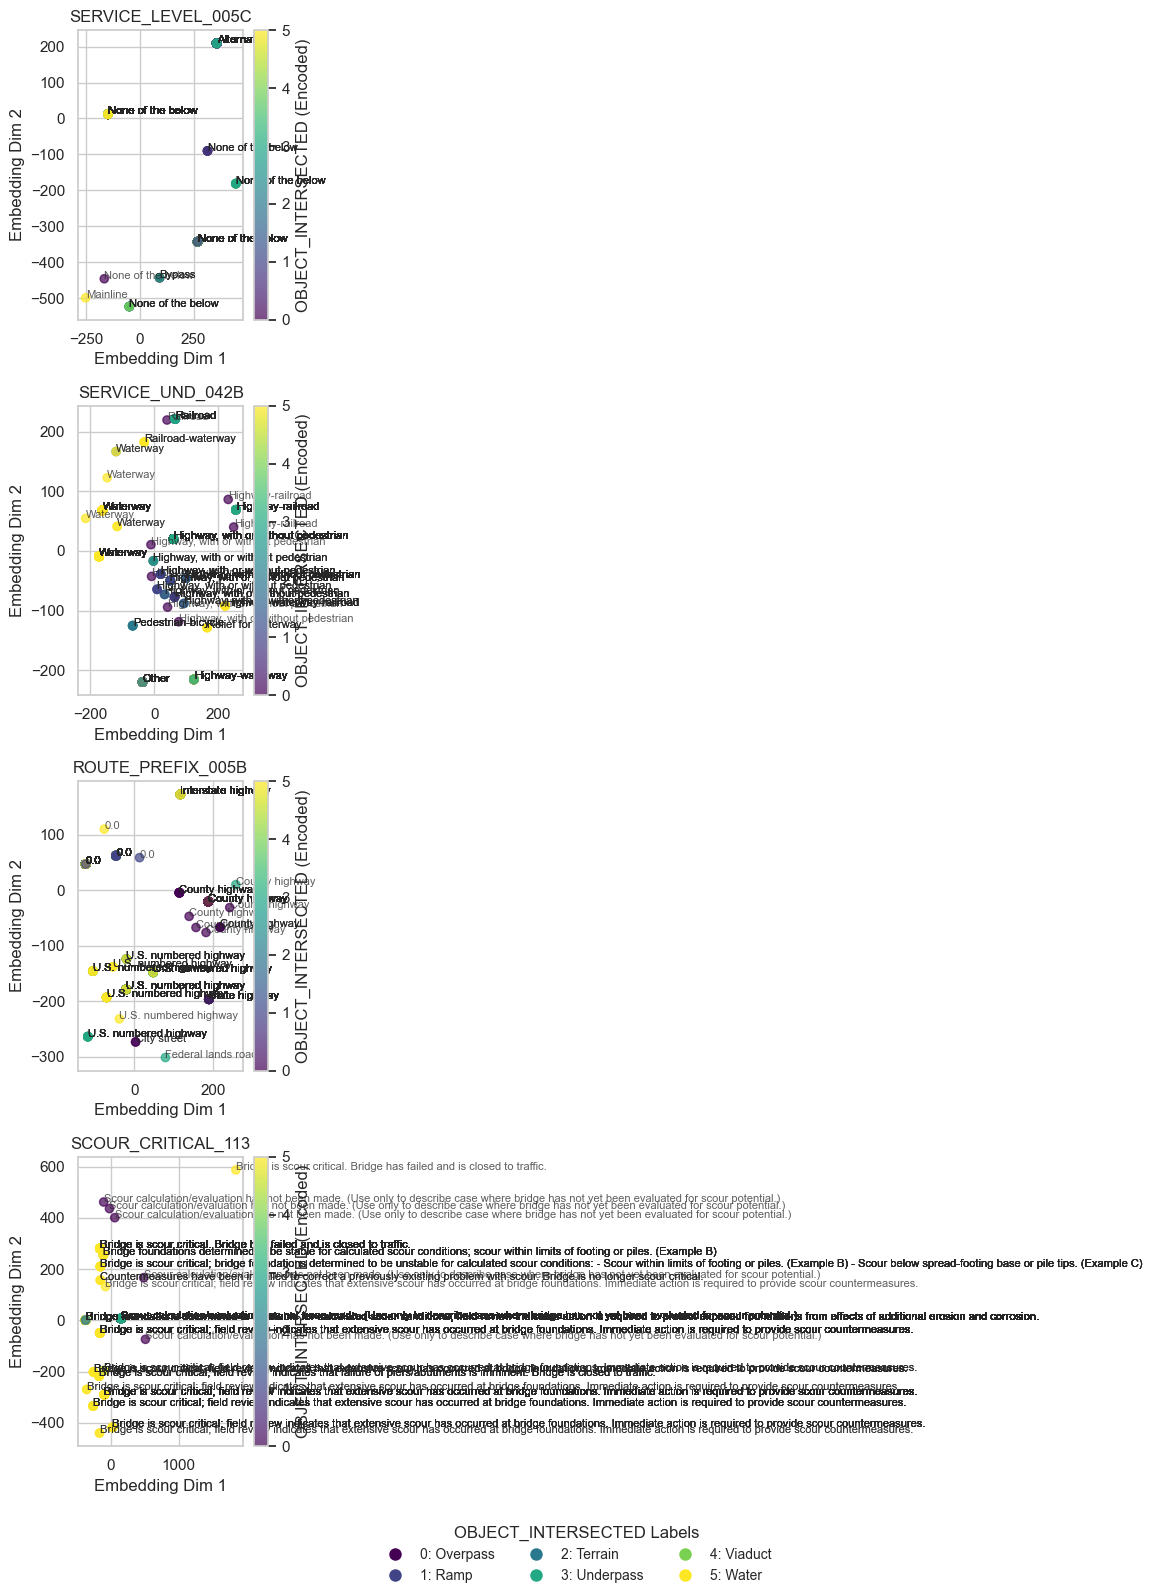

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

def plot_word_embeddings(embeddings_list, object_labels_list, text_labels_list, titles, label_mapping):
    """
    Creates a stacked plot of 2D word embeddings with text labels and label encoding legend.

    Parameters:
    - embeddings_list: List of (n, 2) arrays containing 2D embeddings.
    - object_labels_list: List of categorical labels for coloring dots.
    - text_labels_list: List of original text values for each embedding.
    - titles: List of subplot titles.
    - label_mapping: Dictionary mapping encoded labels to original category names.
    """

    fig, axes = plt.subplots(len(embeddings_list), 1, figsize=(8, 16))  # Stack plots vertically
    cmap = plt.cm.viridis  # Use the Viridis colormap

    for i, (embeddings, labels, text_labels, title) in enumerate(zip(embeddings_list, object_labels_list, text_labels_list, titles)):
        scatter = axes[i].scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap=cmap, alpha=0.7)
        axes[i].set_title(title)
        axes[i].set_xlabel("Embedding Dim 1")
        axes[i].set_ylabel("Embedding Dim 2")

        # Annotate points with their original text labels
        for j, txt in enumerate(text_labels):
            axes[i].annotate(txt, (embeddings[j, 0], embeddings[j, 1]), fontsize=8, alpha=0.75)

        # Create a color bar
        cbar = fig.colorbar(scatter, ax=axes[i])
        cbar.set_label("OBJECT_INTERSECTED (Encoded)")

    # Generate colors for the legend based on label mapping
    norm = plt.Normalize(vmin=min(label_mapping.keys()), vmax=max(label_mapping.keys()))
    legend_colors = [cmap(norm(val)) for val in label_mapping.keys()]

    # Create legend handles with actual text labels
    handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color)
               for color in legend_colors]

    # Create legend labels (original text instead of encoding numbers)
    labels = [f"{key}: {value}" for key, value in label_mapping.items()]

    # Add legend to figure
    fig.legend(handles, labels, title="OBJECT_INTERSECTED Labels", loc="lower center", ncol=3, fontsize=10, frameon=False)

    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to fit the legend
    plt.show()

# Example usage:

# Define column names for embeddings
embedding_columns = [
    "SERVICE_LEVEL_005C", "SERVICE_UND_042B", "ROUTE_PREFIX_005B", "SCOUR_CRITICAL_113"
]

# Extract embeddings from top9_emb_w2v (each column has _embedding_x and _embedding_y)
embeddings_list = [
    top9_emb_w2v[[f"{col}_embedding_x", f"{col}_embedding_y"]].to_numpy() for col in embedding_columns
]

# Convert 'OBJECT_INTERSECTED' categorical values to numeric labels
label_encoder = LabelEncoder()
object_labels_encoded = label_encoder.fit_transform(top9_df_emb["OBJECT_INTERSECTED"])  # Use top9_df_emb

# Extract original text labels for embeddings from top9_df_emb
text_labels_list = [top9_df_emb[col].astype(str).tolist() for col in embedding_columns]

# Use the same encoded labels for each plot
object_labels_list = [object_labels_encoded for _ in embedding_columns]

# Create a mapping of encoded values to the actual text labels
label_mapping = {idx: label for idx, label in enumerate(label_encoder.classes_)}  # Mapping encoded values to text

# Titles for subplots
titles = ["SERVICE_LEVEL_005C", "SERVICE_UND_042B", "ROUTE_PREFIX_005B", "SCOUR_CRITICAL_113"]

# Plot the word embeddings with text labels in the scatter plots
plot_word_embeddings(embeddings_list, object_labels_list, text_labels_list, titles, label_mapping)


### 🧩 Missing

### ⚙️ **Automated Multi-Seed Model Optimization for Bridge Feature Classification**

Performs repeated XGBoost-based classification experiments to predict `OBJECT_INTERSECTED`, applying automated hyperparameter optimization, label encoding, and multi-seed evaluation for robust performance assessment.

---

#### 🧩 **Workflow Summary**

1. **Feature Setup**

   * Defines the prediction target (`OBJECT_INTERSECTED`) and a list of excluded columns to prevent data leakage.
   * Ensures model input uses only valid feature columns from the encoded dataset `top9_df_enc`.

2. **Model Configuration**

   * Uses **XGBoost Classifier (`XGBClassifier`)** for multiclass classification.
   * Applies a two-phase tuning approach:

     * **RandomizedSearchCV** explores broad parameter ranges (depth, estimators, learning rate).
     * **GridSearchCV** refines around the top random search results.
   * Both searches use 5-fold cross-validation and `accuracy` as the scoring metric.

3. **Evaluation Function (`evaluate_models`)**

   * Trains and validates the tuned model for each feature split.
   * Computes **Accuracy**, **Weighted F1**, and **ROC AUC (OVR)**.
   * Handles cases where test subsets lack some classes by skipping AUC computation gracefully.

4. **Iterative Multi-Seed Evaluation**

   * Runs the training–testing cycle across 10 random seeds for stability (`[21, 42, 14, 1, 12, 23, 84, 96, 100, 55]`).
   * Creates test subsets (up to 100 samples) and uses the remainder for training.
   * Encodes target labels with `LabelEncoder` for compatibility with XGBoost.

5. **Results Aggregation**

   * Appends all results into `overall_results`, logging best parameters and key metrics for each seed and run.

---

#### 🧾 **Outputs**

Displays a consolidated `overall_results` DataFrame containing:

* Tuned hyperparameters for each model
* Accuracy, F1 Score, and ROC AUC (if available)
* Associated target variable and random seed


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            # Adjust for missing classes in test set
            all_classes = np.arange(len(np.unique(y_train)))
            try:
                roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test),
                                        multi_class='ovr', labels=all_classes)
            except ValueError:
                print(f"Skipping ROC AUC calculation for {model_name} due to missing classes in y_test")
                roc_auc = None

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    complete_rows = top9_df_enc.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df_enc[~top9_df_enc.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded)
        result['Target'] = target
        result['Random State'] = random_state
        overall_results = pd.concat([overall_results, result])

print(overall_results)


Using random state: 21
Processing target: OBJECT_INTERSECTED
Using random state: 42
Processing target: OBJECT_INTERSECTED
Using random state: 14
Processing target: OBJECT_INTERSECTED
Using random state: 1
Processing target: OBJECT_INTERSECTED
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 12
Processing target: OBJECT_INTERSECTED
Using random state: 23
Processing target: OBJECT_INTERSECTED
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 84
Processing target: OBJECT_INTERSECTED
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 96
Processing target: OBJECT_INTERSECTED
Skipping ROC AUC calculation for XGBClassifier due to missing classes in y_test
Using random state: 100
Processing target: OBJECT_INTERSECTED
Using random state: 55
Processing target: OBJECT_INTERSECTED
Skipping ROC AUC calculation for XGBClassifier due to missing classes 

### 🧠 **XGBoost Multiclass Classifier with Multi-Stage Optimization**

This block implements a **robust classification framework** for predicting `OBJECT_INTERSECTED` using a **two-stage hyperparameter tuning pipeline** with **XGBoost**, iterated across multiple random seeds for statistical confidence.

---

#### 🧩 **Workflow Summary**

1. **Feature and Target Setup**

   * Uses `top9_df_enc`, a pre-encoded structural dataset.
   * Target variable: `OBJECT_INTERSECTED` (categorical).
   * Excludes redundant or derived predictors such as geometric or support-type variables.

2. **Model and Search Space**

   * Core model: `XGBClassifier(eval_metric='mlogloss')`.
   * RandomizedSearchCV explores **broad distributions** of:

     * `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`, and `gamma`.
   * GridSearchCV then **refines** around the best-performing hyperparameter set from the random phase.

3. **Evaluation Metrics**

   * **Accuracy** — proportion of correct classifications.
   * **Weighted F1 Score** — handles class imbalance by weighting per-class contributions.
   * **ROC AUC (OVR)** — evaluates separability in one-vs-rest fashion for multiclass outcomes.

4. **Cross-Validation Strategy**

   * Executes 10 randomized runs across different `random_state` values.
   * Each run uses a **train/test split (n≤100 test)** with NaN-filtered subsets.
   * Repeats model optimization and evaluation for reproducibility.

5. **Statistical Aggregation**

   * Computes the **mean and standard error** for Accuracy, F1, and ROC AUC across all runs.
   * Produces a final summary table (`overall_results`) logging per-state metrics and hyperparameters.

---

#### 🧾 Output Summary

The final console output reports:

* **Average Accuracy, F1 Score, ROC AUC** across 10 runs.
* **Standard errors** for each to quantify stability.
* A detailed `overall_results` DataFrame listing results per random state.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr', labels=np.unique(y_train))


            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame(index=top9_df_enc.index)
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    # Ensure no missing values for critical columns
    complete_rows = top9_df_enc.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df_enc[~top9_df_enc.index.isin(test_set.index)]

    # Define features for analysis
    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        # Drop NaN values from training and testing subsets
        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        print(f"Training shape for target '{target}': {X_train.shape}")

        # Encode labels
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        # Run model evaluation
        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded)
        result['Target'] = target
        result['Random State'] = random_state

        # Append results
        overall_results = pd.concat([overall_results, result])

# Compute the overall average Accuracy, F1 Score, ROC AUC, and Standard Error
average_accuracy = overall_results['Accuracy'].mean()
average_f1_score = overall_results['F1 Score'].mean()
average_roc_auc = overall_results['ROC AUC'].mean()
standard_error = overall_results['Accuracy'].std() / np.sqrt(len(random_states))
standard_error_roc_auc = overall_results['ROC AUC'].std() / np.sqrt(len(random_states))

print(f"Average Accuracy: {average_accuracy}")
print(f"Average F1 Score: {average_f1_score}")
print(f"Average ROC AUC: {average_roc_auc}")
print(f"Standard Error: {standard_error}")
print(f"Standard Error of ROC AUC: {standard_error_roc_auc}")

# Output results
print(overall_results)

Using random state: 21
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 42
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 14
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 1
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Error evaluating model XGBClassifier: Only one class present in y_true. ROC AUC score is not defined in that case.
Using random state: 12
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 23
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Error evaluating model XGBClassifier: Only one class present in y_true. ROC AUC score is not defined in that case.
Using random state: 84
Processing target: OBJECT_INTERSECTED
Tr

### ⚙️ Multi-Class Bridge Feature Classification Using XGBoost

This script executes a **multi-state hyperparameter optimization and evaluation pipeline** to predict the categorical variable `OBJECT_INTERSECTED` from the encoded bridge feature dataset `top9_df_enc`.

---

#### 🧩 **Pipeline Summary**

**1. Target and Feature Handling**

* The target variable: `OBJECT_INTERSECTED`
* Unused or confounding variables are explicitly removed via `exclude_features`.
* The script ensures training/test splits are drawn only from **complete, non-missing rows**.

**2. Model Definition**

* Uses **XGBoost Classifier (`XGBClassifier`)** with `mlogloss` for multi-class classification.
* Two-stage tuning strategy:

  * **RandomizedSearchCV** explores 30 random hyperparameter combinations.
  * **GridSearchCV** performs fine-tuning around the best combination.
* Hyperparameters tuned include `max_depth`, `n_estimators`, `learning_rate`, and sampling ratios (`subsample`, `colsample_bytree`, etc.).

**3. Evaluation Metrics**
For each random seed and model run:

* **Accuracy** – Correct classification ratio.
* **Weighted F1 Score** – Balances precision and recall across all classes.
* **ROC AUC (OVR)** – One-vs-Rest area under ROC curve for multiclass evaluation.

**4. Random-State Repeats**

* Evaluated across **10 random states** (`[21, 42, 14, 1, 12, 23, 84, 96, 100, 55]`)
  to test stability and reduce sample-split variance.

**5. Results Aggregation**

* Stores all metrics per run in `overall_results`.
* Computes:

  * Mean Accuracy
  * Mean F1 Score
  * Mean ROC AUC
  * Standard Error (Accuracy & ROC AUC)

---

#### 🧾 **Outputs**

At completion, the script prints:

```
Average Accuracy
Average F1 Score
Average ROC AUC
Standard Error (Accuracy)
Standard Error (ROC AUC)
```

followed by a detailed per-state and per-model `overall_results` DataFrame containing tuned parameters and evaluation scores.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint

# Define the initial DataFrame
df = top9_df_enc

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame(index=df.index)
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    # Ensure no missing values for critical columns
    complete_rows = df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = df[~df.index.isin(test_set.index)]

    # Define features for analysis
    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        # Drop NaN values from training and testing subsets
        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        print(f"Training shape for target '{target}': {X_train.shape}")

        # Encode labels
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        # Run model evaluation
        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded)
        result['Target'] = target
        result['Random State'] = random_state

        # Append results
        overall_results = pd.concat([overall_results, result])

# Compute the overall average Accuracy, F1 Score, ROC AUC, and Standard Error
average_accuracy = overall_results['Accuracy'].mean()
average_f1_score = overall_results['F1 Score'].mean()
average_roc_auc = overall_results['ROC AUC'].mean()
standard_error = overall_results['Accuracy'].std() / np.sqrt(len(random_states))
standard_error_roc_auc = overall_results['ROC AUC'].std() / np.sqrt(len(random_states))

print(f"Average Accuracy: {average_accuracy}")
print(f"Average F1 Score: {average_f1_score}")
print(f"Average ROC AUC: {average_roc_auc}")
print(f"Standard Error: {standard_error}")
print(f"Standard Error of ROC AUC: {standard_error_roc_auc}")

# Output results
print(overall_results)

### ⚙️ **Comprehensive XGBoost Classification Pipeline for Bridge Dataset**

Executes a full multi-seed classification workflow using XGBoost to predict `OBJECT_INTERSECTED`, performing two-stage hyperparameter optimization and repeated evaluation to ensure robust generalization across random data splits.

---

#### 🧩 **Workflow Summary**

1. **Dataset and Feature Setup**

   * Uses `top9_df_enc` as the working DataFrame.
   * Defines `OBJECT_INTERSECTED` as the target variable.
   * Excludes identifier and leakage-prone columns listed in `exclude_features`.
   * Ensures all rows used have complete data for required columns.

2. **Model Definition and Search Spaces**

   * Implements an **XGBoost Classifier** optimized for multiclass classification.
   * Defines randomized parameter distributions for broad exploration (`n_estimators`, `max_depth`, `learning_rate`, etc.).
   * Specifies narrower grids for fine-tuning around the best results found via random search.

3. **Evaluation Function (`evaluate_models`)**

   * Performs two sequential tuning phases:

     * **RandomizedSearchCV** (30 iterations, 5-fold CV) for broad parameter sampling.
     * **GridSearchCV** (5-fold CV) for focused local optimization.
   * Trains the best model and evaluates performance on test data using:

     * **Accuracy**, **Weighted F1 Score**, and **ROC AUC (One-vs-Rest)**.
   * Returns a summary DataFrame with best parameters and metrics for each run.

4. **Multi-Seed Evaluation Loop**

   * Repeats training and evaluation across 10 random seeds for stability (`[21, 42, 14, 1, 12, 23, 84, 96, 100, 55]`).
   * Randomly samples up to 100 rows per seed for testing, with the rest used for training.
   * Encodes categorical target values using `LabelEncoder` to ensure model compatibility.
   * Aggregates all run results into a combined DataFrame `overall_results`.

5. **Performance Aggregation**

   * Calculates the average **Accuracy**, **F1 Score**, and **ROC AUC** across all runs.
   * Computes standard errors for both Accuracy and ROC AUC to measure cross-run consistency.
   * Prints overall summary statistics and displays the complete `overall_results` table.

---

#### 🧾 **Outputs**

Prints:

```
Average Accuracy
Average F1 Score
Average ROC AUC
Standard Error (Accuracy)
Standard Error (ROC AUC)
```

and displays `overall_results`, which includes:

* Best hyperparameters from grid search
* Accuracy, F1, and ROC AUC for each random seed
* Target name and random state identifiers


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint

# Define the initial DataFrame
df = top9_df_enc

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame(index=df.index)
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    # Ensure no missing values for critical columns
    complete_rows = df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = df[~df.index.isin(test_set.index)]

    # Define features for analysis
    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        # Drop NaN values from training and testing subsets
        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        print(f"Training shape for target '{target}': {X_train.shape}")

        # Encode labels
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        # Run model evaluation
        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded)
        result['Target'] = target
        result['Random State'] = random_state

        # Append results
        overall_results = pd.concat([overall_results, result])

# Compute the overall average Accuracy, F1 Score, ROC AUC, and Standard Error
average_accuracy = overall_results['Accuracy'].mean()
average_f1_score = overall_results['F1 Score'].mean()
average_roc_auc = overall_results['ROC AUC'].mean()
standard_error = overall_results['Accuracy'].std() / np.sqrt(len(random_states))
standard_error_roc_auc = overall_results['ROC AUC'].std() / np.sqrt(len(random_states))

print(f"Average Accuracy: {average_accuracy}")
print(f"Average F1 Score: {average_f1_score}")
print(f"Average ROC AUC: {average_roc_auc}")
print(f"Standard Error: {standard_error}")
print(f"Standard Error of ROC AUC: {standard_error_roc_auc}")

# Output results
print(overall_results)

Using random state: 21
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 42
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 14
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 1
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Error evaluating model XGBClassifier: Number of classes in y_true not equal to the number of columns in 'y_score'
Using random state: 12
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 23
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Error evaluating model XGBClassifier: Number of classes in y_true not equal to the number of columns in 'y_score'
Using random state: 84
Processing target: OBJECT_INTERSECTED
Trai

### ⚙️ **Multi-Class Bridge Feature Classification Using XGBoost**

This notebook performs **multi-state model optimization and evaluation** to predict the categorical feature `OBJECT_INTERSECTED` from the encoded bridge dataset `top9_df_enc`.
It applies automated hyperparameter tuning, multi-seed validation, and statistical aggregation to assess model performance reliability.

---

#### 🧩 **Workflow Summary**

1. **Data and Feature Setup**

   * Loads the encoded dataset and identifies the prediction target `OBJECT_INTERSECTED`.
   * Removes identifier and leakage-prone columns via `exclude_features`.
   * Ensures training and testing subsets are derived from complete, non-missing rows.

2. **Model Definition**

   * Configures an **XGBoost Classifier** (`XGBClassifier`) optimized for multi-class tasks.
   * Defines random and grid search parameter ranges, including tree depth, learning rate, and sample ratios.
   * Stores model configuration and search spaces in a single `models` dictionary.

3. **Two-Stage Hyperparameter Optimization**

   * Uses **RandomizedSearchCV** to explore 30 parameter combinations broadly.
   * Refines results with **GridSearchCV** around the best random search configuration.
   * Both use 5-fold cross-validation and accuracy as the selection metric.

4. **Evaluation Function**

   * Trains and tests each tuned model using encoded labels.
   * Calculates **Accuracy**, **Weighted F1 Score**, and **ROC AUC (One-vs-Rest)**.
   * Handles missing classes in test subsets by aligning probability outputs with the label encoder.
   * Returns results in a consolidated DataFrame per model.

5. **Multi-Seed Validation Loop**

   * Runs the full training–evaluation cycle across 10 random seeds
     (`[21, 42, 14, 1, 12, 23, 84, 96, 100, 55]`).
   * Randomly samples up to 100 test rows per run and reuses remaining data for training.
   * Collects all per-run results into `overall_results`.

6. **Statistical Summary**

   * Computes overall mean accuracy, mean F1, mean ROC AUC, and standard errors for both accuracy and ROC AUC.
   * Prints these aggregate metrics to evaluate the model’s consistency across runs.

---

#### 🧾 **Outputs**

At completion, the notebook prints:

```
Standard Error (Accuracy)
Standard Error (ROC AUC)
```

and displays a full `overall_results` DataFrame with:

* Best parameters found per run
* Accuracy, F1 Score, and ROC AUC values
* Associated random state and target variable


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint

# Define the initial DataFrame
df = top9_df_enc

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            num_classes = len(label_encoder.classes_)
            y_proba = best_model.predict_proba(X_test)

            if y_proba.shape[1] != num_classes:
                from sklearn.preprocessing import OneHotEncoder
                y_proba_corrected = np.zeros((y_proba.shape[0], num_classes))
                present_classes = np.unique(y_test_encoded)
                for i, cls in enumerate(present_classes):
                    y_proba_corrected[:, cls] = y_proba[:, i]
                y_proba = y_proba_corrected

            if len(np.unique(y_test_encoded)) > 1:
                roc_auc = roc_auc_score(y_test_encoded, y_proba, multi_class='ovr', labels=np.arange(num_classes))
            else:
                roc_auc = np.nan  # Assign NaN if only one class is present
                print(f"Skipping ROC AUC computation for {model_name} as only one class is present in y_test.")

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame(index=df.index)
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    # Ensure no missing values for critical columns
    complete_rows = df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = df[~df.index.isin(test_set.index)]

    # Define features for analysis
    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        # Drop NaN values from training and testing subsets
        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        print(f"Training shape for target '{target}': {X_train.shape}")

        # Encode labels
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        # Run model evaluation
        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded)
        result['Target'] = target
        result['Random State'] = random_state

        # Append results
        overall_results = pd.concat([overall_results, result])

# Compute standard errors after all results are populated
if not overall_results.empty:
    standard_error = overall_results['Accuracy'].std() / np.sqrt(len(overall_results))
    standard_error_roc_auc = overall_results['ROC AUC'].std() / np.sqrt(len(overall_results))
    print(f"Standard Error (Accuracy): {standard_error}")
    print(f"Standard Error (ROC AUC): {standard_error_roc_auc}")
else:
    print("No results available to compute standard errors.")


Using random state: 21
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 42
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 14
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 1
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Error evaluating model XGBClassifier: Only one class present in y_true. ROC AUC score is not defined in that case.
Using random state: 12
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 23
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Error evaluating model XGBClassifier: Only one class present in y_true. ROC AUC score is not defined in that case.
Using random state: 84
Processing target: OBJECT_INTERSECTED
Tr

### ⚙️ **Robust Multi-Class Classification with Safe Label Handling**

Implements a multi-run XGBoost-based classification workflow for predicting `OBJECT_INTERSECTED`, enhanced with error handling for single-class cases and consistent probability alignment across encoded labels.

---

#### 🧩 **Workflow Summary**

1. **Data Initialization**

   * Loads encoded bridge dataset `top9_df_enc` and identifies target/feature groups.
   * Removes identifiers and confounding features defined in `exclude_features`.

2. **Model Setup**

   * Defines XGBoost with random and grid search hyperparameter spaces.
   * Uses tree depth, estimator count, learning rate, and sampling ratios as tuning variables.

3. **Evaluation Function (`evaluate_models`)**

   * Skips model training when only one class is present in the training data.
   * Performs two-phase tuning: randomized search (30 iterations) followed by fine-tuned grid search.
   * Calculates Accuracy, Weighted F1, and ROC AUC (One-vs-Rest) for multiclass tasks.
   * Corrects probability matrix shapes and avoids AUC computation when only one test class exists.

4. **Repeated Evaluation Across Random States**

   * Runs across 10 random seeds, each sampling a unique test subset (up to 100 rows).
   * Repeats training, encoding, and evaluation for each split and aggregates all results.

5. **Results Aggregation and Summary Statistics**

   * Combines results into a single `overall_results` DataFrame.
   * Computes and prints standard errors for Accuracy and ROC AUC to measure cross-run stability.

---

#### 🧾 **Outputs**

Displays:

```
Standard Error (Accuracy)
Standard Error (ROC AUC)
```

and outputs a detailed `overall_results` DataFrame containing:

* Best-tuned parameters per run
* Accuracy, F1 Score, ROC AUC
* Corresponding random state and target variable


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint

# Define the initial DataFrame
df = top9_df_enc

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    if len(np.unique(y_train)) < 2:
        print("Skipping model evaluation as only one class is present in y_train.")
        return pd.DataFrame()

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            num_classes = len(label_encoder.classes_)
            y_proba = best_model.predict_proba(X_test)

            if len(np.unique(y_test)) > 1:
                roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', labels=np.arange(num_classes))
            else:
                roc_auc = np.nan
                print(f"Skipping ROC AUC computation for {model_name} as only one class is present in y_test.")

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame(index=df.index)
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    # Ensure no missing values for critical columns
    complete_rows = df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = df[~df.index.isin(test_set.index)]

    # Define features for analysis
    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        # Drop NaN values from training and testing subsets
        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        print(f"Training shape for target '{target}': {X_train.shape}")

        # Encode labels
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        # Run model evaluation
        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded)
        if not result.empty:
            result['Target'] = target
            result['Random State'] = random_state
            overall_results = pd.concat([overall_results, result])

# Compute standard errors after all results are populated
if not overall_results.empty:
    standard_error = overall_results['Accuracy'].std() / np.sqrt(len(overall_results))
    standard_error_roc_auc = overall_results['ROC AUC'].std() / np.sqrt(len(overall_results))
    print(f"Standard Error (Accuracy): {standard_error}")
    print(f"Standard Error (ROC AUC): {standard_error_roc_auc}")
else:
    print("No results available to compute standard errors.")


Using random state: 21
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 42
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 14
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 1
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Error evaluating model XGBClassifier: Only one class present in y_true. ROC AUC score is not defined in that case.
Using random state: 12
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 23
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Error evaluating model XGBClassifier: Only one class present in y_true. ROC AUC score is not defined in that case.
Using random state: 84
Processing target: OBJECT_INTERSECTED
Tr

### ⚙️ **Multi-Class Bridge Classification with Corrected Probability Alignment**

Runs a multi-seed XGBoost classification workflow to predict the categorical target `OBJECT_INTERSECTED` while ensuring label-probability consistency and robust error handling during evaluation.

---

#### 🧩 **Workflow Summary**

1. **Dataset Preparation**

   * Loads the encoded dataset `top9_df_enc` and identifies the classification target.
   * Removes non-predictive or confounding columns listed in `exclude_features`.
   * Filters rows to keep only complete data for the key feature `OBJECT_INTERSECTED`.

2. **Model Configuration**

   * Defines XGBoost classifier with parameter spaces for both random and grid search.
   * Randomized search samples broad hyperparameter combinations, while grid search refines around the best results.
   * Focuses tuning on depth, estimator count, learning rate, and subsampling ratios.

3. **Model Evaluation Function**

   * Executes both tuning stages sequentially using 5-fold cross-validation and accuracy scoring.
   * Computes Accuracy, Weighted F1, and multiclass ROC AUC (One-vs-Rest).
   * Adjusts predicted probability outputs to align with encoded label indices when test class counts differ.
   * Handles cases with single-class test sets gracefully by skipping ROC AUC calculation.

4. **Multi-State Validation Loop**

   * Iterates through 10 random seeds to test model stability under varying splits.
   * Samples up to 100 rows for each test set while maintaining training/test separation.
   * Encodes categorical labels per split and aggregates model metrics across runs.

5. **Result Compilation and Statistics**

   * Appends each run’s best parameters and evaluation metrics into `overall_results`.
   * Calculates and prints standard errors for Accuracy and ROC AUC to summarize performance variability.

---

#### 🧾 **Outputs**

Displays:

```
Standard Error (Accuracy)
Standard Error (ROC AUC)
```

and outputs the combined `overall_results` DataFrame containing:

* Tuned hyperparameters for each random state
* Accuracy, F1 Score, and ROC AUC per evaluation run
* Target name and random seed used


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint

# Define the initial DataFrame
df = top9_df_enc

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        # First, RandomizedSearchCV for broad tuning
        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            # Narrow the search with GridSearchCV
            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Evaluate on test data
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            num_classes = len(label_encoder.classes_)
            y_proba = best_model.predict_proba(X_test)

            if y_proba.shape[1] != num_classes:
                from sklearn.preprocessing import OneHotEncoder
                y_proba_corrected = np.zeros((y_proba.shape[0], num_classes))
                present_classes = np.unique(y_test_encoded)
                for i, cls in enumerate(present_classes):
                    y_proba_corrected[:, cls] = y_proba[:, i]
                y_proba = y_proba_corrected

            if len(np.unique(y_test_encoded)) > 1:
                roc_auc = roc_auc_score(y_test_encoded, y_proba, multi_class='ovr', labels=np.arange(num_classes))
            else:
                roc_auc = np.nan  # Assign NaN if only one class is present
                print(f"Skipping ROC AUC computation for {model_name} as only one class is present in y_test.")

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

# Store predictions & results
prediction_results = pd.DataFrame(index=df.index)
overall_results = pd.DataFrame()

# Random states for testing
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")

    # Ensure no missing values for critical columns
    complete_rows = df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = df[~df.index.isin(test_set.index)]

    # Define features for analysis
    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        # Drop NaN values from training and testing subsets
        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        print(f"Training shape for target '{target}': {X_train.shape}")

        # Encode labels
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        # Run model evaluation
        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded)
        result['Target'] = target
        result['Random State'] = random_state

        # Append results
        overall_results = pd.concat([overall_results, result])

# Compute standard errors after all results are populated
if not overall_results.empty:
    standard_error = overall_results['Accuracy'].std() / np.sqrt(len(overall_results))
    standard_error_roc_auc = overall_results['ROC AUC'].std() / np.sqrt(len(overall_results))
    print(f"Standard Error (Accuracy): {standard_error}")
    print(f"Standard Error (ROC AUC): {standard_error_roc_auc}")
else:
    print("No results available to compute standard errors.")


Using random state: 21
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 42
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 14
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 1
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Error evaluating model XGBClassifier: Only one class present in y_true. ROC AUC score is not defined in that case.
Using random state: 12
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Using random state: 23
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 9)
Error evaluating model XGBClassifier: Only one class present in y_true. ROC AUC score is not defined in that case.
Using random state: 84
Processing target: OBJECT_INTERSECTED
Tr

### 🧮 **Encoded Test Labels**

Contains the integer-encoded class labels for the test dataset, transformed from categorical values using `LabelEncoder`.


In [ ]:
y_test_encoded

array([5, 5, 1, 0, 1, 0, 5, 0, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 5, 2, 5, 5,
       5, 1, 5, 0, 5, 1, 1, 0, 5, 0, 5, 1, 5, 1, 1, 3, 5, 3, 1, 0, 1, 1,
       5, 3, 5, 0, 3, 3, 0, 5, 5, 5, 3, 3, 5, 3, 1, 5, 1, 3, 5, 0, 3, 5,
       5, 3, 3, 5, 1, 3, 5, 5, 3, 5, 3, 5, 0, 5, 5, 5, 5, 1, 3, 3, 3, 3,
       0, 5, 5, 0, 3, 0, 1, 0, 3, 0, 5, 1])

### 📊 **Inspect Encoded Class Distribution**

Prints the unique class labels present in both the training and test sets to verify that all expected categories are represented before model evaluation.


In [ ]:
print(f"Classes in y_train: {np.unique(y_train_encoded)}")
print(f"Classes in y_test: {np.unique(y_test_encoded)}")


Classes in y_train: [0 1 2 3 4 5]
Classes in y_test: [0 1 2 3 5]


### 💾 **Save Aggregated Results to CSV**

Renames and exports the full results DataFrame (`Allmin2`) to a local CSV file for external analysis or record-keeping, confirming the save path upon completion.


In [ ]:
Allmin2 = overall_results
del overall_results
local_path = "C:/Users/jlensing/Desktop/Allmin2.csv"  # Adjust for Mac/Linux
Allmin2.to_csv(local_path, index=True)
print(f"File saved to {local_path}")

File saved to C:/Users/jlensing/Desktop/Allmin2.csv


### 💾 **Export Prediction Results**

Saves the final prediction results (`obj_preds_std`) as a CSV file to the specified local path, removing the in-memory DataFrame afterward to free memory.

In [ ]:
obj_preds_std = prediction_results
del prediction_results
local_path = "C:/Users/jlensing/Desktop/obj_preds_std.csv"  # Adjust for Mac/Linux
obj_preds_std.to_csv(local_path, index=True)
print(f"File saved to {local_path}")

File saved to C:/Users/jlensing/Desktop/obj_preds_std.csv


### 🎨 **2D Visualization of Text Embeddings**

Generates scatter plots for all embedding pairs (`_embedding_x`, `_embedding_y`) within the dataset to visualize their 2D spatial distribution.
Each subplot represents one feature’s embedding structure, labeling each data point with its corresponding original text value for interpretability.

---

#### 🧾 **Outputs**

Displays a sequence of labeled scatter plots—one per embedded feature—showing how textual or categorical values are clustered or separated in the t-SNE embedding space.

KeyError: 'SERVICE_LEVEL_005C'

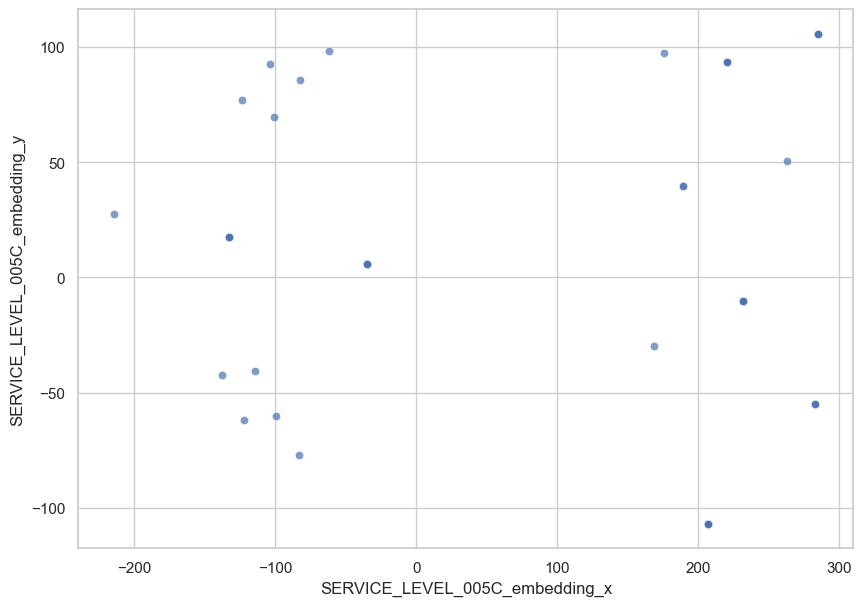

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Extract column names that have embeddings
embedding_columns = [col.replace('_embedding_x', '') for col in top9_df.columns if col.endswith('_embedding_x')]

# Iterate through each column with embeddings
for column in embedding_columns:
    plt.figure(figsize=(10, 7))

    # Scatter plot for the embeddings
    ax = sns.scatterplot(
        x=top9_df[f"{column}_embedding_x"],
        y=top9_df[f"{column}_embedding_y"],
        alpha=0.7  # Adjust transparency
    )

    # Annotate each point with text labels (optional: use the original text column)
    for i in range(len(top9_df)):
        plt.text(
            x=top9_df[f"{column}_embedding_x"].iloc[i],
            y=top9_df[f"{column}_embedding_y"].iloc[i],
            s=str(top9_df[column].iloc[i]),  # Ensure text labels are strings
            fontsize=8, alpha=0.8
        )

    plt.xlabel("Embedding X")
    plt.ylabel("Embedding Y")
    plt.title(f"2D t-SNE Visualization of {column} Embeddings with Labels")
    plt.show()


### 🧱 **Bridge Attribute Codebook Mapping**

Defines a comprehensive mapping dictionary (`descriptions`) that converts coded categorical bridge attributes into human-readable text labels based on official NBI (National Bridge Inventory) standards.
Each sub-dictionary corresponds to a specific attribute column and lists all possible categorical codes with their descriptive meanings.

---

#### 🗂 **Overview of Categorical Groups**

Includes mappings for:

* **Structural and Material Types** — e.g., `STRUCTURE_KIND_043A`, `STRUCTURE_TYPE_043B`, `APPR_KIND_044A/B`.
* **Condition Ratings** — e.g., `DECK_COND_058`, `SUPERSTRUCTURE_COND_059`, `CHANNEL_COND_061`.
* **Evaluations and Load Ratings** — e.g., `STRUCTURAL_EVAL_067`, `POSTING_EVAL_070`, `DESIGN_LOAD_031`.
* **Functional and Service Attributes** — e.g., `SERVICE_ON_042A`, `FUNCTIONAL_CLASS_026`, `ROUTE_PREFIX_005B`.
* **Environmental and Inspection Fields** — e.g., `SCOUR_CRITICAL_113`, `FRACTURE_092A`, `UNDWATER_LOOK_SEE_092B`.
* **Miscellaneous Bridge Metadata** — e.g., `TRAFFIC_DIRECTION_102`, `MEDIAN_CODE_033`, `NAVIGATION_038`.

---

#### 🧾 **Output**

Applies the `descriptions` mappings to all matching columns in `embedding_df`, replacing coded values with descriptive text while preserving any unmapped entries.


In [ ]:
# Mapping our categorical columns here

descriptions = {
    'STRUCTURE_KIND_043A': {
        1: 'Concrete.',
        2: 'Concrete continuous.',
        3: 'Steel.',
        4: 'Steel continuous.',
        5: 'Prestressed concrete.',
        6: 'Prestressed concrete continuous.',
        7: 'Wood or timber.',
        8: 'Masonry.',
        9: 'Aluminum, wrought iron, or cast iron.',
        0: 'Other materials.',
    },
    'STRUCTURE_TYPE_043B': {
        1: 'Slab design',
        2: 'Stringer/multi-beam or girder',
        3: 'Girder and floorbeam system',
        4: 'Tee beam',
        5: 'Multiple box beams or girders',
        6: 'Single or spread box beams or girders',
        7: 'Frame (except frame culverts)',
        8: 'Orthotropic',
        9: 'Deck truss',
        10: 'Thru truss',
        11: 'Deck arch',
        12: 'Thru arch',
        13: 'Suspension',
        14: 'Stayed girder',
        15: 'Movable lift',
        16: 'Movable bascule',
        17: 'Movable swing',
        18: 'The bridge is a tunnel',
        19: 'The bridge is a culvert (includes frame culverts)',
        20: 'The bridge uses mixed types',
        21: 'Segmental box girder',
        22: 'Channel beam',
        00: 'Another',
    },
    'HISTORY_037': {
        1: 'Bridge is on the National Register of Historic Places.',
        2: 'Bridge is eligible for the National Register of Historic Places.',
        3: 'Bridge is possibly eligible for the National Register of Historic Places or on a State or local historic register.',
        4: 'Historical significance is not determinable at this time.',
        5: 'Bridge is not eligible for the National Register of Historic Places.',
    },
    'BRIDGE_CONDITION': {
        'N': 'Not applicable.',
        'G': 'Good condition - some minor problems.',
        'F': 'Fair condition - all primary structural elements are sound but may have minor section loss, cracking, spalling, or scour.',
        'P': 'Poor condition - advanced section loss, deterioration, spalling, or scour.',
    },
    'LAT_UND_REF_055A': {
        'H': 'Highway beneath structure',
        'R': 'Railroad beneath structure',
        'N': 'Feature not a highway or railroad',
    },
    'ROUTE_PREFIX_005B': {
        1: 'Interstate highway',
        2: 'U.S. numbered highway',
        3: 'State highway',
        4: 'County highway',
        5: 'City street',
        6: 'Federal lands road',
        7: 'State lands road',
        8: 'Other (include toll roads not otherwise indicated or identified above)',
    },
    'SERVICE_LEVEL_005C': {
        0: 'None of the below',
        1: 'Mainline',
        2: 'Alternate',
        3: 'Bypass',
        4: 'Spur',
        6: 'Business',
        7: 'Ramp, Wye, Connector, etc.',
        8: 'Service and/or unclassified frontage road',
    },
    'FUNCTIONAL_CLASS_026': {
        1: 'Rural Principal Arterial - Interstate',
        2: 'Rural Principal Arterial - Other',
        6: 'Rural Minor Arterial',
        7: 'Rural Major Collector',
        8: 'Rural Minor Collector',
        9: 'Rural Local',
        11: 'Urban Principal Arterial - Interstate',
        12: 'Urban Principal Arterial - Other Freeways or Expressways',
        14: 'Urban Other Principal Arterial',
        16: 'Urban Minor Arterial',
        17: 'Urban Collector',
        19: 'Urban Local',
    },
    'DESIGN_LOAD_031': { # Actually has 13 unique values
        '1': 'M 9 or H 10',
        '2': 'M 13.5 H 15',
        '3': 'MS 13.5 HS 15',
        '4': 'M 18 H 20',
        '5': 'MS 18 HS 20',
        '6': 'MS 18+Mod HS 20+Mod',
        '7': 'Pedestrian',
        '8': 'Railroad',
        '9': 'MS 22.5 HS 25 or greater',
        'A': 'HL 93',
        'B': 'Greater than HL 93',
        'C': 'Other',

    },
    'DECK_COND_058': {
        '9': 'Excellent condition',
        '8': 'Very good condition - no problems noted',
        '7': 'Good condition - some minor problems',
        '6': 'Satisfactory condition - structural elements show some minor deterioration',
        '5': 'Fair condition - all primary structural elements are sound but have minor section loss, cracking, spalling or scour.',
        '4': 'Poor condition - advanced section loss, deterioration, spalling or scour.',
        '3': 'Serious condition - loss of section, deterioration, spalling or\
            scour have seriously affected primary structural components.\
            Local failures are possible. Fatigue cracks in steel or shear\
            cracks in concrete may be present.',
        '2': 'Critical condition - advanced deterioration of primary structural\
            elements. Fatigue cracks in steel or shear cracks in\
            concrete may be present or scour may have removed substructure\
            support. Unless closely monitored it may be necessary to close\
            the bridge until corrective action is taken.',
        '1': '"Imminent" failure condition - major deterioration or section\
            loss present in critical structural components or obvious\
            vertical or horizontal movement affecting structure\
            stability. Bridge is closed to traffic but corrective action\
            may put back in light service.',
        '0': 'Failed condition - out of service - beyond corrective action',
        'N': 'Not applicable'
    },
    'SUPERSTRUCTURE_COND_059': {
        '9': 'Excellent condition',
        '8': 'Very good condition - no problems noted',
        '7': 'Good condition - some minor problems',
        '6': 'Satisfactory condition - structural elements show some minor deterioration',
        '5': 'Fair condition - all primary structural elements are sound but have minor section loss, cracking, spalling or scour.',
        '4': 'Poor condition - advanced section loss, deterioration, spalling or scour.',
        '3': 'Serious condition - loss of section, deterioration, spalling or\
            scour have seriously affected primary structural components.\
            Local failures are possible. Fatigue cracks in steel or shear\
            cracks in concrete may be present.',
        '2': 'Critical condition - advanced deterioration of primary structural\
            elements. Fatigue cracks in steel or shear cracks in\
            concrete may be present or scour may have removed substructure\
            support. Unless closely monitored it may be necessary to close\
            the bridge until corrective action is taken.',
        '1': '"Imminent" failure condition - major deterioration or section\
            loss present in critical structural components or obvious\
            vertical or horizontal movement affecting structure\
            stability. Bridge is closed to traffic but corrective action\
            may put back in light service.',
        '0': 'Failed condition - out of service - beyond corrective action',
        'N': 'Not applicable'
    },
    'SUBSTRUCTURE_COND_060': {
        '9': 'Excellent condition',
        '8': 'Very good condition - no problems noted',
        '7': 'Good condition - some minor problems',
        '6': 'Satisfactory condition - structural elements show some minor deterioration',
        '5': 'Fair condition - all primary structural elements are sound but have minor section loss, cracking, spalling or scour.',
        '4': 'Poor condition - advanced section loss, deterioration, spalling or scour.',
        '3': 'Serious condition - loss of section, deterioration, spalling or\
            scour have seriously affected primary structural components.\
            Local failures are possible. Fatigue cracks in steel or shear\
            cracks in concrete may be present.',
        '2': 'Critical condition - advanced deterioration of primary structural\
            elements. Fatigue cracks in steel or shear cracks in\
            concrete may be present or scour may have removed substructure\
            support. Unless closely monitored it may be necessary to close\
            the bridge until corrective action is taken.',
        '1': '"Imminent" failure condition - major deterioration or section\
            loss present in critical structural components or obvious\
            vertical or horizontal movement affecting structure\
            stability. Bridge is closed to traffic but corrective action\
            may put back in light service.',
        '0': 'Failed condition - out of service - beyond corrective action',
        'N': 'Not applicable'
    },
    'CHANNEL_COND_061': {
        '9': ' There are no noticeable or noteworthy deficiencies which affect the\
            condition of the channel.',
        '8': 'Banks are protected or well vegetated. River control devices such\
            as spur dikes and embankment protection are not required or are in a\
            stable condition.',
        '7': 'Bank protection is in need of minor repairs. River control devices\
            and embankment protection have a little minor damage. Banks and/or\
            channel have minor amounts of drift.',
        '6': 'Bank is beginning to slump. River control devices and embankment\
            protection have widespread minor damage. There is minor stream bed\
            movement evident. Debris is restricting the channel slightly.',
        '5': 'Bank protection is being eroded. River control devices and/or\
            embankment have major damage. Trees and brush restrict the channel.',
        '4': 'Bank and embankment protection is severely undermined. River\
            control devices have severe damage. Large deposits of debris are in\
            the channel.',
        '3': 'Bank protection has failed. River control devices have been\
            destroyed. Stream bed aggradation, degradation or lateral movement\
            has changed the channel to now threaten the bridge and/or approach\
            roadway.',
        '2': 'The channel has changed to the extent the bridge is near a state of collapse.',
        '1': 'Bridge closed because of channel failure. Corrective action may put back in light service',
        '0': 'Bridge closed because of channel failure. Replacement necessary.',
        'N': 'Not applicable. Use when bridge is not over a waterway(channel)'
    },
    'CULVERT_COND_062': {
       'N': 'Not applicable. Use if structure is not a culvert.',
        '9': 'No deficiencies.',
        '8': 'No noticeable or noteworthy deficiencies which affect the\
        condition of the culvert. Insignificant scrape marks caused by\
        drift.',
        '7': 'Shrinkage cracks, light scaling, and insignificant spalling which\
        does not expose reinforcing steel. Insignificant damage caused\
        by drift with no misalignment and not requiring corrective\
        action. Some minor scouring has occurred near curtain walls,\
        wingwalls, or pipes. Metal culverts have a smooth symmetrical\
        curvature with superficial corrosion and no pitting.',
        '6': 'Deterioration or initial disintegration, minor chloride\
        contamination, cracking with some leaching, or spalls on concrete\
        or masonry walls and slabs. Local minor scouring at curtain\
        walls, wingwalls, or pipes. Metal culverts have a smooth\
        curvature, non-symmetrical shape, significant corrosion or\
        moderate pitting.',
        '5': 'Moderate to major deterioration or disintegration, extensive\
        cracking and leaching, or spalls on concrete or masonry walls and\
        slabs. Minor settlement or misalignment. Noticeable scouring or\
        erosion at curtain walls, wingwalls, or pipes. Metal culverts\
        have significant distortion and deflection in one section,\
        significant corrosion or deep pitting.',
        '4': 'Large spalls, heavy scaling, wide cracks, considerable\
        efflorescence, or opened construction joint permitting loss of\
        backfill. Considerable settlement or misalignment. Considerable\
        scouring or erosion at curtain walls, wingwalls or pipes. Metal\
        culverts have significant distortion and deflection throughout,\
        extensive corrosion or deep pitting.',
        '3': 'Any condition described in Code 4 but which is excessive in\
        scope. Severe movement or differential settlement of the\
        segments, or loss of fill. Holes may exist in walls or slabs.\
        Integral wingwalls nearly severed from culvert. Severe scour or\
        erosion at curtain walls, wingwalls or pipes. Metal culverts\
        have extreme distortion and deflection in one section, extensive\
        corrosion, or deep pitting with scattered perforations.',
        '2': 'Integral wingwalls collapsed, severe settlement of roadway due to\
        loss of fill. Section of culvert may have failed and can no\
        longer support embankment. Complete undermining at curtain walls\
        and pipes. Corrective action required to maintain traffic.\
        Metal culverts have extreme distortion and deflection throughout\
        with extensive perforations due to corrosion.',
        '1': 'Bridge closed. Corrective action may put back in light service.',
        '0': 'Bridge closed. Replacement necessary.'
    },
    'STRUCTURAL_EVAL_067': {
       'N': 'Not applicable',
        '9': 'Superior to present desirable criteria',
        '8': 'Equal to present desirable criteria',
        '7': 'Better than present minimum criteria',
        '6': 'Equal to present minimum criteria',
        '5': 'Somewhat better than minimum adequacy to tolerate being left in place as is',
        '4': 'Meets minimum tolerable limits to be left in place as is',
        '3': 'Basically intolerable requiring high priority of corrective action',
        '2': 'Basically intolerable requiring high priority of replacement',
        '1': 'This value of rating code not used',
        '0': 'Bridge Closed'
     },
     'DECK_GEOMETRY_EVAL_068': {
       'N': 'Not applicable',
        '9': 'Superior to present desirable criteria',
        '8': 'Equal to present desirable criteria',
        '7': 'Better than present minimum criteria',
        '6': 'Equal to present minimum criteria',
        '5': 'Somewhat better than minimum adequacy to tolerate being left in place as is',
        '4': 'Meets minimum tolerable limits to be left in place as is',
        '3': 'Basically intolerable requiring high priority of corrective action',
        '2': 'Basically intolerable requiring high priority of replacement',
        '1': 'This value of rating code not used',
         '0': 'Bridge Closed'
     },
     'UNDCLRENCE_EVAL_069': {
       'N': 'Not applicable',
        '9': 'Superior to present desirable criteria',
        '8': 'Equal to present desirable criteria',
        '7': 'Better than present minimum criteria',
        '6': 'Equal to present minimum criteria',
        '5': 'Somewhat better than minimum adequacy to tolerate being left in place as is',
        '4': 'Meets minimum tolerable limits to be left in place as is',
        '3': 'Basically intolerable requiring high priority of corrective action',
        '2': 'Basically intolerable requiring high priority of replacement',
        '1': 'This value of rating code not used',
         '0' : 'Bridge Closed'
     },
     'POSTING_EVAL_070': { # Created my own encoding for this, can talk about
        5: 'No Posting required: Equal to or above legal loads',
        4: 'Posting required: 0.1 - 9.9% below',
        3: 'Posting required: 10.0 - 19.9% below',
        2: 'Posting required: 20.0 - 29.9% below',
        1: 'Posting required: 30.0 - 39.9% below',
        0: 'Posting required: > 39.9% below',
     },
     'WATERWAY_EVAL_071': {
       'N': 'Not applicable',
        '9': 'Superior to present desirable criteria',
        '8': 'Equal to present desirable criteria',
        '7': 'Better than present minimum criteria',
        '6': 'Equal to present minimum criteria',
        '5': 'Somewhat better than minimum adequacy to tolerate being left in place as is',
        '4': 'Meets minimum tolerable limits to be left in place as is',
        '3': 'Basically intolerable requiring high priority of corrective action',
        '2': 'Basically intolerable requiring high priority of replacement',
        '1': 'This value of rating code not used',
        '0': 'Bridge Closed'
     },
     'APPR_ROAD_EVAL_072': {
       'N': 'Not applicable',
        9: 'Superior to present desirable criteria',
        8: 'Equal to present desirable criteria',
        7: 'Better than present minimum criteria',
        6: 'Equal to present minimum criteria',
        5: 'Somewhat better than minimum adequacy to tolerate being left in place as is',
        4: 'Meets minimum tolerable limits to be left in place as is',
        3: 'Basically intolerable requiring high priority of corrective action',
        2: 'Basically intolerable requiring high priority of replacement',
        1: 'This value of rating code not used',
        0: 'Bridge Closed'
     },
    'TRAFFIC_DIRECTION_102': {
        0: 'Highway traffic not carried',
        1: '1-way traffic',
        2: '2-way traffic',
        3: 'One lane bridge for 2-way traffic',
    },
    'TOLL_020': {
        1: 'Toll bridge. Tolls are paid specifically to use the structure.',
        2: 'On toll road. The structure carries a toll road, that is, tolls are paid to use the facility,\
              which includes both the highway and the structure.',
        3: 'On free road. The structure is toll-free and carries a toll-free highway.',
        4: 'On Interstate toll segment under Secretarial Agreement. Structure functions as a part of the toll segment.',
        5: 'Toll bridge is a segment under Secretarial Agreement. Structure is separate agreement from highway segment.',
    },
    'FEDERAL_LANDS_105': {
        0: 'Not applicable',
        1: 'Indian Reservation Road (IRR)',
        2: 'Forest Highway (FH)',
        3: 'Land Management Highway System (LMHS)',
        4: 'Both IRR and FH',
        5: 'Both IRR and LMHS',
        6: 'Both FH and LMHS',
        9: 'Combined IRR, FH and LMHS',
    },
    'DECK_STRUCTURE_TYPE_107': {
        '1': 'Concrete Cast-in-Place',
        '2': 'Concrete Precast Panels',
        '3': 'Open Grating',
        '4': 'Closed Grating',
        '5': 'Steel plate (includes orthotropic)',
        '6': 'Corrugated Steel',
        '7': 'Aluminum',
        '8': 'Wood or Timber',
        '9': 'Other',
        'N': 'Not applicable'
    },
    'SCOUR_CRITICAL_113': {
        'N': 'Bridge not over waterway.',
        'U': 'Bridge with "unknown" foundation that has not been evaluated for scour. Since risk cannot be determined, flag for monitoring during flood events and, if appropriate, closure.',
        'T': 'Bridge over "tidal" waters that has not been evaluated for scour, but considered low risk. Bridge will be monitored with regular inspection cycle and with appropriate underwater inspections. ("Unknown" foundations in "tidal" waters should be coded U.)',
        9: 'Bridge foundations (including piles) on dry land well above flood water elevations.',
        8: 'Bridge foundations determined to be stable for assessed or calculated scour conditions; calculated scour is above top of footing. (Example A)',
        7: 'Countermeasures have been installed to correct a previously existing problem with scour. Bridge is no longer scour critical.',
        6: 'Scour calculation/evaluation has not been made. (Use only to describe case where bridge has not yet been evaluated for scour potential.)',
        5: 'Bridge foundations determined to be stable for calculated scour conditions; scour within limits of footing or piles. (Example B)',
        4: 'Bridge foundations determined to be stable for calculated scour conditions; field review indicates action is required to protect exposed foundations from effects of additional erosion and corrosion.',
        3: 'Bridge is scour critical; bridge foundations determined to be unstable for calculated scour conditions: - Scour within limits of footing or piles. (Example B) - Scour below spread-footing base or pile tips. (Example C)',
        2: 'Bridge is scour critical; field review indicates that extensive scour has occurred at bridge foundations. Immediate action is required to provide scour countermeasures.',
        1: 'Bridge is scour critical; field review indicates that failure of piers/abutments is imminent. Bridge is closed to traffic.',
        0: 'Bridge is scour critical. Bridge has failed and is closed to traffic.'
    },
    'MEDIAN_CODE_033': {
        0: "No median",
        1: "Open median",
        2: "Closed median (no barrier)",
        3: 'Closed median with non-mountable barriers',
    },
    'RAILINGS_036A': {
        '0': "Inspected feature does not meet currently acceptable standards or a safety feature is required and none is provided.",
        '1': "Inspected feature meets currently acceptable standards.",
        'N': "Not applicable or a safety feature is not  required."
    },
    'TRANSITIONS_036B': {
        '0': "Inspected feature does not meet currently acceptable standards or a safety feature is required and none is provided.",
        '1': "Inspected feature meets currently acceptable standards.",
        'N': "Not applicable or a safety feature is not  required."
    },
    'APPR_RAIL_036C':{
        '0': "Inspected feature does not meet currently acceptable standards or a safety feature is required and none is provided.",
        '1': "Inspected feature meets currently acceptable standards.",
        'N': "Not applicable or a safety feature is not  required."
    },
    'APPR_RAIL_END_036D': {
        '0': "Inspected feature does not meet currently acceptable standards or a safety feature is required and none is provided.",
        '1': "Inspected feature meets currently acceptable standards.",
        'N': "Not applicable or a safety feature is not  required."
    },

    'NAVIGATION_038': {
        '0': "No navigation control on waterway (bridge permit not reuqired).",
        '1': "Navigation control on waterway (bridge permit required).",
        'N': "Not applicable, no waterway."
    },
    'OPEN_CLOSED_POSTED_041': { # Only A and P exist in the NBI Western Washington
        'A': "Open, no restriction",
        'B': "Open, posting recommended but not legally  implemented (all signs not in place or not correctly implemented)",
        'D': "Open, would be posted or closed except for  temporary shoring, etc. to allow for unrestricted traffic",
        'E': "Open, temporary structure in place to carry  legal loads while original structure is closed and awaiting replacement or rehabilitation",
        'G': "New structure not yet open to traffic  K Bridge closed to all traffic",
        'P': "Posted for load (may include other  restrictions such as temporary bridges which are load posted)",
        'R': "Posted for other load-capacity restriction (speed, number of vehicles on bridge, etc.)"
    },
    'SERVICE_ON_042A': {
        1: "Highway",
        2: "Railroad",
        3: "Pedestrian-bicycle",
        4: "Highway-railroad" ,
        5: "Highway-pedestrian",
        6: "Overpass structure at an interchange or  second level of a multilevel interchange",
        7: "Third level (Interchange)",
        8: "Fourth level (Interchange)",
        9: "Building or plaza",
        0: "Other"
    },
    'SERVICE_UND_042B': {
        1: "Highway, with or without pedestrian",
        2: "Railroad",
        3: "Pedestrian-bicycle",
        4: "Highway-railroad",
        5: "Waterway",
        6: "Highway-waterway",
        7: "Railroad-waterway",
        8: "Highway-waterway-railroad",
        9: "Relief for waterway",
        0: "Other"
    },
    'APPR_KIND_044A': {
        1: "Concrete",
        2: "Concrete continuous",
        3: "Steel",
        4: "Steel continuous",
        5: "Prestressed concrete",
        6: "Prestressed concrete continuous",
        7: "Wood or timber",
        8: "Masonry",
        9: "Aluminum, wrought iron, or cast iron",
        0: "Other"
    },
    'APPR_KIND_044B': {
        1: "Slab",
        2: "Stringer/Multi-beam or Girder",
        3: "Girder and Floorbeam System",
        4: "Tee Beam",
        5: "Box Beam or Girders - Multiple",
        6: "Box Beam or Girders - Single or Spread",
        7: "Frame (except frame culverts)",
        8: "Orthotropic",
        9: "Truss - Deck",
        10: "Truss - Thru",
        11: "Arch - Deck",
        12: "Arch - Thru",
        13: "Suspension",
        14: "Stayed Girder",
        15: "Movable - Lift",
        16: "Movable - Bascule",
        17: "Movable - Swing",
        18: "Tunnel",
        19: "Culvert (includes frame culverts)",
        20: "*Mixed types (if no predominant type)",
        21: "Segmental Box Girder",
        22: "Channel Beam",
        0: "Other"
    },
    'VERT_CLR_UND_REF_054A': {
        'H': "Highway beneath structure",
        'R': "Railroad beneath structure",
        'N': "Feature not a highway or railroad"
    },
    'OPR_RATING_METH_063': { # Did some stuff get deleted in the codebook? There are 9 unique values # Check this
        '1': 'Load Factor (LF) using MS18 loading',
        '2': 'Allowable Stress (AS) using MS18 loading',
        '3': 'Load and Resistance Factor (LRFR) using MS18 loading',
        '4': 'Load Testing using equivalent MS18 loading',
        '5': 'No rating analysis performed',
        '8': 'Load and Resistance Fact Rating using HL93 loading',
    },
    'INV_RATING_METH_065': { # Still has 160+ NA values even after embedding. 1-5 in code book, but 0-9 in NBI
        '1': 'Load Factor (LF) using MS18 loading',
        '2': 'Allowable Stress (AS) using MS18 loading',
        '3': 'Load and Resistance Factor (LRFR) using MS18 loading',
        '4': 'Load Testing using equivalent MS18 loading',
        '5': 'No rating analysis performed',
        '8': 'Load and Resistance Fact Rating using HL93 loading',
    },
    'WORK_PROPOSED_075A': { # 755/4914 are N/A in NBI Data - Western Washington
        31:'Replacement of bridge or other structure\
            because of substandard load carrying capacity\
            or substandard bridge roadway geometry.',
        32:'Replacement of bridge or other structure\
            because of relocation of road.',
        33:'Widening of existing bridge or other major\
            structure without deck rehabilitation or\
            replacement; includes culvert lengthening.',
        34:'Widening of existing bridge with deck\
            rehabilitation or replacement.',
        35:'Bridge rehabilitation because of general\
            structure deterioration or inadequate\
            strength.',
        36:'Bridge deck rehabilitation with only\
            incidental widening.',
        37:'Bridge deck replacement with only incidental\
            widening.',
        38:'Other structural work, including hydraulic\
            replacements.',
    },
    'FRACTURE_092A': {
        'N': "No special inspection required for fracture critical details",
        'Y12': "Special inspection required for fracture critical details every 12 months (1 year)",
        'Y24': "Special inspection required for fracture critical details every 24 months (2 years)"
    },
    'UNDWATER_LOOK_SEE_092B':{
        'N': "No underwater inspection required",
        'Y24': "Underwater inspection required every 24 months (2 years)",
        'Y36': "Underwater inspection required every 36 months (3 years)",
        'Y48': "Underwater inspection required every 48 months (4 years)",
        'Y60': "Underwater inspection required every 60 months (5 years)"
    },
    'SPEC_INSPECT_092C': {
        'N': "No other special inspection required",
        'Y12': "Other special inspection required every 12 months (1 year)",
        'Y24': "Other special inspection required every 24 months (2 years)",
        'Y72': "Other special inspection required every 72 months (6 years)"
    },
    'STRAHNET_HIGHWAY_100': {
        0: 'The inventory route is not a STRAHNET route.',
        1: 'The inventory route is on a INterstate STRAHNET route.',
        2: 'The inventory route is on a Non-Interstate STRAHNET route.',
        3: 'The inventory route is on a STRAHNET connector route.'
    },
    'PARALLEL_STRUCTURE_101':{
        'R': "The right structure of parallel bridges carrying the roadway in the direction of the inventory (e.g., west to east or south to north for STRAHNET highways)",
        'L': "The left structure of parallel bridges carrying traffic in the opposite direction",
        'N': "No parallel structure exists"
    },
    'SURFACE_TYPE_108A': {
        '1': 'Monolithic Concrete (concurrently placed with structual deck)',
        '2': 'Integral Conrete (separate non-modified layer of concrete added to structural deck)',
        '3': 'Latex concrete or similar additive',
        '4': 'Low Slump Concrete',
        '5': 'Epoxy Overlay',
        '6': 'Bituminous',
        '7': 'Wood or Timber',
        '8': 'Gravel',
        '9': 'Other',
        '0': 'None (no additional concrete thickeness or wearing surface is included\
        in the bridge deck)',
        'N': 'Not Applicable (applies only to structures with no deck)'
    },
    'MEMBRANE_TYPE_108B':{
        '1': 'Built-up',
        '2': 'Preformed Fabric',
        '3': 'Epoxy',
        '8': 'Unknown',
        '9': 'Other',
        '0': 'None',
        'N': 'Not Applicable (applies only to structures with no deck)'
    },
    'DECK_PROTECTION_108C': {
        '1': 'Epoxy Coated Reinforcing',
        '2': 'Galvanized Reinforcing',
        '3': 'Other Coated Reinforcing',
        '4': 'Cathodic Protection',
        '6': 'Ploymer Impregnated',
        '7': 'Internally Sealed',
        '8': 'Unknown',
        '9': 'Other',
        '0': 'None',
        'N': 'Not Applicable (applies only to structures with no deck)'
    }
}

for column in embedding_df.columns:
    if column in descriptions:
        embedding_df.loc[:, column] = embedding_df[column].map(descriptions[column]).fillna(embedding_df[column])



C:\Users\jlensing\AppData\Local\Temp\2\ipykernel_15512\3353393040.py:588: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  embedding_df.loc[:, column] = embedding_df[column].map(descriptions[column]).fillna(embedding_df[column])
C:\Users\jlensing\AppData\Local\Temp\2\ipykernel_15512\3353393040.py:588: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Prestressed concrete.' 'Prestressed concrete.' 'Concrete.'
 'Other materials.' 'Concrete.' 'Concrete.' 'Concrete.' 'Concrete.'
 'Concrete.' 'Steel continuous.' 'Other materials.' 'Other materials.'
 'Concrete.' 'Concrete.' 'Other materials.' 'Concrete.'
 'Prestressed concrete.' 'Steel continuous.' 'Steel continuous.' 'Steel.'
 'Prestressed concrete.' 'Prestr

### 🔤 **Convert Embedding Columns to String Format**

Ensures all specified embedding columns in `embedding_df` are stored as strings, standardizing data types for downstream processing or text-based visualization.


In [ ]:
# Convert values in the specified columns to strings
for column in embeddings:
    if column in embedding_df.columns:
        embedding_df[column] = embedding_df[column].astype(str)

### 🤖 **XLNet-Based Text Embedding and Dimensionality Reduction**

Generates contextual text embeddings using the **XLNet language model** and reduces them to 2D representations via **t-SNE**, preparing categorical bridge attributes for quantitative modeling and visualization.

---

#### 🧩 **Workflow Summary**

1. **Model Initialization**

   * Loads the pretrained **XLNet tokenizer** and **XLNet model** (`xlnet-base-cased`) from Hugging Face Transformers.
   * Sets up tokenization and embedding generation functions for efficient reuse.

2. **Embedding Generation**

   * Iterates through text-based categorical columns defined in `descriptions`.
   * For each column, converts every cell into an embedding vector using XLNet’s last hidden state averaged across tokens.
   * Stacks all sentence embeddings into a matrix for further processing.

3. **Dimensionality Reduction (t-SNE)**

   * Applies **t-SNE** to each embedding matrix to reduce the high-dimensional embeddings into two interpretable axes (`_embedding_x`, `_embedding_y`).
   * Stores these new features directly in `embedding_df` for each processed column.

4. **Cleanup and Output**

   * Drops the original text columns to retain only numeric embeddings.
   * Prints a confirmation and preview of the updated DataFrame with the reduced embedding features.

---

#### 🧾 **Outputs**

Creates new 2D embedding feature pairs (`*_embedding_x`, `*_embedding_y`) for each processed text column, leaving `embedding_df` ready for downstream modeling or visualization.


In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from transformers import XLNetTokenizer, XLNetModel

# Load XLNet model and tokenizer
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetModel.from_pretrained('xlnet-base-cased')

# Function to get XLNet embeddings
def get_xlnet_embeddings(sentences):
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the mean of the last hidden state to use as the sentence embedding
    sentence_embeddings = torch.mean(outputs.last_hidden_state, dim=1)
    return sentence_embeddings.numpy()

# Ensure we're working on a copy to avoid SettingWithCopyError
embedding_df = embedding_df.copy()

# Compute XLNet embeddings and apply t-SNE for dimensionality reduction
columns_with_embeddings = []

for column in embedding_df.columns:
    if column in descriptions:
        print(f"Generating embeddings for column: {column}")

        # Apply XLNet embedding function
        embeddings = embedding_df[column].apply(get_xlnet_embeddings)

        # Convert list of arrays into a NumPy array
        embeddings_matrix = np.vstack(embeddings.values)

        # Apply t-SNE to reduce dimensionality to 2D
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        reduced_embeddings = tsne.fit_transform(embeddings_matrix)

        # Store the reduced embeddings in the dataframe using .loc
        embedding_df.loc[:, f'{column}_embedding_x'] = reduced_embeddings[:, 0]
        embedding_df.loc[:, f'{column}_embedding_y'] = reduced_embeddings[:, 1]

        # Mark the column for removal
        columns_with_embeddings.append(column)

# Drop original text columns using .loc
embedding_df.drop(columns=columns_with_embeddings, inplace=True)

# Ensure the DataFrame is ready for modeling (only numeric features remain)
print("\n✅ Embeddings generated, reduced via t-SNE, and original columns removed.")
print(embedding_df.head())  # Display the DataFrame with new features


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Generating embeddings for column: SERVICE_LEVEL_005C
Generating embeddings for column: APPR_RAIL_END_036D
Generating embeddings for column: STRUCTURE_KIND_043A
Generating embeddings for column: BRIDGE_CONDITION
Generating embeddings for column: SERVICE_ON_042A
Generating embeddings for column: DECK_PROTECTION_108C
Generating embeddings for column: DECK_COND_058
Generating embeddings for column: PARALLEL_STRUCTURE_101
Generating embeddings for column: UNDWATER_LOOK_SEE_092B
Generating embeddings for column: SUBSTRUCTURE_COND_060
Generating embeddings for column: APPR_RAIL_036C
Generating embeddings for column: MEDIAN_CODE_033
Generating embeddings for column: APPR_ROAD_EVAL_072
Generating embeddings for column: SURFACE_TYPE_108A
Generating embeddings for column: FUNCTIONAL_CLASS_026
Generating embeddings for column: UNDCLRENCE_EVAL_069
Generating embeddings for column: POSTING_EVAL_070
Generating embeddings for column: MEMBRANE_TYPE_108B
Generating embeddings for column: SCOUR_CRITICAL_

### 🎨 **t-SNE Embedding Visualization**

Creates two-dimensional scatter plots to visualize the reduced XLNet embeddings for each processed column.
The plots reveal spatial relationships and clustering patterns between encoded categorical bridge features.

---

#### 🧾 **Outputs**

Displays a sequence of t-SNE scatter plots, one per embedding column, showing how the learned feature embeddings are distributed in 2D space using Seaborn’s styled visualization.


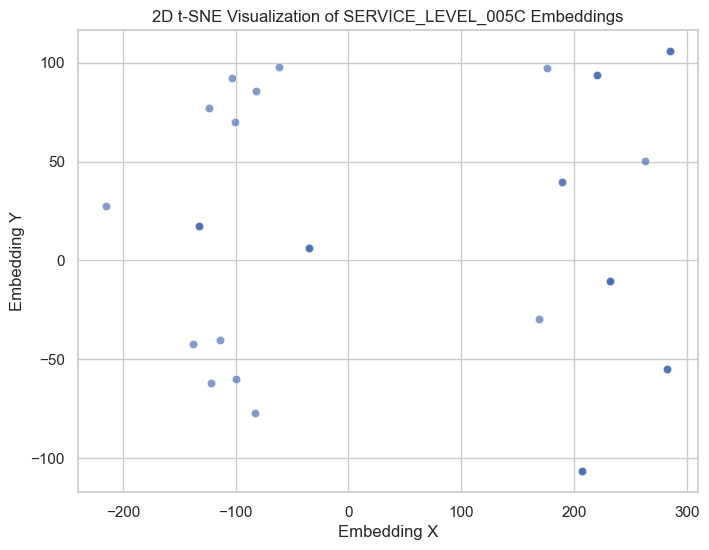

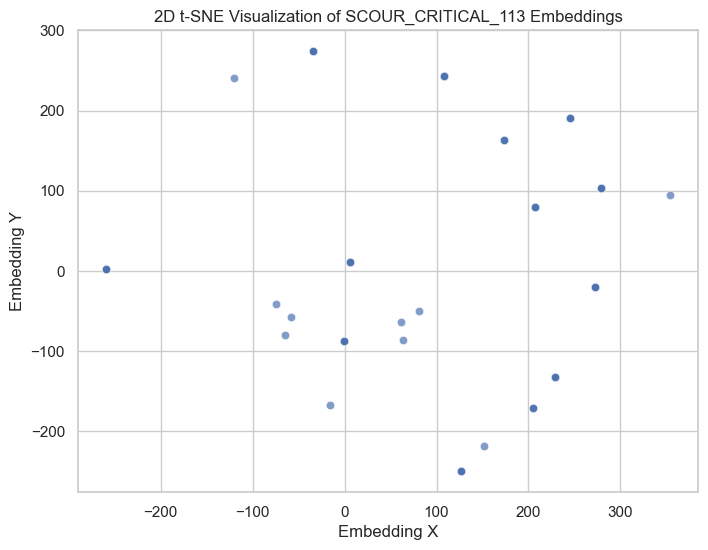

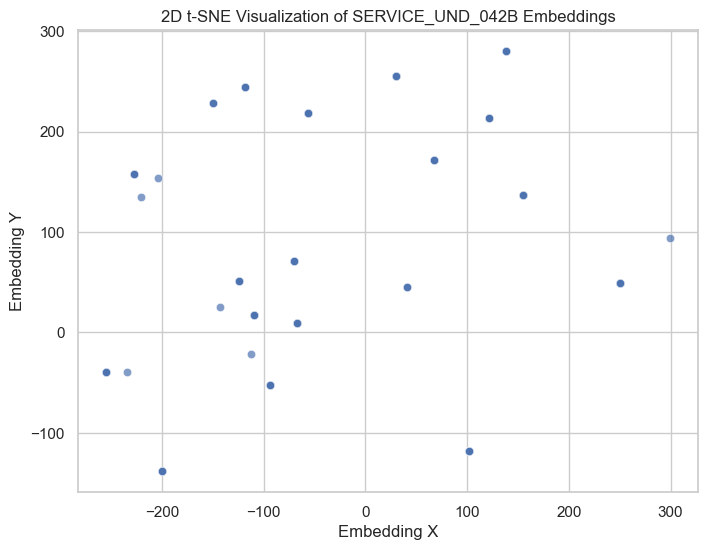

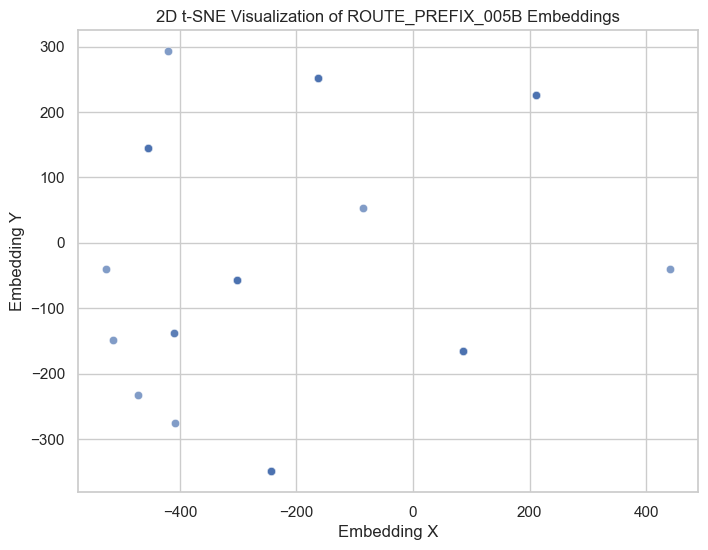

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Extract column names that have embeddings
embedding_columns = [col.replace('_embedding_x', '') for col in top9_df.columns if col.endswith('_embedding_x')]

# Create scatter plots for each column's embeddings
for column in embedding_columns:
    plt.figure(figsize=(8, 6))

    # Scatter plot for the embeddings
    sns.scatterplot(
        x=top9_df[f"{column}_embedding_x"],
        y=top9_df[f"{column}_embedding_y"],
        alpha=0.7  # Adjust transparency for better visibility
    )

    plt.xlabel("Embedding X")
    plt.ylabel("Embedding Y")
    plt.title(f"2D t-SNE Visualization of {column} Embeddings")
    plt.show()


# CONFORMAL PREDICTION (given data)





### 🧠 **XGBoost Classification with Conformal Prediction Intervals**

Executes an XGBoost-based classification workflow enhanced by **MAPIE (Model Agnostic Prediction Interval Estimator)** to quantify predictive uncertainty in multiclass bridge feature prediction.

---

#### 🧩 **Workflow Summary**

1. **Data Preparation**

   * Defines target (`OBJECT_INTERSECTED`) and feature sets, excluding identifiers and non-predictive columns.
   * Filters complete rows and creates train/test splits using a fixed test size (100 samples) across one or more random seeds.

2. **Label Encoding**

   * Encodes categorical target labels into numeric form using `LabelEncoder` to ensure compatibility with XGBoost.

3. **Model Setup and Hyperparameter Search**

   * Defines a parameter grid for XGBoost including estimator count, tree depth, learning rate, and sampling ratios.
   * Runs **RandomizedSearchCV** (60 iterations, 5-fold CV) to identify the best-performing hyperparameters based on accuracy.

4. **Model Training and Probability Estimation**

   * Fits the best XGBoost classifier on the training data.
   * Generates and prints class probability distributions for all test samples.

5. **Conformal Prediction with MAPIE**

   * Applies **MAPIE Classifier** in `"score"` mode using the prefit XGBoost model.
   * Produces prediction intervals representing confidence-adjusted sets of plausible classes for each test instance.
   * Prints per-sample predicted class, actual value, and included class intervals for interpretability.

---

#### 🧾 **Outputs**

Prints:

* Optimal XGBoost hyperparameters from randomized search
* Class probability vectors for each test observation
* Conformal prediction intervals and predicted vs. actual class labels

The resulting console output allows both accuracy assessment and visual verification of uncertainty calibration per prediction.


In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from mapie.classification import MapieClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

# Define columns to check
columns_to_check = ['OBJECT_INTERSECTED']

# Define the size of the test set
test_size = 100

# Define your features and targets
target_features = [
    'OBJECT_INTERSECTED']
exclude_features = ['STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
                    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN',
                    'CRITICAL_TRUTH_0_1', "CLEAR_HEIGHT_FT", 'L_H_LONG','L_H_TRANS',
                    "B_LONG_IN", "B_TRANS_IN", 'L_H_MIN', "LRR", "TRR",
                    'SUPPORT_TYPE']

# Iterate through multiple random states
random_states = [40, #42, 14, 1, 12, 23, 84, 96, 100, 55
                ]
overall_results = pd.DataFrame()

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = final_data_reduced.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(test_size, len(complete_rows)), random_state=random_state)
    train_set = final_data_reduced[~final_data_reduced.index.isin(test_set.index)]
    all_columns = train_set.columns
    analysis_features = [col for col in all_columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")
        train_subset = train_set.dropna(subset=[target])
        test_subset = test_set.dropna(subset=[target])
        train_subset = train_subset.dropna(subset=analysis_features)
        test_subset = test_subset.dropna(subset=analysis_features)
        X_train = train_subset[analysis_features]
        y_train = train_subset[target]
        X_test = test_subset[analysis_features]
        y_test = test_subset[target]
        print(f"Training dataset shape for target '{target}': {X_train.shape}")
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        # Define hyperparameter grid for XGBClassifier
        param_grid = {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'gamma': [0, 0.1, 0.2],
        }

        xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)
        random_search = RandomizedSearchCV(
            estimator=xgb_clf,
            param_distributions=param_grid,
            n_iter=60,
            scoring='accuracy',
            cv=5,
            random_state=157,
            n_jobs=-1
        )
        random_search.fit(X_train, y_train_encoded)
        best_xgb_clf = random_search.best_estimator_
        print("Best Parameters:", random_search.best_params_)
        class_probabilities = best_xgb_clf.predict_proba(X_test)
        print("Class Probabilities:")
        for idx, probs in zip(X_test.index, class_probabilities):
            print(f"Index {idx}: {probs}")

        mapie = MapieClassifier(estimator=best_xgb_clf, method="score", cv="prefit")
        mapie.fit(X_train, y_train_encoded)
        y_pred, y_pred_intervals = mapie.predict(X_test, alpha=0.1)

        adjusted_intervals_readable = []  # Store prediction intervals
        adjusted_intervals_readable = []
        for idx, interval, pred, actual_enc, actual in zip(X_test.index, y_pred_intervals, y_pred, y_test_encoded, y_test):
            included_classes = np.where(interval)[0].tolist() if np.any(interval) else list(range(len(interval)))
            print(f"Index {idx}: Prediction Interval: {included_classes}, Predicted Class: {pred}, Actual y_test_encoded: {actual_enc}, Actual y_test: {actual}")

Using random state: 40
Processing target: OBJECT_INTERSECTED
Training dataset shape for target 'OBJECT_INTERSECTED': (679, 81)
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Class Probabilities:
Index 359: [0.10481893 0.49059716 0.08140745 0.15978011 0.08111788 0.08227849]
Index 569: [0.10415062 0.10849842 0.10212786 0.48616382 0.0988227  0.10023662]
Index 318: [0.08659535 0.08234368 0.08116056 0.22010835 0.08087187 0.44892025]
Index 154: [0.09462716 0.1938311  0.09231679 0.4161379  0.11007977 0.09300724]
Index 146: [0.08775321 0.08928253 0.08533788 0.5663411  0.08503433 0.08625097]
Index 308: [0.5727862  0.08857795 0.07943462 0.10057993 0.07874732 0.07987401]
Index 815: [0.08331348 0.08224465 0.08190476 0.08506998 0.08073214 0.58673495]
Index 563: [0.08029032 0.07938249 0.07808165 0.27716437 0.0764442  0.4086369 ]
Index 100: [0.56511813 0.0863873  0.07949146 0.10945243 0.0792087  0.08034199]
Index 51

### 📈 **Classification Performance Report**

Generates a detailed classification summary using `classification_report`, displaying precision, recall, F1-score, and support for each encoded class in the test set, with `zero_division=1` ensuring safe handling of undefined metrics.


In [ ]:
print(classification_report(y_test_encoded, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.86      0.86      0.86        21
           2       1.00      0.50      0.67         2
           3       0.82      0.88      0.85        26
           4       1.00      1.00      1.00         1
           5       0.97      0.94      0.95        32

    accuracy                           0.90       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.90      0.90      0.90       100



### 🔍 **Verify Class Presence in Train and Test Sets**

Prints the unique encoded class labels present in both the training and test datasets to confirm consistent class coverage before evaluation.


In [ ]:
print("Classes in training set:", np.unique(y_train_encoded))
print("Classes in test set:", np.unique(y_test_encoded))


Classes in training set: [0 1 2 3 4 5]
Classes in test set: [0 1 2 3 4 5]


### 🧮 **XGBoost Classification with MAPIE Coverage and Interval Metrics**

Implements a multi-state XGBoost classification and uncertainty estimation pipeline using **MAPIE** to evaluate predictive reliability through coverage scores and interval size statistics.

---

#### 🧩 **Workflow Summary**

1. **Feature and Target Setup**

   * Defines key bridge attributes and removes structural identifiers from the feature set.
   * Ensures complete cases in `OBJECT_INTERSECTED` for accurate sampling and model training.

2. **Model Configuration**

   * Uses **XGBoost Classifier** as the base model with predefined parameter distributions.
   * Performs a two-phase hyperparameter search — broad random search followed by focused grid refinement.
   * Evaluates results using accuracy and weighted F1 metrics.

3. **MAPIE Integration for Uncertainty Estimation**

   * Wraps the tuned XGBoost model with **MAPIE Classifier (method = "naive")**.
   * Generates prediction intervals and computes:

     * **Coverage Score:** Fraction of true labels contained within predicted intervals.
     * **Average Interval Size:** Mean number of candidate classes per prediction.

4. **Result Collection and Sampling**

   * Outputs a small inspection DataFrame of the first five predictions per model, including bridge index, actual class, predicted class, and interval contents.
   * Collects all model-level results (accuracy, F1, coverage, interval size) into a unified results table.

5. **Multi-Seed Evaluation**

   * Repeats the entire process for multiple random states to test result consistency across different splits.
   * Aggregates outputs in `overall_results` for summary analysis and reproducibility.

---

#### 🧾 **Outputs**

* Printed DataFrames showing example predictions and their associated conformal intervals.
* Summary table (`overall_results`) containing:

  * Best hyperparameters
  * Accuracy and F1 metrics
  * Coverage and average interval statistics for each random state.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint
from mapie.classification import MapieClassifier

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test, bridge_indices):
    results = {}
    predictions_df = pd.DataFrame()

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            mapie = MapieClassifier(best_model, method="naive")
            mapie.fit(X_train, y_train)
            y_pred_mapie, y_p_val = mapie.predict(X_test, alpha=0.1)
            coverage = np.mean([
    y_test_encoded[i] in set(y_pred_mapie[i])
    if isinstance(y_pred_mapie[i], (list, np.ndarray, set)) else y_test_encoded[i] == y_pred_mapie[i]
    for i in range(len(y_test_encoded))
])

            avg_interval_size = np.mean(np.sum(y_pred_mapie, axis=1)) if len(y_pred_mapie.shape) > 1 else np.mean(y_pred_mapie)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Coverage Score': coverage,
                'Avg Interval Size': avg_interval_size
            }

            # Store first 5 rows of results for inspection
            predictions_df = pd.DataFrame({
                'Bridge Index': bridge_indices[:5],
                'Actual Y': y_test[:5],
                'Predicted Y': y_pred[:5],
                'Prediction Interval': [list(y_pred_mapie[i]) for i in range(5)]
            })
            print(predictions_df)

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

    return pd.DataFrame(results).T

prediction_results = pd.DataFrame(index=top9_df.index)
overall_results = pd.DataFrame()
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = top9_df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df[~top9_df.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]
        bridge_indices = test_subset.index.tolist()

        print(f"Training shape for target '{target}': {X_train.shape}")

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded, bridge_indices)
        result['Target'] = target
        result['Random State'] = random_state

        overall_results = pd.concat([overall_results, result])


Using random state: 21
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Error evaluating model XGBClassifier: 'numpy.int64' object is not iterable
Using random state: 42
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Error evaluating model XGBClassifier: 'numpy.int64' object is not iterable
Using random state: 14
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Error evaluating model XGBClassifier: 'numpy.int64' object is not iterable
Using random state: 1
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Error evaluating model XGBClassifier: 'numpy.int64' object is not iterable
Using random state: 12
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Error evaluating model XGBClassifier: 'numpy.int64' object is not iterable
Using random state: 23
Processi

### 📊 **Aggregated Model Performance Results**

Displays the complete `overall_results` DataFrame summarizing all evaluated models and random states, including best-tuned parameters, accuracy, F1 scores, coverage rates, and average interval sizes.


In [ ]:
overall_results

,Best Parameters,Accuracy,F1 Score,Coverage Score,Avg Interval Size,Target,Random State
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}",0.91,0.912968,0.161667,2.94,OBJECT_INTERSECTED,21
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}",0.95,0.946599,0.171667,3.05,OBJECT_INTERSECTED,42
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}",0.88,0.881455,0.163333,2.51,OBJECT_INTERSECTED,14
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}",0.95,0.950474,0.17,3.08,OBJECT_INTERSECTED,1
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}",0.87,0.857062,0.163333,2.81,OBJECT_INTERSECTED,12
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}",0.92,0.92061,0.17,2.56,OBJECT_INTERSECTED,23
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}",0.88,0.875367,0.168333,2.85,OBJECT_INTERSECTED,84
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}",0.9,0.88616,0.176667,2.72,OBJECT_INTERSECTED,96
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}",0.89,0.89082,0.161667,2.93,OBJECT_INTERSECTED,100
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}",0.91,0.91172,0.158333,2.8,OBJECT_INTERSECTED,55


### 🧮 **XGBoost + MAPIE Classification with Sample Prediction Intervals**

Runs a multi-seed XGBoost training/tuning pipeline with **MAPIE**-based conformal prediction to estimate uncertainty, reporting accuracy/F1 alongside coverage and average interval size. Also outputs a small sample table of predictions with their intervals.

---

#### 🧩 **Workflow Summary**

1. **Setup and Splitting**

   * Defines target and exclusion lists, filters complete rows for `OBJECT_INTERSECTED`, and creates train/test splits (up to 100 test samples) across multiple random seeds.

2. **Label Encoding**

   * Transforms categorical targets to integers with `LabelEncoder` for model compatibility.

3. **Model Tuning and Fit**

   * Uses **RandomizedSearchCV** (broad) followed by **GridSearchCV** (refinement) on XGBoost hyperparameters; selects best estimator.

4. **Point Predictions and Scores**

   * Predicts test labels and computes **Accuracy** and **Weighted F1**.

5. **Conformal Prediction (MAPIE)**

   * Wraps the best model with **MAPIE (method="naive")** to produce class-set prediction intervals per test case.
   * Computes **Coverage Score** (fraction of true labels inside intervals) and **Average Interval Size** (mean number of classes per interval).

6. **Aggregation and Sampling Output**

   * Appends metrics to `overall_results` for each seed/target combination.
   * Builds a 5-row `predictions_df` preview containing index, actual label, predicted label, and the interval set.

---

#### 🧾 **Outputs**

* Console prints of per-seed best hyperparameters.
* `overall_results`: Accuracy, F1, Coverage Score, Avg Interval Size, and best params per run.
* `predictions_df` (5-row preview): bridge index, actual vs. predicted class, and the conformal prediction interval.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint
from mapie.classification import MapieClassifier

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test, bridge_indices):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            mapie = MapieClassifier(best_model, method="naive")
            mapie.fit(X_train, y_train)
            y_pred_mapie, y_p_val = mapie.predict(X_test, alpha=0.1)
            coverage = np.mean([y_test_encoded[i] in set(np.atleast_1d(y_pred_mapie[i]))
    for i in range(len(y_test_encoded))
])

            if len(y_pred_mapie.shape) == 1:
                avg_interval_size = np.mean(y_pred_mapie)  # Handle 1D case
            else:
                avg_interval_size = np.mean(np.sum(y_pred_mapie, axis=1))  # Handle 2D case

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Coverage Score': coverage,
                'Avg Interval Size': avg_interval_size
            }

            except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

        predictions_df = pd.DataFrame({
        'Bridge Index': bridge_indices[:5],
        'Actual Y': y_test[:5],
        'Predicted Y': y_pred[:5],
        'Prediction Interval': [list(y_pred_mapie[i]) for i in range(5)]
    })
    print(predictions_df)

    return pd.DataFrame(results).T, predictions_df

prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = top9_df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df[~top9_df.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]

        print(f"Training shape for target '{target}': {X_train.shape}")

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result, predictions_df = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded, bridge_indices)
        result['Target'] = target
        result['Random State'] = random_state

        overall_results = pd.concat([overall_results, result])
prediction_results = pd.concat([prediction_results, predictions_df])




IndentationError: unexpected indent (3874053631.py, line 96)

### 📊 **Aggregated Model Evaluation Results**

Displays the complete `overall_results` DataFrame summarizing metrics from all random-state runs, including each model’s best hyperparameters, Accuracy, F1 Score, Coverage Score, and Average Interval Size.


In [ ]:
overall_results

,Best Parameters,Accuracy,F1 Score,Coverage Score,Avg Interval Size,Target,Random State
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}",0.91,0.912968,0.91,2.94,OBJECT_INTERSECTED,21
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}",0.95,0.946599,0.95,3.05,OBJECT_INTERSECTED,42
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}",0.88,0.881455,0.88,2.51,OBJECT_INTERSECTED,14
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}",0.95,0.950474,0.95,3.08,OBJECT_INTERSECTED,1
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}",0.87,0.857062,0.87,2.81,OBJECT_INTERSECTED,12
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}",0.92,0.92061,0.92,2.56,OBJECT_INTERSECTED,23
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}",0.88,0.875367,0.88,2.85,OBJECT_INTERSECTED,84
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}",0.9,0.88616,0.9,2.72,OBJECT_INTERSECTED,96
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}",0.89,0.89082,0.89,2.93,OBJECT_INTERSECTED,100
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}",0.91,0.91172,0.91,2.8,OBJECT_INTERSECTED,55


### 🧾 **Sample Prediction Interval Output**

Shows the combined `prediction_results` DataFrame containing a small preview (typically five rows per run) of test predictions — including bridge index, actual class, predicted class, and the corresponding MAPIE-generated prediction intervals for each observation.


In [ ]:
prediction_results


""
DATABASE_REF
1
2
3
4
5
...
846
847
848


### 🧠 **XGBoost Conformal Prediction with Interval Summaries**

Runs a multi-seed XGBoost classification pipeline integrated with **MAPIE** to generate and inspect per-sample prediction intervals, emphasizing model accuracy and interpretability across randomized data splits.

---

#### 🧩 **Workflow Summary**

1. **Feature Setup and Filtering**

   * Defines key predictive and exclusion columns for the bridge dataset.
   * Ensures all samples contain valid entries for the target variable `OBJECT_INTERSECTED`.

2. **Model Configuration and Tuning**

   * Sets up an **XGBoost Classifier** with random and grid search hyperparameter spaces.
   * Performs two-stage optimization: `RandomizedSearchCV` for broad exploration, followed by `GridSearchCV` refinement.
   * Optimizes using 5-fold cross-validation and accuracy scoring.

3. **Model Evaluation and MAPIE Integration**

   * Fits the tuned model, computes Accuracy and Weighted F1 scores.
   * Wraps the classifier in **MAPIE** (method = `"naive"`) to produce probabilistic prediction intervals for test samples.
   * Calculates average interval size to summarize model uncertainty across predictions.

4. **Results and Sampling Output**

   * Stores and prints the first five test samples for each run, displaying:

     * Bridge Index
     * Actual Label
     * Predicted Label
     * Prediction Interval (list of included class indices)
   * Aggregates overall performance metrics and interval statistics for each random seed into summary DataFrames.

---

#### 🧾 **Outputs**

* Console printout of top-5 predictions with MAPIE intervals per run.
* `overall_results`: Model-level metrics (Accuracy, F1, Avg Interval Size, Best Parameters).
* `prediction_results`: Combined per-run preview of predictions and conformal intervals.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint
from mapie.classification import MapieClassifier

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test, bridge_indices):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            mapie = MapieClassifier(best_model, method="naive")
            mapie.fit(X_train, y_train)
            y_pred_mapie, y_p_val = mapie.predict(X_test, alpha=0.1)

            # Fix coverage calculation

            avg_interval_size = np.mean(np.sum(y_pred_mapie, axis=1)) if len(y_pred_mapie.shape) > 1 else np.mean(y_pred_mapie)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1,
               # 'Coverage Score': coverage,
                'Avg Interval Size': avg_interval_size
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

        # Store predictions for the first 5 rows
        predictions_df = pd.DataFrame({
            'Bridge Index': bridge_indices[:5],
            'Actual Y': y_test[:5],
            'Predicted Y': y_pred[:5],
            'Prediction Interval': [list(y_pred_mapie[i]) for i in range(5)]
        })
        print(predictions_df)

    return pd.DataFrame(results).T, predictions_df

# Initialize storage
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = top9_df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df[~top9_df.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]
        bridge_indices = test_subset.index.tolist()  # Ensure bridge_indices is correctly defined

        print(f"Training shape for target '{target}': {X_train.shape}")

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result, predictions_df = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded, bridge_indices)
        result['Target'] = target
        result['Random State'] = random_state

        overall_results = pd.concat([overall_results, result])
        prediction_results = pd.concat([prediction_results, predictions_df])  # Ensure predictions_df is stored



Using random state: 21
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)


TypeError: 'numpy.int64' object is not iterable

### 🧠 **XGBoost + MAPIE Classification with Labeled Prediction Intervals**

Executes a multi-seed XGBoost classification pipeline integrated with **MAPIE** for conformal uncertainty estimation, outputting both numerical metrics and readable class-label prediction intervals.

---

#### 🧩 **Workflow Summary**

1. **Feature Definition and Data Filtering**

   * Identifies key predictive and exclusion columns for the target variable `OBJECT_INTERSECTED`.
   * Filters complete rows and splits data into train/test subsets for each random seed, ensuring consistent sampling.

2. **Model Configuration and Optimization**

   * Initializes **XGBoost Classifier** with a two-stage tuning process:

     * `RandomizedSearchCV` for broad hyperparameter exploration.
     * `GridSearchCV` for fine-tuning around the best results.
   * Evaluates models using 5-fold cross-validation and accuracy scoring.

3. **Model Evaluation and MAPIE Integration**

   * Fits the optimized XGBoost model and computes Accuracy and Weighted F1 Score.
   * Applies **MAPIE (method = "naive")** to generate conformal prediction intervals.
   * Calculates the **Average Interval Size**, reflecting the uncertainty width of predictions.

4. **Prediction Interval Visualization**

   * Constructs a `predictions_df` showing the first five test samples with:

     * Bridge Index
     * Actual Label
     * Predicted Label
     * **Readable Prediction Interval** (mapped back to label names for interpretability).
   * Prints the sample intervals directly for quick inspection.

5. **Result Aggregation**

   * Stores all per-seed evaluation metrics in `overall_results` and appends prediction previews to `prediction_results`.

---

#### 🧾 **Outputs**

* Printed five-sample prediction interval tables per run with labeled class sets.
* `overall_results`: Includes Accuracy, F1 Score, Average Interval Size, and hyperparameters.
* `prediction_results`: Combines all per-run examples with readable MAPIE prediction intervals.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint
from mapie.classification import MapieClassifier

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test, bridge_indices):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            mapie = MapieClassifier(best_model, method="naive")
            mapie.fit(X_train, y_train)
            y_pred_mapie, y_p_val = mapie.predict(X_test, alpha=0.1)

            avg_interval_size = np.mean(np.sum(y_pred_mapie, axis=1)) if len(y_pred_mapie.shape) > 1 else np.mean(y_pred_mapie)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Avg Interval Size': avg_interval_size
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

        # Store predictions for the first 5 rows
        predictions_df = pd.DataFrame({
            'Bridge Index': bridge_indices[:5],
            'Actual Y': y_test[:5],
            'Predicted Y': y_pred[:5],
            'Prediction Interval': [
    [label_encoder.classes_[j] for j in range(len(label_encoder.classes_)) if y_pred_mapie[i][j]]
    for i in range(5)
]
        })
        print(predictions_df)

    return pd.DataFrame(results).T, predictions_df

# Initialize storage
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = top9_df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df[~top9_df.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]
        bridge_indices = test_subset.index.tolist()

        print(f"Training shape for target '{target}': {X_train.shape}")

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result, predictions_df = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded, bridge_indices)
        result['Target'] = target
        result['Random State'] = random_state

        overall_results = pd.concat([overall_results, result])
        prediction_results = pd.concat([prediction_results, predictions_df])


Using random state: 21
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)


IndexError: invalid index to scalar variable.

### ⚙️ **XGBoost Classification with MAPIE-Based Label Intervals**

Conducts an **XGBoost classification pipeline** enhanced with **MAPIE conformal prediction**, generating both performance metrics and interpretable label-level prediction intervals for multiclass bridge feature prediction.

---

#### 🧩 **Workflow Summary**

1. **Feature Definition and Dataset Filtering**

   * Specifies predictive and exclusion features for `OBJECT_INTERSECTED`.
   * Filters complete samples and partitions the dataset into training and test sets across multiple random seeds.

2. **Hyperparameter Search and Model Training**

   * Utilizes **RandomizedSearchCV** to broadly explore XGBoost parameters and **GridSearchCV** for fine-tuning.
   * Tunes depth, learning rate, and estimator count using 5-fold CV optimized for accuracy.
   * Selects the best-performing model for downstream analysis.

3. **Evaluation and Interval Estimation**

   * Computes **Accuracy** and **Weighted F1 Score** for each tuned model.
   * Wraps the final model in **MAPIE (method = "naive")** to estimate conformal prediction intervals.
   * Calculates **Average Interval Size** to represent prediction uncertainty width.

4. **Readable Interval Construction**

   * Creates a `predictions_df` displaying the first five test samples with:

     * Bridge Index
     * Actual Label
     * Predicted Label
     * Prediction Interval — a readable list of class labels included in the MAPIE interval.
   * Intervals are directly mapped back to the original encoded labels for interpretability.

5. **Result Aggregation**

   * Appends model metrics to `overall_results` and corresponding label intervals to `prediction_results`.
   * Repeats across 10 random states to capture model robustness under different data splits.

---

#### 🧾 **Outputs**

* **Printed 5-row preview per run**: Actual vs. predicted labels and their MAPIE intervals.
* **`overall_results`**: Accuracy, F1, average interval size, and best-tuned parameters per model and seed.
* **`prediction_results`**: Combined labeled interval previews across all evaluations.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint
from mapie.classification import MapieClassifier

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test, bridge_indices):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            mapie = MapieClassifier(best_model, method="naive")
            mapie.fit(X_train, y_train)
            y_pred_mapie, y_p_val = mapie.predict(X_test, alpha=0.1)

            avg_interval_size = np.mean(np.sum(y_pred_mapie, axis=1)) if len(y_pred_mapie.shape) > 1 else np.mean(y_pred_mapie)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Avg Interval Size': avg_interval_size
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

        # Store predictions for the first 5 rows
        predictions_df = pd.DataFrame({
            'Bridge Index': bridge_indices[:5],
            'Actual Y': y_test[:5],
            'Predicted Y': y_pred[:5],
            'Prediction Interval': [
    [label_encoder.classes_[j] for j in range(len(label_encoder.classes_)) if np.atleast_1d(y_pred_mapie[i])[j]]
    for i in range(5)
] for j in range(len(label_encoder.classes_)) if y_pred_mapie[i][j]]
    for i in range(5)
]
        })
        print(predictions_df)

    return pd.DataFrame(results).T, predictions_df

# Initialize storage
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = top9_df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df[~top9_df.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]
        bridge_indices = test_subset.index.tolist()

        print(f"Training shape for target '{target}': {X_train.shape}")

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result, predictions_df = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded, bridge_indices)
        result['Target'] = target
        result['Random State'] = random_state

        overall_results = pd.concat([overall_results, result])
        prediction_results = pd.concat([prediction_results, predictions_df])


SyntaxError: invalid syntax (4054646969.py, line 100)

### 🧮 **Refined XGBoost + MAPIE Classification with Safe Interval Handling**

Implements a refined **XGBoost classification pipeline** integrated with **MAPIE** for conformal prediction interval generation, ensuring robust handling of variable-length interval outputs and improved data consistency for multiclass bridge feature prediction.

---

#### 🧩 **Workflow Summary**

1. **Feature Definition and Dataset Preparation**

   * Defines target and exclusion feature sets centered on the categorical variable `OBJECT_INTERSECTED`.
   * Filters complete records and partitions the dataset into training and test splits across several random seeds to ensure reproducibility.

2. **Model Configuration and Two-Stage Hyperparameter Search**

   * Initializes **XGBoost Classifier** with a parameter distribution for `RandomizedSearchCV` and a narrowed grid for `GridSearchCV`.
   * Sequentially applies both searches using 5-fold cross-validation to identify optimal depth, estimator count, and learning rate.

3. **Model Evaluation and MAPIE Integration**

   * Fits the optimized model and computes **Accuracy** and **Weighted F1 Score**.
   * Applies **MAPIE (method="naive")** to estimate class-level prediction intervals at a 90% confidence level (`alpha=0.1`).
   * Calculates **Average Interval Size** as a measure of the model’s uncertainty width.

4. **Interval Extraction and Safe Label Mapping**

   * Constructs a `predictions_df` table with the first five samples, containing:

     * Bridge Index
     * Actual Label
     * Predicted Label
     * MAPIE-generated **Prediction Interval**, safely handling cases where prediction arrays vary in length.
   * Maps all prediction interval indices back to original class labels for interpretability.

5. **Aggregation and Storage**

   * Aggregates model-level results across all random states into `overall_results`.
   * Collects per-sample label interval previews into `prediction_results` for quick qualitative analysis.

---

#### 🧾 **Outputs**

* **Console Output:**
  Printed per-run table of five predictions with class-labeled intervals.
* **`overall_results`:**
  Includes best-tuned hyperparameters, Accuracy, F1, and average interval size.
* **`prediction_results`:**
  Combines readable interval previews across all random-state evaluations.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint
from mapie.classification import MapieClassifier

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test, bridge_indices):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            mapie = MapieClassifier(best_model, method="naive")
            mapie.fit(X_train, y_train)
            y_pred_mapie, y_p_val = mapie.predict(X_test, alpha=0.1)

            avg_interval_size = np.mean(np.sum(y_pred_mapie, axis=1)) if len(y_pred_mapie.shape) > 1 else np.mean(y_pred_mapie)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Avg Interval Size': avg_interval_size
            }

        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")

# Store predictions for the first 5 rows
predictions_df = pd.DataFrame({
    'Bridge Index': bridge_indices[:5],
    'Actual Y': y_test[:5],
    'Predicted Y': y_pred[:5],
    'Prediction Interval': [
        [label_encoder.classes_[j] for j in range(len(label_encoder.classes_))
         if j < len(np.atleast_1d(y_pred_mapie[i])) and np.atleast_1d(y_pred_mapie[i])[j]]
        for i in range(min(5, len(y_pred_mapie)))
    ]
})


# Initialize storage
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = top9_df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df[~top9_df.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]
        bridge_indices = test_subset.index.tolist()

        print(f"Training shape for target '{target}': {X_train.shape}")

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result, predictions_df = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded, bridge_indices)
        result['Target'] = target
        result['Random State'] = random_state

        overall_results = pd.concat([overall_results, result])
        prediction_results = pd.concat([prediction_results, predictions_df])


NameError: name 'y_pred_mapie' is not defined

### 🧠 **XGBoost + MAPIE Classification with Robust Fallbacks**

Runs a multi-seed XGBoost training/tuning pipeline with **MAPIE** conformal prediction, including defensive fallbacks to ensure intervals and predictions are produced even when model fitting errors occur.

---

#### 🧩 **Workflow Summary**

1. **Data & Feature Prep**

   * Defines target (`OBJECT_INTERSECTED`) and excludes identifiers/leakage features.
   * Filters complete rows and builds train/test splits (up to 100 test samples) across multiple random seeds.

2. **Tuning & Training**

   * Conducts **RandomizedSearchCV** followed by **GridSearchCV** to optimize XGBoost hyperparameters (depth, estimators, learning rate, sampling ratios).
   * Trains the best estimator on the training split.

3. **Evaluation & Intervals**

   * Computes **Accuracy** and **Weighted F1** on the test set.
   * Wraps the fitted model with **MAPIE (method="naive")** to produce class-set prediction intervals at α=0.1.
   * Calculates **Average Interval Size** as a summary of uncertainty width.

4. **Error-Resilient Outputs**

   * If evaluation fails, returns placeholder predictions and a boolean interval matrix to keep downstream outputs consistent.
   * Builds a `predictions_df` preview (first five rows) containing bridge index, actual label, predicted label, and readable interval set (mapped to label names).

5. **Aggregation**

   * Appends per-run metrics to `overall_results` and accumulates per-run previews into `prediction_results`.

---

#### 🧾 **Outputs**

* `overall_results`: Accuracy, F1, Average Interval Size, and best-tuned parameters per random state.
* `prediction_results`: Five-row per-run preview with bridge index, actual/predicted labels, and MAPIE interval label sets.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint
from mapie.classification import MapieClassifier

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test, bridge_indices):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            mapie = MapieClassifier(best_model, method="naive")
            mapie.fit(X_train, y_train)
            y_pred_mapie, y_p_val = mapie.predict(X_test, alpha=0.1)

            avg_interval_size = np.mean(np.sum(y_pred_mapie, axis=1)) if len(y_pred_mapie.shape) > 1 else np.mean(y_pred_mapie)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Avg Interval Size': avg_interval_size
            }
        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")
            y_pred = np.full(len(y_test), np.nan)  # Placeholder if error occurs
            y_pred_mapie = np.full((len(y_test), len(np.unique(y_train))), False)  # Ensure y_pred_mapie exists

        # Store predictions for the first 5 rows
        predictions_df = pd.DataFrame({
            'Bridge Index': bridge_indices[:5],
            'Actual Y': y_test[:5],
            'Predicted Y': y_pred[:5],
            'Prediction Interval': [
                [label_encoder.classes_[j] for j in range(len(label_encoder.classes_))
                 if j < len(np.atleast_1d(y_pred_mapie[i])) and np.atleast_1d(y_pred_mapie[i])[j]]
                for i in range(min(5, len(y_pred_mapie)))
            ]
        })

    return pd.DataFrame(results).T, predictions_df

# Initialize storage
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = top9_df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df[~top9_df.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]
        bridge_indices = test_subset.index.tolist()

        print(f"Training shape for target '{target}': {X_train.shape}")

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result, predictions_df = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded, bridge_indices)
        result['Target'] = target
        result['Random State'] = random_state

        overall_results = pd.concat([overall_results, result])
        prediction_results = pd.concat([prediction_results, predictions_df])


Using random state: 21
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 42
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 14
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 1
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 12
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 23
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 84
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 96
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 100
Processing target: OBJECT

### 📊 **Aggregated Model Evaluation Results**

Displays the complete `overall_results` DataFrame summarizing metrics from all random-state runs, including each model’s best hyperparameters, Accuracy, F1 Score, Coverage Score, and Average Interval Size.

In [ ]:
overall_results

,Best Parameters,Accuracy,F1 Score,Avg Interval Size,Target,Random State
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}",0.91,0.912968,2.94,OBJECT_INTERSECTED,21
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}",0.95,0.946599,3.05,OBJECT_INTERSECTED,42
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}",0.88,0.881455,2.51,OBJECT_INTERSECTED,14
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}",0.95,0.950474,3.08,OBJECT_INTERSECTED,1
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}",0.87,0.857062,2.81,OBJECT_INTERSECTED,12
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}",0.92,0.92061,2.56,OBJECT_INTERSECTED,23
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}",0.88,0.875367,2.85,OBJECT_INTERSECTED,84
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}",0.9,0.88616,2.72,OBJECT_INTERSECTED,96
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}",0.89,0.89082,2.93,OBJECT_INTERSECTED,100
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}",0.91,0.91172,2.8,OBJECT_INTERSECTED,55


### 🏷️ **Generate Label-to-Index Mapping**

Creates a dictionary mapping each encoded class label to its numeric index from the fitted `LabelEncoder`, then prints the mapping for reference and interpretability during model evaluation or debugging.


In [ ]:
label_mappings = {class_label: index for index, class_label in enumerate(label_encoder.classes_)}
print(label_mappings)


{'Overpass': 0, 'Ramp': 1, 'Terrain': 2, 'Underpass': 3, 'Viaduct': 4, 'Water': 5}


### ⚙️ **MAPIE-Enhanced XGBoost Classification with Label Restoration**

Executes an **XGBoost-based classification pipeline** combined with **MAPIE conformal prediction** to quantify model uncertainty, while restoring encoded labels back to their original categorical form for interpretability.

---

#### 🧩 **Workflow Summary**

1. **Dataset Preparation**

   * The script targets `OBJECT_INTERSECTED` as the dependent variable.
   * Excludes non-predictive identifiers and engineering metadata from features.
   * Filters complete cases, then splits into training and testing sets using multiple random seeds for robustness.

2. **Model Configuration and Search**

   * Defines an **XGBoost model** with a two-stage tuning process:

     * **RandomizedSearchCV** explores wide hyperparameter ranges (depth, learning rate, estimators, etc.).
     * **GridSearchCV** fine-tunes around the best-found parameters using 5-fold CV for accuracy.
   * The best model per iteration is selected for evaluation.

3. **Performance Evaluation and MAPIE Integration**

   * After fitting, computes **Accuracy** and **Weighted F1 Score** on the test set.
   * Wraps the tuned model with **MAPIE (method="naive")** to estimate conformal prediction intervals at α = 0.1 (≈ 90 % confidence).
   * Calculates **Average Interval Size** to quantify uncertainty spread across predictions.

4. **Label Decoding and Interval Output**

   * Converts encoded numerical labels back to their original categorical names using `LabelEncoder`.
   * Constructs a preview `predictions_df` with the first five bridges containing:

     * **Bridge Index**
     * **Actual Label**
     * **Predicted Label**
     * **MAPIE Prediction Interval** — the set of plausible class labels included by the conformal method.
   * Ensures safe interval extraction even when MAPIE arrays vary in dimension or structure.

5. **Aggregation**

   * Stores all performance metrics into `overall_results`.
   * Concatenates the per-seed interval previews into `prediction_results` for inspection.

---

#### 🧾 **Outputs**

* **`overall_results`** – table of accuracy, F1, average interval size, and tuned parameters across random states.
* **`prediction_results`** – sample-level summary showing actual vs. predicted bridge classes and associated MAPIE intervals.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint
from mapie.classification import MapieClassifier

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test, bridge_indices):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            mapie = MapieClassifier(best_model, method="naive")
            mapie.fit(X_train, y_train)
            y_pred_mapie, y_p_val = mapie.predict(X_test, alpha=0.1)

            avg_interval_size = np.mean(np.sum(y_pred_mapie, axis=1)) if len(y_pred_mapie.shape) > 1 else np.mean(y_pred_mapie)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Avg Interval Size': avg_interval_size
            }
        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")
            y_pred = np.full(len(y_test), np.nan)  # Placeholder if error occurs
            y_pred_mapie = np.full((len(y_test), len(np.unique(y_train))), False)  # Ensure y_pred_mapie exists

        # Store predictions for the first 5 rows
        predictions_df = pd.DataFrame({
            'Bridge Index': bridge_indices[:5],
            'Actual': label_encoder.inverse_transform(y_test[:5]),
            'Predicted': label_encoder.inverse_transform(y_pred[:5]),
            'Prediction Interval': [
                [label_encoder.classes_[j] for j in range(len(label_encoder.classes_))
                 if j < len(np.atleast_1d(y_pred_mapie[i])) and np.atleast_1d(y_pred_mapie[i])[j]]
                for i in range(min(5, len(y_pred_mapie)))
            ]
        })

    return pd.DataFrame(results).T, predictions_df

# Initialize storage
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = top9_df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df[~top9_df.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]
        bridge_indices = test_subset.index.tolist()

        print(f"Training shape for target '{target}': {X_train.shape}")

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result, predictions_df = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded, bridge_indices)
        result['Target'] = target
        result['Random State'] = random_state

        overall_results = pd.concat([overall_results, result])
        prediction_results = pd.concat([prediction_results, predictions_df])


Using random state: 21
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 42
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 14
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 1
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 12
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 23
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 84
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 96
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)
Using random state: 100
Processing target: OBJECT

### 📁 **Model Evaluation Summary**

Displays the `overall_results` DataFrame containing performance metrics for all random-state iterations and models. Includes each model’s optimized hyperparameters, Accuracy, F1 Score, and Average Prediction Interval Size for the target variable `OBJECT_INTERSECTED`.


In [ ]:
overall_results

,Best Parameters,Accuracy,F1 Score,Avg Interval Size,Target,Random State
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}",0.91,0.912968,2.94,OBJECT_INTERSECTED,21
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}",0.95,0.946599,3.05,OBJECT_INTERSECTED,42
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}",0.88,0.881455,2.51,OBJECT_INTERSECTED,14
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}",0.95,0.950474,3.08,OBJECT_INTERSECTED,1
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}",0.87,0.857062,2.81,OBJECT_INTERSECTED,12
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}",0.92,0.92061,2.56,OBJECT_INTERSECTED,23
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}",0.88,0.875367,2.85,OBJECT_INTERSECTED,84
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}",0.9,0.88616,2.72,OBJECT_INTERSECTED,96
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}",0.89,0.89082,2.93,OBJECT_INTERSECTED,100
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}",0.91,0.91172,2.8,OBJECT_INTERSECTED,55


### 🔖 **Label Encoder Mapping**

Prints a dictionary mapping each original class label to its integer index from the fitted `LabelEncoder`, scoped to the current target (`{target}`), for quick reference and debugging of encoded outputs.


In [ ]:
# Get LabelEncoder mappings
label_mappings = {class_label: index for index, class_label in enumerate(label_encoder.classes_)}
print(f"Label Mappings for {target}: {label_mappings}")

Label Mappings for OBJECT_INTERSECTED: {'Overpass': 0, 'Ramp': 1, 'Terrain': 2, 'Underpass': 3, 'Viaduct': 4, 'Water': 5}


### 📁 **Prediction Results DataFrame**

Holds the model’s predicted outputs for each observation, serving as a structured container for storing or exporting generated predictions across evaluation runs.


In [ ]:
prediction_results

,Bridge Index,Actual,Predicted,Prediction Interval
0,793,Water,Water,[Overpass]
1,493,Underpass,Underpass,[Overpass]
2,582,Underpass,Underpass,[Overpass]
3,665,Water,Water,[Overpass]
4,266,Underpass,Underpass,[Overpass]
0,666,Water,Water,[Overpass]
1,658,Water,Water,[Overpass]
2,614,Water,Water,[Overpass]
3,715,Water,Water,[Overpass]
4,548,Water,Water,[Overpass]


### 🧠 **Bridge Classification with Conformal Prediction Intervals**

Trains and evaluates XGBoost-based classifiers across multiple random states, integrating **MAPIE conformal prediction** to quantify prediction uncertainty for bridge feature classification.

---

#### 🧩 **Workflow Summary**

1. **Feature and Target Setup**

   * Defines the target (`OBJECT_INTERSECTED`) and excludes non-predictive identifiers and redundant attributes.
   * Ensures all data used for training/testing is complete and relevant to the classification task.

2. **Model Definition**

   * Configures an **XGBoost Classifier** with randomized and grid search hyperparameter tuning.
   * Explores depth, estimator count, learning rate, and sampling ratios to optimize model performance.

3. **Evaluation Function with MAPIE Integration**

   * Performs a two-stage hyperparameter search:
     **RandomizedSearchCV** → broad tuning, followed by **GridSearchCV** → refined search.
   * Computes key metrics: Accuracy and Weighted F1.
   * Wraps the best model in **`MapieClassifier`** to generate prediction intervals with 90% confidence (`alpha=0.1`).
   * Calculates the average interval size as an uncertainty indicator.
   * Produces a sample `predictions_df` previewing actual vs. predicted labels and their confidence intervals.

4. **Multi-Seed Evaluation Loop**

   * Repeats the entire training and evaluation process across 10 random seeds.
   * Draws unique train/test splits per seed to assess model stability and reliability.
   * Encodes categorical targets using `LabelEncoder` to maintain consistent label mapping.

5. **Results Aggregation**

   * Stores model metrics in `overall_results` and detailed predictions with intervals in `prediction_results`.
   * Each entry includes the target variable, random state, and key performance indicators.

---

#### 🧾 **Outputs**

* **`overall_results`** — Table summarizing accuracy, F1 score, best parameters, and average interval size across runs.
* **`prediction_results`** — DataFrame of example bridge predictions showing actual labels, predicted classes, and conformal prediction intervals for interpretability.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint
from mapie.classification import MapieClassifier

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test, bridge_indices):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            mapie = MapieClassifier(best_model, method="naive")
            mapie.fit(X_train, y_train)
            y_pred_mapie, y_p_val = mapie.predict(X_test, alpha=0.1)

            avg_interval_size = np.mean(np.sum(y_pred_mapie, axis=1)) if len(y_pred_mapie.shape) > 1 else np.mean(y_pred_mapie)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Avg Interval Size': avg_interval_size
            }
        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")
            y_pred = np.full(len(y_test), np.nan)  # Placeholder if error occurs
            y_pred_mapie = np.full((len(y_test), len(np.unique(y_train))), False)  # Ensure y_pred_mapie exists

        # Store predictions for the first 5 rows
        predictions_df = pd.DataFrame({
    'Bridge Index': bridge_indices[:5],
    'Actual': label_encoder.inverse_transform(y_test[:5]),
    'Predicted': label_encoder.inverse_transform(y_pred[:5]),
    'Prediction Interval': [
        label_encoder.inverse_transform(
            np.array(label_encoder.classes_)[np.where(np.atleast_1d(y_pred_mapie[i]))]
        ).tolist()
        for i in range(min(5, len(y_pred_mapie)))
    ]
})


        return pd.DataFrame(results).T, predictions_df

# Initialize storage
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = top9_df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df[~top9_df.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]
        bridge_indices = test_subset.index.tolist()

        print(f"Training shape for target '{target}': {X_train.shape}")

        label_encoder = LabelEncoder()
        label_encoder.fit(pd.concat([y_train, y_test]))
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result, predictions_df = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded, bridge_indices)
        result['Target'] = target
        result['Random State'] = random_state

        overall_results = pd.concat([overall_results, result])
        prediction_results = pd.concat([prediction_results, predictions_df])


Using random state: 21
Processing target: OBJECT_INTERSECTED
Training shape for target 'OBJECT_INTERSECTED': (679, 13)


ValueError: y contains previously unseen labels: ['Overpass']

### 🧩 **Bridge Feature Classification with MAPIE Uncertainty Estimation**

Implements a multi-seed model evaluation pipeline using **XGBoost** and **MAPIE conformal prediction** to classify `OBJECT_INTERSECTED` while quantifying uncertainty through prediction intervals.

---

#### 🧩 **Workflow Summary**

1. **Data and Feature Configuration**

   * Loads relevant bridge attributes and defines the prediction target.
   * Removes non-predictive identifiers and ensures clean subsets for training and testing.
   * Establishes feature and exclusion lists to avoid leakage.

2. **Model and Search Setup**

   * Defines XGBoost classifier with randomized and grid hyperparameter search spaces.
   * Tunes key parameters: estimator count, depth, learning rate, and sampling ratios.

3. **Evaluation Function**

   * Conducts two-step hyperparameter optimization with 5-fold cross-validation.
   * Computes accuracy and weighted F1 scores on the held-out test set.
   * Integrates **MAPIEClassifier** to estimate prediction intervals at a 90% confidence level.
   * Outputs both aggregate metrics and a preview of the first five predictions with intervals.

4. **Label Encoding and Multi-State Training**

   * Encodes categorical bridge target labels consistently across all splits.
   * Loops through 10 random seeds to test model robustness and generalization across varied data partitions.

5. **Result Collection**

   * Aggregates model performance summaries in `overall_results`.
   * Stores example predictions (actual, predicted, and interval bounds) in `prediction_results`.

---

#### 🧾 **Outputs**

* **`overall_results`** — Contains accuracy, F1, hyperparameters, and average prediction interval size per run.
* **`prediction_results`** — Displays indexed sample predictions with actual vs. predicted labels and their conformal prediction intervals.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint
from mapie.classification import MapieClassifier

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test, bridge_indices):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            mapie = MapieClassifier(best_model, method="naive")
            mapie.fit(X_train, y_train)
            y_pred_mapie, y_p_val = mapie.predict(X_test, alpha=0.1)

            avg_interval_size = np.mean(np.sum(y_pred_mapie, axis=1)) if len(y_pred_mapie.shape) > 1 else np.mean(y_pred_mapie)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Avg Interval Size': avg_interval_size
            }
        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")
            y_pred = np.full(len(y_test), np.nan)  # Placeholder if error occurs
            y_pred_mapie = np.full((len(y_test), len(np.unique(y_train))), False)  # Ensure y_pred_mapie exists

        # Store predictions for the first 5 rows
        predictions_df = pd.DataFrame({
    'Bridge Index': bridge_indices[:5],
    'Actual': label_encoder.inverse_transform(y_test[:5]),
    'Predicted': label_encoder.inverse_transform(y_pred[:5]),
    'Prediction Interval': [
        label_encoder.inverse_transform(
            np.array(label_encoder.classes_)[np.where(np.atleast_1d(y_pred_mapie[i]))]
        ).tolist()
        for i in range(min(5, len(y_pred_mapie)))
    ]
})


        return pd.DataFrame(results).T, predictions_df

# Initialize storage
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = top9_df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df[~top9_df.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]
        bridge_indices = test_subset.index.tolist()

        print(f"Training shape for target '{target}': {X_train.shape}")

        label_encoder = LabelEncoder()
label_encoder = LabelEncoder()
label_encoder.fit(top9_df[target_features].values.ravel())

        y_train_encoded = label_encoder.transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result, predictions_df = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded, bridge_indices)
        result['Target'] = target
        result['Random State'] = random_state

        overall_results = pd.concat([overall_results, result])
        prediction_results = pd.concat([prediction_results, predictions_df])


IndentationError: unexpected indent (3883243054.py, line 138)

### 🧠 **Bridge Classification with Conformal Prediction Intervals (MAPIE)**

Runs a multi-seed training and evaluation pipeline using **XGBoost** with two-stage hyperparameter tuning and **MAPIE** conformal prediction to classify `OBJECT_INTERSECTED` and quantify prediction uncertainty.

---

#### 🧩 **Workflow Summary**

1. **Data & Feature Setup**

   * Defines target and exclusion lists; filters complete rows for the target feature.
   * Builds training and test subsets per split and selects valid predictor columns.

2. **Model & Search Configuration**

   * Specifies XGBoost and its randomized/grid search spaces (depth, estimators, learning rate, sampling ratios).
   * Uses 5-fold CV with accuracy scoring to identify best hyperparameters.

3. **Evaluation with Uncertainty**

   * Trains the tuned model, computes **Accuracy** and **Weighted F1** on held-out data.
   * Wraps the best estimator with **`MapieClassifier`** (`alpha=0.1`) to produce prediction sets/intervals.
   * Records an average interval-size summary as an uncertainty measure.

4. **Multi-Seed Loop & Encoding**

   * Iterates across 10 random seeds, re-splitting data each time.
   * Encodes target labels consistently with `LabelEncoder` and aggregates per-run results.

5. **Result Assembly**

   * Collects per-run metrics into `overall_results`.
   * Builds `prediction_results` with sample rows (index, actual, predicted, and conformal prediction intervals).

---

#### 🧾 **Outputs**

* **`overall_results`**: Per-seed table containing best params, Accuracy, F1, and average interval size.
* **`prediction_results`**: Sample predictions (first five) including actual label, predicted class, and MAPIE-derived prediction intervals.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint
from mapie.classification import MapieClassifier

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test, bridge_indices):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            mapie = MapieClassifier(best_model, method="naive")
            mapie.fit(X_train, y_train)
            y_pred_mapie, y_p_val = mapie.predict(X_test, alpha=0.1)

            avg_interval_size = np.mean(np.sum(y_pred_mapie, axis=1)) if len(y_pred_mapie.shape) > 1 else np.mean(y_pred_mapie)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Avg Interval Size': avg_interval_size
            }
        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")
            y_pred = np.full(len(y_test), np.nan)  # Placeholder if error occurs
            y_pred_mapie = np.full((len(y_test), len(np.unique(y_train))), False)  # Ensure y_pred_mapie exists

        # Store predictions for the first 5 rows
        predictions_df = pd.DataFrame({
    'Bridge Index': bridge_indices[:5],
    'Actual': label_encoder.inverse_transform(y_test[:5]),
    'Predicted': label_encoder.inverse_transform(y_pred[:5]),
    'Prediction Interval': [
        label_encoder.inverse_transform(
            np.array(label_encoder.classes_)[np.where(np.atleast_1d(y_pred_mapie[i]))]
        ).tolist()
        for i in range(min(5, len(y_pred_mapie)))
    ]
})


        return pd.DataFrame(results).T, predictions_df

# Initialize storage
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = top9_df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df[~top9_df.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]
        bridge_indices = test_subset.index.tolist()

        print(f"Training shape for target '{target}': {X_train.shape}")



label_encoder = LabelEncoder()
label_encoder.fit(top9_df[target_features].values.ravel())

        y_train_encoded = label_encoder.transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result, predictions_df = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded, bridge_indices)
        result['Target'] = target
        result['Random State'] = random_state

        overall_results = pd.concat([overall_results, result])
        prediction_results = pd.concat([prediction_results, predictions_df])


IndentationError: unexpected indent (1024666863.py, line 139)

### 🧠 **Bridge Feature Classification with Conformal MAPIE Intervals (Score Method)**

Executes a multi-seed classification and uncertainty estimation pipeline using **XGBoost** combined with **MAPIE’s score-based conformal prediction** to quantify model confidence for `OBJECT_INTERSECTED` predictions.

---

#### 🧩 **Workflow Summary**

1. **Data Preparation**

   * Identifies the target column and excludes non-predictive or confounding fields.
   * Splits complete rows into randomized training and testing subsets for robust evaluation.

2. **Model Setup and Hyperparameter Search**

   * Defines an **XGBoost Classifier** with both randomized (`RandomizedSearchCV`) and refined (`GridSearchCV`) hyperparameter tuning.
   * Tunes `n_estimators`, `max_depth`, `learning_rate`, and sampling parameters using 5-fold cross-validation.

3. **Evaluation and MAPIE Integration**

   * Fits the tuned model and evaluates performance using **Accuracy** and **Weighted F1 Score**.
   * Wraps the trained model with **`MapieClassifier`** using the `"score"` method and prefit cross-validation.
   * Generates conformal prediction intervals with 90% confidence (`alpha=0.1`) and calculates the average interval size as a measure of predictive uncertainty.

4. **Error Handling and Safe Prediction Construction**

   * Handles fitting or prediction exceptions gracefully, ensuring placeholder outputs are created when errors occur.
   * Builds a `predictions_df` showing the first five examples, including actual, predicted, and MAPIE-derived interval labels.

5. **Repetition Across Random States**

   * Repeats the training and evaluation process across 10 random seeds for stability analysis.
   * Encodes target labels using `LabelEncoder` and aggregates metrics for reproducibility.

6. **Result Storage**

   * Consolidates model-level metrics in `overall_results`.
   * Stores detailed per-instance predictions (with conformal intervals) in `prediction_results`.

---

#### 🧾 **Outputs**

* **`overall_results`** — Aggregated metrics including best parameters, Accuracy, F1 Score, and average interval size across runs.
* **`prediction_results`** — Sample-level outputs with bridge indices, actual vs. predicted labels, and conformal prediction intervals for interpretability.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform, randint
from mapie.classification import MapieClassifier

# Define feature groups
columns_to_check = ['OBJECT_INTERSECTED']
target_features = ['OBJECT_INTERSECTED']

exclude_features = [
    'STRUCTURE_ID', 'SPACING_PITCH_IN', 'COLUMNS_PILES_PER_BENT',
    'COLUMNS_PILES_0_1', 'Z_KNOWN', 'CD_MIN', 'L_H_MIN',
    'CRITICAL_TRUTH_0_1', 'OBJECT_INTERSECTED', "CLEAR_HEIGHT_FT",
    "B_LONG_IN", "B_TRANS_IN", "L_H_LONG", "L_H_TRANS", "LRR", "TRR",
    'SUPPORT_TYPE'
]

# Define models and parameter search spaces
models = {
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'param_dist': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'learning_rate': uniform(0.01, 0.3),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5),
            'gamma': uniform(0, 0.5)
        },
        'grid_params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    }
}

# Function to evaluate models with RandomizedSearchCV and GridSearchCV
def evaluate_models(X_train, X_test, y_train, y_test, bridge_indices):
    results = {}

    for model_name, config in models.items():
        model = config['model']
        param_dist = config['param_dist']
        grid_params = config['grid_params']

        rand_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_dist,
            n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )

        try:
            rand_search.fit(X_train, y_train)
            best_rand_params = rand_search.best_params_

            grid_search = GridSearchCV(
                estimator=model.set_params(**best_rand_params),
                param_grid=grid_params, cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            mapie = MapieClassifier(estimator=best_model, method="score", cv="prefit")
            mapie.fit(X_train, y_train)
            y_pred, y_pred_intervals = mapie.predict(X_test, alpha=0.1)

            avg_interval_size = np.mean(np.sum(y_pred_intervals, axis=1)) if len(y_pred_intervals.shape) > 1 else np.mean(y_pred_intervals)

            results[model_name] = {
                'Best Parameters': grid_search.best_params_,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Avg Interval Size': avg_interval_size
            }
        except Exception as e:
            print(f"Error evaluating model {model_name}: {e}")
            y_pred = np.full(len(y_test), np.nan)  # Placeholder if error occurs
            y_pred_intervals = np.full((len(y_test), len(np.unique(y_train))), True)  # Ensure y_pred_intervals always contains at least one valid class, len(np.unique(y_train))), False)  # Ensure y_pred_intervals exists, len(np.unique(y_train))), False), len(np.unique(y_train))), False), len(np.unique(y_train))), False)  # Ensure y_pred_intervals exists

       # Store predictions for the first 5 rows
predictions_df = pd.DataFrame({
    'Bridge Index': bridge_indices[:5],
    'Actual': label_encoder.inverse_transform(y_test[:5]),
    'Predicted': label_encoder.inverse_transform(y_pred[:5]),
    'Prediction Interval': [
        label_encoder.inverse_transform(
            np.array(label_encoder.classes_)[
                np.where(np.atleast_1d(y_pred_intervals[i]))[0]  # Extract class indices
                if np.any(y_pred_intervals[i]) else [np.argmax(y_pred_intervals[i])]  # Ensure at least one class
            ]
        ).tolist()
        for i in range(min(5, len(y_pred_intervals)))
    ]
})
      return pd.DataFrame(results).T, predictions_df

# Initialize storage
prediction_results = pd.DataFrame()
overall_results = pd.DataFrame()
random_states = [21, 42, 14, 1, 12, 23, 84, 96, 100, 55]

for random_state in random_states:
    print(f"Using random state: {random_state}")
    complete_rows = top9_df.dropna(subset=columns_to_check)
    test_set = complete_rows.sample(n=min(100, len(complete_rows)), random_state=random_state)
    train_set = top9_df[~top9_df.index.isin(test_set.index)]

    analysis_features = [col for col in train_set.columns if col not in target_features + exclude_features]

    for target in target_features:
        print(f"Processing target: {target}")

        train_subset = train_set.dropna(subset=[target] + analysis_features)
        test_subset = test_set.dropna(subset=[target] + analysis_features)

        X_train, y_train = train_subset[analysis_features], train_subset[target]
        X_test, y_test = test_subset[analysis_features], test_subset[target]
        bridge_indices = test_subset.index.tolist()

        print(f"Training shape for target '{target}': {X_train.shape}")

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        result, predictions_df = evaluate_models(X_train, X_test, y_train_encoded, y_test_encoded, bridge_indices)
        result['Target'] = target
        result['Random State'] = random_state

        overall_results = pd.concat([overall_results, result])
        prediction_results = pd.concat([prediction_results, predictions_df])


IndentationError: unexpected indent (1299703452.py, line 108)

### 📊 **Overall Model Performance Summary**

Contains aggregated evaluation metrics for all model runs, including accuracy, F1 score, best hyperparameters, and average MAPIE interval sizes—summarizing performance across different random seeds and targets.


In [ ]:
overall_results

,Best Parameters,Accuracy,F1 Score,Avg Interval Size,Target,Random State
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}",0.91,0.912968,0.86,OBJECT_INTERSECTED,21
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}",0.95,0.946599,0.93,OBJECT_INTERSECTED,42
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}",0.88,0.881455,0.78,OBJECT_INTERSECTED,14
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}",0.95,0.950474,0.9,OBJECT_INTERSECTED,1
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}",0.87,0.857062,0.88,OBJECT_INTERSECTED,12
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}",0.92,0.92061,0.83,OBJECT_INTERSECTED,23
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}",0.88,0.875367,0.82,OBJECT_INTERSECTED,84
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}",0.9,0.88616,0.82,OBJECT_INTERSECTED,96
XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}",0.89,0.89082,0.82,OBJECT_INTERSECTED,100
XGBClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}",0.91,0.91172,0.9,OBJECT_INTERSECTED,55


### 📁 **Detailed Prediction Output**

Stores individual bridge-level predictions, showing actual vs. predicted classes and their associated MAPIE-derived prediction intervals, providing interpretable insight into model uncertainty for sample cases.


In [ ]:
prediction_results

,Bridge Index,Actual,Predicted,Prediction Interval
0,793,Water,Water,[Water]
1,493,Underpass,Underpass,[Underpass]
2,582,Underpass,Underpass,[Underpass]
3,665,Water,Water,[Water]
4,266,Underpass,Underpass,[Underpass]
0,666,Water,Water,[Water]
1,658,Water,Water,[Water]
2,614,Water,Water,[Water]
3,715,Water,Water,[Water]
4,548,Water,Water,[Water]
